In [ ]:
# Part A : Question 2 ---- Completed

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from time import time

In [2]:
NUM_CLASSES = 3

epochs = 1000
num_neurons = 10
seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
X, y = train_input[1:, :21], train_input[1:,-1].astype(int)
X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
y = y-1

# Split data into 70:30 ratio for training and testing
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1488, 21) (638, 21) (1488,) (638,)


In [6]:
# Do k-fold cross validation
n_folds = 5
n_fig = 1
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

# K-fold Cross Validation model evaluation
histories = {}
fold_no = 1
reg = regularizers.l2(10e-6)
opt = keras.optimizers.SGD(learning_rate=0.01)
cross_val_acc = []
timings = []
batch_sizes = [4,8,16,32,64]

for train, val in kfold.split(trainX, trainY):
    inner_timings = []
    for batch_size in batch_sizes:
        model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                              keras.layers.Dense(NUM_CLASSES, activation='softmax')])

        model.compile(optimizer=opt,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Batch Size {batch_size} - Training for Fold {fold_no} ...')
        
        start_time = time()
        key = (batch_size, fold_no)
        histories[key] = model.fit(trainX[train], trainY[train], epochs=epochs,
                                       validation_data=(trainX[val], trainY[val]),
                                       verbose=2, batch_size=batch_size)
        
        end_time = time()
        time_per_epoch = (end_time - start_time) / epochs
        inner_timings.append(time_per_epoch)
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Batch Size {batch_size} - Training for Fold {fold_no} ... Completed \n Time Taken: {time_per_epoch}')

    timings.append(inner_timings)
    fold_no = fold_no + 1
                         

------------------------------------------------------------------------
Batch Size 4 - Training for Fold 1 ...
Epoch 1/1000
298/298 - 0s - loss: 0.7351 - accuracy: 0.7437 - val_loss: 0.6596 - val_accuracy: 0.7685
Epoch 2/1000
298/298 - 0s - loss: 0.5971 - accuracy: 0.7866 - val_loss: 0.6014 - val_accuracy: 0.7685
Epoch 3/1000
298/298 - 0s - loss: 0.5481 - accuracy: 0.7866 - val_loss: 0.5601 - val_accuracy: 0.7685
Epoch 4/1000
298/298 - 0s - loss: 0.5102 - accuracy: 0.7916 - val_loss: 0.5243 - val_accuracy: 0.7752
Epoch 5/1000
298/298 - 0s - loss: 0.4814 - accuracy: 0.8017 - val_loss: 0.4985 - val_accuracy: 0.7852
Epoch 6/1000
298/298 - 0s - loss: 0.4576 - accuracy: 0.8118 - val_loss: 0.4826 - val_accuracy: 0.7852
Epoch 7/1000
298/298 - 0s - loss: 0.4380 - accuracy: 0.8202 - val_loss: 0.4488 - val_accuracy: 0.7987
Epoch 8/1000
298/298 - 0s - loss: 0.4209 - accuracy: 0.8303 - val_loss: 0.4395 - val_accuracy: 0.7987
Epoch 9/1000
298/298 - 0s - loss: 0.4047 - accuracy: 0.8277 - val_loss: 

Epoch 80/1000
298/298 - 0s - loss: 0.2333 - accuracy: 0.9025 - val_loss: 0.2421 - val_accuracy: 0.9027
Epoch 81/1000
298/298 - 0s - loss: 0.2325 - accuracy: 0.9008 - val_loss: 0.2421 - val_accuracy: 0.8926
Epoch 82/1000
298/298 - 0s - loss: 0.2351 - accuracy: 0.8966 - val_loss: 0.2389 - val_accuracy: 0.8926
Epoch 83/1000
298/298 - 0s - loss: 0.2348 - accuracy: 0.8933 - val_loss: 0.2530 - val_accuracy: 0.8893
Epoch 84/1000
298/298 - 0s - loss: 0.2326 - accuracy: 0.9008 - val_loss: 0.2504 - val_accuracy: 0.8893
Epoch 85/1000
298/298 - 0s - loss: 0.2301 - accuracy: 0.9000 - val_loss: 0.2432 - val_accuracy: 0.8926
Epoch 86/1000
298/298 - 0s - loss: 0.2334 - accuracy: 0.9000 - val_loss: 0.2399 - val_accuracy: 0.8893
Epoch 87/1000
298/298 - 0s - loss: 0.2320 - accuracy: 0.8983 - val_loss: 0.2499 - val_accuracy: 0.8859
Epoch 88/1000
298/298 - 0s - loss: 0.2313 - accuracy: 0.8975 - val_loss: 0.2559 - val_accuracy: 0.8826
Epoch 89/1000
298/298 - 0s - loss: 0.2324 - accuracy: 0.8966 - val_loss: 

Epoch 159/1000
298/298 - 0s - loss: 0.2106 - accuracy: 0.9076 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 160/1000
298/298 - 0s - loss: 0.2102 - accuracy: 0.9067 - val_loss: 0.2365 - val_accuracy: 0.8859
Epoch 161/1000
298/298 - 0s - loss: 0.2111 - accuracy: 0.9050 - val_loss: 0.2282 - val_accuracy: 0.9060
Epoch 162/1000
298/298 - 0s - loss: 0.2110 - accuracy: 0.9076 - val_loss: 0.2337 - val_accuracy: 0.8960
Epoch 163/1000
298/298 - 0s - loss: 0.2112 - accuracy: 0.9050 - val_loss: 0.2392 - val_accuracy: 0.8993
Epoch 164/1000
298/298 - 0s - loss: 0.2122 - accuracy: 0.9025 - val_loss: 0.2272 - val_accuracy: 0.8960
Epoch 165/1000
298/298 - 0s - loss: 0.2127 - accuracy: 0.9008 - val_loss: 0.2318 - val_accuracy: 0.8960
Epoch 166/1000
298/298 - 0s - loss: 0.2080 - accuracy: 0.9076 - val_loss: 0.2276 - val_accuracy: 0.9027
Epoch 167/1000
298/298 - 0s - loss: 0.2100 - accuracy: 0.9092 - val_loss: 0.2281 - val_accuracy: 0.8993
Epoch 168/1000
298/298 - 0s - loss: 0.2117 - accuracy: 0.9050 - 

Epoch 238/1000
298/298 - 0s - loss: 0.2004 - accuracy: 0.9118 - val_loss: 0.2366 - val_accuracy: 0.8960
Epoch 239/1000
298/298 - 0s - loss: 0.1957 - accuracy: 0.9092 - val_loss: 0.2552 - val_accuracy: 0.8826
Epoch 240/1000
298/298 - 0s - loss: 0.1963 - accuracy: 0.9109 - val_loss: 0.2402 - val_accuracy: 0.8893
Epoch 241/1000
298/298 - 0s - loss: 0.1961 - accuracy: 0.9143 - val_loss: 0.2398 - val_accuracy: 0.8926
Epoch 242/1000
298/298 - 0s - loss: 0.1962 - accuracy: 0.9084 - val_loss: 0.2362 - val_accuracy: 0.9027
Epoch 243/1000
298/298 - 0s - loss: 0.1990 - accuracy: 0.9084 - val_loss: 0.2302 - val_accuracy: 0.8993
Epoch 244/1000
298/298 - 0s - loss: 0.1991 - accuracy: 0.9084 - val_loss: 0.2338 - val_accuracy: 0.9027
Epoch 245/1000
298/298 - 0s - loss: 0.1989 - accuracy: 0.9134 - val_loss: 0.2508 - val_accuracy: 0.8826
Epoch 246/1000
298/298 - 0s - loss: 0.1982 - accuracy: 0.9084 - val_loss: 0.2293 - val_accuracy: 0.9027
Epoch 247/1000
298/298 - 0s - loss: 0.1968 - accuracy: 0.9109 - 

Epoch 317/1000
298/298 - 0s - loss: 0.1916 - accuracy: 0.9193 - val_loss: 0.2370 - val_accuracy: 0.8960
Epoch 318/1000
298/298 - 0s - loss: 0.1871 - accuracy: 0.9134 - val_loss: 0.2718 - val_accuracy: 0.8758
Epoch 319/1000
298/298 - 0s - loss: 0.1845 - accuracy: 0.9202 - val_loss: 0.2408 - val_accuracy: 0.8993
Epoch 320/1000
298/298 - 0s - loss: 0.1906 - accuracy: 0.9118 - val_loss: 0.2414 - val_accuracy: 0.8859
Epoch 321/1000
298/298 - 0s - loss: 0.1898 - accuracy: 0.9076 - val_loss: 0.2495 - val_accuracy: 0.8960
Epoch 322/1000
298/298 - 0s - loss: 0.1854 - accuracy: 0.9143 - val_loss: 0.2475 - val_accuracy: 0.8893
Epoch 323/1000
298/298 - 0s - loss: 0.1888 - accuracy: 0.9143 - val_loss: 0.2428 - val_accuracy: 0.8893
Epoch 324/1000
298/298 - 0s - loss: 0.1894 - accuracy: 0.9143 - val_loss: 0.2410 - val_accuracy: 0.8893
Epoch 325/1000
298/298 - 0s - loss: 0.1903 - accuracy: 0.9143 - val_loss: 0.2515 - val_accuracy: 0.8926
Epoch 326/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9168 - 

Epoch 396/1000
298/298 - 0s - loss: 0.1813 - accuracy: 0.9168 - val_loss: 0.2515 - val_accuracy: 0.8859
Epoch 397/1000
298/298 - 0s - loss: 0.1792 - accuracy: 0.9202 - val_loss: 0.2702 - val_accuracy: 0.8859
Epoch 398/1000
298/298 - 0s - loss: 0.1842 - accuracy: 0.9168 - val_loss: 0.2497 - val_accuracy: 0.8859
Epoch 399/1000
298/298 - 0s - loss: 0.1829 - accuracy: 0.9202 - val_loss: 0.2483 - val_accuracy: 0.8926
Epoch 400/1000
298/298 - 0s - loss: 0.1808 - accuracy: 0.9168 - val_loss: 0.2623 - val_accuracy: 0.8993
Epoch 401/1000
298/298 - 0s - loss: 0.1861 - accuracy: 0.9143 - val_loss: 0.2558 - val_accuracy: 0.8859
Epoch 402/1000
298/298 - 0s - loss: 0.1811 - accuracy: 0.9244 - val_loss: 0.2457 - val_accuracy: 0.9027
Epoch 403/1000
298/298 - 0s - loss: 0.1824 - accuracy: 0.9176 - val_loss: 0.2518 - val_accuracy: 0.8926
Epoch 404/1000
298/298 - 0s - loss: 0.1827 - accuracy: 0.9168 - val_loss: 0.2563 - val_accuracy: 0.8893
Epoch 405/1000
298/298 - 0s - loss: 0.1838 - accuracy: 0.9235 - 

Epoch 475/1000
298/298 - 0s - loss: 0.1768 - accuracy: 0.9193 - val_loss: 0.2598 - val_accuracy: 0.8859
Epoch 476/1000
298/298 - 0s - loss: 0.1786 - accuracy: 0.9168 - val_loss: 0.2599 - val_accuracy: 0.8826
Epoch 477/1000
298/298 - 0s - loss: 0.1740 - accuracy: 0.9202 - val_loss: 0.2685 - val_accuracy: 0.8859
Epoch 478/1000
298/298 - 0s - loss: 0.1764 - accuracy: 0.9168 - val_loss: 0.2554 - val_accuracy: 0.8993
Epoch 479/1000
298/298 - 0s - loss: 0.1773 - accuracy: 0.9185 - val_loss: 0.2757 - val_accuracy: 0.8926
Epoch 480/1000
298/298 - 0s - loss: 0.1791 - accuracy: 0.9185 - val_loss: 0.2579 - val_accuracy: 0.8960
Epoch 481/1000
298/298 - 0s - loss: 0.1776 - accuracy: 0.9151 - val_loss: 0.2643 - val_accuracy: 0.8859
Epoch 482/1000
298/298 - 0s - loss: 0.1773 - accuracy: 0.9202 - val_loss: 0.2582 - val_accuracy: 0.8859
Epoch 483/1000
298/298 - 0s - loss: 0.1753 - accuracy: 0.9193 - val_loss: 0.2552 - val_accuracy: 0.8960
Epoch 484/1000
298/298 - 0s - loss: 0.1773 - accuracy: 0.9218 - 

Epoch 554/1000
298/298 - 0s - loss: 0.1742 - accuracy: 0.9176 - val_loss: 0.2615 - val_accuracy: 0.8859
Epoch 555/1000
298/298 - 0s - loss: 0.1688 - accuracy: 0.9218 - val_loss: 0.2597 - val_accuracy: 0.8960
Epoch 556/1000
298/298 - 0s - loss: 0.1737 - accuracy: 0.9244 - val_loss: 0.3130 - val_accuracy: 0.8523
Epoch 557/1000
298/298 - 0s - loss: 0.1757 - accuracy: 0.9210 - val_loss: 0.2606 - val_accuracy: 0.8893
Epoch 558/1000
298/298 - 0s - loss: 0.1712 - accuracy: 0.9252 - val_loss: 0.2828 - val_accuracy: 0.8792
Epoch 559/1000
298/298 - 0s - loss: 0.1756 - accuracy: 0.9193 - val_loss: 0.2594 - val_accuracy: 0.8859
Epoch 560/1000
298/298 - 0s - loss: 0.1716 - accuracy: 0.9218 - val_loss: 0.2532 - val_accuracy: 0.8893
Epoch 561/1000
298/298 - 0s - loss: 0.1666 - accuracy: 0.9319 - val_loss: 0.2654 - val_accuracy: 0.8960
Epoch 562/1000
298/298 - 0s - loss: 0.1748 - accuracy: 0.9202 - val_loss: 0.2838 - val_accuracy: 0.8792
Epoch 563/1000
298/298 - 0s - loss: 0.1742 - accuracy: 0.9193 - 

Epoch 633/1000
298/298 - 0s - loss: 0.1682 - accuracy: 0.9218 - val_loss: 0.2785 - val_accuracy: 0.8893
Epoch 634/1000
298/298 - 0s - loss: 0.1696 - accuracy: 0.9244 - val_loss: 0.2607 - val_accuracy: 0.8926
Epoch 635/1000
298/298 - 0s - loss: 0.1698 - accuracy: 0.9193 - val_loss: 0.2669 - val_accuracy: 0.8859
Epoch 636/1000
298/298 - 0s - loss: 0.1663 - accuracy: 0.9261 - val_loss: 0.2704 - val_accuracy: 0.8893
Epoch 637/1000
298/298 - 0s - loss: 0.1651 - accuracy: 0.9235 - val_loss: 0.2650 - val_accuracy: 0.8893
Epoch 638/1000
298/298 - 0s - loss: 0.1643 - accuracy: 0.9252 - val_loss: 0.2592 - val_accuracy: 0.8893
Epoch 639/1000
298/298 - 0s - loss: 0.1670 - accuracy: 0.9252 - val_loss: 0.2868 - val_accuracy: 0.8859
Epoch 640/1000
298/298 - 0s - loss: 0.1694 - accuracy: 0.9185 - val_loss: 0.2613 - val_accuracy: 0.8859
Epoch 641/1000
298/298 - 0s - loss: 0.1656 - accuracy: 0.9235 - val_loss: 0.2622 - val_accuracy: 0.8859
Epoch 642/1000
298/298 - 0s - loss: 0.1667 - accuracy: 0.9252 - 

Epoch 712/1000
298/298 - 0s - loss: 0.1643 - accuracy: 0.9252 - val_loss: 0.2615 - val_accuracy: 0.8960
Epoch 713/1000
298/298 - 0s - loss: 0.1644 - accuracy: 0.9286 - val_loss: 0.2688 - val_accuracy: 0.8893
Epoch 714/1000
298/298 - 0s - loss: 0.1651 - accuracy: 0.9269 - val_loss: 0.2680 - val_accuracy: 0.8859
Epoch 715/1000
298/298 - 0s - loss: 0.1650 - accuracy: 0.9227 - val_loss: 0.2660 - val_accuracy: 0.8893
Epoch 716/1000
298/298 - 0s - loss: 0.1631 - accuracy: 0.9210 - val_loss: 0.2692 - val_accuracy: 0.8826
Epoch 717/1000
298/298 - 0s - loss: 0.1661 - accuracy: 0.9235 - val_loss: 0.2682 - val_accuracy: 0.8893
Epoch 718/1000
298/298 - 0s - loss: 0.1640 - accuracy: 0.9218 - val_loss: 0.2611 - val_accuracy: 0.8926
Epoch 719/1000
298/298 - 0s - loss: 0.1661 - accuracy: 0.9218 - val_loss: 0.2595 - val_accuracy: 0.8960
Epoch 720/1000
298/298 - 0s - loss: 0.1609 - accuracy: 0.9336 - val_loss: 0.2869 - val_accuracy: 0.8859
Epoch 721/1000
298/298 - 0s - loss: 0.1645 - accuracy: 0.9286 - 

Epoch 791/1000
298/298 - 0s - loss: 0.1595 - accuracy: 0.9311 - val_loss: 0.2757 - val_accuracy: 0.8826
Epoch 792/1000
298/298 - 0s - loss: 0.1602 - accuracy: 0.9261 - val_loss: 0.2697 - val_accuracy: 0.8926
Epoch 793/1000
298/298 - 0s - loss: 0.1586 - accuracy: 0.9286 - val_loss: 0.2803 - val_accuracy: 0.8758
Epoch 794/1000
298/298 - 0s - loss: 0.1574 - accuracy: 0.9218 - val_loss: 0.2707 - val_accuracy: 0.8926
Epoch 795/1000
298/298 - 0s - loss: 0.1623 - accuracy: 0.9303 - val_loss: 0.2690 - val_accuracy: 0.8859
Epoch 796/1000
298/298 - 0s - loss: 0.1609 - accuracy: 0.9286 - val_loss: 0.2702 - val_accuracy: 0.8993
Epoch 797/1000
298/298 - 0s - loss: 0.1612 - accuracy: 0.9261 - val_loss: 0.3162 - val_accuracy: 0.8591
Epoch 798/1000
298/298 - 0s - loss: 0.1607 - accuracy: 0.9286 - val_loss: 0.2684 - val_accuracy: 0.8926
Epoch 799/1000
298/298 - 0s - loss: 0.1561 - accuracy: 0.9387 - val_loss: 0.2800 - val_accuracy: 0.8792
Epoch 800/1000
298/298 - 0s - loss: 0.1626 - accuracy: 0.9261 - 

Epoch 870/1000
298/298 - 0s - loss: 0.1606 - accuracy: 0.9286 - val_loss: 0.2696 - val_accuracy: 0.8926
Epoch 871/1000
298/298 - 0s - loss: 0.1599 - accuracy: 0.9269 - val_loss: 0.2783 - val_accuracy: 0.8859
Epoch 872/1000
298/298 - 0s - loss: 0.1571 - accuracy: 0.9252 - val_loss: 0.2721 - val_accuracy: 0.8926
Epoch 873/1000
298/298 - 0s - loss: 0.1547 - accuracy: 0.9277 - val_loss: 0.2681 - val_accuracy: 0.8926
Epoch 874/1000
298/298 - 0s - loss: 0.1560 - accuracy: 0.9286 - val_loss: 0.2834 - val_accuracy: 0.8893
Epoch 875/1000
298/298 - 0s - loss: 0.1583 - accuracy: 0.9294 - val_loss: 0.2767 - val_accuracy: 0.8893
Epoch 876/1000
298/298 - 0s - loss: 0.1583 - accuracy: 0.9311 - val_loss: 0.2745 - val_accuracy: 0.8859
Epoch 877/1000
298/298 - 0s - loss: 0.1554 - accuracy: 0.9261 - val_loss: 0.2679 - val_accuracy: 0.8926
Epoch 878/1000
298/298 - 0s - loss: 0.1564 - accuracy: 0.9311 - val_loss: 0.2749 - val_accuracy: 0.8926
Epoch 879/1000
298/298 - 0s - loss: 0.1580 - accuracy: 0.9244 - 

Epoch 949/1000
298/298 - 0s - loss: 0.1582 - accuracy: 0.9277 - val_loss: 0.2957 - val_accuracy: 0.8826
Epoch 950/1000
298/298 - 0s - loss: 0.1576 - accuracy: 0.9303 - val_loss: 0.2824 - val_accuracy: 0.8758
Epoch 951/1000
298/298 - 0s - loss: 0.1553 - accuracy: 0.9328 - val_loss: 0.2738 - val_accuracy: 0.8926
Epoch 952/1000
298/298 - 0s - loss: 0.1565 - accuracy: 0.9345 - val_loss: 0.2722 - val_accuracy: 0.8926
Epoch 953/1000
298/298 - 0s - loss: 0.1581 - accuracy: 0.9303 - val_loss: 0.2822 - val_accuracy: 0.8792
Epoch 954/1000
298/298 - 0s - loss: 0.1543 - accuracy: 0.9303 - val_loss: 0.2721 - val_accuracy: 0.8893
Epoch 955/1000
298/298 - 0s - loss: 0.1563 - accuracy: 0.9319 - val_loss: 0.2948 - val_accuracy: 0.8893
Epoch 956/1000
298/298 - 0s - loss: 0.1586 - accuracy: 0.9269 - val_loss: 0.2756 - val_accuracy: 0.8893
Epoch 957/1000
298/298 - 0s - loss: 0.1506 - accuracy: 0.9336 - val_loss: 0.2864 - val_accuracy: 0.8926
Epoch 958/1000
298/298 - 0s - loss: 0.1553 - accuracy: 0.9261 - 

Epoch 26/1000
149/149 - 0s - loss: 0.3587 - accuracy: 0.8597 - val_loss: 0.3781 - val_accuracy: 0.8490
Epoch 27/1000
149/149 - 0s - loss: 0.3518 - accuracy: 0.8639 - val_loss: 0.3715 - val_accuracy: 0.8591
Epoch 28/1000
149/149 - 0s - loss: 0.3471 - accuracy: 0.8639 - val_loss: 0.3664 - val_accuracy: 0.8490
Epoch 29/1000
149/149 - 0s - loss: 0.3414 - accuracy: 0.8622 - val_loss: 0.3613 - val_accuracy: 0.8523
Epoch 30/1000
149/149 - 0s - loss: 0.3367 - accuracy: 0.8639 - val_loss: 0.3588 - val_accuracy: 0.8523
Epoch 31/1000
149/149 - 0s - loss: 0.3315 - accuracy: 0.8672 - val_loss: 0.3572 - val_accuracy: 0.8523
Epoch 32/1000
149/149 - 0s - loss: 0.3285 - accuracy: 0.8672 - val_loss: 0.3466 - val_accuracy: 0.8557
Epoch 33/1000
149/149 - 0s - loss: 0.3247 - accuracy: 0.8689 - val_loss: 0.3422 - val_accuracy: 0.8523
Epoch 34/1000
149/149 - 0s - loss: 0.3210 - accuracy: 0.8689 - val_loss: 0.3387 - val_accuracy: 0.8456
Epoch 35/1000
149/149 - 0s - loss: 0.3173 - accuracy: 0.8765 - val_loss: 

Epoch 106/1000
149/149 - 0s - loss: 0.2440 - accuracy: 0.9008 - val_loss: 0.2642 - val_accuracy: 0.8758
Epoch 107/1000
149/149 - 0s - loss: 0.2438 - accuracy: 0.8975 - val_loss: 0.2631 - val_accuracy: 0.8725
Epoch 108/1000
149/149 - 0s - loss: 0.2441 - accuracy: 0.8983 - val_loss: 0.2617 - val_accuracy: 0.8792
Epoch 109/1000
149/149 - 0s - loss: 0.2434 - accuracy: 0.9008 - val_loss: 0.2629 - val_accuracy: 0.8758
Epoch 110/1000
149/149 - 0s - loss: 0.2425 - accuracy: 0.8992 - val_loss: 0.2611 - val_accuracy: 0.8792
Epoch 111/1000
149/149 - 0s - loss: 0.2424 - accuracy: 0.8983 - val_loss: 0.2596 - val_accuracy: 0.8826
Epoch 112/1000
149/149 - 0s - loss: 0.2416 - accuracy: 0.9000 - val_loss: 0.2637 - val_accuracy: 0.8758
Epoch 113/1000
149/149 - 0s - loss: 0.2414 - accuracy: 0.9017 - val_loss: 0.2591 - val_accuracy: 0.8826
Epoch 114/1000
149/149 - 0s - loss: 0.2408 - accuracy: 0.8992 - val_loss: 0.2587 - val_accuracy: 0.8826
Epoch 115/1000
149/149 - 0s - loss: 0.2394 - accuracy: 0.9042 - 

Epoch 185/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9067 - val_loss: 0.2450 - val_accuracy: 0.8926
Epoch 186/1000
149/149 - 0s - loss: 0.2212 - accuracy: 0.9050 - val_loss: 0.2424 - val_accuracy: 0.8993
Epoch 187/1000
149/149 - 0s - loss: 0.2202 - accuracy: 0.9042 - val_loss: 0.2428 - val_accuracy: 0.8993
Epoch 188/1000
149/149 - 0s - loss: 0.2199 - accuracy: 0.9067 - val_loss: 0.2398 - val_accuracy: 0.8960
Epoch 189/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9050 - val_loss: 0.2399 - val_accuracy: 0.8960
Epoch 190/1000
149/149 - 0s - loss: 0.2204 - accuracy: 0.9042 - val_loss: 0.2401 - val_accuracy: 0.8960
Epoch 191/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9067 - val_loss: 0.2399 - val_accuracy: 0.8960
Epoch 192/1000
149/149 - 0s - loss: 0.2178 - accuracy: 0.9084 - val_loss: 0.2550 - val_accuracy: 0.8859
Epoch 193/1000
149/149 - 0s - loss: 0.2188 - accuracy: 0.9050 - val_loss: 0.2399 - val_accuracy: 0.8960
Epoch 194/1000
149/149 - 0s - loss: 0.2186 - accuracy: 0.9067 - 

Epoch 264/1000
149/149 - 0s - loss: 0.2069 - accuracy: 0.9076 - val_loss: 0.2333 - val_accuracy: 0.8993
Epoch 265/1000
149/149 - 0s - loss: 0.2057 - accuracy: 0.9109 - val_loss: 0.2367 - val_accuracy: 0.8926
Epoch 266/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9118 - val_loss: 0.2343 - val_accuracy: 0.8993
Epoch 267/1000
149/149 - 0s - loss: 0.2071 - accuracy: 0.9101 - val_loss: 0.2404 - val_accuracy: 0.8993
Epoch 268/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9076 - val_loss: 0.2332 - val_accuracy: 0.8960
Epoch 269/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.9067 - val_loss: 0.2358 - val_accuracy: 0.8960
Epoch 270/1000
149/149 - 0s - loss: 0.2050 - accuracy: 0.9092 - val_loss: 0.2348 - val_accuracy: 0.8926
Epoch 271/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9059 - val_loss: 0.2395 - val_accuracy: 0.8960
Epoch 272/1000
149/149 - 0s - loss: 0.2053 - accuracy: 0.9092 - val_loss: 0.2329 - val_accuracy: 0.8960
Epoch 273/1000
149/149 - 0s - loss: 0.2038 - accuracy: 0.9126 - 

Epoch 343/1000
149/149 - 0s - loss: 0.1994 - accuracy: 0.9076 - val_loss: 0.2339 - val_accuracy: 0.8960
Epoch 344/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9143 - val_loss: 0.2311 - val_accuracy: 0.8960
Epoch 345/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9109 - val_loss: 0.2323 - val_accuracy: 0.8960
Epoch 346/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9134 - val_loss: 0.2361 - val_accuracy: 0.8960
Epoch 347/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9101 - val_loss: 0.2348 - val_accuracy: 0.8960
Epoch 348/1000
149/149 - 0s - loss: 0.1970 - accuracy: 0.9185 - val_loss: 0.2407 - val_accuracy: 0.8993
Epoch 349/1000
149/149 - 0s - loss: 0.1984 - accuracy: 0.9118 - val_loss: 0.2397 - val_accuracy: 0.9060
Epoch 350/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9118 - val_loss: 0.2317 - val_accuracy: 0.8926
Epoch 351/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9109 - val_loss: 0.2335 - val_accuracy: 0.8960
Epoch 352/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9143 - 

Epoch 422/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9160 - val_loss: 0.2315 - val_accuracy: 0.8993
Epoch 423/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9134 - val_loss: 0.2390 - val_accuracy: 0.8993
Epoch 424/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9193 - val_loss: 0.2312 - val_accuracy: 0.8993
Epoch 425/1000
149/149 - 0s - loss: 0.1929 - accuracy: 0.9160 - val_loss: 0.2309 - val_accuracy: 0.8960
Epoch 426/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9176 - val_loss: 0.2358 - val_accuracy: 0.9060
Epoch 427/1000
149/149 - 0s - loss: 0.1917 - accuracy: 0.9151 - val_loss: 0.2358 - val_accuracy: 0.9027
Epoch 428/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9193 - val_loss: 0.2304 - val_accuracy: 0.8960
Epoch 429/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9134 - val_loss: 0.2347 - val_accuracy: 0.8960
Epoch 430/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9118 - val_loss: 0.2307 - val_accuracy: 0.8993
Epoch 431/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9143 - 

Epoch 501/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9176 - val_loss: 0.2377 - val_accuracy: 0.9060
Epoch 502/1000
149/149 - 0s - loss: 0.1865 - accuracy: 0.9176 - val_loss: 0.2420 - val_accuracy: 0.9027
Epoch 503/1000
149/149 - 0s - loss: 0.1850 - accuracy: 0.9185 - val_loss: 0.2342 - val_accuracy: 0.8926
Epoch 504/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9160 - val_loss: 0.2319 - val_accuracy: 0.9094
Epoch 505/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9244 - val_loss: 0.2315 - val_accuracy: 0.9027
Epoch 506/1000
149/149 - 0s - loss: 0.1854 - accuracy: 0.9193 - val_loss: 0.2323 - val_accuracy: 0.8993
Epoch 507/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9176 - val_loss: 0.2331 - val_accuracy: 0.8960
Epoch 508/1000
149/149 - 0s - loss: 0.1854 - accuracy: 0.9193 - val_loss: 0.2354 - val_accuracy: 0.8859
Epoch 509/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9151 - val_loss: 0.2399 - val_accuracy: 0.9027
Epoch 510/1000
149/149 - 0s - loss: 0.1844 - accuracy: 0.9143 - 

Epoch 580/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9160 - val_loss: 0.2336 - val_accuracy: 0.8893
Epoch 581/1000
149/149 - 0s - loss: 0.1800 - accuracy: 0.9193 - val_loss: 0.2330 - val_accuracy: 0.8993
Epoch 582/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9227 - val_loss: 0.2437 - val_accuracy: 0.8993
Epoch 583/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9218 - val_loss: 0.2358 - val_accuracy: 0.8993
Epoch 584/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9218 - val_loss: 0.2410 - val_accuracy: 0.8993
Epoch 585/1000
149/149 - 0s - loss: 0.1796 - accuracy: 0.9193 - val_loss: 0.2319 - val_accuracy: 0.9027
Epoch 586/1000
149/149 - 0s - loss: 0.1801 - accuracy: 0.9160 - val_loss: 0.2315 - val_accuracy: 0.9027
Epoch 587/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9227 - val_loss: 0.2326 - val_accuracy: 0.9060
Epoch 588/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9218 - val_loss: 0.2361 - val_accuracy: 0.8960
Epoch 589/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9244 - 

Epoch 659/1000
149/149 - 0s - loss: 0.1760 - accuracy: 0.9218 - val_loss: 0.2312 - val_accuracy: 0.9060
Epoch 660/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9235 - val_loss: 0.2358 - val_accuracy: 0.8960
Epoch 661/1000
149/149 - 0s - loss: 0.1755 - accuracy: 0.9227 - val_loss: 0.2342 - val_accuracy: 0.9060
Epoch 662/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9210 - val_loss: 0.2321 - val_accuracy: 0.9027
Epoch 663/1000
149/149 - 0s - loss: 0.1741 - accuracy: 0.9244 - val_loss: 0.2321 - val_accuracy: 0.8993
Epoch 664/1000
149/149 - 0s - loss: 0.1755 - accuracy: 0.9227 - val_loss: 0.2372 - val_accuracy: 0.9027
Epoch 665/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9235 - val_loss: 0.2332 - val_accuracy: 0.9094
Epoch 666/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9202 - val_loss: 0.2326 - val_accuracy: 0.8960
Epoch 667/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9235 - val_loss: 0.2405 - val_accuracy: 0.8993
Epoch 668/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9168 - 

Epoch 738/1000
149/149 - 0s - loss: 0.1710 - accuracy: 0.9235 - val_loss: 0.2328 - val_accuracy: 0.8993
Epoch 739/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9218 - val_loss: 0.2326 - val_accuracy: 0.9060
Epoch 740/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9210 - val_loss: 0.2324 - val_accuracy: 0.9027
Epoch 741/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9210 - val_loss: 0.2335 - val_accuracy: 0.8993
Epoch 742/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9235 - val_loss: 0.2329 - val_accuracy: 0.8993
Epoch 743/1000
149/149 - 0s - loss: 0.1715 - accuracy: 0.9235 - val_loss: 0.2387 - val_accuracy: 0.8993
Epoch 744/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9235 - val_loss: 0.2341 - val_accuracy: 0.9027
Epoch 745/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9244 - val_loss: 0.2343 - val_accuracy: 0.9027
Epoch 746/1000
149/149 - 0s - loss: 0.1717 - accuracy: 0.9227 - val_loss: 0.2368 - val_accuracy: 0.8993
Epoch 747/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9227 - 

Epoch 817/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9252 - val_loss: 0.2345 - val_accuracy: 0.8993
Epoch 818/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9218 - val_loss: 0.2344 - val_accuracy: 0.8993
Epoch 819/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9286 - val_loss: 0.2345 - val_accuracy: 0.9060
Epoch 820/1000
149/149 - 0s - loss: 0.1677 - accuracy: 0.9244 - val_loss: 0.2411 - val_accuracy: 0.9027
Epoch 821/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9202 - val_loss: 0.2353 - val_accuracy: 0.8993
Epoch 822/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9244 - val_loss: 0.2430 - val_accuracy: 0.9060
Epoch 823/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9218 - val_loss: 0.2442 - val_accuracy: 0.9027
Epoch 824/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9269 - val_loss: 0.2404 - val_accuracy: 0.9027
Epoch 825/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9235 - val_loss: 0.2400 - val_accuracy: 0.8993
Epoch 826/1000
149/149 - 0s - loss: 0.1675 - accuracy: 0.9269 - 

Epoch 896/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9235 - val_loss: 0.2416 - val_accuracy: 0.8960
Epoch 897/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9261 - val_loss: 0.2431 - val_accuracy: 0.9094
Epoch 898/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9252 - val_loss: 0.2429 - val_accuracy: 0.8993
Epoch 899/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9269 - val_loss: 0.2372 - val_accuracy: 0.8993
Epoch 900/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9261 - val_loss: 0.2425 - val_accuracy: 0.9027
Epoch 901/1000
149/149 - 0s - loss: 0.1634 - accuracy: 0.9345 - val_loss: 0.2400 - val_accuracy: 0.8993
Epoch 902/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9235 - val_loss: 0.2380 - val_accuracy: 0.8960
Epoch 903/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9261 - val_loss: 0.2370 - val_accuracy: 0.9027
Epoch 904/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9252 - val_loss: 0.2410 - val_accuracy: 0.9094
Epoch 905/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9252 - 

Epoch 975/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9252 - val_loss: 0.2639 - val_accuracy: 0.8826
Epoch 976/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9261 - val_loss: 0.2420 - val_accuracy: 0.8960
Epoch 977/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9319 - val_loss: 0.2441 - val_accuracy: 0.9060
Epoch 978/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9244 - val_loss: 0.2743 - val_accuracy: 0.8792
Epoch 979/1000
149/149 - 0s - loss: 0.1657 - accuracy: 0.9227 - val_loss: 0.2428 - val_accuracy: 0.8926
Epoch 980/1000
149/149 - 0s - loss: 0.1620 - accuracy: 0.9286 - val_loss: 0.2405 - val_accuracy: 0.8960
Epoch 981/1000
149/149 - 0s - loss: 0.1636 - accuracy: 0.9261 - val_loss: 0.2408 - val_accuracy: 0.9027
Epoch 982/1000
149/149 - 0s - loss: 0.1641 - accuracy: 0.9286 - val_loss: 0.2476 - val_accuracy: 0.8926
Epoch 983/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9286 - val_loss: 0.2508 - val_accuracy: 0.8960
Epoch 984/1000
149/149 - 0s - loss: 0.1639 - accuracy: 0.9277 - 

Epoch 53/1000
75/75 - 0s - loss: 0.3445 - accuracy: 0.8689 - val_loss: 0.3655 - val_accuracy: 0.8557
Epoch 54/1000
75/75 - 0s - loss: 0.3418 - accuracy: 0.8689 - val_loss: 0.3637 - val_accuracy: 0.8523
Epoch 55/1000
75/75 - 0s - loss: 0.3394 - accuracy: 0.8689 - val_loss: 0.3607 - val_accuracy: 0.8557
Epoch 56/1000
75/75 - 0s - loss: 0.3370 - accuracy: 0.8697 - val_loss: 0.3577 - val_accuracy: 0.8591
Epoch 57/1000
75/75 - 0s - loss: 0.3351 - accuracy: 0.8731 - val_loss: 0.3562 - val_accuracy: 0.8591
Epoch 58/1000
75/75 - 0s - loss: 0.3326 - accuracy: 0.8748 - val_loss: 0.3592 - val_accuracy: 0.8523
Epoch 59/1000
75/75 - 0s - loss: 0.3306 - accuracy: 0.8782 - val_loss: 0.3543 - val_accuracy: 0.8557
Epoch 60/1000
75/75 - 0s - loss: 0.3285 - accuracy: 0.8756 - val_loss: 0.3508 - val_accuracy: 0.8557
Epoch 61/1000
75/75 - 0s - loss: 0.3267 - accuracy: 0.8756 - val_loss: 0.3503 - val_accuracy: 0.8557
Epoch 62/1000
75/75 - 0s - loss: 0.3247 - accuracy: 0.8739 - val_loss: 0.3449 - val_accurac

Epoch 134/1000
75/75 - 0s - loss: 0.2628 - accuracy: 0.8916 - val_loss: 0.2777 - val_accuracy: 0.8658
Epoch 135/1000
75/75 - 0s - loss: 0.2630 - accuracy: 0.8924 - val_loss: 0.2764 - val_accuracy: 0.8658
Epoch 136/1000
75/75 - 0s - loss: 0.2623 - accuracy: 0.8908 - val_loss: 0.2782 - val_accuracy: 0.8658
Epoch 137/1000
75/75 - 0s - loss: 0.2620 - accuracy: 0.8924 - val_loss: 0.2757 - val_accuracy: 0.8624
Epoch 138/1000
75/75 - 0s - loss: 0.2615 - accuracy: 0.8924 - val_loss: 0.2770 - val_accuracy: 0.8658
Epoch 139/1000
75/75 - 0s - loss: 0.2612 - accuracy: 0.8924 - val_loss: 0.2746 - val_accuracy: 0.8658
Epoch 140/1000
75/75 - 0s - loss: 0.2610 - accuracy: 0.8916 - val_loss: 0.2744 - val_accuracy: 0.8658
Epoch 141/1000
75/75 - 0s - loss: 0.2609 - accuracy: 0.8908 - val_loss: 0.2742 - val_accuracy: 0.8658
Epoch 142/1000
75/75 - 0s - loss: 0.2603 - accuracy: 0.8924 - val_loss: 0.2734 - val_accuracy: 0.8658
Epoch 143/1000
75/75 - 0s - loss: 0.2597 - accuracy: 0.8933 - val_loss: 0.2724 - v

Epoch 215/1000
75/75 - 0s - loss: 0.2401 - accuracy: 0.9025 - val_loss: 0.2506 - val_accuracy: 0.8859
Epoch 216/1000
75/75 - 0s - loss: 0.2401 - accuracy: 0.9025 - val_loss: 0.2500 - val_accuracy: 0.8826
Epoch 217/1000
75/75 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.2499 - val_accuracy: 0.8826
Epoch 218/1000
75/75 - 0s - loss: 0.2397 - accuracy: 0.8992 - val_loss: 0.2487 - val_accuracy: 0.8859
Epoch 219/1000
75/75 - 0s - loss: 0.2393 - accuracy: 0.9008 - val_loss: 0.2481 - val_accuracy: 0.8859
Epoch 220/1000
75/75 - 0s - loss: 0.2395 - accuracy: 0.9000 - val_loss: 0.2494 - val_accuracy: 0.8859
Epoch 221/1000
75/75 - 0s - loss: 0.2388 - accuracy: 0.9034 - val_loss: 0.2493 - val_accuracy: 0.8859
Epoch 222/1000
75/75 - 0s - loss: 0.2387 - accuracy: 0.8975 - val_loss: 0.2546 - val_accuracy: 0.8758
Epoch 223/1000
75/75 - 0s - loss: 0.2381 - accuracy: 0.9017 - val_loss: 0.2476 - val_accuracy: 0.8859
Epoch 224/1000
75/75 - 0s - loss: 0.2384 - accuracy: 0.9000 - val_loss: 0.2467 - v

Epoch 296/1000
75/75 - 0s - loss: 0.2272 - accuracy: 0.9050 - val_loss: 0.2341 - val_accuracy: 0.8926
Epoch 297/1000
75/75 - 0s - loss: 0.2272 - accuracy: 0.9042 - val_loss: 0.2333 - val_accuracy: 0.8926
Epoch 298/1000
75/75 - 0s - loss: 0.2269 - accuracy: 0.9076 - val_loss: 0.2342 - val_accuracy: 0.8926
Epoch 299/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9042 - val_loss: 0.2345 - val_accuracy: 0.8926
Epoch 300/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9084 - val_loss: 0.2364 - val_accuracy: 0.8926
Epoch 301/1000
75/75 - 0s - loss: 0.2262 - accuracy: 0.9059 - val_loss: 0.2332 - val_accuracy: 0.8926
Epoch 302/1000
75/75 - 0s - loss: 0.2266 - accuracy: 0.9059 - val_loss: 0.2373 - val_accuracy: 0.8926
Epoch 303/1000
75/75 - 0s - loss: 0.2261 - accuracy: 0.9050 - val_loss: 0.2360 - val_accuracy: 0.8926
Epoch 304/1000
75/75 - 0s - loss: 0.2260 - accuracy: 0.9067 - val_loss: 0.2360 - val_accuracy: 0.8926
Epoch 305/1000
75/75 - 0s - loss: 0.2260 - accuracy: 0.9076 - val_loss: 0.2337 - v

Epoch 377/1000
75/75 - 0s - loss: 0.2177 - accuracy: 0.9092 - val_loss: 0.2243 - val_accuracy: 0.8960
Epoch 378/1000
75/75 - 0s - loss: 0.2174 - accuracy: 0.9109 - val_loss: 0.2230 - val_accuracy: 0.8926
Epoch 379/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9084 - val_loss: 0.2286 - val_accuracy: 0.8960
Epoch 380/1000
75/75 - 0s - loss: 0.2176 - accuracy: 0.9092 - val_loss: 0.2250 - val_accuracy: 0.8926
Epoch 381/1000
75/75 - 0s - loss: 0.2170 - accuracy: 0.9084 - val_loss: 0.2277 - val_accuracy: 0.8960
Epoch 382/1000
75/75 - 0s - loss: 0.2173 - accuracy: 0.9109 - val_loss: 0.2255 - val_accuracy: 0.8926
Epoch 383/1000
75/75 - 0s - loss: 0.2167 - accuracy: 0.9076 - val_loss: 0.2273 - val_accuracy: 0.8960
Epoch 384/1000
75/75 - 0s - loss: 0.2171 - accuracy: 0.9101 - val_loss: 0.2257 - val_accuracy: 0.8960
Epoch 385/1000
75/75 - 0s - loss: 0.2168 - accuracy: 0.9092 - val_loss: 0.2285 - val_accuracy: 0.8926
Epoch 386/1000
75/75 - 0s - loss: 0.2169 - accuracy: 0.9076 - val_loss: 0.2277 - v

Epoch 458/1000
75/75 - 0s - loss: 0.2106 - accuracy: 0.9101 - val_loss: 0.2179 - val_accuracy: 0.8993
Epoch 459/1000
75/75 - 0s - loss: 0.2100 - accuracy: 0.9101 - val_loss: 0.2164 - val_accuracy: 0.8893
Epoch 460/1000
75/75 - 0s - loss: 0.2093 - accuracy: 0.9092 - val_loss: 0.2154 - val_accuracy: 0.8893
Epoch 461/1000
75/75 - 0s - loss: 0.2097 - accuracy: 0.9126 - val_loss: 0.2162 - val_accuracy: 0.8893
Epoch 462/1000
75/75 - 0s - loss: 0.2094 - accuracy: 0.9126 - val_loss: 0.2167 - val_accuracy: 0.8893
Epoch 463/1000
75/75 - 0s - loss: 0.2095 - accuracy: 0.9143 - val_loss: 0.2209 - val_accuracy: 0.8960
Epoch 464/1000
75/75 - 0s - loss: 0.2094 - accuracy: 0.9118 - val_loss: 0.2167 - val_accuracy: 0.8926
Epoch 465/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9134 - val_loss: 0.2179 - val_accuracy: 0.8993
Epoch 466/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9168 - val_loss: 0.2153 - val_accuracy: 0.8893
Epoch 467/1000
75/75 - 0s - loss: 0.2092 - accuracy: 0.9143 - val_loss: 0.2182 - v

Epoch 539/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9160 - val_loss: 0.2119 - val_accuracy: 0.8926
Epoch 540/1000
75/75 - 0s - loss: 0.2027 - accuracy: 0.9126 - val_loss: 0.2125 - val_accuracy: 0.8893
Epoch 541/1000
75/75 - 0s - loss: 0.2024 - accuracy: 0.9126 - val_loss: 0.2177 - val_accuracy: 0.8993
Epoch 542/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9143 - val_loss: 0.2149 - val_accuracy: 0.8960
Epoch 543/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9210 - val_loss: 0.2143 - val_accuracy: 0.8993
Epoch 544/1000
75/75 - 0s - loss: 0.2025 - accuracy: 0.9143 - val_loss: 0.2237 - val_accuracy: 0.8960
Epoch 545/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9118 - val_loss: 0.2125 - val_accuracy: 0.8893
Epoch 546/1000
75/75 - 0s - loss: 0.2026 - accuracy: 0.9202 - val_loss: 0.2242 - val_accuracy: 0.8926
Epoch 547/1000
75/75 - 0s - loss: 0.2021 - accuracy: 0.9160 - val_loss: 0.2118 - val_accuracy: 0.8893
Epoch 548/1000
75/75 - 0s - loss: 0.2030 - accuracy: 0.9185 - val_loss: 0.2139 - v

Epoch 620/1000
75/75 - 0s - loss: 0.1970 - accuracy: 0.9193 - val_loss: 0.2095 - val_accuracy: 0.8926
Epoch 621/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9168 - val_loss: 0.2093 - val_accuracy: 0.8960
Epoch 622/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9193 - val_loss: 0.2104 - val_accuracy: 0.8993
Epoch 623/1000
75/75 - 0s - loss: 0.1976 - accuracy: 0.9151 - val_loss: 0.2100 - val_accuracy: 0.8926
Epoch 624/1000
75/75 - 0s - loss: 0.1971 - accuracy: 0.9176 - val_loss: 0.2099 - val_accuracy: 0.8926
Epoch 625/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9210 - val_loss: 0.2089 - val_accuracy: 0.8993
Epoch 626/1000
75/75 - 0s - loss: 0.1964 - accuracy: 0.9176 - val_loss: 0.2100 - val_accuracy: 0.8926
Epoch 627/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9176 - val_loss: 0.2109 - val_accuracy: 0.8993
Epoch 628/1000
75/75 - 0s - loss: 0.1968 - accuracy: 0.9151 - val_loss: 0.2158 - val_accuracy: 0.8993
Epoch 629/1000
75/75 - 0s - loss: 0.1966 - accuracy: 0.9210 - val_loss: 0.2139 - v

Epoch 701/1000
75/75 - 0s - loss: 0.1924 - accuracy: 0.9227 - val_loss: 0.2124 - val_accuracy: 0.8993
Epoch 702/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9210 - val_loss: 0.2157 - val_accuracy: 0.9027
Epoch 703/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9210 - val_loss: 0.2084 - val_accuracy: 0.9027
Epoch 704/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9168 - val_loss: 0.2138 - val_accuracy: 0.8993
Epoch 705/1000
75/75 - 0s - loss: 0.1906 - accuracy: 0.9202 - val_loss: 0.2079 - val_accuracy: 0.9027
Epoch 706/1000
75/75 - 0s - loss: 0.1918 - accuracy: 0.9210 - val_loss: 0.2118 - val_accuracy: 0.8993
Epoch 707/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9193 - val_loss: 0.2103 - val_accuracy: 0.9060
Epoch 708/1000
75/75 - 0s - loss: 0.1927 - accuracy: 0.9193 - val_loss: 0.2099 - val_accuracy: 0.9027
Epoch 709/1000
75/75 - 0s - loss: 0.1915 - accuracy: 0.9210 - val_loss: 0.2089 - val_accuracy: 0.9027
Epoch 710/1000
75/75 - 0s - loss: 0.1921 - accuracy: 0.9176 - val_loss: 0.2090 - v

Epoch 782/1000
75/75 - 0s - loss: 0.1879 - accuracy: 0.9210 - val_loss: 0.2152 - val_accuracy: 0.9027
Epoch 783/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9235 - val_loss: 0.2079 - val_accuracy: 0.8960
Epoch 784/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9210 - val_loss: 0.2163 - val_accuracy: 0.8993
Epoch 785/1000
75/75 - 0s - loss: 0.1884 - accuracy: 0.9244 - val_loss: 0.2138 - val_accuracy: 0.9027
Epoch 786/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9235 - val_loss: 0.2129 - val_accuracy: 0.9027
Epoch 787/1000
75/75 - 0s - loss: 0.1874 - accuracy: 0.9218 - val_loss: 0.2120 - val_accuracy: 0.9027
Epoch 788/1000
75/75 - 0s - loss: 0.1872 - accuracy: 0.9277 - val_loss: 0.2086 - val_accuracy: 0.9060
Epoch 789/1000
75/75 - 0s - loss: 0.1877 - accuracy: 0.9193 - val_loss: 0.2114 - val_accuracy: 0.9027
Epoch 790/1000
75/75 - 0s - loss: 0.1873 - accuracy: 0.9261 - val_loss: 0.2104 - val_accuracy: 0.9027
Epoch 791/1000
75/75 - 0s - loss: 0.1877 - accuracy: 0.9244 - val_loss: 0.2153 - v

Epoch 863/1000
75/75 - 0s - loss: 0.1834 - accuracy: 0.9244 - val_loss: 0.2115 - val_accuracy: 0.8993
Epoch 864/1000
75/75 - 0s - loss: 0.1825 - accuracy: 0.9286 - val_loss: 0.2157 - val_accuracy: 0.8993
Epoch 865/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9261 - val_loss: 0.2278 - val_accuracy: 0.8960
Epoch 866/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9235 - val_loss: 0.2121 - val_accuracy: 0.9027
Epoch 867/1000
75/75 - 0s - loss: 0.1835 - accuracy: 0.9261 - val_loss: 0.2101 - val_accuracy: 0.9027
Epoch 868/1000
75/75 - 0s - loss: 0.1834 - accuracy: 0.9277 - val_loss: 0.2104 - val_accuracy: 0.9027
Epoch 869/1000
75/75 - 0s - loss: 0.1819 - accuracy: 0.9303 - val_loss: 0.2084 - val_accuracy: 0.9161
Epoch 870/1000
75/75 - 0s - loss: 0.1839 - accuracy: 0.9277 - val_loss: 0.2117 - val_accuracy: 0.9027
Epoch 871/1000
75/75 - 0s - loss: 0.1831 - accuracy: 0.9227 - val_loss: 0.2140 - val_accuracy: 0.8960
Epoch 872/1000
75/75 - 0s - loss: 0.1824 - accuracy: 0.9218 - val_loss: 0.2100 - v

Epoch 944/1000
75/75 - 0s - loss: 0.1795 - accuracy: 0.9269 - val_loss: 0.2097 - val_accuracy: 0.8960
Epoch 945/1000
75/75 - 0s - loss: 0.1802 - accuracy: 0.9269 - val_loss: 0.2186 - val_accuracy: 0.8960
Epoch 946/1000
75/75 - 0s - loss: 0.1804 - accuracy: 0.9319 - val_loss: 0.2203 - val_accuracy: 0.8960
Epoch 947/1000
75/75 - 0s - loss: 0.1800 - accuracy: 0.9286 - val_loss: 0.2121 - val_accuracy: 0.8993
Epoch 948/1000
75/75 - 0s - loss: 0.1791 - accuracy: 0.9235 - val_loss: 0.2147 - val_accuracy: 0.8960
Epoch 949/1000
75/75 - 0s - loss: 0.1794 - accuracy: 0.9277 - val_loss: 0.2180 - val_accuracy: 0.8960
Epoch 950/1000
75/75 - 0s - loss: 0.1793 - accuracy: 0.9286 - val_loss: 0.2158 - val_accuracy: 0.8960
Epoch 951/1000
75/75 - 0s - loss: 0.1793 - accuracy: 0.9311 - val_loss: 0.2143 - val_accuracy: 0.8960
Epoch 952/1000
75/75 - 0s - loss: 0.1791 - accuracy: 0.9311 - val_loss: 0.2104 - val_accuracy: 0.8993
Epoch 953/1000
75/75 - 0s - loss: 0.1791 - accuracy: 0.9277 - val_loss: 0.2142 - v

Epoch 22/1000
38/38 - 0s - loss: 0.5928 - accuracy: 0.7866 - val_loss: 0.6323 - val_accuracy: 0.7685
Epoch 23/1000
38/38 - 0s - loss: 0.5879 - accuracy: 0.7866 - val_loss: 0.6276 - val_accuracy: 0.7685
Epoch 24/1000
38/38 - 0s - loss: 0.5829 - accuracy: 0.7866 - val_loss: 0.6235 - val_accuracy: 0.7685
Epoch 25/1000
38/38 - 0s - loss: 0.5782 - accuracy: 0.7866 - val_loss: 0.6188 - val_accuracy: 0.7685
Epoch 26/1000
38/38 - 0s - loss: 0.5735 - accuracy: 0.7866 - val_loss: 0.6134 - val_accuracy: 0.7685
Epoch 27/1000
38/38 - 0s - loss: 0.5686 - accuracy: 0.7866 - val_loss: 0.6086 - val_accuracy: 0.7685
Epoch 28/1000
38/38 - 0s - loss: 0.5639 - accuracy: 0.7866 - val_loss: 0.6048 - val_accuracy: 0.7685
Epoch 29/1000
38/38 - 0s - loss: 0.5591 - accuracy: 0.7866 - val_loss: 0.6003 - val_accuracy: 0.7685
Epoch 30/1000
38/38 - 0s - loss: 0.5543 - accuracy: 0.7866 - val_loss: 0.5957 - val_accuracy: 0.7685
Epoch 31/1000
38/38 - 0s - loss: 0.5497 - accuracy: 0.7866 - val_loss: 0.5913 - val_accurac

38/38 - 0s - loss: 0.3766 - accuracy: 0.8555 - val_loss: 0.4008 - val_accuracy: 0.8322
Epoch 104/1000
38/38 - 0s - loss: 0.3755 - accuracy: 0.8538 - val_loss: 0.3988 - val_accuracy: 0.8289
Epoch 105/1000
38/38 - 0s - loss: 0.3743 - accuracy: 0.8563 - val_loss: 0.3971 - val_accuracy: 0.8255
Epoch 106/1000
38/38 - 0s - loss: 0.3732 - accuracy: 0.8580 - val_loss: 0.3970 - val_accuracy: 0.8289
Epoch 107/1000
38/38 - 0s - loss: 0.3721 - accuracy: 0.8580 - val_loss: 0.3936 - val_accuracy: 0.8356
Epoch 108/1000
38/38 - 0s - loss: 0.3711 - accuracy: 0.8605 - val_loss: 0.3939 - val_accuracy: 0.8322
Epoch 109/1000
38/38 - 0s - loss: 0.3700 - accuracy: 0.8605 - val_loss: 0.3930 - val_accuracy: 0.8289
Epoch 110/1000
38/38 - 0s - loss: 0.3690 - accuracy: 0.8605 - val_loss: 0.3892 - val_accuracy: 0.8356
Epoch 111/1000
38/38 - 0s - loss: 0.3680 - accuracy: 0.8613 - val_loss: 0.3893 - val_accuracy: 0.8356
Epoch 112/1000
38/38 - 0s - loss: 0.3669 - accuracy: 0.8639 - val_loss: 0.3885 - val_accuracy: 0.

Epoch 184/1000
38/38 - 0s - loss: 0.3182 - accuracy: 0.8748 - val_loss: 0.3356 - val_accuracy: 0.8658
Epoch 185/1000
38/38 - 0s - loss: 0.3175 - accuracy: 0.8773 - val_loss: 0.3332 - val_accuracy: 0.8624
Epoch 186/1000
38/38 - 0s - loss: 0.3174 - accuracy: 0.8765 - val_loss: 0.3316 - val_accuracy: 0.8624
Epoch 187/1000
38/38 - 0s - loss: 0.3166 - accuracy: 0.8739 - val_loss: 0.3332 - val_accuracy: 0.8658
Epoch 188/1000
38/38 - 0s - loss: 0.3166 - accuracy: 0.8765 - val_loss: 0.3314 - val_accuracy: 0.8624
Epoch 189/1000
38/38 - 0s - loss: 0.3158 - accuracy: 0.8782 - val_loss: 0.3291 - val_accuracy: 0.8691
Epoch 190/1000
38/38 - 0s - loss: 0.3158 - accuracy: 0.8756 - val_loss: 0.3278 - val_accuracy: 0.8658
Epoch 191/1000
38/38 - 0s - loss: 0.3151 - accuracy: 0.8773 - val_loss: 0.3276 - val_accuracy: 0.8658
Epoch 192/1000
38/38 - 0s - loss: 0.3143 - accuracy: 0.8790 - val_loss: 0.3310 - val_accuracy: 0.8658
Epoch 193/1000
38/38 - 0s - loss: 0.3140 - accuracy: 0.8765 - val_loss: 0.3282 - v

Epoch 265/1000
38/38 - 0s - loss: 0.2896 - accuracy: 0.8824 - val_loss: 0.2998 - val_accuracy: 0.8658
Epoch 266/1000
38/38 - 0s - loss: 0.2898 - accuracy: 0.8807 - val_loss: 0.3021 - val_accuracy: 0.8624
Epoch 267/1000
38/38 - 0s - loss: 0.2897 - accuracy: 0.8807 - val_loss: 0.3013 - val_accuracy: 0.8691
Epoch 268/1000
38/38 - 0s - loss: 0.2896 - accuracy: 0.8815 - val_loss: 0.3004 - val_accuracy: 0.8725
Epoch 269/1000
38/38 - 0s - loss: 0.2890 - accuracy: 0.8815 - val_loss: 0.3006 - val_accuracy: 0.8725
Epoch 270/1000
38/38 - 0s - loss: 0.2888 - accuracy: 0.8824 - val_loss: 0.2989 - val_accuracy: 0.8658
Epoch 271/1000
38/38 - 0s - loss: 0.2886 - accuracy: 0.8815 - val_loss: 0.3018 - val_accuracy: 0.8658
Epoch 272/1000
38/38 - 0s - loss: 0.2878 - accuracy: 0.8824 - val_loss: 0.2986 - val_accuracy: 0.8658
Epoch 273/1000
38/38 - 0s - loss: 0.2874 - accuracy: 0.8807 - val_loss: 0.3031 - val_accuracy: 0.8658
Epoch 274/1000
38/38 - 0s - loss: 0.2879 - accuracy: 0.8832 - val_loss: 0.3020 - v

Epoch 346/1000
38/38 - 0s - loss: 0.2725 - accuracy: 0.8866 - val_loss: 0.2818 - val_accuracy: 0.8725
Epoch 347/1000
38/38 - 0s - loss: 0.2722 - accuracy: 0.8840 - val_loss: 0.2821 - val_accuracy: 0.8725
Epoch 348/1000
38/38 - 0s - loss: 0.2716 - accuracy: 0.8857 - val_loss: 0.2829 - val_accuracy: 0.8658
Epoch 349/1000
38/38 - 0s - loss: 0.2718 - accuracy: 0.8840 - val_loss: 0.2815 - val_accuracy: 0.8725
Epoch 350/1000
38/38 - 0s - loss: 0.2713 - accuracy: 0.8866 - val_loss: 0.2791 - val_accuracy: 0.8725
Epoch 351/1000
38/38 - 0s - loss: 0.2713 - accuracy: 0.8849 - val_loss: 0.2786 - val_accuracy: 0.8758
Epoch 352/1000
38/38 - 0s - loss: 0.2708 - accuracy: 0.8882 - val_loss: 0.2776 - val_accuracy: 0.8758
Epoch 353/1000
38/38 - 0s - loss: 0.2714 - accuracy: 0.8849 - val_loss: 0.2791 - val_accuracy: 0.8691
Epoch 354/1000
38/38 - 0s - loss: 0.2709 - accuracy: 0.8857 - val_loss: 0.2808 - val_accuracy: 0.8725
Epoch 355/1000
38/38 - 0s - loss: 0.2703 - accuracy: 0.8866 - val_loss: 0.2811 - v

Epoch 427/1000
38/38 - 0s - loss: 0.2590 - accuracy: 0.8899 - val_loss: 0.2664 - val_accuracy: 0.8792
Epoch 428/1000
38/38 - 0s - loss: 0.2586 - accuracy: 0.8899 - val_loss: 0.2650 - val_accuracy: 0.8893
Epoch 429/1000
38/38 - 0s - loss: 0.2590 - accuracy: 0.8908 - val_loss: 0.2706 - val_accuracy: 0.8758
Epoch 430/1000
38/38 - 0s - loss: 0.2590 - accuracy: 0.8882 - val_loss: 0.2666 - val_accuracy: 0.8758
Epoch 431/1000
38/38 - 0s - loss: 0.2582 - accuracy: 0.8916 - val_loss: 0.2645 - val_accuracy: 0.8859
Epoch 432/1000
38/38 - 0s - loss: 0.2586 - accuracy: 0.8916 - val_loss: 0.2649 - val_accuracy: 0.8792
Epoch 433/1000
38/38 - 0s - loss: 0.2582 - accuracy: 0.8916 - val_loss: 0.2639 - val_accuracy: 0.8859
Epoch 434/1000
38/38 - 0s - loss: 0.2581 - accuracy: 0.8950 - val_loss: 0.2662 - val_accuracy: 0.8758
Epoch 435/1000
38/38 - 0s - loss: 0.2578 - accuracy: 0.8924 - val_loss: 0.2654 - val_accuracy: 0.8792
Epoch 436/1000
38/38 - 0s - loss: 0.2577 - accuracy: 0.8908 - val_loss: 0.2635 - v

Epoch 508/1000
38/38 - 0s - loss: 0.2489 - accuracy: 0.8941 - val_loss: 0.2589 - val_accuracy: 0.8893
Epoch 509/1000
38/38 - 0s - loss: 0.2490 - accuracy: 0.8941 - val_loss: 0.2593 - val_accuracy: 0.8893
Epoch 510/1000
38/38 - 0s - loss: 0.2487 - accuracy: 0.8924 - val_loss: 0.2536 - val_accuracy: 0.8926
Epoch 511/1000
38/38 - 0s - loss: 0.2481 - accuracy: 0.8916 - val_loss: 0.2538 - val_accuracy: 0.8960
Epoch 512/1000
38/38 - 0s - loss: 0.2480 - accuracy: 0.8966 - val_loss: 0.2583 - val_accuracy: 0.8893
Epoch 513/1000
38/38 - 0s - loss: 0.2486 - accuracy: 0.8933 - val_loss: 0.2548 - val_accuracy: 0.8926
Epoch 514/1000
38/38 - 0s - loss: 0.2480 - accuracy: 0.8958 - val_loss: 0.2539 - val_accuracy: 0.8960
Epoch 515/1000
38/38 - 0s - loss: 0.2483 - accuracy: 0.8933 - val_loss: 0.2534 - val_accuracy: 0.8960
Epoch 516/1000
38/38 - 0s - loss: 0.2478 - accuracy: 0.8941 - val_loss: 0.2536 - val_accuracy: 0.8960
Epoch 517/1000
38/38 - 0s - loss: 0.2477 - accuracy: 0.8924 - val_loss: 0.2565 - v

Epoch 589/1000
38/38 - 0s - loss: 0.2408 - accuracy: 0.8983 - val_loss: 0.2456 - val_accuracy: 0.8926
Epoch 590/1000
38/38 - 0s - loss: 0.2412 - accuracy: 0.8966 - val_loss: 0.2457 - val_accuracy: 0.8926
Epoch 591/1000
38/38 - 0s - loss: 0.2412 - accuracy: 0.9000 - val_loss: 0.2481 - val_accuracy: 0.8926
Epoch 592/1000
38/38 - 0s - loss: 0.2413 - accuracy: 0.8992 - val_loss: 0.2474 - val_accuracy: 0.8926
Epoch 593/1000
38/38 - 0s - loss: 0.2409 - accuracy: 0.8992 - val_loss: 0.2473 - val_accuracy: 0.8926
Epoch 594/1000
38/38 - 0s - loss: 0.2406 - accuracy: 0.8983 - val_loss: 0.2462 - val_accuracy: 0.8926
Epoch 595/1000
38/38 - 0s - loss: 0.2407 - accuracy: 0.9017 - val_loss: 0.2479 - val_accuracy: 0.8926
Epoch 596/1000
38/38 - 0s - loss: 0.2406 - accuracy: 0.8983 - val_loss: 0.2457 - val_accuracy: 0.8926
Epoch 597/1000
38/38 - 0s - loss: 0.2405 - accuracy: 0.8992 - val_loss: 0.2453 - val_accuracy: 0.8926
Epoch 598/1000
38/38 - 0s - loss: 0.2401 - accuracy: 0.9000 - val_loss: 0.2456 - v

Epoch 670/1000
38/38 - 0s - loss: 0.2358 - accuracy: 0.9034 - val_loss: 0.2399 - val_accuracy: 0.8926
Epoch 671/1000
38/38 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2396 - val_accuracy: 0.8926
Epoch 672/1000
38/38 - 0s - loss: 0.2356 - accuracy: 0.9000 - val_loss: 0.2396 - val_accuracy: 0.8926
Epoch 673/1000
38/38 - 0s - loss: 0.2353 - accuracy: 0.9000 - val_loss: 0.2405 - val_accuracy: 0.8926
Epoch 674/1000
38/38 - 0s - loss: 0.2360 - accuracy: 0.9008 - val_loss: 0.2395 - val_accuracy: 0.8926
Epoch 675/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.9008 - val_loss: 0.2405 - val_accuracy: 0.8926
Epoch 676/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.9025 - val_loss: 0.2419 - val_accuracy: 0.8926
Epoch 677/1000
38/38 - 0s - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.2386 - val_accuracy: 0.8960
Epoch 678/1000
38/38 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2386 - val_accuracy: 0.8960
Epoch 679/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9034 - val_loss: 0.2403 - v

Epoch 751/1000
38/38 - 0s - loss: 0.2316 - accuracy: 0.9008 - val_loss: 0.2348 - val_accuracy: 0.8960
Epoch 752/1000
38/38 - 0s - loss: 0.2319 - accuracy: 0.9025 - val_loss: 0.2346 - val_accuracy: 0.9027
Epoch 753/1000
38/38 - 0s - loss: 0.2315 - accuracy: 0.9034 - val_loss: 0.2346 - val_accuracy: 0.8960
Epoch 754/1000
38/38 - 0s - loss: 0.2312 - accuracy: 0.9025 - val_loss: 0.2352 - val_accuracy: 0.8926
Epoch 755/1000
38/38 - 0s - loss: 0.2312 - accuracy: 0.9000 - val_loss: 0.2349 - val_accuracy: 0.8960
Epoch 756/1000
38/38 - 0s - loss: 0.2310 - accuracy: 0.9017 - val_loss: 0.2345 - val_accuracy: 0.8993
Epoch 757/1000
38/38 - 0s - loss: 0.2312 - accuracy: 0.9034 - val_loss: 0.2370 - val_accuracy: 0.8926
Epoch 758/1000
38/38 - 0s - loss: 0.2308 - accuracy: 0.9025 - val_loss: 0.2352 - val_accuracy: 0.8960
Epoch 759/1000
38/38 - 0s - loss: 0.2304 - accuracy: 0.9050 - val_loss: 0.2382 - val_accuracy: 0.8926
Epoch 760/1000
38/38 - 0s - loss: 0.2311 - accuracy: 0.9025 - val_loss: 0.2343 - v

Epoch 832/1000
38/38 - 0s - loss: 0.2278 - accuracy: 0.9059 - val_loss: 0.2338 - val_accuracy: 0.8993
Epoch 833/1000
38/38 - 0s - loss: 0.2275 - accuracy: 0.9008 - val_loss: 0.2316 - val_accuracy: 0.8993
Epoch 834/1000
38/38 - 0s - loss: 0.2271 - accuracy: 0.9017 - val_loss: 0.2302 - val_accuracy: 0.8993
Epoch 835/1000
38/38 - 0s - loss: 0.2276 - accuracy: 0.9042 - val_loss: 0.2317 - val_accuracy: 0.8926
Epoch 836/1000
38/38 - 0s - loss: 0.2278 - accuracy: 0.9008 - val_loss: 0.2314 - val_accuracy: 0.8960
Epoch 837/1000
38/38 - 0s - loss: 0.2273 - accuracy: 0.9034 - val_loss: 0.2312 - val_accuracy: 0.8993
Epoch 838/1000
38/38 - 0s - loss: 0.2274 - accuracy: 0.9017 - val_loss: 0.2307 - val_accuracy: 0.8993
Epoch 839/1000
38/38 - 0s - loss: 0.2278 - accuracy: 0.9042 - val_loss: 0.2317 - val_accuracy: 0.8926
Epoch 840/1000
38/38 - 0s - loss: 0.2273 - accuracy: 0.9042 - val_loss: 0.2307 - val_accuracy: 0.8993
Epoch 841/1000
38/38 - 0s - loss: 0.2277 - accuracy: 0.9042 - val_loss: 0.2327 - v

Epoch 913/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9034 - val_loss: 0.2275 - val_accuracy: 0.8993
Epoch 914/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9034 - val_loss: 0.2290 - val_accuracy: 0.8960
Epoch 915/1000
38/38 - 0s - loss: 0.2245 - accuracy: 0.9025 - val_loss: 0.2307 - val_accuracy: 0.8993
Epoch 916/1000
38/38 - 0s - loss: 0.2241 - accuracy: 0.9034 - val_loss: 0.2287 - val_accuracy: 0.8993
Epoch 917/1000
38/38 - 0s - loss: 0.2242 - accuracy: 0.9017 - val_loss: 0.2301 - val_accuracy: 0.8960
Epoch 918/1000
38/38 - 0s - loss: 0.2238 - accuracy: 0.9034 - val_loss: 0.2313 - val_accuracy: 0.8993
Epoch 919/1000
38/38 - 0s - loss: 0.2240 - accuracy: 0.9008 - val_loss: 0.2285 - val_accuracy: 0.8993
Epoch 920/1000
38/38 - 0s - loss: 0.2239 - accuracy: 0.9034 - val_loss: 0.2296 - val_accuracy: 0.8960
Epoch 921/1000
38/38 - 0s - loss: 0.2238 - accuracy: 0.9042 - val_loss: 0.2280 - val_accuracy: 0.8993
Epoch 922/1000
38/38 - 0s - loss: 0.2239 - accuracy: 0.9008 - val_loss: 0.2272 - v

Epoch 994/1000
38/38 - 0s - loss: 0.2210 - accuracy: 0.9042 - val_loss: 0.2255 - val_accuracy: 0.8993
Epoch 995/1000
38/38 - 0s - loss: 0.2209 - accuracy: 0.9034 - val_loss: 0.2250 - val_accuracy: 0.9027
Epoch 996/1000
38/38 - 0s - loss: 0.2214 - accuracy: 0.9017 - val_loss: 0.2276 - val_accuracy: 0.8960
Epoch 997/1000
38/38 - 0s - loss: 0.2210 - accuracy: 0.9059 - val_loss: 0.2263 - val_accuracy: 0.8960
Epoch 998/1000
38/38 - 0s - loss: 0.2212 - accuracy: 0.9008 - val_loss: 0.2263 - val_accuracy: 0.8960
Epoch 999/1000
38/38 - 0s - loss: 0.2210 - accuracy: 0.9025 - val_loss: 0.2264 - val_accuracy: 0.8960
Epoch 1000/1000
38/38 - 0s - loss: 0.2201 - accuracy: 0.9042 - val_loss: 0.2332 - val_accuracy: 0.8993
------------------------------------------------------------------------
Batch Size 32 - Training for Fold 1 ... Completed 
 Time Taken: 0.02956652784347534
------------------------------------------------------------------------
Batch Size 64 - Training for Fold 1 ...
Epoch 1/1000
19

Epoch 73/1000
19/19 - 0s - loss: 0.5754 - accuracy: 0.7866 - val_loss: 0.6185 - val_accuracy: 0.7685
Epoch 74/1000
19/19 - 0s - loss: 0.5732 - accuracy: 0.7866 - val_loss: 0.6164 - val_accuracy: 0.7685
Epoch 75/1000
19/19 - 0s - loss: 0.5710 - accuracy: 0.7866 - val_loss: 0.6144 - val_accuracy: 0.7685
Epoch 76/1000
19/19 - 0s - loss: 0.5689 - accuracy: 0.7866 - val_loss: 0.6123 - val_accuracy: 0.7685
Epoch 77/1000
19/19 - 0s - loss: 0.5667 - accuracy: 0.7866 - val_loss: 0.6103 - val_accuracy: 0.7685
Epoch 78/1000
19/19 - 0s - loss: 0.5644 - accuracy: 0.7866 - val_loss: 0.6081 - val_accuracy: 0.7685
Epoch 79/1000
19/19 - 0s - loss: 0.5622 - accuracy: 0.7866 - val_loss: 0.6059 - val_accuracy: 0.7685
Epoch 80/1000
19/19 - 0s - loss: 0.5599 - accuracy: 0.7866 - val_loss: 0.6036 - val_accuracy: 0.7685
Epoch 81/1000
19/19 - 0s - loss: 0.5576 - accuracy: 0.7866 - val_loss: 0.6016 - val_accuracy: 0.7685
Epoch 82/1000
19/19 - 0s - loss: 0.5554 - accuracy: 0.7866 - val_loss: 0.5994 - val_accurac

Epoch 154/1000
19/19 - 0s - loss: 0.4059 - accuracy: 0.8361 - val_loss: 0.4534 - val_accuracy: 0.7953
Epoch 155/1000
19/19 - 0s - loss: 0.4045 - accuracy: 0.8361 - val_loss: 0.4520 - val_accuracy: 0.7953
Epoch 156/1000
19/19 - 0s - loss: 0.4028 - accuracy: 0.8403 - val_loss: 0.4507 - val_accuracy: 0.7953
Epoch 157/1000
19/19 - 0s - loss: 0.4015 - accuracy: 0.8403 - val_loss: 0.4493 - val_accuracy: 0.7953
Epoch 158/1000
19/19 - 0s - loss: 0.4001 - accuracy: 0.8395 - val_loss: 0.4473 - val_accuracy: 0.7919
Epoch 159/1000
19/19 - 0s - loss: 0.3987 - accuracy: 0.8420 - val_loss: 0.4457 - val_accuracy: 0.7919
Epoch 160/1000
19/19 - 0s - loss: 0.3972 - accuracy: 0.8445 - val_loss: 0.4445 - val_accuracy: 0.7919
Epoch 161/1000
19/19 - 0s - loss: 0.3958 - accuracy: 0.8437 - val_loss: 0.4429 - val_accuracy: 0.7953
Epoch 162/1000
19/19 - 0s - loss: 0.3945 - accuracy: 0.8445 - val_loss: 0.4414 - val_accuracy: 0.7953
Epoch 163/1000
19/19 - 0s - loss: 0.3931 - accuracy: 0.8445 - val_loss: 0.4402 - v

Epoch 235/1000
19/19 - 0s - loss: 0.3309 - accuracy: 0.8866 - val_loss: 0.3688 - val_accuracy: 0.8557
Epoch 236/1000
19/19 - 0s - loss: 0.3304 - accuracy: 0.8857 - val_loss: 0.3678 - val_accuracy: 0.8557
Epoch 237/1000
19/19 - 0s - loss: 0.3299 - accuracy: 0.8849 - val_loss: 0.3676 - val_accuracy: 0.8557
Epoch 238/1000
19/19 - 0s - loss: 0.3293 - accuracy: 0.8874 - val_loss: 0.3666 - val_accuracy: 0.8557
Epoch 239/1000
19/19 - 0s - loss: 0.3290 - accuracy: 0.8857 - val_loss: 0.3662 - val_accuracy: 0.8557
Epoch 240/1000
19/19 - 0s - loss: 0.3286 - accuracy: 0.8866 - val_loss: 0.3657 - val_accuracy: 0.8557
Epoch 241/1000
19/19 - 0s - loss: 0.3280 - accuracy: 0.8857 - val_loss: 0.3652 - val_accuracy: 0.8557
Epoch 242/1000
19/19 - 0s - loss: 0.3274 - accuracy: 0.8849 - val_loss: 0.3644 - val_accuracy: 0.8557
Epoch 243/1000
19/19 - 0s - loss: 0.3269 - accuracy: 0.8866 - val_loss: 0.3636 - val_accuracy: 0.8523
Epoch 244/1000
19/19 - 0s - loss: 0.3265 - accuracy: 0.8874 - val_loss: 0.3626 - v

Epoch 316/1000
19/19 - 0s - loss: 0.2997 - accuracy: 0.8899 - val_loss: 0.3312 - val_accuracy: 0.8691
Epoch 317/1000
19/19 - 0s - loss: 0.2994 - accuracy: 0.8899 - val_loss: 0.3304 - val_accuracy: 0.8691
Epoch 318/1000
19/19 - 0s - loss: 0.2991 - accuracy: 0.8924 - val_loss: 0.3304 - val_accuracy: 0.8691
Epoch 319/1000
19/19 - 0s - loss: 0.2989 - accuracy: 0.8899 - val_loss: 0.3299 - val_accuracy: 0.8691
Epoch 320/1000
19/19 - 0s - loss: 0.2985 - accuracy: 0.8908 - val_loss: 0.3296 - val_accuracy: 0.8691
Epoch 321/1000
19/19 - 0s - loss: 0.2983 - accuracy: 0.8924 - val_loss: 0.3296 - val_accuracy: 0.8691
Epoch 322/1000
19/19 - 0s - loss: 0.2981 - accuracy: 0.8908 - val_loss: 0.3290 - val_accuracy: 0.8691
Epoch 323/1000
19/19 - 0s - loss: 0.2976 - accuracy: 0.8916 - val_loss: 0.3287 - val_accuracy: 0.8691
Epoch 324/1000
19/19 - 0s - loss: 0.2974 - accuracy: 0.8908 - val_loss: 0.3279 - val_accuracy: 0.8691
Epoch 325/1000
19/19 - 0s - loss: 0.2972 - accuracy: 0.8924 - val_loss: 0.3278 - v

Epoch 397/1000
19/19 - 0s - loss: 0.2815 - accuracy: 0.8899 - val_loss: 0.3101 - val_accuracy: 0.8725
Epoch 398/1000
19/19 - 0s - loss: 0.2815 - accuracy: 0.8941 - val_loss: 0.3095 - val_accuracy: 0.8725
Epoch 399/1000
19/19 - 0s - loss: 0.2813 - accuracy: 0.8958 - val_loss: 0.3088 - val_accuracy: 0.8725
Epoch 400/1000
19/19 - 0s - loss: 0.2810 - accuracy: 0.8933 - val_loss: 0.3094 - val_accuracy: 0.8725
Epoch 401/1000
19/19 - 0s - loss: 0.2807 - accuracy: 0.8950 - val_loss: 0.3090 - val_accuracy: 0.8725
Epoch 402/1000
19/19 - 0s - loss: 0.2806 - accuracy: 0.8941 - val_loss: 0.3091 - val_accuracy: 0.8725
Epoch 403/1000
19/19 - 0s - loss: 0.2805 - accuracy: 0.8958 - val_loss: 0.3084 - val_accuracy: 0.8725
Epoch 404/1000
19/19 - 0s - loss: 0.2802 - accuracy: 0.8933 - val_loss: 0.3081 - val_accuracy: 0.8725
Epoch 405/1000
19/19 - 0s - loss: 0.2801 - accuracy: 0.8941 - val_loss: 0.3077 - val_accuracy: 0.8725
Epoch 406/1000
19/19 - 0s - loss: 0.2799 - accuracy: 0.8958 - val_loss: 0.3075 - v

Epoch 478/1000
19/19 - 0s - loss: 0.2692 - accuracy: 0.8958 - val_loss: 0.2955 - val_accuracy: 0.8725
Epoch 479/1000
19/19 - 0s - loss: 0.2690 - accuracy: 0.8941 - val_loss: 0.2956 - val_accuracy: 0.8725
Epoch 480/1000
19/19 - 0s - loss: 0.2689 - accuracy: 0.8966 - val_loss: 0.2954 - val_accuracy: 0.8725
Epoch 481/1000
19/19 - 0s - loss: 0.2687 - accuracy: 0.8933 - val_loss: 0.2952 - val_accuracy: 0.8725
Epoch 482/1000
19/19 - 0s - loss: 0.2687 - accuracy: 0.8958 - val_loss: 0.2947 - val_accuracy: 0.8725
Epoch 483/1000
19/19 - 0s - loss: 0.2685 - accuracy: 0.8950 - val_loss: 0.2947 - val_accuracy: 0.8725
Epoch 484/1000
19/19 - 0s - loss: 0.2685 - accuracy: 0.8950 - val_loss: 0.2951 - val_accuracy: 0.8725
Epoch 485/1000
19/19 - 0s - loss: 0.2683 - accuracy: 0.8941 - val_loss: 0.2953 - val_accuracy: 0.8758
Epoch 486/1000
19/19 - 0s - loss: 0.2681 - accuracy: 0.8950 - val_loss: 0.2952 - val_accuracy: 0.8758
Epoch 487/1000
19/19 - 0s - loss: 0.2679 - accuracy: 0.8958 - val_loss: 0.2943 - v

Epoch 559/1000
19/19 - 0s - loss: 0.2600 - accuracy: 0.8958 - val_loss: 0.2871 - val_accuracy: 0.8658
Epoch 560/1000
19/19 - 0s - loss: 0.2600 - accuracy: 0.8933 - val_loss: 0.2866 - val_accuracy: 0.8624
Epoch 561/1000
19/19 - 0s - loss: 0.2599 - accuracy: 0.8924 - val_loss: 0.2856 - val_accuracy: 0.8658
Epoch 562/1000
19/19 - 0s - loss: 0.2597 - accuracy: 0.8958 - val_loss: 0.2860 - val_accuracy: 0.8624
Epoch 563/1000
19/19 - 0s - loss: 0.2597 - accuracy: 0.8950 - val_loss: 0.2861 - val_accuracy: 0.8624
Epoch 564/1000
19/19 - 0s - loss: 0.2595 - accuracy: 0.8941 - val_loss: 0.2860 - val_accuracy: 0.8624
Epoch 565/1000
19/19 - 0s - loss: 0.2594 - accuracy: 0.8933 - val_loss: 0.2862 - val_accuracy: 0.8624
Epoch 566/1000
19/19 - 0s - loss: 0.2595 - accuracy: 0.8924 - val_loss: 0.2856 - val_accuracy: 0.8658
Epoch 567/1000
19/19 - 0s - loss: 0.2590 - accuracy: 0.8950 - val_loss: 0.2851 - val_accuracy: 0.8658
Epoch 568/1000
19/19 - 0s - loss: 0.2591 - accuracy: 0.8941 - val_loss: 0.2850 - v

Epoch 640/1000
19/19 - 0s - loss: 0.2526 - accuracy: 0.8941 - val_loss: 0.2785 - val_accuracy: 0.8725
Epoch 641/1000
19/19 - 0s - loss: 0.2523 - accuracy: 0.8933 - val_loss: 0.2783 - val_accuracy: 0.8725
Epoch 642/1000
19/19 - 0s - loss: 0.2524 - accuracy: 0.8933 - val_loss: 0.2783 - val_accuracy: 0.8725
Epoch 643/1000
19/19 - 0s - loss: 0.2523 - accuracy: 0.8941 - val_loss: 0.2784 - val_accuracy: 0.8725
Epoch 644/1000
19/19 - 0s - loss: 0.2524 - accuracy: 0.8941 - val_loss: 0.2783 - val_accuracy: 0.8691
Epoch 645/1000
19/19 - 0s - loss: 0.2520 - accuracy: 0.8950 - val_loss: 0.2781 - val_accuracy: 0.8725
Epoch 646/1000
19/19 - 0s - loss: 0.2520 - accuracy: 0.8941 - val_loss: 0.2778 - val_accuracy: 0.8725
Epoch 647/1000
19/19 - 0s - loss: 0.2519 - accuracy: 0.8950 - val_loss: 0.2786 - val_accuracy: 0.8691
Epoch 648/1000
19/19 - 0s - loss: 0.2518 - accuracy: 0.8916 - val_loss: 0.2783 - val_accuracy: 0.8691
Epoch 649/1000
19/19 - 0s - loss: 0.2519 - accuracy: 0.8958 - val_loss: 0.2787 - v

Epoch 721/1000
19/19 - 0s - loss: 0.2464 - accuracy: 0.8983 - val_loss: 0.2735 - val_accuracy: 0.8725
Epoch 722/1000
19/19 - 0s - loss: 0.2465 - accuracy: 0.8950 - val_loss: 0.2716 - val_accuracy: 0.8859
Epoch 723/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8992 - val_loss: 0.2723 - val_accuracy: 0.8792
Epoch 724/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8958 - val_loss: 0.2716 - val_accuracy: 0.8859
Epoch 725/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8983 - val_loss: 0.2722 - val_accuracy: 0.8792
Epoch 726/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.9000 - val_loss: 0.2722 - val_accuracy: 0.8792
Epoch 727/1000
19/19 - 0s - loss: 0.2459 - accuracy: 0.8992 - val_loss: 0.2720 - val_accuracy: 0.8792
Epoch 728/1000
19/19 - 0s - loss: 0.2458 - accuracy: 0.8983 - val_loss: 0.2718 - val_accuracy: 0.8826
Epoch 729/1000
19/19 - 0s - loss: 0.2458 - accuracy: 0.8992 - val_loss: 0.2725 - val_accuracy: 0.8792
Epoch 730/1000
19/19 - 0s - loss: 0.2458 - accuracy: 0.8966 - val_loss: 0.2721 - v

Epoch 802/1000
19/19 - 0s - loss: 0.2412 - accuracy: 0.8992 - val_loss: 0.2663 - val_accuracy: 0.8893
Epoch 803/1000
19/19 - 0s - loss: 0.2409 - accuracy: 0.9000 - val_loss: 0.2672 - val_accuracy: 0.8859
Epoch 804/1000
19/19 - 0s - loss: 0.2411 - accuracy: 0.9008 - val_loss: 0.2665 - val_accuracy: 0.8859
Epoch 805/1000
19/19 - 0s - loss: 0.2408 - accuracy: 0.9008 - val_loss: 0.2668 - val_accuracy: 0.8859
Epoch 806/1000
19/19 - 0s - loss: 0.2410 - accuracy: 0.8983 - val_loss: 0.2655 - val_accuracy: 0.8893
Epoch 807/1000
19/19 - 0s - loss: 0.2406 - accuracy: 0.8992 - val_loss: 0.2654 - val_accuracy: 0.8893
Epoch 808/1000
19/19 - 0s - loss: 0.2406 - accuracy: 0.9008 - val_loss: 0.2659 - val_accuracy: 0.8893
Epoch 809/1000
19/19 - 0s - loss: 0.2405 - accuracy: 0.9000 - val_loss: 0.2663 - val_accuracy: 0.8859
Epoch 810/1000
19/19 - 0s - loss: 0.2406 - accuracy: 0.9008 - val_loss: 0.2661 - val_accuracy: 0.8893
Epoch 811/1000
19/19 - 0s - loss: 0.2404 - accuracy: 0.8992 - val_loss: 0.2661 - v

Epoch 883/1000
19/19 - 0s - loss: 0.2361 - accuracy: 0.9017 - val_loss: 0.2616 - val_accuracy: 0.8893
Epoch 884/1000
19/19 - 0s - loss: 0.2362 - accuracy: 0.9000 - val_loss: 0.2620 - val_accuracy: 0.8893
Epoch 885/1000
19/19 - 0s - loss: 0.2362 - accuracy: 0.9008 - val_loss: 0.2616 - val_accuracy: 0.8893
Epoch 886/1000
19/19 - 0s - loss: 0.2362 - accuracy: 0.9008 - val_loss: 0.2617 - val_accuracy: 0.8893
Epoch 887/1000
19/19 - 0s - loss: 0.2361 - accuracy: 0.9017 - val_loss: 0.2617 - val_accuracy: 0.8893
Epoch 888/1000
19/19 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2610 - val_accuracy: 0.8893
Epoch 889/1000
19/19 - 0s - loss: 0.2357 - accuracy: 0.9000 - val_loss: 0.2616 - val_accuracy: 0.8893
Epoch 890/1000
19/19 - 0s - loss: 0.2358 - accuracy: 0.9017 - val_loss: 0.2608 - val_accuracy: 0.8893
Epoch 891/1000
19/19 - 0s - loss: 0.2359 - accuracy: 0.9008 - val_loss: 0.2603 - val_accuracy: 0.8893
Epoch 892/1000
19/19 - 0s - loss: 0.2356 - accuracy: 0.9008 - val_loss: 0.2602 - v

Epoch 964/1000
19/19 - 0s - loss: 0.2321 - accuracy: 0.9034 - val_loss: 0.2558 - val_accuracy: 0.8893
Epoch 965/1000
19/19 - 0s - loss: 0.2319 - accuracy: 0.9042 - val_loss: 0.2556 - val_accuracy: 0.8893
Epoch 966/1000
19/19 - 0s - loss: 0.2320 - accuracy: 0.9034 - val_loss: 0.2569 - val_accuracy: 0.8893
Epoch 967/1000
19/19 - 0s - loss: 0.2319 - accuracy: 0.9034 - val_loss: 0.2563 - val_accuracy: 0.8893
Epoch 968/1000
19/19 - 0s - loss: 0.2317 - accuracy: 0.9042 - val_loss: 0.2558 - val_accuracy: 0.8893
Epoch 969/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9050 - val_loss: 0.2558 - val_accuracy: 0.8893
Epoch 970/1000
19/19 - 0s - loss: 0.2317 - accuracy: 0.9034 - val_loss: 0.2563 - val_accuracy: 0.8893
Epoch 971/1000
19/19 - 0s - loss: 0.2317 - accuracy: 0.9034 - val_loss: 0.2563 - val_accuracy: 0.8893
Epoch 972/1000
19/19 - 0s - loss: 0.2317 - accuracy: 0.9042 - val_loss: 0.2562 - val_accuracy: 0.8893
Epoch 973/1000
19/19 - 0s - loss: 0.2317 - accuracy: 0.9025 - val_loss: 0.2565 - v

Epoch 42/1000
298/298 - 0s - loss: 0.2480 - accuracy: 0.8975 - val_loss: 0.2577 - val_accuracy: 0.8993
Epoch 43/1000
298/298 - 0s - loss: 0.2479 - accuracy: 0.8966 - val_loss: 0.2529 - val_accuracy: 0.9094
Epoch 44/1000
298/298 - 0s - loss: 0.2479 - accuracy: 0.9017 - val_loss: 0.2521 - val_accuracy: 0.9027
Epoch 45/1000
298/298 - 0s - loss: 0.2450 - accuracy: 0.8966 - val_loss: 0.2545 - val_accuracy: 0.8826
Epoch 46/1000
298/298 - 0s - loss: 0.2448 - accuracy: 0.8983 - val_loss: 0.2515 - val_accuracy: 0.8926
Epoch 47/1000
298/298 - 0s - loss: 0.2443 - accuracy: 0.8983 - val_loss: 0.2563 - val_accuracy: 0.8758
Epoch 48/1000
298/298 - 0s - loss: 0.2436 - accuracy: 0.8950 - val_loss: 0.2484 - val_accuracy: 0.8993
Epoch 49/1000
298/298 - 0s - loss: 0.2433 - accuracy: 0.9008 - val_loss: 0.2506 - val_accuracy: 0.8792
Epoch 50/1000
298/298 - 0s - loss: 0.2418 - accuracy: 0.8975 - val_loss: 0.2462 - val_accuracy: 0.9060
Epoch 51/1000
298/298 - 0s - loss: 0.2412 - accuracy: 0.9025 - val_loss: 

Epoch 122/1000
298/298 - 0s - loss: 0.2097 - accuracy: 0.9017 - val_loss: 0.2358 - val_accuracy: 0.9027
Epoch 123/1000
298/298 - 0s - loss: 0.2073 - accuracy: 0.9092 - val_loss: 0.2324 - val_accuracy: 0.9094
Epoch 124/1000
298/298 - 0s - loss: 0.2061 - accuracy: 0.9101 - val_loss: 0.2263 - val_accuracy: 0.9094
Epoch 125/1000
298/298 - 0s - loss: 0.2054 - accuracy: 0.9126 - val_loss: 0.2369 - val_accuracy: 0.9094
Epoch 126/1000
298/298 - 0s - loss: 0.2061 - accuracy: 0.9134 - val_loss: 0.2293 - val_accuracy: 0.9195
Epoch 127/1000
298/298 - 0s - loss: 0.2063 - accuracy: 0.9126 - val_loss: 0.2366 - val_accuracy: 0.8960
Epoch 128/1000
298/298 - 0s - loss: 0.2025 - accuracy: 0.9168 - val_loss: 0.2377 - val_accuracy: 0.9128
Epoch 129/1000
298/298 - 0s - loss: 0.2045 - accuracy: 0.9067 - val_loss: 0.2316 - val_accuracy: 0.9128
Epoch 130/1000
298/298 - 0s - loss: 0.2061 - accuracy: 0.9034 - val_loss: 0.2285 - val_accuracy: 0.9094
Epoch 131/1000
298/298 - 0s - loss: 0.2061 - accuracy: 0.9092 - 

Epoch 201/1000
298/298 - 0s - loss: 0.1872 - accuracy: 0.9185 - val_loss: 0.2335 - val_accuracy: 0.9161
Epoch 202/1000
298/298 - 0s - loss: 0.1907 - accuracy: 0.9109 - val_loss: 0.2333 - val_accuracy: 0.9128
Epoch 203/1000
298/298 - 0s - loss: 0.1905 - accuracy: 0.9109 - val_loss: 0.2287 - val_accuracy: 0.9195
Epoch 204/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9126 - val_loss: 0.2327 - val_accuracy: 0.9161
Epoch 205/1000
298/298 - 0s - loss: 0.1871 - accuracy: 0.9202 - val_loss: 0.2300 - val_accuracy: 0.9161
Epoch 206/1000
298/298 - 0s - loss: 0.1859 - accuracy: 0.9134 - val_loss: 0.2423 - val_accuracy: 0.8960
Epoch 207/1000
298/298 - 0s - loss: 0.1907 - accuracy: 0.9118 - val_loss: 0.2338 - val_accuracy: 0.9161
Epoch 208/1000
298/298 - 0s - loss: 0.1899 - accuracy: 0.9185 - val_loss: 0.2353 - val_accuracy: 0.9161
Epoch 209/1000
298/298 - 0s - loss: 0.1876 - accuracy: 0.9160 - val_loss: 0.2402 - val_accuracy: 0.8993
Epoch 210/1000
298/298 - 0s - loss: 0.1872 - accuracy: 0.9227 - 

Epoch 280/1000
298/298 - 0s - loss: 0.1795 - accuracy: 0.9244 - val_loss: 0.2413 - val_accuracy: 0.9161
Epoch 281/1000
298/298 - 0s - loss: 0.1791 - accuracy: 0.9235 - val_loss: 0.2370 - val_accuracy: 0.9094
Epoch 282/1000
298/298 - 0s - loss: 0.1813 - accuracy: 0.9193 - val_loss: 0.2409 - val_accuracy: 0.8926
Epoch 283/1000
298/298 - 0s - loss: 0.1824 - accuracy: 0.9176 - val_loss: 0.2361 - val_accuracy: 0.9128
Epoch 284/1000
298/298 - 0s - loss: 0.1816 - accuracy: 0.9235 - val_loss: 0.2371 - val_accuracy: 0.9128
Epoch 285/1000
298/298 - 0s - loss: 0.1782 - accuracy: 0.9244 - val_loss: 0.2371 - val_accuracy: 0.9128
Epoch 286/1000
298/298 - 0s - loss: 0.1792 - accuracy: 0.9227 - val_loss: 0.2390 - val_accuracy: 0.9195
Epoch 287/1000
298/298 - 0s - loss: 0.1808 - accuracy: 0.9160 - val_loss: 0.2525 - val_accuracy: 0.8960
Epoch 288/1000
298/298 - 0s - loss: 0.1755 - accuracy: 0.9227 - val_loss: 0.2407 - val_accuracy: 0.9128
Epoch 289/1000
298/298 - 0s - loss: 0.1785 - accuracy: 0.9160 - 

Epoch 359/1000
298/298 - 0s - loss: 0.1717 - accuracy: 0.9218 - val_loss: 0.2540 - val_accuracy: 0.8893
Epoch 360/1000
298/298 - 0s - loss: 0.1747 - accuracy: 0.9235 - val_loss: 0.2470 - val_accuracy: 0.8993
Epoch 361/1000
298/298 - 0s - loss: 0.1748 - accuracy: 0.9235 - val_loss: 0.2465 - val_accuracy: 0.8960
Epoch 362/1000
298/298 - 0s - loss: 0.1720 - accuracy: 0.9235 - val_loss: 0.2426 - val_accuracy: 0.9195
Epoch 363/1000
298/298 - 0s - loss: 0.1763 - accuracy: 0.9202 - val_loss: 0.2459 - val_accuracy: 0.9060
Epoch 364/1000
298/298 - 0s - loss: 0.1749 - accuracy: 0.9252 - val_loss: 0.2585 - val_accuracy: 0.8960
Epoch 365/1000
298/298 - 0s - loss: 0.1743 - accuracy: 0.9235 - val_loss: 0.2462 - val_accuracy: 0.8993
Epoch 366/1000
298/298 - 0s - loss: 0.1714 - accuracy: 0.9294 - val_loss: 0.2498 - val_accuracy: 0.9027
Epoch 367/1000
298/298 - 0s - loss: 0.1748 - accuracy: 0.9235 - val_loss: 0.2448 - val_accuracy: 0.9094
Epoch 368/1000
298/298 - 0s - loss: 0.1742 - accuracy: 0.9218 - 

Epoch 438/1000
298/298 - 0s - loss: 0.1722 - accuracy: 0.9202 - val_loss: 0.2487 - val_accuracy: 0.9060
Epoch 439/1000
298/298 - 0s - loss: 0.1710 - accuracy: 0.9235 - val_loss: 0.2496 - val_accuracy: 0.9128
Epoch 440/1000
298/298 - 0s - loss: 0.1691 - accuracy: 0.9303 - val_loss: 0.2578 - val_accuracy: 0.8893
Epoch 441/1000
298/298 - 0s - loss: 0.1675 - accuracy: 0.9294 - val_loss: 0.2507 - val_accuracy: 0.9128
Epoch 442/1000
298/298 - 0s - loss: 0.1703 - accuracy: 0.9227 - val_loss: 0.2697 - val_accuracy: 0.9161
Epoch 443/1000
298/298 - 0s - loss: 0.1704 - accuracy: 0.9227 - val_loss: 0.2623 - val_accuracy: 0.9060
Epoch 444/1000
298/298 - 0s - loss: 0.1712 - accuracy: 0.9202 - val_loss: 0.2612 - val_accuracy: 0.8993
Epoch 445/1000
298/298 - 0s - loss: 0.1693 - accuracy: 0.9269 - val_loss: 0.2473 - val_accuracy: 0.9161
Epoch 446/1000
298/298 - 0s - loss: 0.1686 - accuracy: 0.9218 - val_loss: 0.2498 - val_accuracy: 0.8993
Epoch 447/1000
298/298 - 0s - loss: 0.1720 - accuracy: 0.9218 - 

Epoch 517/1000
298/298 - 0s - loss: 0.1647 - accuracy: 0.9303 - val_loss: 0.2590 - val_accuracy: 0.8926
Epoch 518/1000
298/298 - 0s - loss: 0.1686 - accuracy: 0.9244 - val_loss: 0.2527 - val_accuracy: 0.9161
Epoch 519/1000
298/298 - 0s - loss: 0.1663 - accuracy: 0.9269 - val_loss: 0.2630 - val_accuracy: 0.9161
Epoch 520/1000
298/298 - 0s - loss: 0.1648 - accuracy: 0.9328 - val_loss: 0.2595 - val_accuracy: 0.8960
Epoch 521/1000
298/298 - 0s - loss: 0.1660 - accuracy: 0.9235 - val_loss: 0.2546 - val_accuracy: 0.9060
Epoch 522/1000
298/298 - 0s - loss: 0.1680 - accuracy: 0.9261 - val_loss: 0.2558 - val_accuracy: 0.9060
Epoch 523/1000
298/298 - 0s - loss: 0.1667 - accuracy: 0.9244 - val_loss: 0.2500 - val_accuracy: 0.9161
Epoch 524/1000
298/298 - 0s - loss: 0.1645 - accuracy: 0.9277 - val_loss: 0.2573 - val_accuracy: 0.9128
Epoch 525/1000
298/298 - 0s - loss: 0.1661 - accuracy: 0.9294 - val_loss: 0.2646 - val_accuracy: 0.9161
Epoch 526/1000
298/298 - 0s - loss: 0.1676 - accuracy: 0.9294 - 

Epoch 596/1000
298/298 - 0s - loss: 0.1632 - accuracy: 0.9261 - val_loss: 0.2621 - val_accuracy: 0.8993
Epoch 597/1000
298/298 - 0s - loss: 0.1626 - accuracy: 0.9311 - val_loss: 0.2594 - val_accuracy: 0.9128
Epoch 598/1000
298/298 - 0s - loss: 0.1608 - accuracy: 0.9328 - val_loss: 0.2552 - val_accuracy: 0.9161
Epoch 599/1000
298/298 - 0s - loss: 0.1633 - accuracy: 0.9286 - val_loss: 0.2526 - val_accuracy: 0.9094
Epoch 600/1000
298/298 - 0s - loss: 0.1585 - accuracy: 0.9311 - val_loss: 0.2556 - val_accuracy: 0.9128
Epoch 601/1000
298/298 - 0s - loss: 0.1583 - accuracy: 0.9303 - val_loss: 0.2656 - val_accuracy: 0.9027
Epoch 602/1000
298/298 - 0s - loss: 0.1610 - accuracy: 0.9303 - val_loss: 0.2563 - val_accuracy: 0.9060
Epoch 603/1000
298/298 - 0s - loss: 0.1618 - accuracy: 0.9294 - val_loss: 0.2733 - val_accuracy: 0.8859
Epoch 604/1000
298/298 - 0s - loss: 0.1653 - accuracy: 0.9235 - val_loss: 0.2623 - val_accuracy: 0.9128
Epoch 605/1000
298/298 - 0s - loss: 0.1620 - accuracy: 0.9244 - 

Epoch 675/1000
298/298 - 0s - loss: 0.1612 - accuracy: 0.9303 - val_loss: 0.2571 - val_accuracy: 0.9094
Epoch 676/1000
298/298 - 0s - loss: 0.1554 - accuracy: 0.9345 - val_loss: 0.2645 - val_accuracy: 0.8926
Epoch 677/1000
298/298 - 0s - loss: 0.1590 - accuracy: 0.9294 - val_loss: 0.2629 - val_accuracy: 0.9060
Epoch 678/1000
298/298 - 0s - loss: 0.1590 - accuracy: 0.9319 - val_loss: 0.2734 - val_accuracy: 0.8993
Epoch 679/1000
298/298 - 0s - loss: 0.1604 - accuracy: 0.9277 - val_loss: 0.2563 - val_accuracy: 0.9060
Epoch 680/1000
298/298 - 0s - loss: 0.1586 - accuracy: 0.9353 - val_loss: 0.2600 - val_accuracy: 0.9094
Epoch 681/1000
298/298 - 0s - loss: 0.1593 - accuracy: 0.9303 - val_loss: 0.2629 - val_accuracy: 0.9060
Epoch 682/1000
298/298 - 0s - loss: 0.1592 - accuracy: 0.9311 - val_loss: 0.2599 - val_accuracy: 0.9094
Epoch 683/1000
298/298 - 0s - loss: 0.1588 - accuracy: 0.9277 - val_loss: 0.2634 - val_accuracy: 0.9060
Epoch 684/1000
298/298 - 0s - loss: 0.1587 - accuracy: 0.9277 - 

Epoch 754/1000
298/298 - 0s - loss: 0.1579 - accuracy: 0.9286 - val_loss: 0.2614 - val_accuracy: 0.9094
Epoch 755/1000
298/298 - 0s - loss: 0.1539 - accuracy: 0.9361 - val_loss: 0.2707 - val_accuracy: 0.8960
Epoch 756/1000
298/298 - 0s - loss: 0.1569 - accuracy: 0.9319 - val_loss: 0.2819 - val_accuracy: 0.9094
Epoch 757/1000
298/298 - 0s - loss: 0.1572 - accuracy: 0.9303 - val_loss: 0.2612 - val_accuracy: 0.9128
Epoch 758/1000
298/298 - 0s - loss: 0.1567 - accuracy: 0.9336 - val_loss: 0.2637 - val_accuracy: 0.9027
Epoch 759/1000
298/298 - 0s - loss: 0.1565 - accuracy: 0.9261 - val_loss: 0.2828 - val_accuracy: 0.9027
Epoch 760/1000
298/298 - 0s - loss: 0.1551 - accuracy: 0.9328 - val_loss: 0.2691 - val_accuracy: 0.9060
Epoch 761/1000
298/298 - 0s - loss: 0.1573 - accuracy: 0.9311 - val_loss: 0.2722 - val_accuracy: 0.8960
Epoch 762/1000
298/298 - 0s - loss: 0.1564 - accuracy: 0.9353 - val_loss: 0.2702 - val_accuracy: 0.8960
Epoch 763/1000
298/298 - 0s - loss: 0.1568 - accuracy: 0.9277 - 

Epoch 833/1000
298/298 - 0s - loss: 0.1546 - accuracy: 0.9345 - val_loss: 0.2640 - val_accuracy: 0.9060
Epoch 834/1000
298/298 - 0s - loss: 0.1556 - accuracy: 0.9303 - val_loss: 0.2674 - val_accuracy: 0.9094
Epoch 835/1000
298/298 - 0s - loss: 0.1537 - accuracy: 0.9336 - val_loss: 0.2771 - val_accuracy: 0.9094
Epoch 836/1000
298/298 - 0s - loss: 0.1545 - accuracy: 0.9311 - val_loss: 0.2704 - val_accuracy: 0.8993
Epoch 837/1000
298/298 - 0s - loss: 0.1555 - accuracy: 0.9319 - val_loss: 0.2654 - val_accuracy: 0.9128
Epoch 838/1000
298/298 - 0s - loss: 0.1536 - accuracy: 0.9311 - val_loss: 0.2765 - val_accuracy: 0.8960
Epoch 839/1000
298/298 - 0s - loss: 0.1554 - accuracy: 0.9370 - val_loss: 0.2685 - val_accuracy: 0.8926
Epoch 840/1000
298/298 - 0s - loss: 0.1531 - accuracy: 0.9328 - val_loss: 0.2704 - val_accuracy: 0.9094
Epoch 841/1000
298/298 - 0s - loss: 0.1543 - accuracy: 0.9294 - val_loss: 0.2648 - val_accuracy: 0.9094
Epoch 842/1000
298/298 - 0s - loss: 0.1526 - accuracy: 0.9361 - 

Epoch 912/1000
298/298 - 0s - loss: 0.1509 - accuracy: 0.9361 - val_loss: 0.2691 - val_accuracy: 0.9128
Epoch 913/1000
298/298 - 0s - loss: 0.1522 - accuracy: 0.9311 - val_loss: 0.2715 - val_accuracy: 0.9161
Epoch 914/1000
298/298 - 0s - loss: 0.1498 - accuracy: 0.9361 - val_loss: 0.2748 - val_accuracy: 0.9027
Epoch 915/1000
298/298 - 0s - loss: 0.1522 - accuracy: 0.9311 - val_loss: 0.2689 - val_accuracy: 0.9094
Epoch 916/1000
298/298 - 0s - loss: 0.1532 - accuracy: 0.9311 - val_loss: 0.2656 - val_accuracy: 0.9161
Epoch 917/1000
298/298 - 0s - loss: 0.1502 - accuracy: 0.9378 - val_loss: 0.2668 - val_accuracy: 0.9128
Epoch 918/1000
298/298 - 0s - loss: 0.1525 - accuracy: 0.9361 - val_loss: 0.2740 - val_accuracy: 0.9128
Epoch 919/1000
298/298 - 0s - loss: 0.1533 - accuracy: 0.9353 - val_loss: 0.2724 - val_accuracy: 0.9027
Epoch 920/1000
298/298 - 0s - loss: 0.1524 - accuracy: 0.9319 - val_loss: 0.2750 - val_accuracy: 0.9161
Epoch 921/1000
298/298 - 0s - loss: 0.1533 - accuracy: 0.9319 - 

Epoch 991/1000
298/298 - 0s - loss: 0.1456 - accuracy: 0.9412 - val_loss: 0.2886 - val_accuracy: 0.9094
Epoch 992/1000
298/298 - 0s - loss: 0.1490 - accuracy: 0.9319 - val_loss: 0.2793 - val_accuracy: 0.9128
Epoch 993/1000
298/298 - 0s - loss: 0.1486 - accuracy: 0.9303 - val_loss: 0.2808 - val_accuracy: 0.8993
Epoch 994/1000
298/298 - 0s - loss: 0.1481 - accuracy: 0.9328 - val_loss: 0.2651 - val_accuracy: 0.9195
Epoch 995/1000
298/298 - 0s - loss: 0.1498 - accuracy: 0.9319 - val_loss: 0.2650 - val_accuracy: 0.9161
Epoch 996/1000
298/298 - 0s - loss: 0.1462 - accuracy: 0.9370 - val_loss: 0.2683 - val_accuracy: 0.9128
Epoch 997/1000
298/298 - 0s - loss: 0.1497 - accuracy: 0.9303 - val_loss: 0.2710 - val_accuracy: 0.9027
Epoch 998/1000
298/298 - 0s - loss: 0.1512 - accuracy: 0.9378 - val_loss: 0.2707 - val_accuracy: 0.9094
Epoch 999/1000
298/298 - 0s - loss: 0.1516 - accuracy: 0.9353 - val_loss: 0.2694 - val_accuracy: 0.9161
Epoch 1000/1000
298/298 - 0s - loss: 0.1487 - accuracy: 0.9286 -

Epoch 68/1000
149/149 - 0s - loss: 0.2578 - accuracy: 0.8899 - val_loss: 0.2662 - val_accuracy: 0.8926
Epoch 69/1000
149/149 - 0s - loss: 0.2562 - accuracy: 0.8908 - val_loss: 0.2662 - val_accuracy: 0.8826
Epoch 70/1000
149/149 - 0s - loss: 0.2558 - accuracy: 0.8941 - val_loss: 0.2652 - val_accuracy: 0.8926
Epoch 71/1000
149/149 - 0s - loss: 0.2547 - accuracy: 0.8941 - val_loss: 0.2695 - val_accuracy: 0.8859
Epoch 72/1000
149/149 - 0s - loss: 0.2545 - accuracy: 0.8916 - val_loss: 0.2647 - val_accuracy: 0.8960
Epoch 73/1000
149/149 - 0s - loss: 0.2536 - accuracy: 0.8924 - val_loss: 0.2633 - val_accuracy: 0.8926
Epoch 74/1000
149/149 - 0s - loss: 0.2533 - accuracy: 0.8916 - val_loss: 0.2669 - val_accuracy: 0.8826
Epoch 75/1000
149/149 - 0s - loss: 0.2523 - accuracy: 0.8933 - val_loss: 0.2630 - val_accuracy: 0.8926
Epoch 76/1000
149/149 - 0s - loss: 0.2511 - accuracy: 0.8950 - val_loss: 0.2677 - val_accuracy: 0.8826
Epoch 77/1000
149/149 - 0s - loss: 0.2507 - accuracy: 0.8924 - val_loss: 

Epoch 148/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9042 - val_loss: 0.2449 - val_accuracy: 0.8926
Epoch 149/1000
149/149 - 0s - loss: 0.2233 - accuracy: 0.8992 - val_loss: 0.2423 - val_accuracy: 0.8859
Epoch 150/1000
149/149 - 0s - loss: 0.2232 - accuracy: 0.9025 - val_loss: 0.2417 - val_accuracy: 0.8893
Epoch 151/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9025 - val_loss: 0.2416 - val_accuracy: 0.8993
Epoch 152/1000
149/149 - 0s - loss: 0.2222 - accuracy: 0.9034 - val_loss: 0.2409 - val_accuracy: 0.8960
Epoch 153/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9025 - val_loss: 0.2466 - val_accuracy: 0.8926
Epoch 154/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9059 - val_loss: 0.2429 - val_accuracy: 0.9027
Epoch 155/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9000 - val_loss: 0.2454 - val_accuracy: 0.8993
Epoch 156/1000
149/149 - 0s - loss: 0.2221 - accuracy: 0.8992 - val_loss: 0.2395 - val_accuracy: 0.9027
Epoch 157/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9000 - 

Epoch 227/1000
149/149 - 0s - loss: 0.2080 - accuracy: 0.9134 - val_loss: 0.2331 - val_accuracy: 0.9128
Epoch 228/1000
149/149 - 0s - loss: 0.2064 - accuracy: 0.9084 - val_loss: 0.2316 - val_accuracy: 0.9060
Epoch 229/1000
149/149 - 0s - loss: 0.2068 - accuracy: 0.9067 - val_loss: 0.2310 - val_accuracy: 0.9128
Epoch 230/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9118 - val_loss: 0.2365 - val_accuracy: 0.9128
Epoch 231/1000
149/149 - 0s - loss: 0.2065 - accuracy: 0.9059 - val_loss: 0.2325 - val_accuracy: 0.9128
Epoch 232/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9084 - val_loss: 0.2326 - val_accuracy: 0.9027
Epoch 233/1000
149/149 - 0s - loss: 0.2068 - accuracy: 0.9050 - val_loss: 0.2338 - val_accuracy: 0.9094
Epoch 234/1000
149/149 - 0s - loss: 0.2077 - accuracy: 0.9067 - val_loss: 0.2337 - val_accuracy: 0.9060
Epoch 235/1000
149/149 - 0s - loss: 0.2054 - accuracy: 0.9109 - val_loss: 0.2403 - val_accuracy: 0.9027
Epoch 236/1000
149/149 - 0s - loss: 0.2051 - accuracy: 0.9059 - 

Epoch 306/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9092 - val_loss: 0.2431 - val_accuracy: 0.9060
Epoch 307/1000
149/149 - 0s - loss: 0.1966 - accuracy: 0.9101 - val_loss: 0.2288 - val_accuracy: 0.9161
Epoch 308/1000
149/149 - 0s - loss: 0.1948 - accuracy: 0.9118 - val_loss: 0.2290 - val_accuracy: 0.9161
Epoch 309/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9134 - val_loss: 0.2361 - val_accuracy: 0.9094
Epoch 310/1000
149/149 - 0s - loss: 0.1962 - accuracy: 0.9134 - val_loss: 0.2297 - val_accuracy: 0.9195
Epoch 311/1000
149/149 - 0s - loss: 0.1955 - accuracy: 0.9151 - val_loss: 0.2295 - val_accuracy: 0.9195
Epoch 312/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9151 - val_loss: 0.2298 - val_accuracy: 0.9128
Epoch 313/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9143 - val_loss: 0.2282 - val_accuracy: 0.9228
Epoch 314/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9151 - val_loss: 0.2291 - val_accuracy: 0.9228
Epoch 315/1000
149/149 - 0s - loss: 0.1940 - accuracy: 0.9134 - 

Epoch 385/1000
149/149 - 0s - loss: 0.1860 - accuracy: 0.9227 - val_loss: 0.2272 - val_accuracy: 0.9195
Epoch 386/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9168 - val_loss: 0.2279 - val_accuracy: 0.9161
Epoch 387/1000
149/149 - 0s - loss: 0.1864 - accuracy: 0.9151 - val_loss: 0.2277 - val_accuracy: 0.9161
Epoch 388/1000
149/149 - 0s - loss: 0.1866 - accuracy: 0.9176 - val_loss: 0.2265 - val_accuracy: 0.9195
Epoch 389/1000
149/149 - 0s - loss: 0.1877 - accuracy: 0.9109 - val_loss: 0.2263 - val_accuracy: 0.9195
Epoch 390/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9101 - val_loss: 0.2293 - val_accuracy: 0.9128
Epoch 391/1000
149/149 - 0s - loss: 0.1877 - accuracy: 0.9176 - val_loss: 0.2266 - val_accuracy: 0.9195
Epoch 392/1000
149/149 - 0s - loss: 0.1865 - accuracy: 0.9176 - val_loss: 0.2258 - val_accuracy: 0.9195
Epoch 393/1000
149/149 - 0s - loss: 0.1859 - accuracy: 0.9185 - val_loss: 0.2351 - val_accuracy: 0.9161
Epoch 394/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9202 - 

Epoch 464/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9210 - val_loss: 0.2238 - val_accuracy: 0.9195
Epoch 465/1000
149/149 - 0s - loss: 0.1807 - accuracy: 0.9185 - val_loss: 0.2252 - val_accuracy: 0.9195
Epoch 466/1000
149/149 - 0s - loss: 0.1779 - accuracy: 0.9261 - val_loss: 0.2254 - val_accuracy: 0.9128
Epoch 467/1000
149/149 - 0s - loss: 0.1788 - accuracy: 0.9193 - val_loss: 0.2249 - val_accuracy: 0.9195
Epoch 468/1000
149/149 - 0s - loss: 0.1805 - accuracy: 0.9185 - val_loss: 0.2270 - val_accuracy: 0.9195
Epoch 469/1000
149/149 - 0s - loss: 0.1781 - accuracy: 0.9168 - val_loss: 0.2302 - val_accuracy: 0.9161
Epoch 470/1000
149/149 - 0s - loss: 0.1793 - accuracy: 0.9202 - val_loss: 0.2264 - val_accuracy: 0.9161
Epoch 471/1000
149/149 - 0s - loss: 0.1751 - accuracy: 0.9218 - val_loss: 0.2349 - val_accuracy: 0.9094
Epoch 472/1000
149/149 - 0s - loss: 0.1796 - accuracy: 0.9202 - val_loss: 0.2237 - val_accuracy: 0.9161
Epoch 473/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9244 - 

Epoch 543/1000
149/149 - 0s - loss: 0.1759 - accuracy: 0.9235 - val_loss: 0.2212 - val_accuracy: 0.9161
Epoch 544/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9235 - val_loss: 0.2214 - val_accuracy: 0.9128
Epoch 545/1000
149/149 - 0s - loss: 0.1737 - accuracy: 0.9193 - val_loss: 0.2231 - val_accuracy: 0.9128
Epoch 546/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9252 - val_loss: 0.2211 - val_accuracy: 0.9128
Epoch 547/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9286 - val_loss: 0.2217 - val_accuracy: 0.9195
Epoch 548/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9261 - val_loss: 0.2201 - val_accuracy: 0.9195
Epoch 549/1000
149/149 - 0s - loss: 0.1726 - accuracy: 0.9244 - val_loss: 0.2213 - val_accuracy: 0.9161
Epoch 550/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9210 - val_loss: 0.2250 - val_accuracy: 0.9161
Epoch 551/1000
149/149 - 0s - loss: 0.1712 - accuracy: 0.9227 - val_loss: 0.2226 - val_accuracy: 0.9128
Epoch 552/1000
149/149 - 0s - loss: 0.1729 - accuracy: 0.9227 - 

Epoch 622/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9294 - val_loss: 0.2212 - val_accuracy: 0.9161
Epoch 623/1000
149/149 - 0s - loss: 0.1677 - accuracy: 0.9269 - val_loss: 0.2204 - val_accuracy: 0.9161
Epoch 624/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9227 - val_loss: 0.2195 - val_accuracy: 0.9228
Epoch 625/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9235 - val_loss: 0.2189 - val_accuracy: 0.9161
Epoch 626/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9261 - val_loss: 0.2187 - val_accuracy: 0.9161
Epoch 627/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9227 - val_loss: 0.2278 - val_accuracy: 0.9128
Epoch 628/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9252 - val_loss: 0.2173 - val_accuracy: 0.9161
Epoch 629/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9269 - val_loss: 0.2199 - val_accuracy: 0.9161
Epoch 630/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9277 - val_loss: 0.2183 - val_accuracy: 0.9161
Epoch 631/1000
149/149 - 0s - loss: 0.1679 - accuracy: 0.9227 - 

Epoch 701/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9252 - val_loss: 0.2175 - val_accuracy: 0.9128
Epoch 702/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9227 - val_loss: 0.2165 - val_accuracy: 0.9228
Epoch 703/1000
149/149 - 0s - loss: 0.1613 - accuracy: 0.9303 - val_loss: 0.2162 - val_accuracy: 0.9161
Epoch 704/1000
149/149 - 0s - loss: 0.1620 - accuracy: 0.9286 - val_loss: 0.2227 - val_accuracy: 0.9161
Epoch 705/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9311 - val_loss: 0.2215 - val_accuracy: 0.9195
Epoch 706/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9269 - val_loss: 0.2191 - val_accuracy: 0.9094
Epoch 707/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9269 - val_loss: 0.2190 - val_accuracy: 0.9161
Epoch 708/1000
149/149 - 0s - loss: 0.1620 - accuracy: 0.9261 - val_loss: 0.2148 - val_accuracy: 0.9161
Epoch 709/1000
149/149 - 0s - loss: 0.1599 - accuracy: 0.9235 - val_loss: 0.2283 - val_accuracy: 0.9228
Epoch 710/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9269 - 

Epoch 780/1000
149/149 - 0s - loss: 0.1580 - accuracy: 0.9269 - val_loss: 0.2173 - val_accuracy: 0.9128
Epoch 781/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9252 - val_loss: 0.2179 - val_accuracy: 0.9161
Epoch 782/1000
149/149 - 0s - loss: 0.1574 - accuracy: 0.9269 - val_loss: 0.2152 - val_accuracy: 0.9161
Epoch 783/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9294 - val_loss: 0.2154 - val_accuracy: 0.9228
Epoch 784/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9294 - val_loss: 0.2149 - val_accuracy: 0.9228
Epoch 785/1000
149/149 - 0s - loss: 0.1592 - accuracy: 0.9319 - val_loss: 0.2146 - val_accuracy: 0.9128
Epoch 786/1000
149/149 - 0s - loss: 0.1568 - accuracy: 0.9311 - val_loss: 0.2137 - val_accuracy: 0.9228
Epoch 787/1000
149/149 - 0s - loss: 0.1578 - accuracy: 0.9294 - val_loss: 0.2155 - val_accuracy: 0.9161
Epoch 788/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9218 - val_loss: 0.2218 - val_accuracy: 0.9228
Epoch 789/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9286 - 

Epoch 859/1000
149/149 - 0s - loss: 0.1556 - accuracy: 0.9303 - val_loss: 0.2157 - val_accuracy: 0.9161
Epoch 860/1000
149/149 - 0s - loss: 0.1549 - accuracy: 0.9311 - val_loss: 0.2154 - val_accuracy: 0.9128
Epoch 861/1000
149/149 - 0s - loss: 0.1540 - accuracy: 0.9294 - val_loss: 0.2152 - val_accuracy: 0.9161
Epoch 862/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9294 - val_loss: 0.2188 - val_accuracy: 0.9195
Epoch 863/1000
149/149 - 0s - loss: 0.1513 - accuracy: 0.9319 - val_loss: 0.2159 - val_accuracy: 0.9094
Epoch 864/1000
149/149 - 0s - loss: 0.1536 - accuracy: 0.9336 - val_loss: 0.2220 - val_accuracy: 0.9195
Epoch 865/1000
149/149 - 0s - loss: 0.1542 - accuracy: 0.9328 - val_loss: 0.2147 - val_accuracy: 0.9161
Epoch 866/1000
149/149 - 0s - loss: 0.1549 - accuracy: 0.9294 - val_loss: 0.2206 - val_accuracy: 0.9228
Epoch 867/1000
149/149 - 0s - loss: 0.1529 - accuracy: 0.9311 - val_loss: 0.2239 - val_accuracy: 0.9262
Epoch 868/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9311 - 

Epoch 938/1000
149/149 - 0s - loss: 0.1522 - accuracy: 0.9303 - val_loss: 0.2138 - val_accuracy: 0.9195
Epoch 939/1000
149/149 - 0s - loss: 0.1510 - accuracy: 0.9336 - val_loss: 0.2132 - val_accuracy: 0.9161
Epoch 940/1000
149/149 - 0s - loss: 0.1514 - accuracy: 0.9336 - val_loss: 0.2123 - val_accuracy: 0.9228
Epoch 941/1000
149/149 - 0s - loss: 0.1495 - accuracy: 0.9311 - val_loss: 0.2170 - val_accuracy: 0.9128
Epoch 942/1000
149/149 - 0s - loss: 0.1502 - accuracy: 0.9395 - val_loss: 0.2307 - val_accuracy: 0.9228
Epoch 943/1000
149/149 - 0s - loss: 0.1501 - accuracy: 0.9353 - val_loss: 0.2155 - val_accuracy: 0.9161
Epoch 944/1000
149/149 - 0s - loss: 0.1497 - accuracy: 0.9328 - val_loss: 0.2201 - val_accuracy: 0.9195
Epoch 945/1000
149/149 - 0s - loss: 0.1525 - accuracy: 0.9261 - val_loss: 0.2166 - val_accuracy: 0.9128
Epoch 946/1000
149/149 - 0s - loss: 0.1526 - accuracy: 0.9319 - val_loss: 0.2150 - val_accuracy: 0.9094
Epoch 947/1000
149/149 - 0s - loss: 0.1489 - accuracy: 0.9370 - 

Epoch 15/1000
75/75 - 0s - loss: 0.5113 - accuracy: 0.7807 - val_loss: 0.5155 - val_accuracy: 0.8020
Epoch 16/1000
75/75 - 0s - loss: 0.5024 - accuracy: 0.7824 - val_loss: 0.5087 - val_accuracy: 0.8054
Epoch 17/1000
75/75 - 0s - loss: 0.4944 - accuracy: 0.7891 - val_loss: 0.4999 - val_accuracy: 0.8054
Epoch 18/1000
75/75 - 0s - loss: 0.4866 - accuracy: 0.7908 - val_loss: 0.4926 - val_accuracy: 0.8020
Epoch 19/1000
75/75 - 0s - loss: 0.4789 - accuracy: 0.7966 - val_loss: 0.4848 - val_accuracy: 0.8087
Epoch 20/1000
75/75 - 0s - loss: 0.4715 - accuracy: 0.7966 - val_loss: 0.4782 - val_accuracy: 0.8087
Epoch 21/1000
75/75 - 0s - loss: 0.4645 - accuracy: 0.8017 - val_loss: 0.4706 - val_accuracy: 0.8054
Epoch 22/1000
75/75 - 0s - loss: 0.4579 - accuracy: 0.8042 - val_loss: 0.4642 - val_accuracy: 0.8188
Epoch 23/1000
75/75 - 0s - loss: 0.4511 - accuracy: 0.8084 - val_loss: 0.4573 - val_accuracy: 0.8221
Epoch 24/1000
75/75 - 0s - loss: 0.4452 - accuracy: 0.8084 - val_loss: 0.4523 - val_accurac

75/75 - 0s - loss: 0.2838 - accuracy: 0.8908 - val_loss: 0.2939 - val_accuracy: 0.8725
Epoch 97/1000
75/75 - 0s - loss: 0.2826 - accuracy: 0.8908 - val_loss: 0.2931 - val_accuracy: 0.8758
Epoch 98/1000
75/75 - 0s - loss: 0.2827 - accuracy: 0.8916 - val_loss: 0.2933 - val_accuracy: 0.8725
Epoch 99/1000
75/75 - 0s - loss: 0.2815 - accuracy: 0.8916 - val_loss: 0.2933 - val_accuracy: 0.8725
Epoch 100/1000
75/75 - 0s - loss: 0.2808 - accuracy: 0.8908 - val_loss: 0.2913 - val_accuracy: 0.8758
Epoch 101/1000
75/75 - 0s - loss: 0.2800 - accuracy: 0.8908 - val_loss: 0.2911 - val_accuracy: 0.8792
Epoch 102/1000
75/75 - 0s - loss: 0.2794 - accuracy: 0.8924 - val_loss: 0.2899 - val_accuracy: 0.8758
Epoch 103/1000
75/75 - 0s - loss: 0.2787 - accuracy: 0.8924 - val_loss: 0.2893 - val_accuracy: 0.8758
Epoch 104/1000
75/75 - 0s - loss: 0.2772 - accuracy: 0.8916 - val_loss: 0.2916 - val_accuracy: 0.8658
Epoch 105/1000
75/75 - 0s - loss: 0.2774 - accuracy: 0.8958 - val_loss: 0.2884 - val_accuracy: 0.875

Epoch 177/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8950 - val_loss: 0.2609 - val_accuracy: 0.8826
Epoch 178/1000
75/75 - 0s - loss: 0.2466 - accuracy: 0.8966 - val_loss: 0.2615 - val_accuracy: 0.8859
Epoch 179/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8933 - val_loss: 0.2609 - val_accuracy: 0.8859
Epoch 180/1000
75/75 - 0s - loss: 0.2456 - accuracy: 0.8924 - val_loss: 0.2601 - val_accuracy: 0.8893
Epoch 181/1000
75/75 - 0s - loss: 0.2454 - accuracy: 0.8933 - val_loss: 0.2595 - val_accuracy: 0.8826
Epoch 182/1000
75/75 - 0s - loss: 0.2456 - accuracy: 0.8941 - val_loss: 0.2629 - val_accuracy: 0.8792
Epoch 183/1000
75/75 - 0s - loss: 0.2452 - accuracy: 0.8958 - val_loss: 0.2599 - val_accuracy: 0.8859
Epoch 184/1000
75/75 - 0s - loss: 0.2445 - accuracy: 0.8958 - val_loss: 0.2622 - val_accuracy: 0.8792
Epoch 185/1000
75/75 - 0s - loss: 0.2447 - accuracy: 0.8933 - val_loss: 0.2589 - val_accuracy: 0.8859
Epoch 186/1000
75/75 - 0s - loss: 0.2444 - accuracy: 0.8983 - val_loss: 0.2597 - v

Epoch 258/1000
75/75 - 0s - loss: 0.2297 - accuracy: 0.9076 - val_loss: 0.2467 - val_accuracy: 0.8792
Epoch 259/1000
75/75 - 0s - loss: 0.2294 - accuracy: 0.9000 - val_loss: 0.2479 - val_accuracy: 0.8758
Epoch 260/1000
75/75 - 0s - loss: 0.2290 - accuracy: 0.8992 - val_loss: 0.2486 - val_accuracy: 0.8758
Epoch 261/1000
75/75 - 0s - loss: 0.2295 - accuracy: 0.9017 - val_loss: 0.2468 - val_accuracy: 0.8792
Epoch 262/1000
75/75 - 0s - loss: 0.2291 - accuracy: 0.8983 - val_loss: 0.2470 - val_accuracy: 0.8792
Epoch 263/1000
75/75 - 0s - loss: 0.2292 - accuracy: 0.9017 - val_loss: 0.2490 - val_accuracy: 0.8758
Epoch 264/1000
75/75 - 0s - loss: 0.2293 - accuracy: 0.8992 - val_loss: 0.2462 - val_accuracy: 0.8792
Epoch 265/1000
75/75 - 0s - loss: 0.2285 - accuracy: 0.9042 - val_loss: 0.2458 - val_accuracy: 0.8758
Epoch 266/1000
75/75 - 0s - loss: 0.2286 - accuracy: 0.9000 - val_loss: 0.2454 - val_accuracy: 0.8792
Epoch 267/1000
75/75 - 0s - loss: 0.2278 - accuracy: 0.9017 - val_loss: 0.2500 - v

Epoch 339/1000
75/75 - 0s - loss: 0.2175 - accuracy: 0.9076 - val_loss: 0.2434 - val_accuracy: 0.8792
Epoch 340/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9034 - val_loss: 0.2394 - val_accuracy: 0.8792
Epoch 341/1000
75/75 - 0s - loss: 0.2182 - accuracy: 0.9059 - val_loss: 0.2391 - val_accuracy: 0.8826
Epoch 342/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9084 - val_loss: 0.2390 - val_accuracy: 0.8826
Epoch 343/1000
75/75 - 0s - loss: 0.2180 - accuracy: 0.9050 - val_loss: 0.2390 - val_accuracy: 0.8826
Epoch 344/1000
75/75 - 0s - loss: 0.2172 - accuracy: 0.9084 - val_loss: 0.2376 - val_accuracy: 0.8893
Epoch 345/1000
75/75 - 0s - loss: 0.2178 - accuracy: 0.9025 - val_loss: 0.2416 - val_accuracy: 0.8792
Epoch 346/1000
75/75 - 0s - loss: 0.2172 - accuracy: 0.9034 - val_loss: 0.2409 - val_accuracy: 0.8792
Epoch 347/1000
75/75 - 0s - loss: 0.2178 - accuracy: 0.9034 - val_loss: 0.2402 - val_accuracy: 0.8792
Epoch 348/1000
75/75 - 0s - loss: 0.2172 - accuracy: 0.9017 - val_loss: 0.2404 - v

Epoch 420/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9092 - val_loss: 0.2346 - val_accuracy: 0.8926
Epoch 421/1000
75/75 - 0s - loss: 0.2089 - accuracy: 0.9092 - val_loss: 0.2350 - val_accuracy: 0.9060
Epoch 422/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9092 - val_loss: 0.2342 - val_accuracy: 0.8993
Epoch 423/1000
75/75 - 0s - loss: 0.2090 - accuracy: 0.9076 - val_loss: 0.2331 - val_accuracy: 0.8993
Epoch 424/1000
75/75 - 0s - loss: 0.2086 - accuracy: 0.9067 - val_loss: 0.2362 - val_accuracy: 0.8859
Epoch 425/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9076 - val_loss: 0.2370 - val_accuracy: 0.8859
Epoch 426/1000
75/75 - 0s - loss: 0.2084 - accuracy: 0.9067 - val_loss: 0.2367 - val_accuracy: 0.8859
Epoch 427/1000
75/75 - 0s - loss: 0.2075 - accuracy: 0.9076 - val_loss: 0.2333 - val_accuracy: 0.9027
Epoch 428/1000
75/75 - 0s - loss: 0.2087 - accuracy: 0.9084 - val_loss: 0.2342 - val_accuracy: 0.8960
Epoch 429/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9084 - val_loss: 0.2345 - v

Epoch 501/1000
75/75 - 0s - loss: 0.1981 - accuracy: 0.9101 - val_loss: 0.2303 - val_accuracy: 0.9161
Epoch 502/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9092 - val_loss: 0.2330 - val_accuracy: 0.9027
Epoch 503/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9076 - val_loss: 0.2304 - val_accuracy: 0.9195
Epoch 504/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9084 - val_loss: 0.2326 - val_accuracy: 0.9060
Epoch 505/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9084 - val_loss: 0.2328 - val_accuracy: 0.9060
Epoch 506/1000
75/75 - 0s - loss: 0.1994 - accuracy: 0.9143 - val_loss: 0.2340 - val_accuracy: 0.9027
Epoch 507/1000
75/75 - 0s - loss: 0.1993 - accuracy: 0.9109 - val_loss: 0.2346 - val_accuracy: 0.9060
Epoch 508/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9118 - val_loss: 0.2306 - val_accuracy: 0.9161
Epoch 509/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9118 - val_loss: 0.2325 - val_accuracy: 0.9060
Epoch 510/1000
75/75 - 0s - loss: 0.1983 - accuracy: 0.9151 - val_loss: 0.2331 - v

Epoch 582/1000
75/75 - 0s - loss: 0.1942 - accuracy: 0.9134 - val_loss: 0.2319 - val_accuracy: 0.9161
Epoch 583/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9134 - val_loss: 0.2334 - val_accuracy: 0.9161
Epoch 584/1000
75/75 - 0s - loss: 0.1930 - accuracy: 0.9143 - val_loss: 0.2352 - val_accuracy: 0.8993
Epoch 585/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9109 - val_loss: 0.2328 - val_accuracy: 0.9195
Epoch 586/1000
75/75 - 0s - loss: 0.1936 - accuracy: 0.9118 - val_loss: 0.2318 - val_accuracy: 0.9228
Epoch 587/1000
75/75 - 0s - loss: 0.1939 - accuracy: 0.9109 - val_loss: 0.2314 - val_accuracy: 0.9161
Epoch 588/1000
75/75 - 0s - loss: 0.1919 - accuracy: 0.9134 - val_loss: 0.2340 - val_accuracy: 0.9060
Epoch 589/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9134 - val_loss: 0.2318 - val_accuracy: 0.9161
Epoch 590/1000
75/75 - 0s - loss: 0.1930 - accuracy: 0.9160 - val_loss: 0.2299 - val_accuracy: 0.9195
Epoch 591/1000
75/75 - 0s - loss: 0.1937 - accuracy: 0.9168 - val_loss: 0.2316 - v

Epoch 663/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9109 - val_loss: 0.2312 - val_accuracy: 0.9228
Epoch 664/1000
75/75 - 0s - loss: 0.1897 - accuracy: 0.9143 - val_loss: 0.2318 - val_accuracy: 0.9262
Epoch 665/1000
75/75 - 0s - loss: 0.1898 - accuracy: 0.9151 - val_loss: 0.2324 - val_accuracy: 0.9228
Epoch 666/1000
75/75 - 0s - loss: 0.1897 - accuracy: 0.9160 - val_loss: 0.2321 - val_accuracy: 0.9228
Epoch 667/1000
75/75 - 0s - loss: 0.1886 - accuracy: 0.9168 - val_loss: 0.2363 - val_accuracy: 0.9094
Epoch 668/1000
75/75 - 0s - loss: 0.1889 - accuracy: 0.9101 - val_loss: 0.2322 - val_accuracy: 0.9262
Epoch 669/1000
75/75 - 0s - loss: 0.1881 - accuracy: 0.9151 - val_loss: 0.2325 - val_accuracy: 0.9161
Epoch 670/1000
75/75 - 0s - loss: 0.1888 - accuracy: 0.9151 - val_loss: 0.2336 - val_accuracy: 0.9195
Epoch 671/1000
75/75 - 0s - loss: 0.1883 - accuracy: 0.9185 - val_loss: 0.2331 - val_accuracy: 0.9195
Epoch 672/1000
75/75 - 0s - loss: 0.1885 - accuracy: 0.9134 - val_loss: 0.2324 - v

Epoch 744/1000
75/75 - 0s - loss: 0.1841 - accuracy: 0.9176 - val_loss: 0.2331 - val_accuracy: 0.9195
Epoch 745/1000
75/75 - 0s - loss: 0.1848 - accuracy: 0.9151 - val_loss: 0.2340 - val_accuracy: 0.9228
Epoch 746/1000
75/75 - 0s - loss: 0.1850 - accuracy: 0.9210 - val_loss: 0.2344 - val_accuracy: 0.9094
Epoch 747/1000
75/75 - 0s - loss: 0.1848 - accuracy: 0.9202 - val_loss: 0.2348 - val_accuracy: 0.9195
Epoch 748/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9160 - val_loss: 0.2332 - val_accuracy: 0.9195
Epoch 749/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9185 - val_loss: 0.2400 - val_accuracy: 0.9094
Epoch 750/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9143 - val_loss: 0.2329 - val_accuracy: 0.9195
Epoch 751/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9168 - val_loss: 0.2348 - val_accuracy: 0.9195
Epoch 752/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9143 - val_loss: 0.2336 - val_accuracy: 0.9228
Epoch 753/1000
75/75 - 0s - loss: 0.1846 - accuracy: 0.9176 - val_loss: 0.2334 - v

Epoch 825/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9160 - val_loss: 0.2337 - val_accuracy: 0.9195
Epoch 826/1000
75/75 - 0s - loss: 0.1815 - accuracy: 0.9202 - val_loss: 0.2339 - val_accuracy: 0.9228
Epoch 827/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9193 - val_loss: 0.2336 - val_accuracy: 0.9195
Epoch 828/1000
75/75 - 0s - loss: 0.1818 - accuracy: 0.9193 - val_loss: 0.2347 - val_accuracy: 0.9128
Epoch 829/1000
75/75 - 0s - loss: 0.1822 - accuracy: 0.9176 - val_loss: 0.2344 - val_accuracy: 0.9195
Epoch 830/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9160 - val_loss: 0.2353 - val_accuracy: 0.9195
Epoch 831/1000
75/75 - 0s - loss: 0.1808 - accuracy: 0.9210 - val_loss: 0.2388 - val_accuracy: 0.9094
Epoch 832/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9176 - val_loss: 0.2327 - val_accuracy: 0.9228
Epoch 833/1000
75/75 - 0s - loss: 0.1809 - accuracy: 0.9227 - val_loss: 0.2334 - val_accuracy: 0.9195
Epoch 834/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9185 - val_loss: 0.2361 - v

Epoch 906/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9151 - val_loss: 0.2431 - val_accuracy: 0.8993
Epoch 907/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9185 - val_loss: 0.2344 - val_accuracy: 0.9228
Epoch 908/1000
75/75 - 0s - loss: 0.1772 - accuracy: 0.9244 - val_loss: 0.2356 - val_accuracy: 0.9195
Epoch 909/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9193 - val_loss: 0.2342 - val_accuracy: 0.9262
Epoch 910/1000
75/75 - 0s - loss: 0.1776 - accuracy: 0.9176 - val_loss: 0.2362 - val_accuracy: 0.9161
Epoch 911/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9202 - val_loss: 0.2374 - val_accuracy: 0.9128
Epoch 912/1000
75/75 - 0s - loss: 0.1783 - accuracy: 0.9176 - val_loss: 0.2349 - val_accuracy: 0.9128
Epoch 913/1000
75/75 - 0s - loss: 0.1779 - accuracy: 0.9227 - val_loss: 0.2351 - val_accuracy: 0.9128
Epoch 914/1000
75/75 - 0s - loss: 0.1785 - accuracy: 0.9176 - val_loss: 0.2381 - val_accuracy: 0.9195
Epoch 915/1000
75/75 - 0s - loss: 0.1787 - accuracy: 0.9168 - val_loss: 0.2363 - v

Epoch 987/1000
75/75 - 0s - loss: 0.1762 - accuracy: 0.9168 - val_loss: 0.2345 - val_accuracy: 0.9295
Epoch 988/1000
75/75 - 0s - loss: 0.1757 - accuracy: 0.9193 - val_loss: 0.2357 - val_accuracy: 0.9195
Epoch 989/1000
75/75 - 0s - loss: 0.1763 - accuracy: 0.9202 - val_loss: 0.2378 - val_accuracy: 0.9195
Epoch 990/1000
75/75 - 0s - loss: 0.1757 - accuracy: 0.9193 - val_loss: 0.2422 - val_accuracy: 0.9027
Epoch 991/1000
75/75 - 0s - loss: 0.1753 - accuracy: 0.9202 - val_loss: 0.2349 - val_accuracy: 0.9262
Epoch 992/1000
75/75 - 0s - loss: 0.1750 - accuracy: 0.9202 - val_loss: 0.2366 - val_accuracy: 0.9195
Epoch 993/1000
75/75 - 0s - loss: 0.1746 - accuracy: 0.9218 - val_loss: 0.2452 - val_accuracy: 0.8993
Epoch 994/1000
75/75 - 0s - loss: 0.1751 - accuracy: 0.9160 - val_loss: 0.2348 - val_accuracy: 0.9262
Epoch 995/1000
75/75 - 0s - loss: 0.1757 - accuracy: 0.9218 - val_loss: 0.2357 - val_accuracy: 0.9295
Epoch 996/1000
75/75 - 0s - loss: 0.1746 - accuracy: 0.9176 - val_loss: 0.2365 - v

Epoch 66/1000
38/38 - 0s - loss: 0.4744 - accuracy: 0.7807 - val_loss: 0.4700 - val_accuracy: 0.7953
Epoch 67/1000
38/38 - 0s - loss: 0.4703 - accuracy: 0.7807 - val_loss: 0.4664 - val_accuracy: 0.7953
Epoch 68/1000
38/38 - 0s - loss: 0.4664 - accuracy: 0.7815 - val_loss: 0.4630 - val_accuracy: 0.7953
Epoch 69/1000
38/38 - 0s - loss: 0.4626 - accuracy: 0.7849 - val_loss: 0.4597 - val_accuracy: 0.7953
Epoch 70/1000
38/38 - 0s - loss: 0.4587 - accuracy: 0.7857 - val_loss: 0.4563 - val_accuracy: 0.7953
Epoch 71/1000
38/38 - 0s - loss: 0.4550 - accuracy: 0.7857 - val_loss: 0.4532 - val_accuracy: 0.7987
Epoch 72/1000
38/38 - 0s - loss: 0.4515 - accuracy: 0.7866 - val_loss: 0.4502 - val_accuracy: 0.7987
Epoch 73/1000
38/38 - 0s - loss: 0.4481 - accuracy: 0.7908 - val_loss: 0.4465 - val_accuracy: 0.8054
Epoch 74/1000
38/38 - 0s - loss: 0.4444 - accuracy: 0.7908 - val_loss: 0.4436 - val_accuracy: 0.8087
Epoch 75/1000
38/38 - 0s - loss: 0.4410 - accuracy: 0.7966 - val_loss: 0.4399 - val_accurac

Epoch 147/1000
38/38 - 0s - loss: 0.3138 - accuracy: 0.8756 - val_loss: 0.3172 - val_accuracy: 0.8926
Epoch 148/1000
38/38 - 0s - loss: 0.3130 - accuracy: 0.8773 - val_loss: 0.3165 - val_accuracy: 0.8926
Epoch 149/1000
38/38 - 0s - loss: 0.3123 - accuracy: 0.8782 - val_loss: 0.3143 - val_accuracy: 0.8826
Epoch 150/1000
38/38 - 0s - loss: 0.3117 - accuracy: 0.8782 - val_loss: 0.3137 - val_accuracy: 0.8826
Epoch 151/1000
38/38 - 0s - loss: 0.3107 - accuracy: 0.8739 - val_loss: 0.3141 - val_accuracy: 0.8926
Epoch 152/1000
38/38 - 0s - loss: 0.3101 - accuracy: 0.8765 - val_loss: 0.3121 - val_accuracy: 0.8859
Epoch 153/1000
38/38 - 0s - loss: 0.3097 - accuracy: 0.8765 - val_loss: 0.3121 - val_accuracy: 0.8926
Epoch 154/1000
38/38 - 0s - loss: 0.3087 - accuracy: 0.8773 - val_loss: 0.3110 - val_accuracy: 0.8893
Epoch 155/1000
38/38 - 0s - loss: 0.3081 - accuracy: 0.8756 - val_loss: 0.3118 - val_accuracy: 0.8926
Epoch 156/1000
38/38 - 0s - loss: 0.3077 - accuracy: 0.8765 - val_loss: 0.3102 - v

Epoch 228/1000
38/38 - 0s - loss: 0.2755 - accuracy: 0.8941 - val_loss: 0.2836 - val_accuracy: 0.8859
Epoch 229/1000
38/38 - 0s - loss: 0.2749 - accuracy: 0.8941 - val_loss: 0.2830 - val_accuracy: 0.8926
Epoch 230/1000
38/38 - 0s - loss: 0.2745 - accuracy: 0.8941 - val_loss: 0.2826 - val_accuracy: 0.8993
Epoch 231/1000
38/38 - 0s - loss: 0.2749 - accuracy: 0.8966 - val_loss: 0.2822 - val_accuracy: 0.8993
Epoch 232/1000
38/38 - 0s - loss: 0.2742 - accuracy: 0.8966 - val_loss: 0.2837 - val_accuracy: 0.8859
Epoch 233/1000
38/38 - 0s - loss: 0.2740 - accuracy: 0.8933 - val_loss: 0.2823 - val_accuracy: 0.8859
Epoch 234/1000
38/38 - 0s - loss: 0.2736 - accuracy: 0.8933 - val_loss: 0.2823 - val_accuracy: 0.8893
Epoch 235/1000
38/38 - 0s - loss: 0.2731 - accuracy: 0.8958 - val_loss: 0.2828 - val_accuracy: 0.8893
Epoch 236/1000
38/38 - 0s - loss: 0.2730 - accuracy: 0.8958 - val_loss: 0.2816 - val_accuracy: 0.8893
Epoch 237/1000
38/38 - 0s - loss: 0.2725 - accuracy: 0.8933 - val_loss: 0.2809 - v

Epoch 309/1000
38/38 - 0s - loss: 0.2559 - accuracy: 0.8983 - val_loss: 0.2700 - val_accuracy: 0.8792
Epoch 310/1000
38/38 - 0s - loss: 0.2559 - accuracy: 0.8950 - val_loss: 0.2684 - val_accuracy: 0.8826
Epoch 311/1000
38/38 - 0s - loss: 0.2560 - accuracy: 0.8950 - val_loss: 0.2679 - val_accuracy: 0.8893
Epoch 312/1000
38/38 - 0s - loss: 0.2559 - accuracy: 0.8983 - val_loss: 0.2686 - val_accuracy: 0.8826
Epoch 313/1000
38/38 - 0s - loss: 0.2553 - accuracy: 0.8958 - val_loss: 0.2682 - val_accuracy: 0.8826
Epoch 314/1000
38/38 - 0s - loss: 0.2552 - accuracy: 0.8966 - val_loss: 0.2677 - val_accuracy: 0.8893
Epoch 315/1000
38/38 - 0s - loss: 0.2549 - accuracy: 0.8975 - val_loss: 0.2686 - val_accuracy: 0.8792
Epoch 316/1000
38/38 - 0s - loss: 0.2546 - accuracy: 0.8966 - val_loss: 0.2675 - val_accuracy: 0.8893
Epoch 317/1000
38/38 - 0s - loss: 0.2547 - accuracy: 0.8950 - val_loss: 0.2684 - val_accuracy: 0.8826
Epoch 318/1000
38/38 - 0s - loss: 0.2547 - accuracy: 0.8933 - val_loss: 0.2671 - v

Epoch 390/1000
38/38 - 0s - loss: 0.2424 - accuracy: 0.8958 - val_loss: 0.2605 - val_accuracy: 0.8859
Epoch 391/1000
38/38 - 0s - loss: 0.2422 - accuracy: 0.8966 - val_loss: 0.2598 - val_accuracy: 0.8859
Epoch 392/1000
38/38 - 0s - loss: 0.2419 - accuracy: 0.8983 - val_loss: 0.2583 - val_accuracy: 0.8893
Epoch 393/1000
38/38 - 0s - loss: 0.2420 - accuracy: 0.8966 - val_loss: 0.2591 - val_accuracy: 0.8893
Epoch 394/1000
38/38 - 0s - loss: 0.2418 - accuracy: 0.8983 - val_loss: 0.2595 - val_accuracy: 0.8893
Epoch 395/1000
38/38 - 0s - loss: 0.2417 - accuracy: 0.8975 - val_loss: 0.2586 - val_accuracy: 0.8960
Epoch 396/1000
38/38 - 0s - loss: 0.2418 - accuracy: 0.8983 - val_loss: 0.2582 - val_accuracy: 0.8926
Epoch 397/1000
38/38 - 0s - loss: 0.2414 - accuracy: 0.8975 - val_loss: 0.2581 - val_accuracy: 0.8926
Epoch 398/1000
38/38 - 0s - loss: 0.2416 - accuracy: 0.8958 - val_loss: 0.2587 - val_accuracy: 0.8926
Epoch 399/1000
38/38 - 0s - loss: 0.2412 - accuracy: 0.8941 - val_loss: 0.2599 - v

Epoch 471/1000
38/38 - 0s - loss: 0.2324 - accuracy: 0.9025 - val_loss: 0.2533 - val_accuracy: 0.8926
Epoch 472/1000
38/38 - 0s - loss: 0.2321 - accuracy: 0.9017 - val_loss: 0.2534 - val_accuracy: 0.8926
Epoch 473/1000
38/38 - 0s - loss: 0.2321 - accuracy: 0.8983 - val_loss: 0.2531 - val_accuracy: 0.8926
Epoch 474/1000
38/38 - 0s - loss: 0.2319 - accuracy: 0.9017 - val_loss: 0.2519 - val_accuracy: 0.8960
Epoch 475/1000
38/38 - 0s - loss: 0.2318 - accuracy: 0.9008 - val_loss: 0.2530 - val_accuracy: 0.8926
Epoch 476/1000
38/38 - 0s - loss: 0.2318 - accuracy: 0.8992 - val_loss: 0.2533 - val_accuracy: 0.8926
Epoch 477/1000
38/38 - 0s - loss: 0.2315 - accuracy: 0.9000 - val_loss: 0.2538 - val_accuracy: 0.8893
Epoch 478/1000
38/38 - 0s - loss: 0.2317 - accuracy: 0.8983 - val_loss: 0.2549 - val_accuracy: 0.8893
Epoch 479/1000
38/38 - 0s - loss: 0.2317 - accuracy: 0.8992 - val_loss: 0.2555 - val_accuracy: 0.8859
Epoch 480/1000
38/38 - 0s - loss: 0.2318 - accuracy: 0.8983 - val_loss: 0.2522 - v

Epoch 552/1000
38/38 - 0s - loss: 0.2249 - accuracy: 0.9050 - val_loss: 0.2484 - val_accuracy: 0.8893
Epoch 553/1000
38/38 - 0s - loss: 0.2250 - accuracy: 0.9017 - val_loss: 0.2499 - val_accuracy: 0.8893
Epoch 554/1000
38/38 - 0s - loss: 0.2247 - accuracy: 0.9017 - val_loss: 0.2473 - val_accuracy: 0.8960
Epoch 555/1000
38/38 - 0s - loss: 0.2249 - accuracy: 0.9050 - val_loss: 0.2473 - val_accuracy: 0.8926
Epoch 556/1000
38/38 - 0s - loss: 0.2244 - accuracy: 0.9050 - val_loss: 0.2494 - val_accuracy: 0.8893
Epoch 557/1000
38/38 - 0s - loss: 0.2246 - accuracy: 0.9008 - val_loss: 0.2507 - val_accuracy: 0.8893
Epoch 558/1000
38/38 - 0s - loss: 0.2248 - accuracy: 0.9008 - val_loss: 0.2506 - val_accuracy: 0.8859
Epoch 559/1000
38/38 - 0s - loss: 0.2243 - accuracy: 0.9000 - val_loss: 0.2485 - val_accuracy: 0.8859
Epoch 560/1000
38/38 - 0s - loss: 0.2240 - accuracy: 0.9000 - val_loss: 0.2483 - val_accuracy: 0.8893
Epoch 561/1000
38/38 - 0s - loss: 0.2238 - accuracy: 0.9042 - val_loss: 0.2483 - v

Epoch 633/1000
38/38 - 0s - loss: 0.2184 - accuracy: 0.9042 - val_loss: 0.2464 - val_accuracy: 0.8893
Epoch 634/1000
38/38 - 0s - loss: 0.2182 - accuracy: 0.9025 - val_loss: 0.2459 - val_accuracy: 0.8826
Epoch 635/1000
38/38 - 0s - loss: 0.2182 - accuracy: 0.9042 - val_loss: 0.2454 - val_accuracy: 0.8826
Epoch 636/1000
38/38 - 0s - loss: 0.2183 - accuracy: 0.9017 - val_loss: 0.2483 - val_accuracy: 0.8826
Epoch 637/1000
38/38 - 0s - loss: 0.2184 - accuracy: 0.9034 - val_loss: 0.2466 - val_accuracy: 0.8826
Epoch 638/1000
38/38 - 0s - loss: 0.2180 - accuracy: 0.9034 - val_loss: 0.2444 - val_accuracy: 0.8893
Epoch 639/1000
38/38 - 0s - loss: 0.2181 - accuracy: 0.9067 - val_loss: 0.2468 - val_accuracy: 0.8859
Epoch 640/1000
38/38 - 0s - loss: 0.2180 - accuracy: 0.9017 - val_loss: 0.2442 - val_accuracy: 0.8893
Epoch 641/1000
38/38 - 0s - loss: 0.2179 - accuracy: 0.9050 - val_loss: 0.2444 - val_accuracy: 0.8859
Epoch 642/1000
38/38 - 0s - loss: 0.2178 - accuracy: 0.9050 - val_loss: 0.2464 - v

Epoch 714/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9050 - val_loss: 0.2421 - val_accuracy: 0.8893
Epoch 715/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.9050 - val_loss: 0.2434 - val_accuracy: 0.8893
Epoch 716/1000
38/38 - 0s - loss: 0.2132 - accuracy: 0.9067 - val_loss: 0.2421 - val_accuracy: 0.8893
Epoch 717/1000
38/38 - 0s - loss: 0.2128 - accuracy: 0.9076 - val_loss: 0.2422 - val_accuracy: 0.8859
Epoch 718/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9084 - val_loss: 0.2425 - val_accuracy: 0.8859
Epoch 719/1000
38/38 - 0s - loss: 0.2126 - accuracy: 0.9059 - val_loss: 0.2436 - val_accuracy: 0.8893
Epoch 720/1000
38/38 - 0s - loss: 0.2128 - accuracy: 0.9059 - val_loss: 0.2415 - val_accuracy: 0.8893
Epoch 721/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.9084 - val_loss: 0.2426 - val_accuracy: 0.8859
Epoch 722/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9059 - val_loss: 0.2475 - val_accuracy: 0.8859
Epoch 723/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9101 - val_loss: 0.2439 - v

Epoch 795/1000
38/38 - 0s - loss: 0.2082 - accuracy: 0.9084 - val_loss: 0.2413 - val_accuracy: 0.8893
Epoch 796/1000
38/38 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2411 - val_accuracy: 0.8893
Epoch 797/1000
38/38 - 0s - loss: 0.2082 - accuracy: 0.9084 - val_loss: 0.2413 - val_accuracy: 0.8893
Epoch 798/1000
38/38 - 0s - loss: 0.2085 - accuracy: 0.9076 - val_loss: 0.2404 - val_accuracy: 0.8893
Epoch 799/1000
38/38 - 0s - loss: 0.2081 - accuracy: 0.9076 - val_loss: 0.2419 - val_accuracy: 0.8859
Epoch 800/1000
38/38 - 0s - loss: 0.2078 - accuracy: 0.9084 - val_loss: 0.2418 - val_accuracy: 0.8859
Epoch 801/1000
38/38 - 0s - loss: 0.2078 - accuracy: 0.9109 - val_loss: 0.2485 - val_accuracy: 0.8792
Epoch 802/1000
38/38 - 0s - loss: 0.2089 - accuracy: 0.9076 - val_loss: 0.2446 - val_accuracy: 0.8859
Epoch 803/1000
38/38 - 0s - loss: 0.2081 - accuracy: 0.9050 - val_loss: 0.2397 - val_accuracy: 0.8893
Epoch 804/1000
38/38 - 0s - loss: 0.2082 - accuracy: 0.9084 - val_loss: 0.2410 - v

Epoch 876/1000
38/38 - 0s - loss: 0.2039 - accuracy: 0.9109 - val_loss: 0.2377 - val_accuracy: 0.8926
Epoch 877/1000
38/38 - 0s - loss: 0.2040 - accuracy: 0.9101 - val_loss: 0.2374 - val_accuracy: 0.8926
Epoch 878/1000
38/38 - 0s - loss: 0.2039 - accuracy: 0.9118 - val_loss: 0.2399 - val_accuracy: 0.8893
Epoch 879/1000
38/38 - 0s - loss: 0.2041 - accuracy: 0.9101 - val_loss: 0.2384 - val_accuracy: 0.8893
Epoch 880/1000
38/38 - 0s - loss: 0.2035 - accuracy: 0.9084 - val_loss: 0.2390 - val_accuracy: 0.8893
Epoch 881/1000
38/38 - 0s - loss: 0.2039 - accuracy: 0.9076 - val_loss: 0.2396 - val_accuracy: 0.8893
Epoch 882/1000
38/38 - 0s - loss: 0.2037 - accuracy: 0.9092 - val_loss: 0.2370 - val_accuracy: 0.8993
Epoch 883/1000
38/38 - 0s - loss: 0.2040 - accuracy: 0.9101 - val_loss: 0.2374 - val_accuracy: 0.8960
Epoch 884/1000
38/38 - 0s - loss: 0.2034 - accuracy: 0.9092 - val_loss: 0.2394 - val_accuracy: 0.8926
Epoch 885/1000
38/38 - 0s - loss: 0.2040 - accuracy: 0.9092 - val_loss: 0.2388 - v

Epoch 957/1000
38/38 - 0s - loss: 0.2000 - accuracy: 0.9118 - val_loss: 0.2381 - val_accuracy: 0.8926
Epoch 958/1000
38/38 - 0s - loss: 0.2002 - accuracy: 0.9076 - val_loss: 0.2386 - val_accuracy: 0.8926
Epoch 959/1000
38/38 - 0s - loss: 0.2000 - accuracy: 0.9134 - val_loss: 0.2358 - val_accuracy: 0.8993
Epoch 960/1000
38/38 - 0s - loss: 0.2001 - accuracy: 0.9134 - val_loss: 0.2379 - val_accuracy: 0.8926
Epoch 961/1000
38/38 - 0s - loss: 0.2002 - accuracy: 0.9134 - val_loss: 0.2361 - val_accuracy: 0.8993
Epoch 962/1000
38/38 - 0s - loss: 0.2000 - accuracy: 0.9143 - val_loss: 0.2367 - val_accuracy: 0.8960
Epoch 963/1000
38/38 - 0s - loss: 0.1999 - accuracy: 0.9118 - val_loss: 0.2365 - val_accuracy: 0.8960
Epoch 964/1000
38/38 - 0s - loss: 0.1995 - accuracy: 0.9126 - val_loss: 0.2373 - val_accuracy: 0.8926
Epoch 965/1000
38/38 - 0s - loss: 0.1995 - accuracy: 0.9134 - val_loss: 0.2372 - val_accuracy: 0.8926
Epoch 966/1000
38/38 - 0s - loss: 0.1996 - accuracy: 0.9118 - val_loss: 0.2373 - v

19/19 - 0s - loss: 0.6270 - accuracy: 0.7798 - val_loss: 0.5995 - val_accuracy: 0.7953
Epoch 36/1000
19/19 - 0s - loss: 0.6247 - accuracy: 0.7798 - val_loss: 0.5973 - val_accuracy: 0.7953
Epoch 37/1000
19/19 - 0s - loss: 0.6223 - accuracy: 0.7798 - val_loss: 0.5950 - val_accuracy: 0.7953
Epoch 38/1000
19/19 - 0s - loss: 0.6200 - accuracy: 0.7798 - val_loss: 0.5929 - val_accuracy: 0.7953
Epoch 39/1000
19/19 - 0s - loss: 0.6178 - accuracy: 0.7798 - val_loss: 0.5907 - val_accuracy: 0.7953
Epoch 40/1000
19/19 - 0s - loss: 0.6155 - accuracy: 0.7798 - val_loss: 0.5887 - val_accuracy: 0.7953
Epoch 41/1000
19/19 - 0s - loss: 0.6133 - accuracy: 0.7798 - val_loss: 0.5867 - val_accuracy: 0.7953
Epoch 42/1000
19/19 - 0s - loss: 0.6111 - accuracy: 0.7798 - val_loss: 0.5847 - val_accuracy: 0.7953
Epoch 43/1000
19/19 - 0s - loss: 0.6089 - accuracy: 0.7798 - val_loss: 0.5827 - val_accuracy: 0.7953
Epoch 44/1000
19/19 - 0s - loss: 0.6067 - accuracy: 0.7798 - val_loss: 0.5808 - val_accuracy: 0.7953
Epoc

19/19 - 0s - loss: 0.4410 - accuracy: 0.8084 - val_loss: 0.4418 - val_accuracy: 0.8322
Epoch 117/1000
19/19 - 0s - loss: 0.4391 - accuracy: 0.8118 - val_loss: 0.4401 - val_accuracy: 0.8322
Epoch 118/1000
19/19 - 0s - loss: 0.4372 - accuracy: 0.8143 - val_loss: 0.4383 - val_accuracy: 0.8322
Epoch 119/1000
19/19 - 0s - loss: 0.4353 - accuracy: 0.8143 - val_loss: 0.4367 - val_accuracy: 0.8322
Epoch 120/1000
19/19 - 0s - loss: 0.4333 - accuracy: 0.8160 - val_loss: 0.4349 - val_accuracy: 0.8322
Epoch 121/1000
19/19 - 0s - loss: 0.4314 - accuracy: 0.8193 - val_loss: 0.4332 - val_accuracy: 0.8322
Epoch 122/1000
19/19 - 0s - loss: 0.4295 - accuracy: 0.8227 - val_loss: 0.4316 - val_accuracy: 0.8322
Epoch 123/1000
19/19 - 0s - loss: 0.4278 - accuracy: 0.8261 - val_loss: 0.4299 - val_accuracy: 0.8322
Epoch 124/1000
19/19 - 0s - loss: 0.4259 - accuracy: 0.8277 - val_loss: 0.4283 - val_accuracy: 0.8322
Epoch 125/1000
19/19 - 0s - loss: 0.4240 - accuracy: 0.8277 - val_loss: 0.4266 - val_accuracy: 0.

Epoch 197/1000
19/19 - 0s - loss: 0.3431 - accuracy: 0.8681 - val_loss: 0.3506 - val_accuracy: 0.8691
Epoch 198/1000
19/19 - 0s - loss: 0.3423 - accuracy: 0.8697 - val_loss: 0.3500 - val_accuracy: 0.8691
Epoch 199/1000
19/19 - 0s - loss: 0.3416 - accuracy: 0.8714 - val_loss: 0.3492 - val_accuracy: 0.8725
Epoch 200/1000
19/19 - 0s - loss: 0.3410 - accuracy: 0.8689 - val_loss: 0.3487 - val_accuracy: 0.8691
Epoch 201/1000
19/19 - 0s - loss: 0.3404 - accuracy: 0.8681 - val_loss: 0.3481 - val_accuracy: 0.8691
Epoch 202/1000
19/19 - 0s - loss: 0.3397 - accuracy: 0.8706 - val_loss: 0.3475 - val_accuracy: 0.8691
Epoch 203/1000
19/19 - 0s - loss: 0.3390 - accuracy: 0.8706 - val_loss: 0.3468 - val_accuracy: 0.8725
Epoch 204/1000
19/19 - 0s - loss: 0.3385 - accuracy: 0.8714 - val_loss: 0.3462 - val_accuracy: 0.8691
Epoch 205/1000
19/19 - 0s - loss: 0.3382 - accuracy: 0.8697 - val_loss: 0.3456 - val_accuracy: 0.8691
Epoch 206/1000
19/19 - 0s - loss: 0.3374 - accuracy: 0.8706 - val_loss: 0.3450 - v

Epoch 278/1000
19/19 - 0s - loss: 0.3065 - accuracy: 0.8748 - val_loss: 0.3146 - val_accuracy: 0.8792
Epoch 279/1000
19/19 - 0s - loss: 0.3062 - accuracy: 0.8739 - val_loss: 0.3144 - val_accuracy: 0.8758
Epoch 280/1000
19/19 - 0s - loss: 0.3058 - accuracy: 0.8756 - val_loss: 0.3139 - val_accuracy: 0.8792
Epoch 281/1000
19/19 - 0s - loss: 0.3055 - accuracy: 0.8748 - val_loss: 0.3139 - val_accuracy: 0.8758
Epoch 282/1000
19/19 - 0s - loss: 0.3051 - accuracy: 0.8756 - val_loss: 0.3135 - val_accuracy: 0.8758
Epoch 283/1000
19/19 - 0s - loss: 0.3049 - accuracy: 0.8756 - val_loss: 0.3132 - val_accuracy: 0.8758
Epoch 284/1000
19/19 - 0s - loss: 0.3047 - accuracy: 0.8765 - val_loss: 0.3128 - val_accuracy: 0.8792
Epoch 285/1000
19/19 - 0s - loss: 0.3044 - accuracy: 0.8765 - val_loss: 0.3124 - val_accuracy: 0.8792
Epoch 286/1000
19/19 - 0s - loss: 0.3042 - accuracy: 0.8765 - val_loss: 0.3121 - val_accuracy: 0.8792
Epoch 287/1000
19/19 - 0s - loss: 0.3036 - accuracy: 0.8756 - val_loss: 0.3119 - v

Epoch 359/1000
19/19 - 0s - loss: 0.2867 - accuracy: 0.8807 - val_loss: 0.2960 - val_accuracy: 0.8893
Epoch 360/1000
19/19 - 0s - loss: 0.2864 - accuracy: 0.8807 - val_loss: 0.2955 - val_accuracy: 0.8859
Epoch 361/1000
19/19 - 0s - loss: 0.2864 - accuracy: 0.8807 - val_loss: 0.2952 - val_accuracy: 0.8859
Epoch 362/1000
19/19 - 0s - loss: 0.2863 - accuracy: 0.8815 - val_loss: 0.2948 - val_accuracy: 0.8893
Epoch 363/1000
19/19 - 0s - loss: 0.2858 - accuracy: 0.8824 - val_loss: 0.2945 - val_accuracy: 0.8893
Epoch 364/1000
19/19 - 0s - loss: 0.2855 - accuracy: 0.8815 - val_loss: 0.2946 - val_accuracy: 0.8859
Epoch 365/1000
19/19 - 0s - loss: 0.2854 - accuracy: 0.8824 - val_loss: 0.2943 - val_accuracy: 0.8859
Epoch 366/1000
19/19 - 0s - loss: 0.2851 - accuracy: 0.8798 - val_loss: 0.2938 - val_accuracy: 0.8893
Epoch 367/1000
19/19 - 0s - loss: 0.2851 - accuracy: 0.8832 - val_loss: 0.2937 - val_accuracy: 0.8893
Epoch 368/1000
19/19 - 0s - loss: 0.2849 - accuracy: 0.8832 - val_loss: 0.2938 - v

Epoch 440/1000
19/19 - 0s - loss: 0.2734 - accuracy: 0.8941 - val_loss: 0.2831 - val_accuracy: 0.8993
Epoch 441/1000
19/19 - 0s - loss: 0.2734 - accuracy: 0.8924 - val_loss: 0.2826 - val_accuracy: 0.8993
Epoch 442/1000
19/19 - 0s - loss: 0.2733 - accuracy: 0.8950 - val_loss: 0.2823 - val_accuracy: 0.8960
Epoch 443/1000
19/19 - 0s - loss: 0.2730 - accuracy: 0.8950 - val_loss: 0.2823 - val_accuracy: 0.8993
Epoch 444/1000
19/19 - 0s - loss: 0.2730 - accuracy: 0.8950 - val_loss: 0.2827 - val_accuracy: 0.9027
Epoch 445/1000
19/19 - 0s - loss: 0.2728 - accuracy: 0.8933 - val_loss: 0.2820 - val_accuracy: 0.8993
Epoch 446/1000
19/19 - 0s - loss: 0.2727 - accuracy: 0.8941 - val_loss: 0.2822 - val_accuracy: 0.9027
Epoch 447/1000
19/19 - 0s - loss: 0.2726 - accuracy: 0.8941 - val_loss: 0.2819 - val_accuracy: 0.8993
Epoch 448/1000
19/19 - 0s - loss: 0.2723 - accuracy: 0.8941 - val_loss: 0.2817 - val_accuracy: 0.8993
Epoch 449/1000
19/19 - 0s - loss: 0.2723 - accuracy: 0.8950 - val_loss: 0.2818 - v

Epoch 521/1000
19/19 - 0s - loss: 0.2641 - accuracy: 0.8908 - val_loss: 0.2741 - val_accuracy: 0.9027
Epoch 522/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8941 - val_loss: 0.2741 - val_accuracy: 0.9027
Epoch 523/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8924 - val_loss: 0.2740 - val_accuracy: 0.9027
Epoch 524/1000
19/19 - 0s - loss: 0.2637 - accuracy: 0.8924 - val_loss: 0.2738 - val_accuracy: 0.9027
Epoch 525/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.8924 - val_loss: 0.2736 - val_accuracy: 0.9027
Epoch 526/1000
19/19 - 0s - loss: 0.2634 - accuracy: 0.8933 - val_loss: 0.2736 - val_accuracy: 0.9027
Epoch 527/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8941 - val_loss: 0.2738 - val_accuracy: 0.9027
Epoch 528/1000
19/19 - 0s - loss: 0.2632 - accuracy: 0.8924 - val_loss: 0.2737 - val_accuracy: 0.8993
Epoch 529/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.8908 - val_loss: 0.2736 - val_accuracy: 0.9027
Epoch 530/1000
19/19 - 0s - loss: 0.2633 - accuracy: 0.8933 - val_loss: 0.2737 - v

Epoch 602/1000
19/19 - 0s - loss: 0.2564 - accuracy: 0.8941 - val_loss: 0.2682 - val_accuracy: 0.9027
Epoch 603/1000
19/19 - 0s - loss: 0.2562 - accuracy: 0.8933 - val_loss: 0.2679 - val_accuracy: 0.9060
Epoch 604/1000
19/19 - 0s - loss: 0.2563 - accuracy: 0.8924 - val_loss: 0.2678 - val_accuracy: 0.9060
Epoch 605/1000
19/19 - 0s - loss: 0.2561 - accuracy: 0.8941 - val_loss: 0.2677 - val_accuracy: 0.9060
Epoch 606/1000
19/19 - 0s - loss: 0.2561 - accuracy: 0.8924 - val_loss: 0.2685 - val_accuracy: 0.8926
Epoch 607/1000
19/19 - 0s - loss: 0.2560 - accuracy: 0.8950 - val_loss: 0.2681 - val_accuracy: 0.8926
Epoch 608/1000
19/19 - 0s - loss: 0.2560 - accuracy: 0.8933 - val_loss: 0.2679 - val_accuracy: 0.8926
Epoch 609/1000
19/19 - 0s - loss: 0.2559 - accuracy: 0.8933 - val_loss: 0.2681 - val_accuracy: 0.8926
Epoch 610/1000
19/19 - 0s - loss: 0.2557 - accuracy: 0.8941 - val_loss: 0.2681 - val_accuracy: 0.8926
Epoch 611/1000
19/19 - 0s - loss: 0.2557 - accuracy: 0.8950 - val_loss: 0.2686 - v

Epoch 683/1000
19/19 - 0s - loss: 0.2501 - accuracy: 0.8950 - val_loss: 0.2636 - val_accuracy: 0.8960
Epoch 684/1000
19/19 - 0s - loss: 0.2498 - accuracy: 0.8941 - val_loss: 0.2636 - val_accuracy: 0.8960
Epoch 685/1000
19/19 - 0s - loss: 0.2498 - accuracy: 0.8941 - val_loss: 0.2639 - val_accuracy: 0.8926
Epoch 686/1000
19/19 - 0s - loss: 0.2497 - accuracy: 0.8950 - val_loss: 0.2634 - val_accuracy: 0.8993
Epoch 687/1000
19/19 - 0s - loss: 0.2497 - accuracy: 0.8941 - val_loss: 0.2635 - val_accuracy: 0.8926
Epoch 688/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8950 - val_loss: 0.2637 - val_accuracy: 0.8926
Epoch 689/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8950 - val_loss: 0.2631 - val_accuracy: 0.8993
Epoch 690/1000
19/19 - 0s - loss: 0.2494 - accuracy: 0.8950 - val_loss: 0.2633 - val_accuracy: 0.8926
Epoch 691/1000
19/19 - 0s - loss: 0.2492 - accuracy: 0.8958 - val_loss: 0.2629 - val_accuracy: 0.8993
Epoch 692/1000
19/19 - 0s - loss: 0.2492 - accuracy: 0.8941 - val_loss: 0.2632 - v

Epoch 764/1000
19/19 - 0s - loss: 0.2447 - accuracy: 0.8966 - val_loss: 0.2596 - val_accuracy: 0.8960
Epoch 765/1000
19/19 - 0s - loss: 0.2444 - accuracy: 0.8966 - val_loss: 0.2597 - val_accuracy: 0.8960
Epoch 766/1000
19/19 - 0s - loss: 0.2444 - accuracy: 0.8992 - val_loss: 0.2601 - val_accuracy: 0.8926
Epoch 767/1000
19/19 - 0s - loss: 0.2445 - accuracy: 0.8958 - val_loss: 0.2601 - val_accuracy: 0.8926
Epoch 768/1000
19/19 - 0s - loss: 0.2444 - accuracy: 0.8966 - val_loss: 0.2595 - val_accuracy: 0.8960
Epoch 769/1000
19/19 - 0s - loss: 0.2441 - accuracy: 0.8975 - val_loss: 0.2593 - val_accuracy: 0.8960
Epoch 770/1000
19/19 - 0s - loss: 0.2442 - accuracy: 0.8975 - val_loss: 0.2592 - val_accuracy: 0.8960
Epoch 771/1000
19/19 - 0s - loss: 0.2442 - accuracy: 0.8983 - val_loss: 0.2594 - val_accuracy: 0.8960
Epoch 772/1000
19/19 - 0s - loss: 0.2439 - accuracy: 0.8992 - val_loss: 0.2591 - val_accuracy: 0.8960
Epoch 773/1000
19/19 - 0s - loss: 0.2442 - accuracy: 0.8958 - val_loss: 0.2593 - v

Epoch 845/1000
19/19 - 0s - loss: 0.2397 - accuracy: 0.8983 - val_loss: 0.2562 - val_accuracy: 0.8960
Epoch 846/1000
19/19 - 0s - loss: 0.2397 - accuracy: 0.8983 - val_loss: 0.2560 - val_accuracy: 0.8960
Epoch 847/1000
19/19 - 0s - loss: 0.2396 - accuracy: 0.8992 - val_loss: 0.2565 - val_accuracy: 0.8893
Epoch 848/1000
19/19 - 0s - loss: 0.2399 - accuracy: 0.8966 - val_loss: 0.2562 - val_accuracy: 0.8960
Epoch 849/1000
19/19 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.2557 - val_accuracy: 0.8960
Epoch 850/1000
19/19 - 0s - loss: 0.2395 - accuracy: 0.8975 - val_loss: 0.2558 - val_accuracy: 0.8960
Epoch 851/1000
19/19 - 0s - loss: 0.2397 - accuracy: 0.8975 - val_loss: 0.2557 - val_accuracy: 0.8960
Epoch 852/1000
19/19 - 0s - loss: 0.2393 - accuracy: 0.8975 - val_loss: 0.2556 - val_accuracy: 0.8960
Epoch 853/1000
19/19 - 0s - loss: 0.2394 - accuracy: 0.8983 - val_loss: 0.2553 - val_accuracy: 0.8960
Epoch 854/1000
19/19 - 0s - loss: 0.2394 - accuracy: 0.8983 - val_loss: 0.2562 - v

Epoch 926/1000
19/19 - 0s - loss: 0.2355 - accuracy: 0.8975 - val_loss: 0.2526 - val_accuracy: 0.8960
Epoch 927/1000
19/19 - 0s - loss: 0.2354 - accuracy: 0.9000 - val_loss: 0.2532 - val_accuracy: 0.8893
Epoch 928/1000
19/19 - 0s - loss: 0.2354 - accuracy: 0.8958 - val_loss: 0.2531 - val_accuracy: 0.8926
Epoch 929/1000
19/19 - 0s - loss: 0.2353 - accuracy: 0.8992 - val_loss: 0.2539 - val_accuracy: 0.8859
Epoch 930/1000
19/19 - 0s - loss: 0.2354 - accuracy: 0.8966 - val_loss: 0.2535 - val_accuracy: 0.8893
Epoch 931/1000
19/19 - 0s - loss: 0.2352 - accuracy: 0.8975 - val_loss: 0.2526 - val_accuracy: 0.8960
Epoch 932/1000
19/19 - 0s - loss: 0.2351 - accuracy: 0.8983 - val_loss: 0.2525 - val_accuracy: 0.8960
Epoch 933/1000
19/19 - 0s - loss: 0.2353 - accuracy: 0.8992 - val_loss: 0.2524 - val_accuracy: 0.8960
Epoch 934/1000
19/19 - 0s - loss: 0.2349 - accuracy: 0.8975 - val_loss: 0.2526 - val_accuracy: 0.8926
Epoch 935/1000
19/19 - 0s - loss: 0.2352 - accuracy: 0.9000 - val_loss: 0.2527 - v

Epoch 4/1000
298/298 - 0s - loss: 0.4885 - accuracy: 0.7849 - val_loss: 0.4172 - val_accuracy: 0.8255
Epoch 5/1000
298/298 - 0s - loss: 0.4536 - accuracy: 0.7975 - val_loss: 0.3933 - val_accuracy: 0.8557
Epoch 6/1000
298/298 - 0s - loss: 0.4273 - accuracy: 0.8185 - val_loss: 0.3722 - val_accuracy: 0.8691
Epoch 7/1000
298/298 - 0s - loss: 0.4041 - accuracy: 0.8395 - val_loss: 0.3520 - val_accuracy: 0.8624
Epoch 8/1000
298/298 - 0s - loss: 0.3886 - accuracy: 0.8496 - val_loss: 0.3403 - val_accuracy: 0.8725
Epoch 9/1000
298/298 - 0s - loss: 0.3752 - accuracy: 0.8538 - val_loss: 0.3313 - val_accuracy: 0.8792
Epoch 10/1000
298/298 - 0s - loss: 0.3629 - accuracy: 0.8563 - val_loss: 0.3215 - val_accuracy: 0.8758
Epoch 11/1000
298/298 - 0s - loss: 0.3525 - accuracy: 0.8622 - val_loss: 0.3175 - val_accuracy: 0.8758
Epoch 12/1000
298/298 - 0s - loss: 0.3437 - accuracy: 0.8655 - val_loss: 0.3098 - val_accuracy: 0.8826
Epoch 13/1000
298/298 - 0s - loss: 0.3350 - accuracy: 0.8639 - val_loss: 0.3187

Epoch 84/1000
298/298 - 0s - loss: 0.2329 - accuracy: 0.9000 - val_loss: 0.2459 - val_accuracy: 0.8993
Epoch 85/1000
298/298 - 0s - loss: 0.2356 - accuracy: 0.8975 - val_loss: 0.2352 - val_accuracy: 0.8859
Epoch 86/1000
298/298 - 0s - loss: 0.2327 - accuracy: 0.9017 - val_loss: 0.2425 - val_accuracy: 0.8893
Epoch 87/1000
298/298 - 0s - loss: 0.2329 - accuracy: 0.8958 - val_loss: 0.2228 - val_accuracy: 0.8960
Epoch 88/1000
298/298 - 0s - loss: 0.2342 - accuracy: 0.8983 - val_loss: 0.2208 - val_accuracy: 0.8926
Epoch 89/1000
298/298 - 0s - loss: 0.2335 - accuracy: 0.9000 - val_loss: 0.2253 - val_accuracy: 0.8893
Epoch 90/1000
298/298 - 0s - loss: 0.2344 - accuracy: 0.9008 - val_loss: 0.2301 - val_accuracy: 0.8893
Epoch 91/1000
298/298 - 0s - loss: 0.2310 - accuracy: 0.9034 - val_loss: 0.2296 - val_accuracy: 0.8960
Epoch 92/1000
298/298 - 0s - loss: 0.2317 - accuracy: 0.9034 - val_loss: 0.2273 - val_accuracy: 0.8926
Epoch 93/1000
298/298 - 0s - loss: 0.2306 - accuracy: 0.8958 - val_loss: 

Epoch 163/1000
298/298 - 0s - loss: 0.2177 - accuracy: 0.8966 - val_loss: 0.2037 - val_accuracy: 0.9060
Epoch 164/1000
298/298 - 0s - loss: 0.2158 - accuracy: 0.9092 - val_loss: 0.2071 - val_accuracy: 0.9094
Epoch 165/1000
298/298 - 0s - loss: 0.2181 - accuracy: 0.9034 - val_loss: 0.2033 - val_accuracy: 0.9060
Epoch 166/1000
298/298 - 0s - loss: 0.2177 - accuracy: 0.9025 - val_loss: 0.2036 - val_accuracy: 0.9027
Epoch 167/1000
298/298 - 0s - loss: 0.2159 - accuracy: 0.9059 - val_loss: 0.2134 - val_accuracy: 0.8926
Epoch 168/1000
298/298 - 0s - loss: 0.2172 - accuracy: 0.8992 - val_loss: 0.2050 - val_accuracy: 0.9094
Epoch 169/1000
298/298 - 0s - loss: 0.2154 - accuracy: 0.9076 - val_loss: 0.2156 - val_accuracy: 0.9128
Epoch 170/1000
298/298 - 0s - loss: 0.2171 - accuracy: 0.9059 - val_loss: 0.2055 - val_accuracy: 0.9060
Epoch 171/1000
298/298 - 0s - loss: 0.2172 - accuracy: 0.9025 - val_loss: 0.2150 - val_accuracy: 0.8993
Epoch 172/1000
298/298 - 0s - loss: 0.2140 - accuracy: 0.9076 - 

Epoch 242/1000
298/298 - 0s - loss: 0.2027 - accuracy: 0.9101 - val_loss: 0.2053 - val_accuracy: 0.8993
Epoch 243/1000
298/298 - 0s - loss: 0.2089 - accuracy: 0.9034 - val_loss: 0.1949 - val_accuracy: 0.9128
Epoch 244/1000
298/298 - 0s - loss: 0.2072 - accuracy: 0.9017 - val_loss: 0.2065 - val_accuracy: 0.8960
Epoch 245/1000
298/298 - 0s - loss: 0.2055 - accuracy: 0.9076 - val_loss: 0.2021 - val_accuracy: 0.9027
Epoch 246/1000
298/298 - 0s - loss: 0.2051 - accuracy: 0.9160 - val_loss: 0.1939 - val_accuracy: 0.9161
Epoch 247/1000
298/298 - 0s - loss: 0.2072 - accuracy: 0.9008 - val_loss: 0.1957 - val_accuracy: 0.9128
Epoch 248/1000
298/298 - 0s - loss: 0.2035 - accuracy: 0.9034 - val_loss: 0.1954 - val_accuracy: 0.9161
Epoch 249/1000
298/298 - 0s - loss: 0.2024 - accuracy: 0.9067 - val_loss: 0.1969 - val_accuracy: 0.9128
Epoch 250/1000
298/298 - 0s - loss: 0.2044 - accuracy: 0.9059 - val_loss: 0.2071 - val_accuracy: 0.9060
Epoch 251/1000
298/298 - 0s - loss: 0.2048 - accuracy: 0.9126 - 

Epoch 321/1000
298/298 - 0s - loss: 0.1972 - accuracy: 0.9126 - val_loss: 0.1924 - val_accuracy: 0.9094
Epoch 322/1000
298/298 - 0s - loss: 0.1966 - accuracy: 0.9101 - val_loss: 0.1922 - val_accuracy: 0.9161
Epoch 323/1000
298/298 - 0s - loss: 0.1979 - accuracy: 0.9092 - val_loss: 0.2138 - val_accuracy: 0.8960
Epoch 324/1000
298/298 - 0s - loss: 0.1948 - accuracy: 0.9143 - val_loss: 0.1990 - val_accuracy: 0.8926
Epoch 325/1000
298/298 - 0s - loss: 0.1959 - accuracy: 0.9092 - val_loss: 0.1918 - val_accuracy: 0.9128
Epoch 326/1000
298/298 - 0s - loss: 0.1948 - accuracy: 0.9034 - val_loss: 0.1939 - val_accuracy: 0.9060
Epoch 327/1000
298/298 - 0s - loss: 0.1923 - accuracy: 0.9109 - val_loss: 0.1965 - val_accuracy: 0.8993
Epoch 328/1000
298/298 - 0s - loss: 0.1969 - accuracy: 0.9042 - val_loss: 0.2111 - val_accuracy: 0.9027
Epoch 329/1000
298/298 - 0s - loss: 0.1921 - accuracy: 0.9143 - val_loss: 0.1892 - val_accuracy: 0.9128
Epoch 330/1000
298/298 - 0s - loss: 0.1979 - accuracy: 0.9067 - 

Epoch 400/1000
298/298 - 0s - loss: 0.1866 - accuracy: 0.9176 - val_loss: 0.1975 - val_accuracy: 0.9262
Epoch 401/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9143 - val_loss: 0.1882 - val_accuracy: 0.9128
Epoch 402/1000
298/298 - 0s - loss: 0.1905 - accuracy: 0.9176 - val_loss: 0.1856 - val_accuracy: 0.9228
Epoch 403/1000
298/298 - 0s - loss: 0.1895 - accuracy: 0.9176 - val_loss: 0.1923 - val_accuracy: 0.8993
Epoch 404/1000
298/298 - 0s - loss: 0.1858 - accuracy: 0.9134 - val_loss: 0.2015 - val_accuracy: 0.8960
Epoch 405/1000
298/298 - 0s - loss: 0.1889 - accuracy: 0.9143 - val_loss: 0.1967 - val_accuracy: 0.9195
Epoch 406/1000
298/298 - 0s - loss: 0.1894 - accuracy: 0.9050 - val_loss: 0.1963 - val_accuracy: 0.8960
Epoch 407/1000
298/298 - 0s - loss: 0.1869 - accuracy: 0.9118 - val_loss: 0.2029 - val_accuracy: 0.9262
Epoch 408/1000
298/298 - 0s - loss: 0.1840 - accuracy: 0.9202 - val_loss: 0.1869 - val_accuracy: 0.9161
Epoch 409/1000
298/298 - 0s - loss: 0.1911 - accuracy: 0.9126 - 

Epoch 479/1000
298/298 - 0s - loss: 0.1815 - accuracy: 0.9176 - val_loss: 0.1875 - val_accuracy: 0.8960
Epoch 480/1000
298/298 - 0s - loss: 0.1812 - accuracy: 0.9176 - val_loss: 0.1818 - val_accuracy: 0.9161
Epoch 481/1000
298/298 - 0s - loss: 0.1814 - accuracy: 0.9193 - val_loss: 0.1856 - val_accuracy: 0.9228
Epoch 482/1000
298/298 - 0s - loss: 0.1818 - accuracy: 0.9227 - val_loss: 0.1817 - val_accuracy: 0.9161
Epoch 483/1000
298/298 - 0s - loss: 0.1787 - accuracy: 0.9244 - val_loss: 0.1976 - val_accuracy: 0.8993
Epoch 484/1000
298/298 - 0s - loss: 0.1809 - accuracy: 0.9193 - val_loss: 0.1820 - val_accuracy: 0.9228
Epoch 485/1000
298/298 - 0s - loss: 0.1819 - accuracy: 0.9168 - val_loss: 0.2089 - val_accuracy: 0.9128
Epoch 486/1000
298/298 - 0s - loss: 0.1814 - accuracy: 0.9176 - val_loss: 0.1806 - val_accuracy: 0.9161
Epoch 487/1000
298/298 - 0s - loss: 0.1823 - accuracy: 0.9143 - val_loss: 0.1820 - val_accuracy: 0.9161
Epoch 488/1000
298/298 - 0s - loss: 0.1801 - accuracy: 0.9193 - 

Epoch 558/1000
298/298 - 0s - loss: 0.1732 - accuracy: 0.9261 - val_loss: 0.1850 - val_accuracy: 0.9362
Epoch 559/1000
298/298 - 0s - loss: 0.1746 - accuracy: 0.9227 - val_loss: 0.2076 - val_accuracy: 0.9027
Epoch 560/1000
298/298 - 0s - loss: 0.1732 - accuracy: 0.9294 - val_loss: 0.2166 - val_accuracy: 0.9027
Epoch 561/1000
298/298 - 0s - loss: 0.1750 - accuracy: 0.9210 - val_loss: 0.1782 - val_accuracy: 0.9161
Epoch 562/1000
298/298 - 0s - loss: 0.1783 - accuracy: 0.9168 - val_loss: 0.1769 - val_accuracy: 0.9228
Epoch 563/1000
298/298 - 0s - loss: 0.1744 - accuracy: 0.9227 - val_loss: 0.1903 - val_accuracy: 0.9027
Epoch 564/1000
298/298 - 0s - loss: 0.1752 - accuracy: 0.9210 - val_loss: 0.1765 - val_accuracy: 0.9228
Epoch 565/1000
298/298 - 0s - loss: 0.1697 - accuracy: 0.9227 - val_loss: 0.2092 - val_accuracy: 0.9161
Epoch 566/1000
298/298 - 0s - loss: 0.1755 - accuracy: 0.9227 - val_loss: 0.1875 - val_accuracy: 0.9060
Epoch 567/1000
298/298 - 0s - loss: 0.1757 - accuracy: 0.9227 - 

Epoch 637/1000
298/298 - 0s - loss: 0.1683 - accuracy: 0.9244 - val_loss: 0.1795 - val_accuracy: 0.9027
Epoch 638/1000
298/298 - 0s - loss: 0.1716 - accuracy: 0.9269 - val_loss: 0.1742 - val_accuracy: 0.9195
Epoch 639/1000
298/298 - 0s - loss: 0.1687 - accuracy: 0.9227 - val_loss: 0.1717 - val_accuracy: 0.9295
Epoch 640/1000
298/298 - 0s - loss: 0.1718 - accuracy: 0.9269 - val_loss: 0.1694 - val_accuracy: 0.9329
Epoch 641/1000
298/298 - 0s - loss: 0.1706 - accuracy: 0.9176 - val_loss: 0.1757 - val_accuracy: 0.9262
Epoch 642/1000
298/298 - 0s - loss: 0.1711 - accuracy: 0.9244 - val_loss: 0.1735 - val_accuracy: 0.9161
Epoch 643/1000
298/298 - 0s - loss: 0.1698 - accuracy: 0.9218 - val_loss: 0.1704 - val_accuracy: 0.9262
Epoch 644/1000
298/298 - 0s - loss: 0.1700 - accuracy: 0.9235 - val_loss: 0.1696 - val_accuracy: 0.9262
Epoch 645/1000
298/298 - 0s - loss: 0.1694 - accuracy: 0.9235 - val_loss: 0.2125 - val_accuracy: 0.9060
Epoch 646/1000
298/298 - 0s - loss: 0.1680 - accuracy: 0.9244 - 

Epoch 716/1000
298/298 - 0s - loss: 0.1612 - accuracy: 0.9269 - val_loss: 0.1702 - val_accuracy: 0.9161
Epoch 717/1000
298/298 - 0s - loss: 0.1650 - accuracy: 0.9235 - val_loss: 0.1719 - val_accuracy: 0.9128
Epoch 718/1000
298/298 - 0s - loss: 0.1665 - accuracy: 0.9303 - val_loss: 0.1785 - val_accuracy: 0.9094
Epoch 719/1000
298/298 - 0s - loss: 0.1679 - accuracy: 0.9261 - val_loss: 0.1738 - val_accuracy: 0.9262
Epoch 720/1000
298/298 - 0s - loss: 0.1649 - accuracy: 0.9269 - val_loss: 0.1686 - val_accuracy: 0.9262
Epoch 721/1000
298/298 - 0s - loss: 0.1647 - accuracy: 0.9227 - val_loss: 0.1701 - val_accuracy: 0.9262
Epoch 722/1000
298/298 - 0s - loss: 0.1639 - accuracy: 0.9277 - val_loss: 0.1816 - val_accuracy: 0.9128
Epoch 723/1000
298/298 - 0s - loss: 0.1650 - accuracy: 0.9227 - val_loss: 0.1698 - val_accuracy: 0.9161
Epoch 724/1000
298/298 - 0s - loss: 0.1650 - accuracy: 0.9218 - val_loss: 0.1676 - val_accuracy: 0.9262
Epoch 725/1000
298/298 - 0s - loss: 0.1641 - accuracy: 0.9269 - 

Epoch 795/1000
298/298 - 0s - loss: 0.1619 - accuracy: 0.9294 - val_loss: 0.1671 - val_accuracy: 0.9396
Epoch 796/1000
298/298 - 0s - loss: 0.1619 - accuracy: 0.9269 - val_loss: 0.1727 - val_accuracy: 0.9329
Epoch 797/1000
298/298 - 0s - loss: 0.1632 - accuracy: 0.9286 - val_loss: 0.1892 - val_accuracy: 0.9161
Epoch 798/1000
298/298 - 0s - loss: 0.1608 - accuracy: 0.9328 - val_loss: 0.1601 - val_accuracy: 0.9295
Epoch 799/1000
298/298 - 0s - loss: 0.1613 - accuracy: 0.9252 - val_loss: 0.1815 - val_accuracy: 0.9161
Epoch 800/1000
298/298 - 0s - loss: 0.1630 - accuracy: 0.9252 - val_loss: 0.1636 - val_accuracy: 0.9295
Epoch 801/1000
298/298 - 0s - loss: 0.1634 - accuracy: 0.9319 - val_loss: 0.1613 - val_accuracy: 0.9329
Epoch 802/1000
298/298 - 0s - loss: 0.1613 - accuracy: 0.9353 - val_loss: 0.1650 - val_accuracy: 0.9262
Epoch 803/1000
298/298 - 0s - loss: 0.1649 - accuracy: 0.9235 - val_loss: 0.1670 - val_accuracy: 0.9228
Epoch 804/1000
298/298 - 0s - loss: 0.1603 - accuracy: 0.9311 - 

Epoch 874/1000
298/298 - 0s - loss: 0.1616 - accuracy: 0.9294 - val_loss: 0.1828 - val_accuracy: 0.9161
Epoch 875/1000
298/298 - 0s - loss: 0.1565 - accuracy: 0.9277 - val_loss: 0.1677 - val_accuracy: 0.9228
Epoch 876/1000
298/298 - 0s - loss: 0.1590 - accuracy: 0.9294 - val_loss: 0.1654 - val_accuracy: 0.9463
Epoch 877/1000
298/298 - 0s - loss: 0.1581 - accuracy: 0.9286 - val_loss: 0.1701 - val_accuracy: 0.9161
Epoch 878/1000
298/298 - 0s - loss: 0.1570 - accuracy: 0.9277 - val_loss: 0.1709 - val_accuracy: 0.9228
Epoch 879/1000
298/298 - 0s - loss: 0.1585 - accuracy: 0.9303 - val_loss: 0.1630 - val_accuracy: 0.9463
Epoch 880/1000
298/298 - 0s - loss: 0.1591 - accuracy: 0.9319 - val_loss: 0.1676 - val_accuracy: 0.9329
Epoch 881/1000
298/298 - 0s - loss: 0.1565 - accuracy: 0.9311 - val_loss: 0.1706 - val_accuracy: 0.9295
Epoch 882/1000
298/298 - 0s - loss: 0.1592 - accuracy: 0.9328 - val_loss: 0.1567 - val_accuracy: 0.9362
Epoch 883/1000
298/298 - 0s - loss: 0.1576 - accuracy: 0.9261 - 

Epoch 953/1000
298/298 - 0s - loss: 0.1538 - accuracy: 0.9370 - val_loss: 0.1636 - val_accuracy: 0.9329
Epoch 954/1000
298/298 - 0s - loss: 0.1528 - accuracy: 0.9277 - val_loss: 0.1625 - val_accuracy: 0.9329
Epoch 955/1000
298/298 - 0s - loss: 0.1485 - accuracy: 0.9319 - val_loss: 0.1624 - val_accuracy: 0.9396
Epoch 956/1000
298/298 - 0s - loss: 0.1538 - accuracy: 0.9328 - val_loss: 0.1592 - val_accuracy: 0.9430
Epoch 957/1000
298/298 - 0s - loss: 0.1517 - accuracy: 0.9361 - val_loss: 0.1835 - val_accuracy: 0.9128
Epoch 958/1000
298/298 - 0s - loss: 0.1533 - accuracy: 0.9303 - val_loss: 0.1639 - val_accuracy: 0.9396
Epoch 959/1000
298/298 - 0s - loss: 0.1572 - accuracy: 0.9294 - val_loss: 0.1653 - val_accuracy: 0.9362
Epoch 960/1000
298/298 - 0s - loss: 0.1520 - accuracy: 0.9303 - val_loss: 0.1955 - val_accuracy: 0.9060
Epoch 961/1000
298/298 - 0s - loss: 0.1548 - accuracy: 0.9353 - val_loss: 0.1632 - val_accuracy: 0.9430
Epoch 962/1000
298/298 - 0s - loss: 0.1530 - accuracy: 0.9328 - 

Epoch 30/1000
149/149 - 0s - loss: 0.3348 - accuracy: 0.8731 - val_loss: 0.3073 - val_accuracy: 0.8826
Epoch 31/1000
149/149 - 0s - loss: 0.3324 - accuracy: 0.8731 - val_loss: 0.3070 - val_accuracy: 0.8792
Epoch 32/1000
149/149 - 0s - loss: 0.3270 - accuracy: 0.8765 - val_loss: 0.3041 - val_accuracy: 0.8792
Epoch 33/1000
149/149 - 0s - loss: 0.3240 - accuracy: 0.8773 - val_loss: 0.3027 - val_accuracy: 0.8826
Epoch 34/1000
149/149 - 0s - loss: 0.3213 - accuracy: 0.8773 - val_loss: 0.2979 - val_accuracy: 0.8859
Epoch 35/1000
149/149 - 0s - loss: 0.3174 - accuracy: 0.8815 - val_loss: 0.2939 - val_accuracy: 0.8826
Epoch 36/1000
149/149 - 0s - loss: 0.3144 - accuracy: 0.8748 - val_loss: 0.2979 - val_accuracy: 0.8691
Epoch 37/1000
149/149 - 0s - loss: 0.3129 - accuracy: 0.8840 - val_loss: 0.2904 - val_accuracy: 0.8826
Epoch 38/1000
149/149 - 0s - loss: 0.3099 - accuracy: 0.8815 - val_loss: 0.2879 - val_accuracy: 0.8792
Epoch 39/1000
149/149 - 0s - loss: 0.3071 - accuracy: 0.8832 - val_loss: 

Epoch 110/1000
149/149 - 0s - loss: 0.2441 - accuracy: 0.8899 - val_loss: 0.2423 - val_accuracy: 0.8893
Epoch 111/1000
149/149 - 0s - loss: 0.2449 - accuracy: 0.8950 - val_loss: 0.2364 - val_accuracy: 0.8859
Epoch 112/1000
149/149 - 0s - loss: 0.2441 - accuracy: 0.8958 - val_loss: 0.2384 - val_accuracy: 0.8960
Epoch 113/1000
149/149 - 0s - loss: 0.2446 - accuracy: 0.8941 - val_loss: 0.2383 - val_accuracy: 0.8960
Epoch 114/1000
149/149 - 0s - loss: 0.2423 - accuracy: 0.9008 - val_loss: 0.2418 - val_accuracy: 0.8893
Epoch 115/1000
149/149 - 0s - loss: 0.2410 - accuracy: 0.8966 - val_loss: 0.2357 - val_accuracy: 0.9027
Epoch 116/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.8958 - val_loss: 0.2356 - val_accuracy: 0.8859
Epoch 117/1000
149/149 - 0s - loss: 0.2441 - accuracy: 0.8933 - val_loss: 0.2361 - val_accuracy: 0.9060
Epoch 118/1000
149/149 - 0s - loss: 0.2434 - accuracy: 0.8924 - val_loss: 0.2349 - val_accuracy: 0.8893
Epoch 119/1000
149/149 - 0s - loss: 0.2410 - accuracy: 0.8983 - 

Epoch 189/1000
149/149 - 0s - loss: 0.2290 - accuracy: 0.9017 - val_loss: 0.2200 - val_accuracy: 0.8960
Epoch 190/1000
149/149 - 0s - loss: 0.2293 - accuracy: 0.8992 - val_loss: 0.2251 - val_accuracy: 0.8960
Epoch 191/1000
149/149 - 0s - loss: 0.2285 - accuracy: 0.8983 - val_loss: 0.2207 - val_accuracy: 0.8893
Epoch 192/1000
149/149 - 0s - loss: 0.2279 - accuracy: 0.9017 - val_loss: 0.2236 - val_accuracy: 0.8893
Epoch 193/1000
149/149 - 0s - loss: 0.2276 - accuracy: 0.8992 - val_loss: 0.2251 - val_accuracy: 0.8960
Epoch 194/1000
149/149 - 0s - loss: 0.2274 - accuracy: 0.9067 - val_loss: 0.2195 - val_accuracy: 0.8926
Epoch 195/1000
149/149 - 0s - loss: 0.2276 - accuracy: 0.8992 - val_loss: 0.2194 - val_accuracy: 0.8960
Epoch 196/1000
149/149 - 0s - loss: 0.2278 - accuracy: 0.8992 - val_loss: 0.2191 - val_accuracy: 0.8926
Epoch 197/1000
149/149 - 0s - loss: 0.2276 - accuracy: 0.8983 - val_loss: 0.2232 - val_accuracy: 0.8960
Epoch 198/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.9008 - 

Epoch 268/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9034 - val_loss: 0.2103 - val_accuracy: 0.8926
Epoch 269/1000
149/149 - 0s - loss: 0.2180 - accuracy: 0.9017 - val_loss: 0.2147 - val_accuracy: 0.8960
Epoch 270/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9050 - val_loss: 0.2097 - val_accuracy: 0.8893
Epoch 271/1000
149/149 - 0s - loss: 0.2185 - accuracy: 0.9050 - val_loss: 0.2122 - val_accuracy: 0.8926
Epoch 272/1000
149/149 - 0s - loss: 0.2185 - accuracy: 0.8992 - val_loss: 0.2134 - val_accuracy: 0.8993
Epoch 273/1000
149/149 - 0s - loss: 0.2179 - accuracy: 0.9034 - val_loss: 0.2177 - val_accuracy: 0.8993
Epoch 274/1000
149/149 - 0s - loss: 0.2201 - accuracy: 0.9050 - val_loss: 0.2112 - val_accuracy: 0.8960
Epoch 275/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9059 - val_loss: 0.2103 - val_accuracy: 0.8993
Epoch 276/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9034 - val_loss: 0.2085 - val_accuracy: 0.9060
Epoch 277/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9000 - 

Epoch 347/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9059 - val_loss: 0.2051 - val_accuracy: 0.9027
Epoch 348/1000
149/149 - 0s - loss: 0.2127 - accuracy: 0.9025 - val_loss: 0.2042 - val_accuracy: 0.9094
Epoch 349/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9067 - val_loss: 0.2046 - val_accuracy: 0.9060
Epoch 350/1000
149/149 - 0s - loss: 0.2125 - accuracy: 0.9042 - val_loss: 0.2032 - val_accuracy: 0.9027
Epoch 351/1000
149/149 - 0s - loss: 0.2137 - accuracy: 0.9109 - val_loss: 0.2068 - val_accuracy: 0.8960
Epoch 352/1000
149/149 - 0s - loss: 0.2136 - accuracy: 0.9084 - val_loss: 0.2052 - val_accuracy: 0.8960
Epoch 353/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9101 - val_loss: 0.2089 - val_accuracy: 0.8993
Epoch 354/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9143 - val_loss: 0.2142 - val_accuracy: 0.8960
Epoch 355/1000
149/149 - 0s - loss: 0.2136 - accuracy: 0.9042 - val_loss: 0.2041 - val_accuracy: 0.8960
Epoch 356/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9025 - 

Epoch 426/1000
149/149 - 0s - loss: 0.2085 - accuracy: 0.9084 - val_loss: 0.2038 - val_accuracy: 0.9060
Epoch 427/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9017 - val_loss: 0.2154 - val_accuracy: 0.8926
Epoch 428/1000
149/149 - 0s - loss: 0.2067 - accuracy: 0.9050 - val_loss: 0.2000 - val_accuracy: 0.9128
Epoch 429/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9050 - val_loss: 0.2048 - val_accuracy: 0.9128
Epoch 430/1000
149/149 - 0s - loss: 0.2086 - accuracy: 0.9059 - val_loss: 0.2025 - val_accuracy: 0.8993
Epoch 431/1000
149/149 - 0s - loss: 0.2079 - accuracy: 0.9092 - val_loss: 0.2082 - val_accuracy: 0.8993
Epoch 432/1000
149/149 - 0s - loss: 0.2093 - accuracy: 0.9059 - val_loss: 0.2011 - val_accuracy: 0.9027
Epoch 433/1000
149/149 - 0s - loss: 0.2065 - accuracy: 0.9076 - val_loss: 0.2002 - val_accuracy: 0.9128
Epoch 434/1000
149/149 - 0s - loss: 0.2057 - accuracy: 0.9101 - val_loss: 0.2081 - val_accuracy: 0.9161
Epoch 435/1000
149/149 - 0s - loss: 0.2075 - accuracy: 0.9025 - 

Epoch 505/1000
149/149 - 0s - loss: 0.2048 - accuracy: 0.9042 - val_loss: 0.1998 - val_accuracy: 0.9094
Epoch 506/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9050 - val_loss: 0.2095 - val_accuracy: 0.8993
Epoch 507/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9050 - val_loss: 0.2058 - val_accuracy: 0.9027
Epoch 508/1000
149/149 - 0s - loss: 0.2028 - accuracy: 0.9143 - val_loss: 0.2007 - val_accuracy: 0.9060
Epoch 509/1000
149/149 - 0s - loss: 0.2048 - accuracy: 0.9050 - val_loss: 0.1992 - val_accuracy: 0.9094
Epoch 510/1000
149/149 - 0s - loss: 0.2047 - accuracy: 0.9067 - val_loss: 0.2014 - val_accuracy: 0.9094
Epoch 511/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9034 - val_loss: 0.2018 - val_accuracy: 0.9027
Epoch 512/1000
149/149 - 0s - loss: 0.2042 - accuracy: 0.9067 - val_loss: 0.1980 - val_accuracy: 0.9161
Epoch 513/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9084 - val_loss: 0.1978 - val_accuracy: 0.9161
Epoch 514/1000
149/149 - 0s - loss: 0.2034 - accuracy: 0.9050 - 

Epoch 584/1000
149/149 - 0s - loss: 0.2019 - accuracy: 0.9092 - val_loss: 0.1989 - val_accuracy: 0.9094
Epoch 585/1000
149/149 - 0s - loss: 0.2008 - accuracy: 0.9109 - val_loss: 0.1974 - val_accuracy: 0.9128
Epoch 586/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9092 - val_loss: 0.2140 - val_accuracy: 0.9027
Epoch 587/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9101 - val_loss: 0.1971 - val_accuracy: 0.9094
Epoch 588/1000
149/149 - 0s - loss: 0.2025 - accuracy: 0.9050 - val_loss: 0.1984 - val_accuracy: 0.9161
Epoch 589/1000
149/149 - 0s - loss: 0.2011 - accuracy: 0.9101 - val_loss: 0.2058 - val_accuracy: 0.9027
Epoch 590/1000
149/149 - 0s - loss: 0.2008 - accuracy: 0.9092 - val_loss: 0.1966 - val_accuracy: 0.9161
Epoch 591/1000
149/149 - 0s - loss: 0.2017 - accuracy: 0.9118 - val_loss: 0.1969 - val_accuracy: 0.9128
Epoch 592/1000
149/149 - 0s - loss: 0.2013 - accuracy: 0.9067 - val_loss: 0.2007 - val_accuracy: 0.9060
Epoch 593/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9076 - 

Epoch 663/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9050 - val_loss: 0.1988 - val_accuracy: 0.9094
Epoch 664/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9092 - val_loss: 0.1994 - val_accuracy: 0.9094
Epoch 665/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9109 - val_loss: 0.2059 - val_accuracy: 0.9027
Epoch 666/1000
149/149 - 0s - loss: 0.1979 - accuracy: 0.9042 - val_loss: 0.2024 - val_accuracy: 0.9027
Epoch 667/1000
149/149 - 0s - loss: 0.1971 - accuracy: 0.9126 - val_loss: 0.2005 - val_accuracy: 0.9094
Epoch 668/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9109 - val_loss: 0.2055 - val_accuracy: 0.9094
Epoch 669/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9134 - val_loss: 0.1987 - val_accuracy: 0.9128
Epoch 670/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9101 - val_loss: 0.2099 - val_accuracy: 0.8960
Epoch 671/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9076 - val_loss: 0.1991 - val_accuracy: 0.9128
Epoch 672/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9101 - 

Epoch 742/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9050 - val_loss: 0.1997 - val_accuracy: 0.9094
Epoch 743/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9092 - val_loss: 0.2068 - val_accuracy: 0.9027
Epoch 744/1000
149/149 - 0s - loss: 0.1953 - accuracy: 0.9109 - val_loss: 0.1969 - val_accuracy: 0.9161
Epoch 745/1000
149/149 - 0s - loss: 0.1943 - accuracy: 0.9092 - val_loss: 0.1980 - val_accuracy: 0.9161
Epoch 746/1000
149/149 - 0s - loss: 0.1950 - accuracy: 0.9059 - val_loss: 0.1969 - val_accuracy: 0.9128
Epoch 747/1000
149/149 - 0s - loss: 0.1965 - accuracy: 0.9134 - val_loss: 0.2055 - val_accuracy: 0.9060
Epoch 748/1000
149/149 - 0s - loss: 0.1962 - accuracy: 0.9059 - val_loss: 0.1970 - val_accuracy: 0.9161
Epoch 749/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9143 - val_loss: 0.1996 - val_accuracy: 0.9128
Epoch 750/1000
149/149 - 0s - loss: 0.1963 - accuracy: 0.9050 - val_loss: 0.1994 - val_accuracy: 0.9128
Epoch 751/1000
149/149 - 0s - loss: 0.1951 - accuracy: 0.9092 - 

Epoch 821/1000
149/149 - 0s - loss: 0.1933 - accuracy: 0.9101 - val_loss: 0.2187 - val_accuracy: 0.9060
Epoch 822/1000
149/149 - 0s - loss: 0.1958 - accuracy: 0.9126 - val_loss: 0.2033 - val_accuracy: 0.9094
Epoch 823/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9143 - val_loss: 0.2203 - val_accuracy: 0.9060
Epoch 824/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9134 - val_loss: 0.1992 - val_accuracy: 0.9161
Epoch 825/1000
149/149 - 0s - loss: 0.1928 - accuracy: 0.9084 - val_loss: 0.1986 - val_accuracy: 0.9161
Epoch 826/1000
149/149 - 0s - loss: 0.1941 - accuracy: 0.9126 - val_loss: 0.1990 - val_accuracy: 0.9161
Epoch 827/1000
149/149 - 0s - loss: 0.1934 - accuracy: 0.9092 - val_loss: 0.2060 - val_accuracy: 0.9060
Epoch 828/1000
149/149 - 0s - loss: 0.1927 - accuracy: 0.9160 - val_loss: 0.1988 - val_accuracy: 0.9161
Epoch 829/1000
149/149 - 0s - loss: 0.1935 - accuracy: 0.9118 - val_loss: 0.2078 - val_accuracy: 0.9060
Epoch 830/1000
149/149 - 0s - loss: 0.1948 - accuracy: 0.9092 - 

Epoch 900/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9050 - val_loss: 0.2237 - val_accuracy: 0.9094
Epoch 901/1000
149/149 - 0s - loss: 0.1904 - accuracy: 0.9202 - val_loss: 0.2095 - val_accuracy: 0.9060
Epoch 902/1000
149/149 - 0s - loss: 0.1922 - accuracy: 0.9067 - val_loss: 0.2038 - val_accuracy: 0.9094
Epoch 903/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9109 - val_loss: 0.1977 - val_accuracy: 0.9128
Epoch 904/1000
149/149 - 0s - loss: 0.1932 - accuracy: 0.9076 - val_loss: 0.1984 - val_accuracy: 0.9161
Epoch 905/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9059 - val_loss: 0.2035 - val_accuracy: 0.9094
Epoch 906/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9092 - val_loss: 0.1992 - val_accuracy: 0.9161
Epoch 907/1000
149/149 - 0s - loss: 0.1906 - accuracy: 0.9109 - val_loss: 0.2006 - val_accuracy: 0.9094
Epoch 908/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9092 - val_loss: 0.1988 - val_accuracy: 0.9161
Epoch 909/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9101 - 

Epoch 979/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9134 - val_loss: 0.1990 - val_accuracy: 0.9128
Epoch 980/1000
149/149 - 0s - loss: 0.1892 - accuracy: 0.9092 - val_loss: 0.2077 - val_accuracy: 0.9060
Epoch 981/1000
149/149 - 0s - loss: 0.1900 - accuracy: 0.9134 - val_loss: 0.2056 - val_accuracy: 0.9128
Epoch 982/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9160 - val_loss: 0.2025 - val_accuracy: 0.9060
Epoch 983/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9151 - val_loss: 0.2024 - val_accuracy: 0.9094
Epoch 984/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9143 - val_loss: 0.2001 - val_accuracy: 0.9094
Epoch 985/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9143 - val_loss: 0.2066 - val_accuracy: 0.9060
Epoch 986/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9109 - val_loss: 0.2179 - val_accuracy: 0.9094
Epoch 987/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9092 - val_loss: 0.1984 - val_accuracy: 0.9161
Epoch 988/1000
149/149 - 0s - loss: 0.1860 - accuracy: 0.9168 - 

Epoch 57/1000
75/75 - 0s - loss: 0.3130 - accuracy: 0.8739 - val_loss: 0.2949 - val_accuracy: 0.8758
Epoch 58/1000
75/75 - 0s - loss: 0.3112 - accuracy: 0.8756 - val_loss: 0.2959 - val_accuracy: 0.8758
Epoch 59/1000
75/75 - 0s - loss: 0.3103 - accuracy: 0.8765 - val_loss: 0.2948 - val_accuracy: 0.8758
Epoch 60/1000
75/75 - 0s - loss: 0.3087 - accuracy: 0.8739 - val_loss: 0.2921 - val_accuracy: 0.8758
Epoch 61/1000
75/75 - 0s - loss: 0.3073 - accuracy: 0.8773 - val_loss: 0.2913 - val_accuracy: 0.8758
Epoch 62/1000
75/75 - 0s - loss: 0.3067 - accuracy: 0.8765 - val_loss: 0.2902 - val_accuracy: 0.8758
Epoch 63/1000
75/75 - 0s - loss: 0.3058 - accuracy: 0.8748 - val_loss: 0.2900 - val_accuracy: 0.8758
Epoch 64/1000
75/75 - 0s - loss: 0.3045 - accuracy: 0.8731 - val_loss: 0.2903 - val_accuracy: 0.8758
Epoch 65/1000
75/75 - 0s - loss: 0.3032 - accuracy: 0.8739 - val_loss: 0.2881 - val_accuracy: 0.8758
Epoch 66/1000
75/75 - 0s - loss: 0.3022 - accuracy: 0.8739 - val_loss: 0.2878 - val_accurac

Epoch 138/1000
75/75 - 0s - loss: 0.2594 - accuracy: 0.8891 - val_loss: 0.2504 - val_accuracy: 0.8993
Epoch 139/1000
75/75 - 0s - loss: 0.2588 - accuracy: 0.8916 - val_loss: 0.2492 - val_accuracy: 0.9027
Epoch 140/1000
75/75 - 0s - loss: 0.2584 - accuracy: 0.8908 - val_loss: 0.2533 - val_accuracy: 0.8960
Epoch 141/1000
75/75 - 0s - loss: 0.2579 - accuracy: 0.8941 - val_loss: 0.2486 - val_accuracy: 0.8993
Epoch 142/1000
75/75 - 0s - loss: 0.2580 - accuracy: 0.8891 - val_loss: 0.2495 - val_accuracy: 0.8960
Epoch 143/1000
75/75 - 0s - loss: 0.2568 - accuracy: 0.8908 - val_loss: 0.2520 - val_accuracy: 0.8960
Epoch 144/1000
75/75 - 0s - loss: 0.2569 - accuracy: 0.8924 - val_loss: 0.2494 - val_accuracy: 0.8960
Epoch 145/1000
75/75 - 0s - loss: 0.2560 - accuracy: 0.8908 - val_loss: 0.2512 - val_accuracy: 0.8993
Epoch 146/1000
75/75 - 0s - loss: 0.2565 - accuracy: 0.8908 - val_loss: 0.2485 - val_accuracy: 0.8960
Epoch 147/1000
75/75 - 0s - loss: 0.2559 - accuracy: 0.8874 - val_loss: 0.2476 - v

Epoch 219/1000
75/75 - 0s - loss: 0.2389 - accuracy: 0.8966 - val_loss: 0.2323 - val_accuracy: 0.8993
Epoch 220/1000
75/75 - 0s - loss: 0.2395 - accuracy: 0.9008 - val_loss: 0.2319 - val_accuracy: 0.8993
Epoch 221/1000
75/75 - 0s - loss: 0.2378 - accuracy: 0.8992 - val_loss: 0.2362 - val_accuracy: 0.8893
Epoch 222/1000
75/75 - 0s - loss: 0.2393 - accuracy: 0.9000 - val_loss: 0.2316 - val_accuracy: 0.8993
Epoch 223/1000
75/75 - 0s - loss: 0.2380 - accuracy: 0.8983 - val_loss: 0.2331 - val_accuracy: 0.8993
Epoch 224/1000
75/75 - 0s - loss: 0.2391 - accuracy: 0.8992 - val_loss: 0.2309 - val_accuracy: 0.9060
Epoch 225/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8966 - val_loss: 0.2307 - val_accuracy: 0.9094
Epoch 226/1000
75/75 - 0s - loss: 0.2375 - accuracy: 0.8975 - val_loss: 0.2330 - val_accuracy: 0.8993
Epoch 227/1000
75/75 - 0s - loss: 0.2380 - accuracy: 0.9008 - val_loss: 0.2307 - val_accuracy: 0.9094
Epoch 228/1000
75/75 - 0s - loss: 0.2377 - accuracy: 0.8966 - val_loss: 0.2306 - v

Epoch 300/1000
75/75 - 0s - loss: 0.2281 - accuracy: 0.9017 - val_loss: 0.2252 - val_accuracy: 0.8893
Epoch 301/1000
75/75 - 0s - loss: 0.2289 - accuracy: 0.9025 - val_loss: 0.2206 - val_accuracy: 0.8893
Epoch 302/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9034 - val_loss: 0.2198 - val_accuracy: 0.8960
Epoch 303/1000
75/75 - 0s - loss: 0.2279 - accuracy: 0.9008 - val_loss: 0.2195 - val_accuracy: 0.9027
Epoch 304/1000
75/75 - 0s - loss: 0.2271 - accuracy: 0.9034 - val_loss: 0.2204 - val_accuracy: 0.9128
Epoch 305/1000
75/75 - 0s - loss: 0.2282 - accuracy: 0.9025 - val_loss: 0.2195 - val_accuracy: 0.9027
Epoch 306/1000
75/75 - 0s - loss: 0.2284 - accuracy: 0.9034 - val_loss: 0.2188 - val_accuracy: 0.8993
Epoch 307/1000
75/75 - 0s - loss: 0.2277 - accuracy: 0.9034 - val_loss: 0.2192 - val_accuracy: 0.9027
Epoch 308/1000
75/75 - 0s - loss: 0.2284 - accuracy: 0.9017 - val_loss: 0.2208 - val_accuracy: 0.8960
Epoch 309/1000
75/75 - 0s - loss: 0.2273 - accuracy: 0.9042 - val_loss: 0.2185 - v

Epoch 381/1000
75/75 - 0s - loss: 0.2218 - accuracy: 0.9042 - val_loss: 0.2106 - val_accuracy: 0.8993
Epoch 382/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9025 - val_loss: 0.2114 - val_accuracy: 0.8993
Epoch 383/1000
75/75 - 0s - loss: 0.2211 - accuracy: 0.9050 - val_loss: 0.2109 - val_accuracy: 0.9027
Epoch 384/1000
75/75 - 0s - loss: 0.2217 - accuracy: 0.9067 - val_loss: 0.2100 - val_accuracy: 0.8993
Epoch 385/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.9050 - val_loss: 0.2102 - val_accuracy: 0.8993
Epoch 386/1000
75/75 - 0s - loss: 0.2211 - accuracy: 0.9050 - val_loss: 0.2109 - val_accuracy: 0.8960
Epoch 387/1000
75/75 - 0s - loss: 0.2209 - accuracy: 0.9059 - val_loss: 0.2117 - val_accuracy: 0.9094
Epoch 388/1000
75/75 - 0s - loss: 0.2208 - accuracy: 0.9050 - val_loss: 0.2103 - val_accuracy: 0.8993
Epoch 389/1000
75/75 - 0s - loss: 0.2214 - accuracy: 0.9050 - val_loss: 0.2102 - val_accuracy: 0.8993
Epoch 390/1000
75/75 - 0s - loss: 0.2212 - accuracy: 0.9050 - val_loss: 0.2105 - v

Epoch 462/1000
75/75 - 0s - loss: 0.2169 - accuracy: 0.9084 - val_loss: 0.2041 - val_accuracy: 0.9027
Epoch 463/1000
75/75 - 0s - loss: 0.2162 - accuracy: 0.9084 - val_loss: 0.2045 - val_accuracy: 0.9060
Epoch 464/1000
75/75 - 0s - loss: 0.2160 - accuracy: 0.9059 - val_loss: 0.2100 - val_accuracy: 0.8926
Epoch 465/1000
75/75 - 0s - loss: 0.2168 - accuracy: 0.9118 - val_loss: 0.2077 - val_accuracy: 0.8960
Epoch 466/1000
75/75 - 0s - loss: 0.2167 - accuracy: 0.9084 - val_loss: 0.2058 - val_accuracy: 0.9027
Epoch 467/1000
75/75 - 0s - loss: 0.2157 - accuracy: 0.9084 - val_loss: 0.2065 - val_accuracy: 0.8993
Epoch 468/1000
75/75 - 0s - loss: 0.2159 - accuracy: 0.9067 - val_loss: 0.2057 - val_accuracy: 0.9027
Epoch 469/1000
75/75 - 0s - loss: 0.2155 - accuracy: 0.9059 - val_loss: 0.2042 - val_accuracy: 0.9060
Epoch 470/1000
75/75 - 0s - loss: 0.2153 - accuracy: 0.9076 - val_loss: 0.2041 - val_accuracy: 0.9094
Epoch 471/1000
75/75 - 0s - loss: 0.2154 - accuracy: 0.9050 - val_loss: 0.2029 - v

Epoch 543/1000
75/75 - 0s - loss: 0.2123 - accuracy: 0.9092 - val_loss: 0.2007 - val_accuracy: 0.9027
Epoch 544/1000
75/75 - 0s - loss: 0.2120 - accuracy: 0.9118 - val_loss: 0.2002 - val_accuracy: 0.9060
Epoch 545/1000
75/75 - 0s - loss: 0.2115 - accuracy: 0.9092 - val_loss: 0.1986 - val_accuracy: 0.9094
Epoch 546/1000
75/75 - 0s - loss: 0.2114 - accuracy: 0.9059 - val_loss: 0.1991 - val_accuracy: 0.9094
Epoch 547/1000
75/75 - 0s - loss: 0.2110 - accuracy: 0.9118 - val_loss: 0.2037 - val_accuracy: 0.8960
Epoch 548/1000
75/75 - 0s - loss: 0.2119 - accuracy: 0.9101 - val_loss: 0.2022 - val_accuracy: 0.8960
Epoch 549/1000
75/75 - 0s - loss: 0.2101 - accuracy: 0.9092 - val_loss: 0.2108 - val_accuracy: 0.9027
Epoch 550/1000
75/75 - 0s - loss: 0.2118 - accuracy: 0.9109 - val_loss: 0.2022 - val_accuracy: 0.8960
Epoch 551/1000
75/75 - 0s - loss: 0.2114 - accuracy: 0.9109 - val_loss: 0.2007 - val_accuracy: 0.8960
Epoch 552/1000
75/75 - 0s - loss: 0.2112 - accuracy: 0.9076 - val_loss: 0.2001 - v

Epoch 624/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9118 - val_loss: 0.1956 - val_accuracy: 0.9128
Epoch 625/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9101 - val_loss: 0.1959 - val_accuracy: 0.8993
Epoch 626/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9143 - val_loss: 0.1947 - val_accuracy: 0.9161
Epoch 627/1000
75/75 - 0s - loss: 0.2078 - accuracy: 0.9134 - val_loss: 0.1958 - val_accuracy: 0.9027
Epoch 628/1000
75/75 - 0s - loss: 0.2081 - accuracy: 0.9067 - val_loss: 0.1983 - val_accuracy: 0.8993
Epoch 629/1000
75/75 - 0s - loss: 0.2074 - accuracy: 0.9160 - val_loss: 0.1962 - val_accuracy: 0.8993
Epoch 630/1000
75/75 - 0s - loss: 0.2073 - accuracy: 0.9126 - val_loss: 0.1987 - val_accuracy: 0.8960
Epoch 631/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.9151 - val_loss: 0.1974 - val_accuracy: 0.9128
Epoch 632/1000
75/75 - 0s - loss: 0.2082 - accuracy: 0.9134 - val_loss: 0.1953 - val_accuracy: 0.9161
Epoch 633/1000
75/75 - 0s - loss: 0.2072 - accuracy: 0.9134 - val_loss: 0.1943 - v

Epoch 705/1000
75/75 - 0s - loss: 0.2036 - accuracy: 0.9134 - val_loss: 0.1947 - val_accuracy: 0.8993
Epoch 706/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9126 - val_loss: 0.1917 - val_accuracy: 0.9161
Epoch 707/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9168 - val_loss: 0.1915 - val_accuracy: 0.9060
Epoch 708/1000
75/75 - 0s - loss: 0.2037 - accuracy: 0.9067 - val_loss: 0.1913 - val_accuracy: 0.9161
Epoch 709/1000
75/75 - 0s - loss: 0.2038 - accuracy: 0.9118 - val_loss: 0.1937 - val_accuracy: 0.8993
Epoch 710/1000
75/75 - 0s - loss: 0.2028 - accuracy: 0.9101 - val_loss: 0.1908 - val_accuracy: 0.9161
Epoch 711/1000
75/75 - 0s - loss: 0.2033 - accuracy: 0.9101 - val_loss: 0.1915 - val_accuracy: 0.9195
Epoch 712/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9160 - val_loss: 0.1988 - val_accuracy: 0.9027
Epoch 713/1000
75/75 - 0s - loss: 0.2043 - accuracy: 0.9134 - val_loss: 0.1936 - val_accuracy: 0.8993
Epoch 714/1000
75/75 - 0s - loss: 0.2029 - accuracy: 0.9126 - val_loss: 0.1918 - v

Epoch 786/1000
75/75 - 0s - loss: 0.2015 - accuracy: 0.9109 - val_loss: 0.1900 - val_accuracy: 0.9060
Epoch 787/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9126 - val_loss: 0.1912 - val_accuracy: 0.8993
Epoch 788/1000
75/75 - 0s - loss: 0.2017 - accuracy: 0.9101 - val_loss: 0.1879 - val_accuracy: 0.9161
Epoch 789/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9134 - val_loss: 0.1905 - val_accuracy: 0.9228
Epoch 790/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9143 - val_loss: 0.1886 - val_accuracy: 0.9161
Epoch 791/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9126 - val_loss: 0.1934 - val_accuracy: 0.8993
Epoch 792/1000
75/75 - 0s - loss: 0.2008 - accuracy: 0.9092 - val_loss: 0.1891 - val_accuracy: 0.9128
Epoch 793/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9118 - val_loss: 0.1890 - val_accuracy: 0.9195
Epoch 794/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9109 - val_loss: 0.1893 - val_accuracy: 0.9094
Epoch 795/1000
75/75 - 0s - loss: 0.2001 - accuracy: 0.9134 - val_loss: 0.1880 - v

Epoch 867/1000
75/75 - 0s - loss: 0.1986 - accuracy: 0.9143 - val_loss: 0.1873 - val_accuracy: 0.9060
Epoch 868/1000
75/75 - 0s - loss: 0.1979 - accuracy: 0.9118 - val_loss: 0.1901 - val_accuracy: 0.8993
Epoch 869/1000
75/75 - 0s - loss: 0.1977 - accuracy: 0.9160 - val_loss: 0.1872 - val_accuracy: 0.9027
Epoch 870/1000
75/75 - 0s - loss: 0.1974 - accuracy: 0.9118 - val_loss: 0.1884 - val_accuracy: 0.9027
Epoch 871/1000
75/75 - 0s - loss: 0.1982 - accuracy: 0.9126 - val_loss: 0.1873 - val_accuracy: 0.9128
Epoch 872/1000
75/75 - 0s - loss: 0.1982 - accuracy: 0.9134 - val_loss: 0.1873 - val_accuracy: 0.9195
Epoch 873/1000
75/75 - 0s - loss: 0.1975 - accuracy: 0.9134 - val_loss: 0.1865 - val_accuracy: 0.9094
Epoch 874/1000
75/75 - 0s - loss: 0.1980 - accuracy: 0.9185 - val_loss: 0.1912 - val_accuracy: 0.8993
Epoch 875/1000
75/75 - 0s - loss: 0.1972 - accuracy: 0.9151 - val_loss: 0.1877 - val_accuracy: 0.9094
Epoch 876/1000
75/75 - 0s - loss: 0.1981 - accuracy: 0.9160 - val_loss: 0.1872 - v

Epoch 948/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9160 - val_loss: 0.1886 - val_accuracy: 0.8993
Epoch 949/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9143 - val_loss: 0.1861 - val_accuracy: 0.9228
Epoch 950/1000
75/75 - 0s - loss: 0.1958 - accuracy: 0.9134 - val_loss: 0.1866 - val_accuracy: 0.9027
Epoch 951/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9151 - val_loss: 0.1846 - val_accuracy: 0.9228
Epoch 952/1000
75/75 - 0s - loss: 0.1963 - accuracy: 0.9168 - val_loss: 0.1855 - val_accuracy: 0.9228
Epoch 953/1000
75/75 - 0s - loss: 0.1954 - accuracy: 0.9143 - val_loss: 0.1870 - val_accuracy: 0.9027
Epoch 954/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9168 - val_loss: 0.1844 - val_accuracy: 0.9094
Epoch 955/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9143 - val_loss: 0.1848 - val_accuracy: 0.9262
Epoch 956/1000
75/75 - 0s - loss: 0.1953 - accuracy: 0.9193 - val_loss: 0.1847 - val_accuracy: 0.9128
Epoch 957/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9160 - val_loss: 0.1888 - v

Epoch 26/1000
38/38 - 0s - loss: 0.4929 - accuracy: 0.7832 - val_loss: 0.4447 - val_accuracy: 0.8188
Epoch 27/1000
38/38 - 0s - loss: 0.4872 - accuracy: 0.7849 - val_loss: 0.4393 - val_accuracy: 0.8221
Epoch 28/1000
38/38 - 0s - loss: 0.4812 - accuracy: 0.7857 - val_loss: 0.4376 - val_accuracy: 0.8255
Epoch 29/1000
38/38 - 0s - loss: 0.4758 - accuracy: 0.7983 - val_loss: 0.4306 - val_accuracy: 0.8221
Epoch 30/1000
38/38 - 0s - loss: 0.4701 - accuracy: 0.7992 - val_loss: 0.4247 - val_accuracy: 0.8221
Epoch 31/1000
38/38 - 0s - loss: 0.4650 - accuracy: 0.7958 - val_loss: 0.4217 - val_accuracy: 0.8289
Epoch 32/1000
38/38 - 0s - loss: 0.4592 - accuracy: 0.8034 - val_loss: 0.4178 - val_accuracy: 0.8322
Epoch 33/1000
38/38 - 0s - loss: 0.4541 - accuracy: 0.8067 - val_loss: 0.4132 - val_accuracy: 0.8322
Epoch 34/1000
38/38 - 0s - loss: 0.4492 - accuracy: 0.8076 - val_loss: 0.4109 - val_accuracy: 0.8456
Epoch 35/1000
38/38 - 0s - loss: 0.4447 - accuracy: 0.8160 - val_loss: 0.4067 - val_accurac

38/38 - 0s - loss: 0.3074 - accuracy: 0.8815 - val_loss: 0.2998 - val_accuracy: 0.8893
Epoch 108/1000
38/38 - 0s - loss: 0.3066 - accuracy: 0.8849 - val_loss: 0.2988 - val_accuracy: 0.8893
Epoch 109/1000
38/38 - 0s - loss: 0.3058 - accuracy: 0.8824 - val_loss: 0.2978 - val_accuracy: 0.8859
Epoch 110/1000
38/38 - 0s - loss: 0.3050 - accuracy: 0.8857 - val_loss: 0.3006 - val_accuracy: 0.8859
Epoch 111/1000
38/38 - 0s - loss: 0.3046 - accuracy: 0.8807 - val_loss: 0.2985 - val_accuracy: 0.8926
Epoch 112/1000
38/38 - 0s - loss: 0.3036 - accuracy: 0.8824 - val_loss: 0.2965 - val_accuracy: 0.8926
Epoch 113/1000
38/38 - 0s - loss: 0.3032 - accuracy: 0.8840 - val_loss: 0.2963 - val_accuracy: 0.8926
Epoch 114/1000
38/38 - 0s - loss: 0.3024 - accuracy: 0.8874 - val_loss: 0.2974 - val_accuracy: 0.8926
Epoch 115/1000
38/38 - 0s - loss: 0.3013 - accuracy: 0.8832 - val_loss: 0.2944 - val_accuracy: 0.8859
Epoch 116/1000
38/38 - 0s - loss: 0.3016 - accuracy: 0.8857 - val_loss: 0.2948 - val_accuracy: 0.

Epoch 188/1000
38/38 - 0s - loss: 0.2702 - accuracy: 0.8857 - val_loss: 0.2674 - val_accuracy: 0.9060
Epoch 189/1000
38/38 - 0s - loss: 0.2701 - accuracy: 0.8874 - val_loss: 0.2678 - val_accuracy: 0.9027
Epoch 190/1000
38/38 - 0s - loss: 0.2698 - accuracy: 0.8840 - val_loss: 0.2694 - val_accuracy: 0.9027
Epoch 191/1000
38/38 - 0s - loss: 0.2695 - accuracy: 0.8840 - val_loss: 0.2687 - val_accuracy: 0.9027
Epoch 192/1000
38/38 - 0s - loss: 0.2692 - accuracy: 0.8874 - val_loss: 0.2678 - val_accuracy: 0.9027
Epoch 193/1000
38/38 - 0s - loss: 0.2689 - accuracy: 0.8849 - val_loss: 0.2680 - val_accuracy: 0.9027
Epoch 194/1000
38/38 - 0s - loss: 0.2687 - accuracy: 0.8857 - val_loss: 0.2660 - val_accuracy: 0.9060
Epoch 195/1000
38/38 - 0s - loss: 0.2683 - accuracy: 0.8840 - val_loss: 0.2658 - val_accuracy: 0.9027
Epoch 196/1000
38/38 - 0s - loss: 0.2681 - accuracy: 0.8866 - val_loss: 0.2660 - val_accuracy: 0.9027
Epoch 197/1000
38/38 - 0s - loss: 0.2678 - accuracy: 0.8866 - val_loss: 0.2655 - v

Epoch 269/1000
38/38 - 0s - loss: 0.2535 - accuracy: 0.8908 - val_loss: 0.2552 - val_accuracy: 0.8926
Epoch 270/1000
38/38 - 0s - loss: 0.2535 - accuracy: 0.8933 - val_loss: 0.2535 - val_accuracy: 0.8926
Epoch 271/1000
38/38 - 0s - loss: 0.2530 - accuracy: 0.8908 - val_loss: 0.2529 - val_accuracy: 0.8960
Epoch 272/1000
38/38 - 0s - loss: 0.2530 - accuracy: 0.8899 - val_loss: 0.2529 - val_accuracy: 0.8960
Epoch 273/1000
38/38 - 0s - loss: 0.2522 - accuracy: 0.8891 - val_loss: 0.2551 - val_accuracy: 0.8893
Epoch 274/1000
38/38 - 0s - loss: 0.2526 - accuracy: 0.8908 - val_loss: 0.2533 - val_accuracy: 0.8960
Epoch 275/1000
38/38 - 0s - loss: 0.2524 - accuracy: 0.8899 - val_loss: 0.2531 - val_accuracy: 0.8993
Epoch 276/1000
38/38 - 0s - loss: 0.2525 - accuracy: 0.8916 - val_loss: 0.2529 - val_accuracy: 0.8993
Epoch 277/1000
38/38 - 0s - loss: 0.2522 - accuracy: 0.8891 - val_loss: 0.2534 - val_accuracy: 0.8960
Epoch 278/1000
38/38 - 0s - loss: 0.2522 - accuracy: 0.8908 - val_loss: 0.2539 - v

Epoch 350/1000
38/38 - 0s - loss: 0.2433 - accuracy: 0.9000 - val_loss: 0.2442 - val_accuracy: 0.8960
Epoch 351/1000
38/38 - 0s - loss: 0.2431 - accuracy: 0.8941 - val_loss: 0.2461 - val_accuracy: 0.8926
Epoch 352/1000
38/38 - 0s - loss: 0.2428 - accuracy: 0.8966 - val_loss: 0.2448 - val_accuracy: 0.8926
Epoch 353/1000
38/38 - 0s - loss: 0.2425 - accuracy: 0.8966 - val_loss: 0.2464 - val_accuracy: 0.8926
Epoch 354/1000
38/38 - 0s - loss: 0.2432 - accuracy: 0.8958 - val_loss: 0.2469 - val_accuracy: 0.8926
Epoch 355/1000
38/38 - 0s - loss: 0.2430 - accuracy: 0.8975 - val_loss: 0.2436 - val_accuracy: 0.8993
Epoch 356/1000
38/38 - 0s - loss: 0.2427 - accuracy: 0.8941 - val_loss: 0.2437 - val_accuracy: 0.8960
Epoch 357/1000
38/38 - 0s - loss: 0.2426 - accuracy: 0.8958 - val_loss: 0.2434 - val_accuracy: 0.8993
Epoch 358/1000
38/38 - 0s - loss: 0.2425 - accuracy: 0.8975 - val_loss: 0.2436 - val_accuracy: 0.8993
Epoch 359/1000
38/38 - 0s - loss: 0.2433 - accuracy: 0.8950 - val_loss: 0.2435 - v

Epoch 431/1000
38/38 - 0s - loss: 0.2362 - accuracy: 0.8983 - val_loss: 0.2381 - val_accuracy: 0.8960
Epoch 432/1000
38/38 - 0s - loss: 0.2359 - accuracy: 0.9008 - val_loss: 0.2419 - val_accuracy: 0.8926
Epoch 433/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.9008 - val_loss: 0.2368 - val_accuracy: 0.8960
Epoch 434/1000
38/38 - 0s - loss: 0.2355 - accuracy: 0.8992 - val_loss: 0.2374 - val_accuracy: 0.8960
Epoch 435/1000
38/38 - 0s - loss: 0.2362 - accuracy: 0.8983 - val_loss: 0.2367 - val_accuracy: 0.8993
Epoch 436/1000
38/38 - 0s - loss: 0.2360 - accuracy: 0.9025 - val_loss: 0.2384 - val_accuracy: 0.8960
Epoch 437/1000
38/38 - 0s - loss: 0.2359 - accuracy: 0.9008 - val_loss: 0.2370 - val_accuracy: 0.8993
Epoch 438/1000
38/38 - 0s - loss: 0.2356 - accuracy: 0.9034 - val_loss: 0.2360 - val_accuracy: 0.8960
Epoch 439/1000
38/38 - 0s - loss: 0.2356 - accuracy: 0.8992 - val_loss: 0.2369 - val_accuracy: 0.8960
Epoch 440/1000
38/38 - 0s - loss: 0.2354 - accuracy: 0.9017 - val_loss: 0.2383 - v

Epoch 512/1000
38/38 - 0s - loss: 0.2302 - accuracy: 0.9059 - val_loss: 0.2310 - val_accuracy: 0.8993
Epoch 513/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9042 - val_loss: 0.2311 - val_accuracy: 0.8926
Epoch 514/1000
38/38 - 0s - loss: 0.2307 - accuracy: 0.9042 - val_loss: 0.2314 - val_accuracy: 0.8993
Epoch 515/1000
38/38 - 0s - loss: 0.2298 - accuracy: 0.9017 - val_loss: 0.2313 - val_accuracy: 0.8926
Epoch 516/1000
38/38 - 0s - loss: 0.2301 - accuracy: 0.9008 - val_loss: 0.2320 - val_accuracy: 0.8960
Epoch 517/1000
38/38 - 0s - loss: 0.2300 - accuracy: 0.9034 - val_loss: 0.2323 - val_accuracy: 0.8960
Epoch 518/1000
38/38 - 0s - loss: 0.2299 - accuracy: 0.9067 - val_loss: 0.2316 - val_accuracy: 0.8960
Epoch 519/1000
38/38 - 0s - loss: 0.2297 - accuracy: 0.9059 - val_loss: 0.2354 - val_accuracy: 0.8960
Epoch 520/1000
38/38 - 0s - loss: 0.2303 - accuracy: 0.9042 - val_loss: 0.2319 - val_accuracy: 0.8960
Epoch 521/1000
38/38 - 0s - loss: 0.2297 - accuracy: 0.9059 - val_loss: 0.2306 - v

Epoch 593/1000
38/38 - 0s - loss: 0.2256 - accuracy: 0.9017 - val_loss: 0.2261 - val_accuracy: 0.8960
Epoch 594/1000
38/38 - 0s - loss: 0.2257 - accuracy: 0.9017 - val_loss: 0.2273 - val_accuracy: 0.8960
Epoch 595/1000
38/38 - 0s - loss: 0.2257 - accuracy: 0.9025 - val_loss: 0.2266 - val_accuracy: 0.8993
Epoch 596/1000
38/38 - 0s - loss: 0.2255 - accuracy: 0.9025 - val_loss: 0.2285 - val_accuracy: 0.8893
Epoch 597/1000
38/38 - 0s - loss: 0.2253 - accuracy: 0.9059 - val_loss: 0.2267 - val_accuracy: 0.8960
Epoch 598/1000
38/38 - 0s - loss: 0.2247 - accuracy: 0.9042 - val_loss: 0.2262 - val_accuracy: 0.8960
Epoch 599/1000
38/38 - 0s - loss: 0.2251 - accuracy: 0.9025 - val_loss: 0.2257 - val_accuracy: 0.8960
Epoch 600/1000
38/38 - 0s - loss: 0.2248 - accuracy: 0.9050 - val_loss: 0.2281 - val_accuracy: 0.8893
Epoch 601/1000
38/38 - 0s - loss: 0.2250 - accuracy: 0.9008 - val_loss: 0.2257 - val_accuracy: 0.8993
Epoch 602/1000
38/38 - 0s - loss: 0.2251 - accuracy: 0.9050 - val_loss: 0.2261 - v

Epoch 674/1000
38/38 - 0s - loss: 0.2215 - accuracy: 0.9067 - val_loss: 0.2219 - val_accuracy: 0.8993
Epoch 675/1000
38/38 - 0s - loss: 0.2218 - accuracy: 0.9008 - val_loss: 0.2222 - val_accuracy: 0.8993
Epoch 676/1000
38/38 - 0s - loss: 0.2214 - accuracy: 0.9034 - val_loss: 0.2291 - val_accuracy: 0.8926
Epoch 677/1000
38/38 - 0s - loss: 0.2219 - accuracy: 0.9076 - val_loss: 0.2220 - val_accuracy: 0.8993
Epoch 678/1000
38/38 - 0s - loss: 0.2212 - accuracy: 0.9042 - val_loss: 0.2230 - val_accuracy: 0.8960
Epoch 679/1000
38/38 - 0s - loss: 0.2213 - accuracy: 0.9017 - val_loss: 0.2225 - val_accuracy: 0.8993
Epoch 680/1000
38/38 - 0s - loss: 0.2213 - accuracy: 0.9059 - val_loss: 0.2219 - val_accuracy: 0.8960
Epoch 681/1000
38/38 - 0s - loss: 0.2218 - accuracy: 0.9025 - val_loss: 0.2212 - val_accuracy: 0.8960
Epoch 682/1000
38/38 - 0s - loss: 0.2209 - accuracy: 0.9017 - val_loss: 0.2236 - val_accuracy: 0.8893
Epoch 683/1000
38/38 - 0s - loss: 0.2213 - accuracy: 0.9042 - val_loss: 0.2234 - v

Epoch 755/1000
38/38 - 0s - loss: 0.2185 - accuracy: 0.9034 - val_loss: 0.2177 - val_accuracy: 0.8960
Epoch 756/1000
38/38 - 0s - loss: 0.2182 - accuracy: 0.9042 - val_loss: 0.2177 - val_accuracy: 0.8960
Epoch 757/1000
38/38 - 0s - loss: 0.2185 - accuracy: 0.9025 - val_loss: 0.2186 - val_accuracy: 0.8960
Epoch 758/1000
38/38 - 0s - loss: 0.2172 - accuracy: 0.9059 - val_loss: 0.2200 - val_accuracy: 0.8960
Epoch 759/1000
38/38 - 0s - loss: 0.2178 - accuracy: 0.9050 - val_loss: 0.2186 - val_accuracy: 0.8926
Epoch 760/1000
38/38 - 0s - loss: 0.2180 - accuracy: 0.9034 - val_loss: 0.2196 - val_accuracy: 0.8926
Epoch 761/1000
38/38 - 0s - loss: 0.2187 - accuracy: 0.9017 - val_loss: 0.2195 - val_accuracy: 0.8926
Epoch 762/1000
38/38 - 0s - loss: 0.2177 - accuracy: 0.9067 - val_loss: 0.2182 - val_accuracy: 0.8926
Epoch 763/1000
38/38 - 0s - loss: 0.2179 - accuracy: 0.9017 - val_loss: 0.2188 - val_accuracy: 0.8926
Epoch 764/1000
38/38 - 0s - loss: 0.2174 - accuracy: 0.9025 - val_loss: 0.2199 - v

Epoch 836/1000
38/38 - 0s - loss: 0.2152 - accuracy: 0.9000 - val_loss: 0.2158 - val_accuracy: 0.8960
Epoch 837/1000
38/38 - 0s - loss: 0.2151 - accuracy: 0.9050 - val_loss: 0.2144 - val_accuracy: 0.8960
Epoch 838/1000
38/38 - 0s - loss: 0.2152 - accuracy: 0.9050 - val_loss: 0.2161 - val_accuracy: 0.8993
Epoch 839/1000
38/38 - 0s - loss: 0.2150 - accuracy: 0.9059 - val_loss: 0.2169 - val_accuracy: 0.8993
Epoch 840/1000
38/38 - 0s - loss: 0.2148 - accuracy: 0.9076 - val_loss: 0.2149 - val_accuracy: 0.8960
Epoch 841/1000
38/38 - 0s - loss: 0.2150 - accuracy: 0.9050 - val_loss: 0.2171 - val_accuracy: 0.9027
Epoch 842/1000
38/38 - 0s - loss: 0.2151 - accuracy: 0.9042 - val_loss: 0.2152 - val_accuracy: 0.8993
Epoch 843/1000
38/38 - 0s - loss: 0.2148 - accuracy: 0.9034 - val_loss: 0.2153 - val_accuracy: 0.8993
Epoch 844/1000
38/38 - 0s - loss: 0.2153 - accuracy: 0.9042 - val_loss: 0.2157 - val_accuracy: 0.8993
Epoch 845/1000
38/38 - 0s - loss: 0.2149 - accuracy: 0.9076 - val_loss: 0.2143 - v

Epoch 917/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9059 - val_loss: 0.2120 - val_accuracy: 0.8993
Epoch 918/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9084 - val_loss: 0.2189 - val_accuracy: 0.8926
Epoch 919/1000
38/38 - 0s - loss: 0.2123 - accuracy: 0.9034 - val_loss: 0.2144 - val_accuracy: 0.9027
Epoch 920/1000
38/38 - 0s - loss: 0.2123 - accuracy: 0.9025 - val_loss: 0.2143 - val_accuracy: 0.8960
Epoch 921/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9076 - val_loss: 0.2123 - val_accuracy: 0.8993
Epoch 922/1000
38/38 - 0s - loss: 0.2121 - accuracy: 0.9059 - val_loss: 0.2164 - val_accuracy: 0.8960
Epoch 923/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9059 - val_loss: 0.2117 - val_accuracy: 0.8960
Epoch 924/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9050 - val_loss: 0.2118 - val_accuracy: 0.9027
Epoch 925/1000
38/38 - 0s - loss: 0.2117 - accuracy: 0.9092 - val_loss: 0.2130 - val_accuracy: 0.9027
Epoch 926/1000
38/38 - 0s - loss: 0.2122 - accuracy: 0.9059 - val_loss: 0.2126 - v

Epoch 998/1000
38/38 - 0s - loss: 0.2097 - accuracy: 0.9076 - val_loss: 0.2081 - val_accuracy: 0.8926
Epoch 999/1000
38/38 - 0s - loss: 0.2098 - accuracy: 0.9076 - val_loss: 0.2113 - val_accuracy: 0.9027
Epoch 1000/1000
38/38 - 0s - loss: 0.2101 - accuracy: 0.9084 - val_loss: 0.2098 - val_accuracy: 0.8993
------------------------------------------------------------------------
Batch Size 32 - Training for Fold 3 ... Completed 
 Time Taken: 0.028854184865951538
------------------------------------------------------------------------
Batch Size 64 - Training for Fold 3 ...
Epoch 1/1000
19/19 - 0s - loss: 0.9381 - accuracy: 0.5924 - val_loss: 0.8521 - val_accuracy: 0.7718
Epoch 2/1000
19/19 - 0s - loss: 0.8178 - accuracy: 0.7639 - val_loss: 0.7436 - val_accuracy: 0.8087
Epoch 3/1000
19/19 - 0s - loss: 0.7403 - accuracy: 0.7765 - val_loss: 0.6790 - val_accuracy: 0.8121
Epoch 4/1000
19/19 - 0s - loss: 0.6979 - accuracy: 0.7756 - val_loss: 0.6420 - val_accuracy: 0.8121
Epoch 5/1000
19/19 - 0

Epoch 77/1000
19/19 - 0s - loss: 0.4981 - accuracy: 0.7773 - val_loss: 0.4437 - val_accuracy: 0.8154
Epoch 78/1000
19/19 - 0s - loss: 0.4964 - accuracy: 0.7773 - val_loss: 0.4422 - val_accuracy: 0.8154
Epoch 79/1000
19/19 - 0s - loss: 0.4947 - accuracy: 0.7773 - val_loss: 0.4408 - val_accuracy: 0.8154
Epoch 80/1000
19/19 - 0s - loss: 0.4930 - accuracy: 0.7773 - val_loss: 0.4392 - val_accuracy: 0.8154
Epoch 81/1000
19/19 - 0s - loss: 0.4913 - accuracy: 0.7773 - val_loss: 0.4379 - val_accuracy: 0.8154
Epoch 82/1000
19/19 - 0s - loss: 0.4896 - accuracy: 0.7773 - val_loss: 0.4364 - val_accuracy: 0.8154
Epoch 83/1000
19/19 - 0s - loss: 0.4879 - accuracy: 0.7773 - val_loss: 0.4350 - val_accuracy: 0.8188
Epoch 84/1000
19/19 - 0s - loss: 0.4863 - accuracy: 0.7773 - val_loss: 0.4332 - val_accuracy: 0.8188
Epoch 85/1000
19/19 - 0s - loss: 0.4847 - accuracy: 0.7773 - val_loss: 0.4321 - val_accuracy: 0.8188
Epoch 86/1000
19/19 - 0s - loss: 0.4831 - accuracy: 0.7773 - val_loss: 0.4308 - val_accurac

Epoch 158/1000
19/19 - 0s - loss: 0.3861 - accuracy: 0.8521 - val_loss: 0.3495 - val_accuracy: 0.8792
Epoch 159/1000
19/19 - 0s - loss: 0.3851 - accuracy: 0.8513 - val_loss: 0.3492 - val_accuracy: 0.8758
Epoch 160/1000
19/19 - 0s - loss: 0.3840 - accuracy: 0.8546 - val_loss: 0.3483 - val_accuracy: 0.8758
Epoch 161/1000
19/19 - 0s - loss: 0.3832 - accuracy: 0.8546 - val_loss: 0.3471 - val_accuracy: 0.8758
Epoch 162/1000
19/19 - 0s - loss: 0.3821 - accuracy: 0.8529 - val_loss: 0.3468 - val_accuracy: 0.8758
Epoch 163/1000
19/19 - 0s - loss: 0.3812 - accuracy: 0.8571 - val_loss: 0.3460 - val_accuracy: 0.8758
Epoch 164/1000
19/19 - 0s - loss: 0.3801 - accuracy: 0.8571 - val_loss: 0.3451 - val_accuracy: 0.8758
Epoch 165/1000
19/19 - 0s - loss: 0.3792 - accuracy: 0.8580 - val_loss: 0.3444 - val_accuracy: 0.8758
Epoch 166/1000
19/19 - 0s - loss: 0.3782 - accuracy: 0.8580 - val_loss: 0.3436 - val_accuracy: 0.8758
Epoch 167/1000
19/19 - 0s - loss: 0.3774 - accuracy: 0.8588 - val_loss: 0.3434 - v

Epoch 239/1000
19/19 - 0s - loss: 0.3273 - accuracy: 0.8748 - val_loss: 0.3069 - val_accuracy: 0.8691
Epoch 240/1000
19/19 - 0s - loss: 0.3267 - accuracy: 0.8748 - val_loss: 0.3066 - val_accuracy: 0.8691
Epoch 241/1000
19/19 - 0s - loss: 0.3261 - accuracy: 0.8731 - val_loss: 0.3066 - val_accuracy: 0.8691
Epoch 242/1000
19/19 - 0s - loss: 0.3257 - accuracy: 0.8748 - val_loss: 0.3060 - val_accuracy: 0.8691
Epoch 243/1000
19/19 - 0s - loss: 0.3251 - accuracy: 0.8765 - val_loss: 0.3056 - val_accuracy: 0.8691
Epoch 244/1000
19/19 - 0s - loss: 0.3247 - accuracy: 0.8739 - val_loss: 0.3057 - val_accuracy: 0.8658
Epoch 245/1000
19/19 - 0s - loss: 0.3241 - accuracy: 0.8748 - val_loss: 0.3052 - val_accuracy: 0.8658
Epoch 246/1000
19/19 - 0s - loss: 0.3238 - accuracy: 0.8748 - val_loss: 0.3043 - val_accuracy: 0.8691
Epoch 247/1000
19/19 - 0s - loss: 0.3231 - accuracy: 0.8739 - val_loss: 0.3043 - val_accuracy: 0.8658
Epoch 248/1000
19/19 - 0s - loss: 0.3227 - accuracy: 0.8739 - val_loss: 0.3036 - v

Epoch 320/1000
19/19 - 0s - loss: 0.2962 - accuracy: 0.8832 - val_loss: 0.2845 - val_accuracy: 0.8792
Epoch 321/1000
19/19 - 0s - loss: 0.2956 - accuracy: 0.8840 - val_loss: 0.2845 - val_accuracy: 0.8792
Epoch 322/1000
19/19 - 0s - loss: 0.2953 - accuracy: 0.8849 - val_loss: 0.2840 - val_accuracy: 0.8826
Epoch 323/1000
19/19 - 0s - loss: 0.2953 - accuracy: 0.8849 - val_loss: 0.2844 - val_accuracy: 0.8792
Epoch 324/1000
19/19 - 0s - loss: 0.2948 - accuracy: 0.8857 - val_loss: 0.2846 - val_accuracy: 0.8792
Epoch 325/1000
19/19 - 0s - loss: 0.2948 - accuracy: 0.8849 - val_loss: 0.2837 - val_accuracy: 0.8792
Epoch 326/1000
19/19 - 0s - loss: 0.2942 - accuracy: 0.8857 - val_loss: 0.2831 - val_accuracy: 0.8826
Epoch 327/1000
19/19 - 0s - loss: 0.2940 - accuracy: 0.8840 - val_loss: 0.2830 - val_accuracy: 0.8826
Epoch 328/1000
19/19 - 0s - loss: 0.2938 - accuracy: 0.8849 - val_loss: 0.2833 - val_accuracy: 0.8792
Epoch 329/1000
19/19 - 0s - loss: 0.2937 - accuracy: 0.8840 - val_loss: 0.2832 - v

Epoch 401/1000
19/19 - 0s - loss: 0.2774 - accuracy: 0.8882 - val_loss: 0.2706 - val_accuracy: 0.8926
Epoch 402/1000
19/19 - 0s - loss: 0.2772 - accuracy: 0.8882 - val_loss: 0.2702 - val_accuracy: 0.8926
Epoch 403/1000
19/19 - 0s - loss: 0.2769 - accuracy: 0.8891 - val_loss: 0.2702 - val_accuracy: 0.8926
Epoch 404/1000
19/19 - 0s - loss: 0.2767 - accuracy: 0.8891 - val_loss: 0.2702 - val_accuracy: 0.8926
Epoch 405/1000
19/19 - 0s - loss: 0.2766 - accuracy: 0.8882 - val_loss: 0.2698 - val_accuracy: 0.8926
Epoch 406/1000
19/19 - 0s - loss: 0.2764 - accuracy: 0.8874 - val_loss: 0.2699 - val_accuracy: 0.8926
Epoch 407/1000
19/19 - 0s - loss: 0.2762 - accuracy: 0.8882 - val_loss: 0.2694 - val_accuracy: 0.8926
Epoch 408/1000
19/19 - 0s - loss: 0.2763 - accuracy: 0.8899 - val_loss: 0.2698 - val_accuracy: 0.8926
Epoch 409/1000
19/19 - 0s - loss: 0.2759 - accuracy: 0.8891 - val_loss: 0.2695 - val_accuracy: 0.8926
Epoch 410/1000
19/19 - 0s - loss: 0.2757 - accuracy: 0.8866 - val_loss: 0.2686 - v

Epoch 482/1000
19/19 - 0s - loss: 0.2646 - accuracy: 0.8899 - val_loss: 0.2605 - val_accuracy: 0.9027
Epoch 483/1000
19/19 - 0s - loss: 0.2646 - accuracy: 0.8882 - val_loss: 0.2606 - val_accuracy: 0.8993
Epoch 484/1000
19/19 - 0s - loss: 0.2645 - accuracy: 0.8908 - val_loss: 0.2601 - val_accuracy: 0.9027
Epoch 485/1000
19/19 - 0s - loss: 0.2644 - accuracy: 0.8908 - val_loss: 0.2598 - val_accuracy: 0.9027
Epoch 486/1000
19/19 - 0s - loss: 0.2641 - accuracy: 0.8916 - val_loss: 0.2597 - val_accuracy: 0.9027
Epoch 487/1000
19/19 - 0s - loss: 0.2642 - accuracy: 0.8908 - val_loss: 0.2601 - val_accuracy: 0.8993
Epoch 488/1000
19/19 - 0s - loss: 0.2641 - accuracy: 0.8899 - val_loss: 0.2598 - val_accuracy: 0.9027
Epoch 489/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8916 - val_loss: 0.2596 - val_accuracy: 0.9027
Epoch 490/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8933 - val_loss: 0.2595 - val_accuracy: 0.9027
Epoch 491/1000
19/19 - 0s - loss: 0.2638 - accuracy: 0.8933 - val_loss: 0.2594 - v

Epoch 563/1000
19/19 - 0s - loss: 0.2560 - accuracy: 0.8916 - val_loss: 0.2529 - val_accuracy: 0.9060
Epoch 564/1000
19/19 - 0s - loss: 0.2559 - accuracy: 0.8924 - val_loss: 0.2531 - val_accuracy: 0.9027
Epoch 565/1000
19/19 - 0s - loss: 0.2559 - accuracy: 0.8916 - val_loss: 0.2534 - val_accuracy: 0.8993
Epoch 566/1000
19/19 - 0s - loss: 0.2558 - accuracy: 0.8908 - val_loss: 0.2534 - val_accuracy: 0.8993
Epoch 567/1000
19/19 - 0s - loss: 0.2558 - accuracy: 0.8908 - val_loss: 0.2527 - val_accuracy: 0.9027
Epoch 568/1000
19/19 - 0s - loss: 0.2555 - accuracy: 0.8908 - val_loss: 0.2523 - val_accuracy: 0.9060
Epoch 569/1000
19/19 - 0s - loss: 0.2555 - accuracy: 0.8908 - val_loss: 0.2522 - val_accuracy: 0.9060
Epoch 570/1000
19/19 - 0s - loss: 0.2556 - accuracy: 0.8899 - val_loss: 0.2520 - val_accuracy: 0.9060
Epoch 571/1000
19/19 - 0s - loss: 0.2552 - accuracy: 0.8908 - val_loss: 0.2522 - val_accuracy: 0.9060
Epoch 572/1000
19/19 - 0s - loss: 0.2551 - accuracy: 0.8916 - val_loss: 0.2520 - v

Epoch 644/1000
19/19 - 0s - loss: 0.2492 - accuracy: 0.8933 - val_loss: 0.2464 - val_accuracy: 0.9060
Epoch 645/1000
19/19 - 0s - loss: 0.2491 - accuracy: 0.8908 - val_loss: 0.2469 - val_accuracy: 0.8960
Epoch 646/1000
19/19 - 0s - loss: 0.2491 - accuracy: 0.8924 - val_loss: 0.2469 - val_accuracy: 0.8960
Epoch 647/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8916 - val_loss: 0.2467 - val_accuracy: 0.8960
Epoch 648/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8924 - val_loss: 0.2465 - val_accuracy: 0.8960
Epoch 649/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8916 - val_loss: 0.2469 - val_accuracy: 0.8960
Epoch 650/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8933 - val_loss: 0.2464 - val_accuracy: 0.8960
Epoch 651/1000
19/19 - 0s - loss: 0.2486 - accuracy: 0.8916 - val_loss: 0.2461 - val_accuracy: 0.9027
Epoch 652/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8916 - val_loss: 0.2463 - val_accuracy: 0.8960
Epoch 653/1000
19/19 - 0s - loss: 0.2484 - accuracy: 0.8924 - val_loss: 0.2459 - v

Epoch 725/1000
19/19 - 0s - loss: 0.2438 - accuracy: 0.8916 - val_loss: 0.2414 - val_accuracy: 0.8960
Epoch 726/1000
19/19 - 0s - loss: 0.2435 - accuracy: 0.8933 - val_loss: 0.2411 - val_accuracy: 0.8993
Epoch 727/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8950 - val_loss: 0.2409 - val_accuracy: 0.8993
Epoch 728/1000
19/19 - 0s - loss: 0.2435 - accuracy: 0.8933 - val_loss: 0.2410 - val_accuracy: 0.8993
Epoch 729/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8933 - val_loss: 0.2410 - val_accuracy: 0.8993
Epoch 730/1000
19/19 - 0s - loss: 0.2433 - accuracy: 0.8958 - val_loss: 0.2404 - val_accuracy: 0.9027
Epoch 731/1000
19/19 - 0s - loss: 0.2429 - accuracy: 0.8924 - val_loss: 0.2409 - val_accuracy: 0.8993
Epoch 732/1000
19/19 - 0s - loss: 0.2432 - accuracy: 0.8950 - val_loss: 0.2410 - val_accuracy: 0.8960
Epoch 733/1000
19/19 - 0s - loss: 0.2432 - accuracy: 0.8950 - val_loss: 0.2408 - val_accuracy: 0.8993
Epoch 734/1000
19/19 - 0s - loss: 0.2430 - accuracy: 0.8924 - val_loss: 0.2411 - v

Epoch 806/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.8983 - val_loss: 0.2371 - val_accuracy: 0.8993
Epoch 807/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.8966 - val_loss: 0.2373 - val_accuracy: 0.8993
Epoch 808/1000
19/19 - 0s - loss: 0.2389 - accuracy: 0.8992 - val_loss: 0.2374 - val_accuracy: 0.8960
Epoch 809/1000
19/19 - 0s - loss: 0.2389 - accuracy: 0.8975 - val_loss: 0.2376 - val_accuracy: 0.8993
Epoch 810/1000
19/19 - 0s - loss: 0.2387 - accuracy: 0.9008 - val_loss: 0.2367 - val_accuracy: 0.8993
Epoch 811/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.9000 - val_loss: 0.2366 - val_accuracy: 0.8993
Epoch 812/1000
19/19 - 0s - loss: 0.2387 - accuracy: 0.8966 - val_loss: 0.2370 - val_accuracy: 0.8993
Epoch 813/1000
19/19 - 0s - loss: 0.2386 - accuracy: 0.8983 - val_loss: 0.2367 - val_accuracy: 0.8993
Epoch 814/1000
19/19 - 0s - loss: 0.2385 - accuracy: 0.8992 - val_loss: 0.2364 - val_accuracy: 0.8993
Epoch 815/1000
19/19 - 0s - loss: 0.2386 - accuracy: 0.8992 - val_loss: 0.2362 - v

Epoch 887/1000
19/19 - 0s - loss: 0.2352 - accuracy: 0.8992 - val_loss: 0.2333 - val_accuracy: 0.8993
Epoch 888/1000
19/19 - 0s - loss: 0.2350 - accuracy: 0.9025 - val_loss: 0.2330 - val_accuracy: 0.8993
Epoch 889/1000
19/19 - 0s - loss: 0.2350 - accuracy: 0.9025 - val_loss: 0.2330 - val_accuracy: 0.8993
Epoch 890/1000
19/19 - 0s - loss: 0.2349 - accuracy: 0.9017 - val_loss: 0.2328 - val_accuracy: 0.8993
Epoch 891/1000
19/19 - 0s - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.2328 - val_accuracy: 0.8993
Epoch 892/1000
19/19 - 0s - loss: 0.2350 - accuracy: 0.9000 - val_loss: 0.2328 - val_accuracy: 0.8993
Epoch 893/1000
19/19 - 0s - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.2331 - val_accuracy: 0.8993
Epoch 894/1000
19/19 - 0s - loss: 0.2347 - accuracy: 0.9017 - val_loss: 0.2333 - val_accuracy: 0.9094
Epoch 895/1000
19/19 - 0s - loss: 0.2346 - accuracy: 0.9017 - val_loss: 0.2328 - val_accuracy: 0.8993
Epoch 896/1000
19/19 - 0s - loss: 0.2347 - accuracy: 0.9008 - val_loss: 0.2326 - v

Epoch 968/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9034 - val_loss: 0.2299 - val_accuracy: 0.9027
Epoch 969/1000
19/19 - 0s - loss: 0.2319 - accuracy: 0.9017 - val_loss: 0.2300 - val_accuracy: 0.9060
Epoch 970/1000
19/19 - 0s - loss: 0.2316 - accuracy: 0.9025 - val_loss: 0.2299 - val_accuracy: 0.9027
Epoch 971/1000
19/19 - 0s - loss: 0.2318 - accuracy: 0.9034 - val_loss: 0.2302 - val_accuracy: 0.9027
Epoch 972/1000
19/19 - 0s - loss: 0.2316 - accuracy: 0.9050 - val_loss: 0.2298 - val_accuracy: 0.9027
Epoch 973/1000
19/19 - 0s - loss: 0.2315 - accuracy: 0.9017 - val_loss: 0.2309 - val_accuracy: 0.8960
Epoch 974/1000
19/19 - 0s - loss: 0.2314 - accuracy: 0.9025 - val_loss: 0.2302 - val_accuracy: 0.9027
Epoch 975/1000
19/19 - 0s - loss: 0.2319 - accuracy: 0.9025 - val_loss: 0.2292 - val_accuracy: 0.8993
Epoch 976/1000
19/19 - 0s - loss: 0.2316 - accuracy: 0.9000 - val_loss: 0.2296 - val_accuracy: 0.9027
Epoch 977/1000
19/19 - 0s - loss: 0.2315 - accuracy: 0.9008 - val_loss: 0.2300 - v

Epoch 46/1000
298/298 - 0s - loss: 0.2470 - accuracy: 0.8908 - val_loss: 0.2453 - val_accuracy: 0.9024
Epoch 47/1000
298/298 - 0s - loss: 0.2468 - accuracy: 0.8925 - val_loss: 0.2278 - val_accuracy: 0.9091
Epoch 48/1000
298/298 - 0s - loss: 0.2457 - accuracy: 0.8934 - val_loss: 0.2304 - val_accuracy: 0.8923
Epoch 49/1000
298/298 - 0s - loss: 0.2448 - accuracy: 0.8925 - val_loss: 0.2315 - val_accuracy: 0.9091
Epoch 50/1000
298/298 - 0s - loss: 0.2436 - accuracy: 0.8934 - val_loss: 0.2370 - val_accuracy: 0.8990
Epoch 51/1000
298/298 - 0s - loss: 0.2441 - accuracy: 0.8984 - val_loss: 0.2296 - val_accuracy: 0.9024
Epoch 52/1000
298/298 - 0s - loss: 0.2428 - accuracy: 0.8950 - val_loss: 0.2382 - val_accuracy: 0.9024
Epoch 53/1000
298/298 - 0s - loss: 0.2409 - accuracy: 0.8934 - val_loss: 0.2302 - val_accuracy: 0.8990
Epoch 54/1000
298/298 - 0s - loss: 0.2429 - accuracy: 0.8967 - val_loss: 0.2247 - val_accuracy: 0.9024
Epoch 55/1000
298/298 - 0s - loss: 0.2411 - accuracy: 0.8925 - val_loss: 

Epoch 126/1000
298/298 - 0s - loss: 0.2127 - accuracy: 0.8992 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 127/1000
298/298 - 0s - loss: 0.2090 - accuracy: 0.9093 - val_loss: 0.2155 - val_accuracy: 0.9024
Epoch 128/1000
298/298 - 0s - loss: 0.2114 - accuracy: 0.9026 - val_loss: 0.2045 - val_accuracy: 0.9125
Epoch 129/1000
298/298 - 0s - loss: 0.2090 - accuracy: 0.9076 - val_loss: 0.2079 - val_accuracy: 0.9158
Epoch 130/1000
298/298 - 0s - loss: 0.2113 - accuracy: 0.9026 - val_loss: 0.2058 - val_accuracy: 0.9125
Epoch 131/1000
298/298 - 0s - loss: 0.2115 - accuracy: 0.9026 - val_loss: 0.2087 - val_accuracy: 0.9057
Epoch 132/1000
298/298 - 0s - loss: 0.2113 - accuracy: 0.9009 - val_loss: 0.2138 - val_accuracy: 0.9024
Epoch 133/1000
298/298 - 0s - loss: 0.2114 - accuracy: 0.9043 - val_loss: 0.2174 - val_accuracy: 0.9024
Epoch 134/1000
298/298 - 0s - loss: 0.2106 - accuracy: 0.9085 - val_loss: 0.2069 - val_accuracy: 0.9125
Epoch 135/1000
298/298 - 0s - loss: 0.2101 - accuracy: 0.9034 - 

Epoch 205/1000
298/298 - 0s - loss: 0.1952 - accuracy: 0.9169 - val_loss: 0.2106 - val_accuracy: 0.9024
Epoch 206/1000
298/298 - 0s - loss: 0.1958 - accuracy: 0.9135 - val_loss: 0.2210 - val_accuracy: 0.9024
Epoch 207/1000
298/298 - 0s - loss: 0.1962 - accuracy: 0.9102 - val_loss: 0.2012 - val_accuracy: 0.9125
Epoch 208/1000
298/298 - 0s - loss: 0.1931 - accuracy: 0.9152 - val_loss: 0.2273 - val_accuracy: 0.8956
Epoch 209/1000
298/298 - 0s - loss: 0.1968 - accuracy: 0.9060 - val_loss: 0.2186 - val_accuracy: 0.9024
Epoch 210/1000
298/298 - 0s - loss: 0.1968 - accuracy: 0.9068 - val_loss: 0.2047 - val_accuracy: 0.9057
Epoch 211/1000
298/298 - 0s - loss: 0.1954 - accuracy: 0.9160 - val_loss: 0.2018 - val_accuracy: 0.9091
Epoch 212/1000
298/298 - 0s - loss: 0.1942 - accuracy: 0.9093 - val_loss: 0.2045 - val_accuracy: 0.9091
Epoch 213/1000
298/298 - 0s - loss: 0.1915 - accuracy: 0.9144 - val_loss: 0.2122 - val_accuracy: 0.9057
Epoch 214/1000
298/298 - 0s - loss: 0.1944 - accuracy: 0.9127 - 

Epoch 284/1000
298/298 - 0s - loss: 0.1862 - accuracy: 0.9144 - val_loss: 0.2018 - val_accuracy: 0.9057
Epoch 285/1000
298/298 - 0s - loss: 0.1829 - accuracy: 0.9194 - val_loss: 0.2066 - val_accuracy: 0.9091
Epoch 286/1000
298/298 - 0s - loss: 0.1853 - accuracy: 0.9169 - val_loss: 0.2079 - val_accuracy: 0.9057
Epoch 287/1000
298/298 - 0s - loss: 0.1837 - accuracy: 0.9152 - val_loss: 0.2125 - val_accuracy: 0.8956
Epoch 288/1000
298/298 - 0s - loss: 0.1839 - accuracy: 0.9135 - val_loss: 0.2085 - val_accuracy: 0.9091
Epoch 289/1000
298/298 - 0s - loss: 0.1852 - accuracy: 0.9169 - val_loss: 0.2026 - val_accuracy: 0.9057
Epoch 290/1000
298/298 - 0s - loss: 0.1845 - accuracy: 0.9144 - val_loss: 0.1998 - val_accuracy: 0.9091
Epoch 291/1000
298/298 - 0s - loss: 0.1841 - accuracy: 0.9169 - val_loss: 0.2032 - val_accuracy: 0.9057
Epoch 292/1000
298/298 - 0s - loss: 0.1856 - accuracy: 0.9186 - val_loss: 0.2011 - val_accuracy: 0.9091
Epoch 293/1000
298/298 - 0s - loss: 0.1827 - accuracy: 0.9160 - 

Epoch 363/1000
298/298 - 0s - loss: 0.1764 - accuracy: 0.9177 - val_loss: 0.2064 - val_accuracy: 0.9091
Epoch 364/1000
298/298 - 0s - loss: 0.1756 - accuracy: 0.9211 - val_loss: 0.2116 - val_accuracy: 0.8855
Epoch 365/1000
298/298 - 0s - loss: 0.1779 - accuracy: 0.9236 - val_loss: 0.2113 - val_accuracy: 0.9024
Epoch 366/1000
298/298 - 0s - loss: 0.1769 - accuracy: 0.9270 - val_loss: 0.2138 - val_accuracy: 0.9125
Epoch 367/1000
298/298 - 0s - loss: 0.1747 - accuracy: 0.9219 - val_loss: 0.2041 - val_accuracy: 0.9125
Epoch 368/1000
298/298 - 0s - loss: 0.1760 - accuracy: 0.9177 - val_loss: 0.2043 - val_accuracy: 0.9125
Epoch 369/1000
298/298 - 0s - loss: 0.1793 - accuracy: 0.9202 - val_loss: 0.2039 - val_accuracy: 0.9125
Epoch 370/1000
298/298 - 0s - loss: 0.1767 - accuracy: 0.9219 - val_loss: 0.2153 - val_accuracy: 0.9091
Epoch 371/1000
298/298 - 0s - loss: 0.1775 - accuracy: 0.9144 - val_loss: 0.2041 - val_accuracy: 0.9125
Epoch 372/1000
298/298 - 0s - loss: 0.1779 - accuracy: 0.9186 - 

Epoch 442/1000
298/298 - 0s - loss: 0.1730 - accuracy: 0.9253 - val_loss: 0.2308 - val_accuracy: 0.9158
Epoch 443/1000
298/298 - 0s - loss: 0.1723 - accuracy: 0.9261 - val_loss: 0.2015 - val_accuracy: 0.8990
Epoch 444/1000
298/298 - 0s - loss: 0.1707 - accuracy: 0.9253 - val_loss: 0.2289 - val_accuracy: 0.9057
Epoch 445/1000
298/298 - 0s - loss: 0.1694 - accuracy: 0.9303 - val_loss: 0.1992 - val_accuracy: 0.9024
Epoch 446/1000
298/298 - 0s - loss: 0.1734 - accuracy: 0.9253 - val_loss: 0.2237 - val_accuracy: 0.9125
Epoch 447/1000
298/298 - 0s - loss: 0.1718 - accuracy: 0.9194 - val_loss: 0.2145 - val_accuracy: 0.8990
Epoch 448/1000
298/298 - 0s - loss: 0.1731 - accuracy: 0.9244 - val_loss: 0.2151 - val_accuracy: 0.9024
Epoch 449/1000
298/298 - 0s - loss: 0.1718 - accuracy: 0.9169 - val_loss: 0.2057 - val_accuracy: 0.9125
Epoch 450/1000
298/298 - 0s - loss: 0.1673 - accuracy: 0.9236 - val_loss: 0.2060 - val_accuracy: 0.9091
Epoch 451/1000
298/298 - 0s - loss: 0.1700 - accuracy: 0.9228 - 

Epoch 521/1000
298/298 - 0s - loss: 0.1638 - accuracy: 0.9261 - val_loss: 0.2125 - val_accuracy: 0.9091
Epoch 522/1000
298/298 - 0s - loss: 0.1658 - accuracy: 0.9270 - val_loss: 0.2398 - val_accuracy: 0.9057
Epoch 523/1000
298/298 - 0s - loss: 0.1658 - accuracy: 0.9253 - val_loss: 0.2015 - val_accuracy: 0.9057
Epoch 524/1000
298/298 - 0s - loss: 0.1656 - accuracy: 0.9295 - val_loss: 0.2052 - val_accuracy: 0.9091
Epoch 525/1000
298/298 - 0s - loss: 0.1657 - accuracy: 0.9219 - val_loss: 0.2135 - val_accuracy: 0.9057
Epoch 526/1000
298/298 - 0s - loss: 0.1664 - accuracy: 0.9261 - val_loss: 0.2384 - val_accuracy: 0.8990
Epoch 527/1000
298/298 - 0s - loss: 0.1655 - accuracy: 0.9228 - val_loss: 0.2150 - val_accuracy: 0.8990
Epoch 528/1000
298/298 - 0s - loss: 0.1642 - accuracy: 0.9328 - val_loss: 0.2052 - val_accuracy: 0.8956
Epoch 529/1000
298/298 - 0s - loss: 0.1653 - accuracy: 0.9202 - val_loss: 0.2490 - val_accuracy: 0.8923
Epoch 530/1000
298/298 - 0s - loss: 0.1652 - accuracy: 0.9312 - 

Epoch 600/1000
298/298 - 0s - loss: 0.1640 - accuracy: 0.9236 - val_loss: 0.2208 - val_accuracy: 0.9091
Epoch 601/1000
298/298 - 0s - loss: 0.1611 - accuracy: 0.9345 - val_loss: 0.2076 - val_accuracy: 0.9125
Epoch 602/1000
298/298 - 0s - loss: 0.1592 - accuracy: 0.9312 - val_loss: 0.2132 - val_accuracy: 0.9057
Epoch 603/1000
298/298 - 0s - loss: 0.1640 - accuracy: 0.9261 - val_loss: 0.2164 - val_accuracy: 0.8990
Epoch 604/1000
298/298 - 0s - loss: 0.1618 - accuracy: 0.9253 - val_loss: 0.2071 - val_accuracy: 0.9091
Epoch 605/1000
298/298 - 0s - loss: 0.1619 - accuracy: 0.9303 - val_loss: 0.2211 - val_accuracy: 0.8923
Epoch 606/1000
298/298 - 0s - loss: 0.1651 - accuracy: 0.9219 - val_loss: 0.2152 - val_accuracy: 0.9057
Epoch 607/1000
298/298 - 0s - loss: 0.1621 - accuracy: 0.9261 - val_loss: 0.2164 - val_accuracy: 0.8990
Epoch 608/1000
298/298 - 0s - loss: 0.1640 - accuracy: 0.9286 - val_loss: 0.2120 - val_accuracy: 0.9024
Epoch 609/1000
298/298 - 0s - loss: 0.1649 - accuracy: 0.9270 - 

Epoch 679/1000
298/298 - 0s - loss: 0.1608 - accuracy: 0.9270 - val_loss: 0.2125 - val_accuracy: 0.9024
Epoch 680/1000
298/298 - 0s - loss: 0.1582 - accuracy: 0.9320 - val_loss: 0.2191 - val_accuracy: 0.9125
Epoch 681/1000
298/298 - 0s - loss: 0.1579 - accuracy: 0.9278 - val_loss: 0.2281 - val_accuracy: 0.9057
Epoch 682/1000
298/298 - 0s - loss: 0.1612 - accuracy: 0.9295 - val_loss: 0.2136 - val_accuracy: 0.9057
Epoch 683/1000
298/298 - 0s - loss: 0.1575 - accuracy: 0.9261 - val_loss: 0.2135 - val_accuracy: 0.9024
Epoch 684/1000
298/298 - 0s - loss: 0.1593 - accuracy: 0.9244 - val_loss: 0.2392 - val_accuracy: 0.9024
Epoch 685/1000
298/298 - 0s - loss: 0.1592 - accuracy: 0.9303 - val_loss: 0.2144 - val_accuracy: 0.9024
Epoch 686/1000
298/298 - 0s - loss: 0.1538 - accuracy: 0.9370 - val_loss: 0.2161 - val_accuracy: 0.9057
Epoch 687/1000
298/298 - 0s - loss: 0.1600 - accuracy: 0.9345 - val_loss: 0.2237 - val_accuracy: 0.8923
Epoch 688/1000
298/298 - 0s - loss: 0.1584 - accuracy: 0.9286 - 

Epoch 758/1000
298/298 - 0s - loss: 0.1528 - accuracy: 0.9320 - val_loss: 0.2399 - val_accuracy: 0.9057
Epoch 759/1000
298/298 - 0s - loss: 0.1531 - accuracy: 0.9337 - val_loss: 0.2278 - val_accuracy: 0.8990
Epoch 760/1000
298/298 - 0s - loss: 0.1571 - accuracy: 0.9286 - val_loss: 0.2219 - val_accuracy: 0.9091
Epoch 761/1000
298/298 - 0s - loss: 0.1568 - accuracy: 0.9337 - val_loss: 0.2158 - val_accuracy: 0.9125
Epoch 762/1000
298/298 - 0s - loss: 0.1573 - accuracy: 0.9270 - val_loss: 0.2173 - val_accuracy: 0.9024
Epoch 763/1000
298/298 - 0s - loss: 0.1603 - accuracy: 0.9295 - val_loss: 0.2171 - val_accuracy: 0.9024
Epoch 764/1000
298/298 - 0s - loss: 0.1570 - accuracy: 0.9345 - val_loss: 0.2204 - val_accuracy: 0.9024
Epoch 765/1000
298/298 - 0s - loss: 0.1558 - accuracy: 0.9303 - val_loss: 0.2211 - val_accuracy: 0.9057
Epoch 766/1000
298/298 - 0s - loss: 0.1553 - accuracy: 0.9353 - val_loss: 0.2468 - val_accuracy: 0.8990
Epoch 767/1000
298/298 - 0s - loss: 0.1582 - accuracy: 0.9320 - 

Epoch 837/1000
298/298 - 0s - loss: 0.1520 - accuracy: 0.9362 - val_loss: 0.2195 - val_accuracy: 0.9091
Epoch 838/1000
298/298 - 0s - loss: 0.1562 - accuracy: 0.9362 - val_loss: 0.2231 - val_accuracy: 0.9158
Epoch 839/1000
298/298 - 0s - loss: 0.1521 - accuracy: 0.9345 - val_loss: 0.2144 - val_accuracy: 0.8990
Epoch 840/1000
298/298 - 0s - loss: 0.1538 - accuracy: 0.9337 - val_loss: 0.2259 - val_accuracy: 0.9057
Epoch 841/1000
298/298 - 0s - loss: 0.1540 - accuracy: 0.9278 - val_loss: 0.2227 - val_accuracy: 0.9024
Epoch 842/1000
298/298 - 0s - loss: 0.1545 - accuracy: 0.9270 - val_loss: 0.2193 - val_accuracy: 0.9024
Epoch 843/1000
298/298 - 0s - loss: 0.1549 - accuracy: 0.9320 - val_loss: 0.2200 - val_accuracy: 0.9057
Epoch 844/1000
298/298 - 0s - loss: 0.1520 - accuracy: 0.9312 - val_loss: 0.2209 - val_accuracy: 0.9091
Epoch 845/1000
298/298 - 0s - loss: 0.1559 - accuracy: 0.9362 - val_loss: 0.2188 - val_accuracy: 0.9057
Epoch 846/1000
298/298 - 0s - loss: 0.1538 - accuracy: 0.9328 - 

Epoch 916/1000
298/298 - 0s - loss: 0.1545 - accuracy: 0.9219 - val_loss: 0.2210 - val_accuracy: 0.9024
Epoch 917/1000
298/298 - 0s - loss: 0.1525 - accuracy: 0.9278 - val_loss: 0.2464 - val_accuracy: 0.9024
Epoch 918/1000
298/298 - 0s - loss: 0.1529 - accuracy: 0.9345 - val_loss: 0.2296 - val_accuracy: 0.9057
Epoch 919/1000
298/298 - 0s - loss: 0.1514 - accuracy: 0.9320 - val_loss: 0.2283 - val_accuracy: 0.9057
Epoch 920/1000
298/298 - 0s - loss: 0.1504 - accuracy: 0.9379 - val_loss: 0.2239 - val_accuracy: 0.9057
Epoch 921/1000
298/298 - 0s - loss: 0.1537 - accuracy: 0.9345 - val_loss: 0.2260 - val_accuracy: 0.9091
Epoch 922/1000
298/298 - 0s - loss: 0.1531 - accuracy: 0.9353 - val_loss: 0.2262 - val_accuracy: 0.9024
Epoch 923/1000
298/298 - 0s - loss: 0.1496 - accuracy: 0.9353 - val_loss: 0.2461 - val_accuracy: 0.9057
Epoch 924/1000
298/298 - 0s - loss: 0.1544 - accuracy: 0.9337 - val_loss: 0.2169 - val_accuracy: 0.9091
Epoch 925/1000
298/298 - 0s - loss: 0.1507 - accuracy: 0.9328 - 

Epoch 995/1000
298/298 - 0s - loss: 0.1481 - accuracy: 0.9320 - val_loss: 0.2240 - val_accuracy: 0.9057
Epoch 996/1000
298/298 - 0s - loss: 0.1498 - accuracy: 0.9312 - val_loss: 0.2375 - val_accuracy: 0.9091
Epoch 997/1000
298/298 - 0s - loss: 0.1519 - accuracy: 0.9345 - val_loss: 0.2285 - val_accuracy: 0.9057
Epoch 998/1000
298/298 - 0s - loss: 0.1505 - accuracy: 0.9353 - val_loss: 0.2367 - val_accuracy: 0.9125
Epoch 999/1000
298/298 - 0s - loss: 0.1499 - accuracy: 0.9362 - val_loss: 0.2275 - val_accuracy: 0.9024
Epoch 1000/1000
298/298 - 0s - loss: 0.1492 - accuracy: 0.9395 - val_loss: 0.2228 - val_accuracy: 0.9057
------------------------------------------------------------------------
Batch Size 4 - Training for Fold 4 ... Completed 
 Time Taken: 0.12303727722167969
------------------------------------------------------------------------
Batch Size 8 - Training for Fold 4 ...
Epoch 1/1000
149/149 - 0s - loss: 0.6918 - accuracy: 0.7758 - val_loss: 0.5904 - val_accuracy: 0.7946
Epoch

Epoch 72/1000
149/149 - 0s - loss: 0.2513 - accuracy: 0.8908 - val_loss: 0.2398 - val_accuracy: 0.8990
Epoch 73/1000
149/149 - 0s - loss: 0.2521 - accuracy: 0.8959 - val_loss: 0.2493 - val_accuracy: 0.9057
Epoch 74/1000
149/149 - 0s - loss: 0.2509 - accuracy: 0.8959 - val_loss: 0.2394 - val_accuracy: 0.8855
Epoch 75/1000
149/149 - 0s - loss: 0.2510 - accuracy: 0.8934 - val_loss: 0.2400 - val_accuracy: 0.9024
Epoch 76/1000
149/149 - 0s - loss: 0.2506 - accuracy: 0.8934 - val_loss: 0.2387 - val_accuracy: 0.8990
Epoch 77/1000
149/149 - 0s - loss: 0.2495 - accuracy: 0.8875 - val_loss: 0.2442 - val_accuracy: 0.9024
Epoch 78/1000
149/149 - 0s - loss: 0.2479 - accuracy: 0.8992 - val_loss: 0.2379 - val_accuracy: 0.9024
Epoch 79/1000
149/149 - 0s - loss: 0.2492 - accuracy: 0.8942 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 80/1000
149/149 - 0s - loss: 0.2485 - accuracy: 0.8976 - val_loss: 0.2369 - val_accuracy: 0.9024
Epoch 81/1000
149/149 - 0s - loss: 0.2492 - accuracy: 0.8917 - val_loss: 

149/149 - 0s - loss: 0.2266 - accuracy: 0.8950 - val_loss: 0.2226 - val_accuracy: 0.9125
Epoch 152/1000
149/149 - 0s - loss: 0.2269 - accuracy: 0.9001 - val_loss: 0.2237 - val_accuracy: 0.9091
Epoch 153/1000
149/149 - 0s - loss: 0.2227 - accuracy: 0.9043 - val_loss: 0.2322 - val_accuracy: 0.9091
Epoch 154/1000
149/149 - 0s - loss: 0.2279 - accuracy: 0.8992 - val_loss: 0.2241 - val_accuracy: 0.9091
Epoch 155/1000
149/149 - 0s - loss: 0.2253 - accuracy: 0.8984 - val_loss: 0.2264 - val_accuracy: 0.9125
Epoch 156/1000
149/149 - 0s - loss: 0.2267 - accuracy: 0.8942 - val_loss: 0.2261 - val_accuracy: 0.9091
Epoch 157/1000
149/149 - 0s - loss: 0.2238 - accuracy: 0.9001 - val_loss: 0.2378 - val_accuracy: 0.9024
Epoch 158/1000
149/149 - 0s - loss: 0.2261 - accuracy: 0.8959 - val_loss: 0.2221 - val_accuracy: 0.9125
Epoch 159/1000
149/149 - 0s - loss: 0.2253 - accuracy: 0.8992 - val_loss: 0.2309 - val_accuracy: 0.9125
Epoch 160/1000
149/149 - 0s - loss: 0.2257 - accuracy: 0.8992 - val_loss: 0.223

Epoch 230/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9009 - val_loss: 0.2201 - val_accuracy: 0.9091
Epoch 231/1000
149/149 - 0s - loss: 0.2111 - accuracy: 0.9076 - val_loss: 0.2176 - val_accuracy: 0.9057
Epoch 232/1000
149/149 - 0s - loss: 0.2145 - accuracy: 0.9018 - val_loss: 0.2160 - val_accuracy: 0.9091
Epoch 233/1000
149/149 - 0s - loss: 0.2120 - accuracy: 0.9043 - val_loss: 0.2162 - val_accuracy: 0.9057
Epoch 234/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9001 - val_loss: 0.2250 - val_accuracy: 0.9057
Epoch 235/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9026 - val_loss: 0.2168 - val_accuracy: 0.9125
Epoch 236/1000
149/149 - 0s - loss: 0.2111 - accuracy: 0.8992 - val_loss: 0.2215 - val_accuracy: 0.9125
Epoch 237/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9034 - val_loss: 0.2154 - val_accuracy: 0.9091
Epoch 238/1000
149/149 - 0s - loss: 0.2109 - accuracy: 0.9018 - val_loss: 0.2161 - val_accuracy: 0.9057
Epoch 239/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9034 - 

Epoch 309/1000
149/149 - 0s - loss: 0.2035 - accuracy: 0.9051 - val_loss: 0.2150 - val_accuracy: 0.9091
Epoch 310/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9043 - val_loss: 0.2197 - val_accuracy: 0.9125
Epoch 311/1000
149/149 - 0s - loss: 0.2036 - accuracy: 0.9051 - val_loss: 0.2149 - val_accuracy: 0.9091
Epoch 312/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9060 - val_loss: 0.2107 - val_accuracy: 0.9125
Epoch 313/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9051 - val_loss: 0.2142 - val_accuracy: 0.9091
Epoch 314/1000
149/149 - 0s - loss: 0.2029 - accuracy: 0.9060 - val_loss: 0.2160 - val_accuracy: 0.9125
Epoch 315/1000
149/149 - 0s - loss: 0.2022 - accuracy: 0.9034 - val_loss: 0.2107 - val_accuracy: 0.9158
Epoch 316/1000
149/149 - 0s - loss: 0.2034 - accuracy: 0.9043 - val_loss: 0.2124 - val_accuracy: 0.9091
Epoch 317/1000
149/149 - 0s - loss: 0.2021 - accuracy: 0.9068 - val_loss: 0.2107 - val_accuracy: 0.9057
Epoch 318/1000
149/149 - 0s - loss: 0.2011 - accuracy: 0.9068 - 

Epoch 388/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9051 - val_loss: 0.2181 - val_accuracy: 0.9057
Epoch 389/1000
149/149 - 0s - loss: 0.1956 - accuracy: 0.9068 - val_loss: 0.2154 - val_accuracy: 0.9024
Epoch 390/1000
149/149 - 0s - loss: 0.1948 - accuracy: 0.9085 - val_loss: 0.2129 - val_accuracy: 0.9024
Epoch 391/1000
149/149 - 0s - loss: 0.1954 - accuracy: 0.9127 - val_loss: 0.2114 - val_accuracy: 0.8956
Epoch 392/1000
149/149 - 0s - loss: 0.1934 - accuracy: 0.9076 - val_loss: 0.2106 - val_accuracy: 0.8990
Epoch 393/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9051 - val_loss: 0.2153 - val_accuracy: 0.9125
Epoch 394/1000
149/149 - 0s - loss: 0.1965 - accuracy: 0.9093 - val_loss: 0.2158 - val_accuracy: 0.9158
Epoch 395/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9085 - val_loss: 0.2126 - val_accuracy: 0.8956
Epoch 396/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9127 - val_loss: 0.2083 - val_accuracy: 0.9057
Epoch 397/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9135 - 

Epoch 467/1000
149/149 - 0s - loss: 0.1943 - accuracy: 0.9076 - val_loss: 0.2088 - val_accuracy: 0.9057
Epoch 468/1000
149/149 - 0s - loss: 0.1918 - accuracy: 0.9110 - val_loss: 0.2077 - val_accuracy: 0.9091
Epoch 469/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9085 - val_loss: 0.2138 - val_accuracy: 0.9158
Epoch 470/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9102 - val_loss: 0.2120 - val_accuracy: 0.9125
Epoch 471/1000
149/149 - 0s - loss: 0.1908 - accuracy: 0.9110 - val_loss: 0.2160 - val_accuracy: 0.9057
Epoch 472/1000
149/149 - 0s - loss: 0.1910 - accuracy: 0.9152 - val_loss: 0.2232 - val_accuracy: 0.9125
Epoch 473/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9102 - val_loss: 0.2101 - val_accuracy: 0.9057
Epoch 474/1000
149/149 - 0s - loss: 0.1892 - accuracy: 0.9135 - val_loss: 0.2099 - val_accuracy: 0.9125
Epoch 475/1000
149/149 - 0s - loss: 0.1905 - accuracy: 0.9127 - val_loss: 0.2133 - val_accuracy: 0.9125
Epoch 476/1000
149/149 - 0s - loss: 0.1884 - accuracy: 0.9093 - 

Epoch 546/1000
149/149 - 0s - loss: 0.1866 - accuracy: 0.9068 - val_loss: 0.2139 - val_accuracy: 0.9158
Epoch 547/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9127 - val_loss: 0.2109 - val_accuracy: 0.9024
Epoch 548/1000
149/149 - 0s - loss: 0.1860 - accuracy: 0.9127 - val_loss: 0.2098 - val_accuracy: 0.9057
Epoch 549/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9093 - val_loss: 0.2110 - val_accuracy: 0.9024
Epoch 550/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9135 - val_loss: 0.2106 - val_accuracy: 0.9024
Epoch 551/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9118 - val_loss: 0.2248 - val_accuracy: 0.9057
Epoch 552/1000
149/149 - 0s - loss: 0.1850 - accuracy: 0.9118 - val_loss: 0.2072 - val_accuracy: 0.9024
Epoch 553/1000
149/149 - 0s - loss: 0.1833 - accuracy: 0.9160 - val_loss: 0.2269 - val_accuracy: 0.9091
Epoch 554/1000
149/149 - 0s - loss: 0.1855 - accuracy: 0.9102 - val_loss: 0.2144 - val_accuracy: 0.9125
Epoch 555/1000
149/149 - 0s - loss: 0.1837 - accuracy: 0.9118 - 

Epoch 625/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9102 - val_loss: 0.2106 - val_accuracy: 0.9024
Epoch 626/1000
149/149 - 0s - loss: 0.1802 - accuracy: 0.9110 - val_loss: 0.2083 - val_accuracy: 0.9024
Epoch 627/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9085 - val_loss: 0.2084 - val_accuracy: 0.8990
Epoch 628/1000
149/149 - 0s - loss: 0.1808 - accuracy: 0.9177 - val_loss: 0.2127 - val_accuracy: 0.9057
Epoch 629/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9118 - val_loss: 0.2128 - val_accuracy: 0.9091
Epoch 630/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9127 - val_loss: 0.2148 - val_accuracy: 0.9226
Epoch 631/1000
149/149 - 0s - loss: 0.1780 - accuracy: 0.9144 - val_loss: 0.2135 - val_accuracy: 0.9158
Epoch 632/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9110 - val_loss: 0.2166 - val_accuracy: 0.9091
Epoch 633/1000
149/149 - 0s - loss: 0.1808 - accuracy: 0.9169 - val_loss: 0.2145 - val_accuracy: 0.9057
Epoch 634/1000
149/149 - 0s - loss: 0.1803 - accuracy: 0.9118 - 

Epoch 704/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9169 - val_loss: 0.2157 - val_accuracy: 0.9091
Epoch 705/1000
149/149 - 0s - loss: 0.1737 - accuracy: 0.9177 - val_loss: 0.2117 - val_accuracy: 0.9057
Epoch 706/1000
149/149 - 0s - loss: 0.1745 - accuracy: 0.9202 - val_loss: 0.2143 - val_accuracy: 0.9057
Epoch 707/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9177 - val_loss: 0.2156 - val_accuracy: 0.9125
Epoch 708/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9152 - val_loss: 0.2096 - val_accuracy: 0.9057
Epoch 709/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9169 - val_loss: 0.2121 - val_accuracy: 0.9057
Epoch 710/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9177 - val_loss: 0.2081 - val_accuracy: 0.9091
Epoch 711/1000
149/149 - 0s - loss: 0.1752 - accuracy: 0.9127 - val_loss: 0.2295 - val_accuracy: 0.9125
Epoch 712/1000
149/149 - 0s - loss: 0.1735 - accuracy: 0.9177 - val_loss: 0.2178 - val_accuracy: 0.9057
Epoch 713/1000
149/149 - 0s - loss: 0.1736 - accuracy: 0.9194 - 

Epoch 783/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9202 - val_loss: 0.2115 - val_accuracy: 0.8956
Epoch 784/1000
149/149 - 0s - loss: 0.1714 - accuracy: 0.9177 - val_loss: 0.2090 - val_accuracy: 0.9091
Epoch 785/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9202 - val_loss: 0.2196 - val_accuracy: 0.9091
Epoch 786/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9152 - val_loss: 0.2085 - val_accuracy: 0.9024
Epoch 787/1000
149/149 - 0s - loss: 0.1714 - accuracy: 0.9152 - val_loss: 0.2264 - val_accuracy: 0.9125
Epoch 788/1000
149/149 - 0s - loss: 0.1712 - accuracy: 0.9211 - val_loss: 0.2134 - val_accuracy: 0.9158
Epoch 789/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9219 - val_loss: 0.2094 - val_accuracy: 0.8956
Epoch 790/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9135 - val_loss: 0.2102 - val_accuracy: 0.9091
Epoch 791/1000
149/149 - 0s - loss: 0.1704 - accuracy: 0.9160 - val_loss: 0.2143 - val_accuracy: 0.9192
Epoch 792/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9253 - 

Epoch 862/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9219 - val_loss: 0.2131 - val_accuracy: 0.9091
Epoch 863/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9236 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 864/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9202 - val_loss: 0.2123 - val_accuracy: 0.9091
Epoch 865/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9160 - val_loss: 0.2141 - val_accuracy: 0.9158
Epoch 866/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9202 - val_loss: 0.2146 - val_accuracy: 0.9091
Epoch 867/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9211 - val_loss: 0.2110 - val_accuracy: 0.9057
Epoch 868/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9286 - val_loss: 0.2115 - val_accuracy: 0.9091
Epoch 869/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9202 - val_loss: 0.2167 - val_accuracy: 0.9226
Epoch 870/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9219 - val_loss: 0.2218 - val_accuracy: 0.9125
Epoch 871/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9202 - 

Epoch 941/1000
149/149 - 0s - loss: 0.1637 - accuracy: 0.9236 - val_loss: 0.2133 - val_accuracy: 0.9158
Epoch 942/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9194 - val_loss: 0.2156 - val_accuracy: 0.9091
Epoch 943/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9236 - val_loss: 0.2183 - val_accuracy: 0.9192
Epoch 944/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9295 - val_loss: 0.2104 - val_accuracy: 0.9158
Epoch 945/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9244 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 946/1000
149/149 - 0s - loss: 0.1634 - accuracy: 0.9219 - val_loss: 0.2542 - val_accuracy: 0.9024
Epoch 947/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9228 - val_loss: 0.2117 - val_accuracy: 0.9125
Epoch 948/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9270 - val_loss: 0.2194 - val_accuracy: 0.9091
Epoch 949/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9261 - val_loss: 0.2223 - val_accuracy: 0.9057
Epoch 950/1000
149/149 - 0s - loss: 0.1625 - accuracy: 0.9261 - 

Epoch 18/1000
75/75 - 0s - loss: 0.4512 - accuracy: 0.8153 - val_loss: 0.4148 - val_accuracy: 0.8047
Epoch 19/1000
75/75 - 0s - loss: 0.4427 - accuracy: 0.8296 - val_loss: 0.4073 - val_accuracy: 0.8114
Epoch 20/1000
75/75 - 0s - loss: 0.4358 - accuracy: 0.8312 - val_loss: 0.3996 - val_accuracy: 0.8182
Epoch 21/1000
75/75 - 0s - loss: 0.4289 - accuracy: 0.8363 - val_loss: 0.3931 - val_accuracy: 0.8283
Epoch 22/1000
75/75 - 0s - loss: 0.4224 - accuracy: 0.8405 - val_loss: 0.3870 - val_accuracy: 0.8283
Epoch 23/1000
75/75 - 0s - loss: 0.4167 - accuracy: 0.8405 - val_loss: 0.3812 - val_accuracy: 0.8384
Epoch 24/1000
75/75 - 0s - loss: 0.4109 - accuracy: 0.8430 - val_loss: 0.3759 - val_accuracy: 0.8418
Epoch 25/1000
75/75 - 0s - loss: 0.4055 - accuracy: 0.8505 - val_loss: 0.3705 - val_accuracy: 0.8384
Epoch 26/1000
75/75 - 0s - loss: 0.4004 - accuracy: 0.8463 - val_loss: 0.3656 - val_accuracy: 0.8418
Epoch 27/1000
75/75 - 0s - loss: 0.3957 - accuracy: 0.8522 - val_loss: 0.3615 - val_accurac

75/75 - 0s - loss: 0.2752 - accuracy: 0.8833 - val_loss: 0.2586 - val_accuracy: 0.8990
Epoch 100/1000
75/75 - 0s - loss: 0.2744 - accuracy: 0.8841 - val_loss: 0.2578 - val_accuracy: 0.8990
Epoch 101/1000
75/75 - 0s - loss: 0.2740 - accuracy: 0.8841 - val_loss: 0.2574 - val_accuracy: 0.8990
Epoch 102/1000
75/75 - 0s - loss: 0.2735 - accuracy: 0.8858 - val_loss: 0.2603 - val_accuracy: 0.9024
Epoch 103/1000
75/75 - 0s - loss: 0.2722 - accuracy: 0.8917 - val_loss: 0.2575 - val_accuracy: 0.8923
Epoch 104/1000
75/75 - 0s - loss: 0.2720 - accuracy: 0.8833 - val_loss: 0.2564 - val_accuracy: 0.8956
Epoch 105/1000
75/75 - 0s - loss: 0.2719 - accuracy: 0.8858 - val_loss: 0.2559 - val_accuracy: 0.9024
Epoch 106/1000
75/75 - 0s - loss: 0.2704 - accuracy: 0.8875 - val_loss: 0.2572 - val_accuracy: 0.9057
Epoch 107/1000
75/75 - 0s - loss: 0.2707 - accuracy: 0.8892 - val_loss: 0.2557 - val_accuracy: 0.8956
Epoch 108/1000
75/75 - 0s - loss: 0.2702 - accuracy: 0.8850 - val_loss: 0.2545 - val_accuracy: 0.

Epoch 180/1000
75/75 - 0s - loss: 0.2482 - accuracy: 0.8959 - val_loss: 0.2417 - val_accuracy: 0.8956
Epoch 181/1000
75/75 - 0s - loss: 0.2484 - accuracy: 0.8992 - val_loss: 0.2358 - val_accuracy: 0.9125
Epoch 182/1000
75/75 - 0s - loss: 0.2481 - accuracy: 0.8942 - val_loss: 0.2380 - val_accuracy: 0.9024
Epoch 183/1000
75/75 - 0s - loss: 0.2476 - accuracy: 0.8959 - val_loss: 0.2366 - val_accuracy: 0.9024
Epoch 184/1000
75/75 - 0s - loss: 0.2478 - accuracy: 0.8976 - val_loss: 0.2354 - val_accuracy: 0.9057
Epoch 185/1000
75/75 - 0s - loss: 0.2474 - accuracy: 0.8976 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 186/1000
75/75 - 0s - loss: 0.2476 - accuracy: 0.8959 - val_loss: 0.2363 - val_accuracy: 0.9024
Epoch 187/1000
75/75 - 0s - loss: 0.2471 - accuracy: 0.8925 - val_loss: 0.2377 - val_accuracy: 0.8990
Epoch 188/1000
75/75 - 0s - loss: 0.2469 - accuracy: 0.8925 - val_loss: 0.2351 - val_accuracy: 0.9057
Epoch 189/1000
75/75 - 0s - loss: 0.2466 - accuracy: 0.8950 - val_loss: 0.2367 - v

Epoch 261/1000
75/75 - 0s - loss: 0.2352 - accuracy: 0.8976 - val_loss: 0.2252 - val_accuracy: 0.9091
Epoch 262/1000
75/75 - 0s - loss: 0.2354 - accuracy: 0.8950 - val_loss: 0.2281 - val_accuracy: 0.9057
Epoch 263/1000
75/75 - 0s - loss: 0.2352 - accuracy: 0.8942 - val_loss: 0.2270 - val_accuracy: 0.9024
Epoch 264/1000
75/75 - 0s - loss: 0.2361 - accuracy: 0.8950 - val_loss: 0.2289 - val_accuracy: 0.9024
Epoch 265/1000
75/75 - 0s - loss: 0.2354 - accuracy: 0.8908 - val_loss: 0.2258 - val_accuracy: 0.9024
Epoch 266/1000
75/75 - 0s - loss: 0.2346 - accuracy: 0.8942 - val_loss: 0.2298 - val_accuracy: 0.9057
Epoch 267/1000
75/75 - 0s - loss: 0.2354 - accuracy: 0.8976 - val_loss: 0.2247 - val_accuracy: 0.9057
Epoch 268/1000
75/75 - 0s - loss: 0.2347 - accuracy: 0.8942 - val_loss: 0.2251 - val_accuracy: 0.9024
Epoch 269/1000
75/75 - 0s - loss: 0.2352 - accuracy: 0.8992 - val_loss: 0.2287 - val_accuracy: 0.8990
Epoch 270/1000
75/75 - 0s - loss: 0.2347 - accuracy: 0.8992 - val_loss: 0.2258 - v

Epoch 342/1000
75/75 - 0s - loss: 0.2272 - accuracy: 0.8967 - val_loss: 0.2194 - val_accuracy: 0.9057
Epoch 343/1000
75/75 - 0s - loss: 0.2269 - accuracy: 0.8967 - val_loss: 0.2198 - val_accuracy: 0.9057
Epoch 344/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8984 - val_loss: 0.2185 - val_accuracy: 0.9024
Epoch 345/1000
75/75 - 0s - loss: 0.2278 - accuracy: 0.8967 - val_loss: 0.2204 - val_accuracy: 0.9057
Epoch 346/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8942 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 347/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8959 - val_loss: 0.2228 - val_accuracy: 0.9125
Epoch 348/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8976 - val_loss: 0.2200 - val_accuracy: 0.9057
Epoch 349/1000
75/75 - 0s - loss: 0.2263 - accuracy: 0.8976 - val_loss: 0.2232 - val_accuracy: 0.9158
Epoch 350/1000
75/75 - 0s - loss: 0.2268 - accuracy: 0.8967 - val_loss: 0.2203 - val_accuracy: 0.9091
Epoch 351/1000
75/75 - 0s - loss: 0.2265 - accuracy: 0.8959 - val_loss: 0.2252 - v

Epoch 423/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.8992 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 424/1000
75/75 - 0s - loss: 0.2196 - accuracy: 0.9034 - val_loss: 0.2172 - val_accuracy: 0.9125
Epoch 425/1000
75/75 - 0s - loss: 0.2207 - accuracy: 0.8984 - val_loss: 0.2186 - val_accuracy: 0.9158
Epoch 426/1000
75/75 - 0s - loss: 0.2206 - accuracy: 0.8992 - val_loss: 0.2229 - val_accuracy: 0.9091
Epoch 427/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.8992 - val_loss: 0.2164 - val_accuracy: 0.9125
Epoch 428/1000
75/75 - 0s - loss: 0.2199 - accuracy: 0.8992 - val_loss: 0.2189 - val_accuracy: 0.9158
Epoch 429/1000
75/75 - 0s - loss: 0.2204 - accuracy: 0.9009 - val_loss: 0.2172 - val_accuracy: 0.9125
Epoch 430/1000
75/75 - 0s - loss: 0.2205 - accuracy: 0.8992 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 431/1000
75/75 - 0s - loss: 0.2189 - accuracy: 0.8992 - val_loss: 0.2148 - val_accuracy: 0.9091
Epoch 432/1000
75/75 - 0s - loss: 0.2201 - accuracy: 0.8992 - val_loss: 0.2152 - v

Epoch 504/1000
75/75 - 0s - loss: 0.2141 - accuracy: 0.9009 - val_loss: 0.2148 - val_accuracy: 0.9091
Epoch 505/1000
75/75 - 0s - loss: 0.2126 - accuracy: 0.9009 - val_loss: 0.2112 - val_accuracy: 0.9057
Epoch 506/1000
75/75 - 0s - loss: 0.2122 - accuracy: 0.9060 - val_loss: 0.2191 - val_accuracy: 0.9125
Epoch 507/1000
75/75 - 0s - loss: 0.2141 - accuracy: 0.9018 - val_loss: 0.2118 - val_accuracy: 0.9125
Epoch 508/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9034 - val_loss: 0.2155 - val_accuracy: 0.9091
Epoch 509/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9051 - val_loss: 0.2123 - val_accuracy: 0.9091
Epoch 510/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9018 - val_loss: 0.2136 - val_accuracy: 0.9091
Epoch 511/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.8976 - val_loss: 0.2129 - val_accuracy: 0.9091
Epoch 512/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9018 - val_loss: 0.2122 - val_accuracy: 0.9057
Epoch 513/1000
75/75 - 0s - loss: 0.2125 - accuracy: 0.9026 - val_loss: 0.2108 - v

Epoch 585/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9076 - val_loss: 0.2079 - val_accuracy: 0.9024
Epoch 586/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9009 - val_loss: 0.2106 - val_accuracy: 0.9091
Epoch 587/1000
75/75 - 0s - loss: 0.2040 - accuracy: 0.9085 - val_loss: 0.2074 - val_accuracy: 0.9091
Epoch 588/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.9051 - val_loss: 0.2080 - val_accuracy: 0.9091
Epoch 589/1000
75/75 - 0s - loss: 0.2065 - accuracy: 0.9018 - val_loss: 0.2071 - val_accuracy: 0.9024
Epoch 590/1000
75/75 - 0s - loss: 0.2068 - accuracy: 0.8992 - val_loss: 0.2077 - val_accuracy: 0.9091
Epoch 591/1000
75/75 - 0s - loss: 0.2070 - accuracy: 0.9043 - val_loss: 0.2069 - val_accuracy: 0.9024
Epoch 592/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9043 - val_loss: 0.2082 - val_accuracy: 0.9091
Epoch 593/1000
75/75 - 0s - loss: 0.2066 - accuracy: 0.9026 - val_loss: 0.2073 - val_accuracy: 0.9024
Epoch 594/1000
75/75 - 0s - loss: 0.2063 - accuracy: 0.9043 - val_loss: 0.2070 - v

Epoch 666/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9043 - val_loss: 0.2039 - val_accuracy: 0.9091
Epoch 667/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9127 - val_loss: 0.2093 - val_accuracy: 0.9125
Epoch 668/1000
75/75 - 0s - loss: 0.2010 - accuracy: 0.9093 - val_loss: 0.2037 - val_accuracy: 0.9057
Epoch 669/1000
75/75 - 0s - loss: 0.2017 - accuracy: 0.9043 - val_loss: 0.2060 - val_accuracy: 0.9125
Epoch 670/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9060 - val_loss: 0.2043 - val_accuracy: 0.9125
Epoch 671/1000
75/75 - 0s - loss: 0.2005 - accuracy: 0.9034 - val_loss: 0.2029 - val_accuracy: 0.9091
Epoch 672/1000
75/75 - 0s - loss: 0.2011 - accuracy: 0.9068 - val_loss: 0.2057 - val_accuracy: 0.9125
Epoch 673/1000
75/75 - 0s - loss: 0.2006 - accuracy: 0.9068 - val_loss: 0.2052 - val_accuracy: 0.9125
Epoch 674/1000
75/75 - 0s - loss: 0.2007 - accuracy: 0.9051 - val_loss: 0.2049 - val_accuracy: 0.9125
Epoch 675/1000
75/75 - 0s - loss: 0.2003 - accuracy: 0.9076 - val_loss: 0.2095 - v

Epoch 747/1000
75/75 - 0s - loss: 0.1959 - accuracy: 0.9160 - val_loss: 0.2005 - val_accuracy: 0.9091
Epoch 748/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9085 - val_loss: 0.2004 - val_accuracy: 0.9125
Epoch 749/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9102 - val_loss: 0.1992 - val_accuracy: 0.9091
Epoch 750/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9093 - val_loss: 0.2006 - val_accuracy: 0.9125
Epoch 751/1000
75/75 - 0s - loss: 0.1955 - accuracy: 0.9068 - val_loss: 0.2028 - val_accuracy: 0.9091
Epoch 752/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9076 - val_loss: 0.2026 - val_accuracy: 0.9091
Epoch 753/1000
75/75 - 0s - loss: 0.1938 - accuracy: 0.9102 - val_loss: 0.1989 - val_accuracy: 0.9091
Epoch 754/1000
75/75 - 0s - loss: 0.1946 - accuracy: 0.9102 - val_loss: 0.2004 - val_accuracy: 0.9091
Epoch 755/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9093 - val_loss: 0.2042 - val_accuracy: 0.9024
Epoch 756/1000
75/75 - 0s - loss: 0.1952 - accuracy: 0.9093 - val_loss: 0.2005 - v

Epoch 828/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9110 - val_loss: 0.1965 - val_accuracy: 0.9057
Epoch 829/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9152 - val_loss: 0.2006 - val_accuracy: 0.9158
Epoch 830/1000
75/75 - 0s - loss: 0.1898 - accuracy: 0.9144 - val_loss: 0.2057 - val_accuracy: 0.9125
Epoch 831/1000
75/75 - 0s - loss: 0.1903 - accuracy: 0.9160 - val_loss: 0.1989 - val_accuracy: 0.9125
Epoch 832/1000
75/75 - 0s - loss: 0.1881 - accuracy: 0.9144 - val_loss: 0.1967 - val_accuracy: 0.8990
Epoch 833/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9127 - val_loss: 0.1960 - val_accuracy: 0.9091
Epoch 834/1000
75/75 - 0s - loss: 0.1907 - accuracy: 0.9110 - val_loss: 0.1996 - val_accuracy: 0.9091
Epoch 835/1000
75/75 - 0s - loss: 0.1899 - accuracy: 0.9127 - val_loss: 0.1956 - val_accuracy: 0.9091
Epoch 836/1000
75/75 - 0s - loss: 0.1904 - accuracy: 0.9135 - val_loss: 0.1956 - val_accuracy: 0.8990
Epoch 837/1000
75/75 - 0s - loss: 0.1901 - accuracy: 0.9152 - val_loss: 0.1991 - v

Epoch 909/1000
75/75 - 0s - loss: 0.1845 - accuracy: 0.9219 - val_loss: 0.1993 - val_accuracy: 0.9125
Epoch 910/1000
75/75 - 0s - loss: 0.1844 - accuracy: 0.9169 - val_loss: 0.1938 - val_accuracy: 0.9158
Epoch 911/1000
75/75 - 0s - loss: 0.1830 - accuracy: 0.9177 - val_loss: 0.2056 - val_accuracy: 0.9226
Epoch 912/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9144 - val_loss: 0.1940 - val_accuracy: 0.9158
Epoch 913/1000
75/75 - 0s - loss: 0.1843 - accuracy: 0.9169 - val_loss: 0.1958 - val_accuracy: 0.9192
Epoch 914/1000
75/75 - 0s - loss: 0.1827 - accuracy: 0.9152 - val_loss: 0.1993 - val_accuracy: 0.9158
Epoch 915/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9177 - val_loss: 0.1944 - val_accuracy: 0.9192
Epoch 916/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9202 - val_loss: 0.1934 - val_accuracy: 0.9125
Epoch 917/1000
75/75 - 0s - loss: 0.1838 - accuracy: 0.9127 - val_loss: 0.2038 - val_accuracy: 0.9226
Epoch 918/1000
75/75 - 0s - loss: 0.1843 - accuracy: 0.9160 - val_loss: 0.1959 - v

Epoch 990/1000
75/75 - 0s - loss: 0.1807 - accuracy: 0.9186 - val_loss: 0.1951 - val_accuracy: 0.9192
Epoch 991/1000
75/75 - 0s - loss: 0.1796 - accuracy: 0.9169 - val_loss: 0.1924 - val_accuracy: 0.9125
Epoch 992/1000
75/75 - 0s - loss: 0.1795 - accuracy: 0.9152 - val_loss: 0.2027 - val_accuracy: 0.9226
Epoch 993/1000
75/75 - 0s - loss: 0.1792 - accuracy: 0.9211 - val_loss: 0.1939 - val_accuracy: 0.9192
Epoch 994/1000
75/75 - 0s - loss: 0.1767 - accuracy: 0.9202 - val_loss: 0.1995 - val_accuracy: 0.9226
Epoch 995/1000
75/75 - 0s - loss: 0.1782 - accuracy: 0.9194 - val_loss: 0.1977 - val_accuracy: 0.9226
Epoch 996/1000
75/75 - 0s - loss: 0.1786 - accuracy: 0.9194 - val_loss: 0.1935 - val_accuracy: 0.9192
Epoch 997/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9194 - val_loss: 0.1910 - val_accuracy: 0.9158
Epoch 998/1000
75/75 - 0s - loss: 0.1793 - accuracy: 0.9194 - val_loss: 0.1966 - val_accuracy: 0.9192
Epoch 999/1000
75/75 - 0s - loss: 0.1775 - accuracy: 0.9194 - val_loss: 0.1930 - v

Epoch 69/1000
38/38 - 0s - loss: 0.4431 - accuracy: 0.8077 - val_loss: 0.3989 - val_accuracy: 0.8215
Epoch 70/1000
38/38 - 0s - loss: 0.4406 - accuracy: 0.8119 - val_loss: 0.3963 - val_accuracy: 0.8215
Epoch 71/1000
38/38 - 0s - loss: 0.4384 - accuracy: 0.8128 - val_loss: 0.3939 - val_accuracy: 0.8215
Epoch 72/1000
38/38 - 0s - loss: 0.4358 - accuracy: 0.8144 - val_loss: 0.3918 - val_accuracy: 0.8215
Epoch 73/1000
38/38 - 0s - loss: 0.4335 - accuracy: 0.8128 - val_loss: 0.3892 - val_accuracy: 0.8215
Epoch 74/1000
38/38 - 0s - loss: 0.4313 - accuracy: 0.8144 - val_loss: 0.3869 - val_accuracy: 0.8215
Epoch 75/1000
38/38 - 0s - loss: 0.4291 - accuracy: 0.8144 - val_loss: 0.3847 - val_accuracy: 0.8249
Epoch 76/1000
38/38 - 0s - loss: 0.4268 - accuracy: 0.8144 - val_loss: 0.3827 - val_accuracy: 0.8249
Epoch 77/1000
38/38 - 0s - loss: 0.4246 - accuracy: 0.8161 - val_loss: 0.3803 - val_accuracy: 0.8249
Epoch 78/1000
38/38 - 0s - loss: 0.4224 - accuracy: 0.8212 - val_loss: 0.3783 - val_accurac

Epoch 150/1000
38/38 - 0s - loss: 0.3183 - accuracy: 0.8791 - val_loss: 0.2882 - val_accuracy: 0.8822
Epoch 151/1000
38/38 - 0s - loss: 0.3176 - accuracy: 0.8825 - val_loss: 0.2876 - val_accuracy: 0.8889
Epoch 152/1000
38/38 - 0s - loss: 0.3168 - accuracy: 0.8850 - val_loss: 0.2873 - val_accuracy: 0.8889
Epoch 153/1000
38/38 - 0s - loss: 0.3159 - accuracy: 0.8808 - val_loss: 0.2865 - val_accuracy: 0.8889
Epoch 154/1000
38/38 - 0s - loss: 0.3152 - accuracy: 0.8816 - val_loss: 0.2856 - val_accuracy: 0.8889
Epoch 155/1000
38/38 - 0s - loss: 0.3143 - accuracy: 0.8816 - val_loss: 0.2849 - val_accuracy: 0.8822
Epoch 156/1000
38/38 - 0s - loss: 0.3137 - accuracy: 0.8833 - val_loss: 0.2843 - val_accuracy: 0.8822
Epoch 157/1000
38/38 - 0s - loss: 0.3128 - accuracy: 0.8850 - val_loss: 0.2839 - val_accuracy: 0.8889
Epoch 158/1000
38/38 - 0s - loss: 0.3119 - accuracy: 0.8841 - val_loss: 0.2832 - val_accuracy: 0.8889
Epoch 159/1000
38/38 - 0s - loss: 0.3113 - accuracy: 0.8833 - val_loss: 0.2827 - v

Epoch 231/1000
38/38 - 0s - loss: 0.2763 - accuracy: 0.8892 - val_loss: 0.2573 - val_accuracy: 0.8990
Epoch 232/1000
38/38 - 0s - loss: 0.2760 - accuracy: 0.8892 - val_loss: 0.2572 - val_accuracy: 0.8990
Epoch 233/1000
38/38 - 0s - loss: 0.2758 - accuracy: 0.8875 - val_loss: 0.2574 - val_accuracy: 0.8956
Epoch 234/1000
38/38 - 0s - loss: 0.2754 - accuracy: 0.8875 - val_loss: 0.2593 - val_accuracy: 0.8990
Epoch 235/1000
38/38 - 0s - loss: 0.2754 - accuracy: 0.8866 - val_loss: 0.2571 - val_accuracy: 0.8956
Epoch 236/1000
38/38 - 0s - loss: 0.2745 - accuracy: 0.8892 - val_loss: 0.2579 - val_accuracy: 0.9024
Epoch 237/1000
38/38 - 0s - loss: 0.2744 - accuracy: 0.8900 - val_loss: 0.2567 - val_accuracy: 0.8990
Epoch 238/1000
38/38 - 0s - loss: 0.2739 - accuracy: 0.8917 - val_loss: 0.2568 - val_accuracy: 0.9024
Epoch 239/1000
38/38 - 0s - loss: 0.2738 - accuracy: 0.8892 - val_loss: 0.2560 - val_accuracy: 0.8956
Epoch 240/1000
38/38 - 0s - loss: 0.2735 - accuracy: 0.8875 - val_loss: 0.2557 - v

Epoch 312/1000
38/38 - 0s - loss: 0.2576 - accuracy: 0.8917 - val_loss: 0.2445 - val_accuracy: 0.9024
Epoch 313/1000
38/38 - 0s - loss: 0.2573 - accuracy: 0.8900 - val_loss: 0.2456 - val_accuracy: 0.9024
Epoch 314/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8908 - val_loss: 0.2447 - val_accuracy: 0.9024
Epoch 315/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8934 - val_loss: 0.2432 - val_accuracy: 0.9057
Epoch 316/1000
38/38 - 0s - loss: 0.2566 - accuracy: 0.8925 - val_loss: 0.2429 - val_accuracy: 0.8990
Epoch 317/1000
38/38 - 0s - loss: 0.2568 - accuracy: 0.8925 - val_loss: 0.2428 - val_accuracy: 0.8990
Epoch 318/1000
38/38 - 0s - loss: 0.2566 - accuracy: 0.8925 - val_loss: 0.2442 - val_accuracy: 0.9024
Epoch 319/1000
38/38 - 0s - loss: 0.2563 - accuracy: 0.8934 - val_loss: 0.2433 - val_accuracy: 0.9024
Epoch 320/1000
38/38 - 0s - loss: 0.2557 - accuracy: 0.8917 - val_loss: 0.2437 - val_accuracy: 0.9024
Epoch 321/1000
38/38 - 0s - loss: 0.2561 - accuracy: 0.8908 - val_loss: 0.2424 - v

Epoch 393/1000
38/38 - 0s - loss: 0.2459 - accuracy: 0.8950 - val_loss: 0.2359 - val_accuracy: 0.9024
Epoch 394/1000
38/38 - 0s - loss: 0.2455 - accuracy: 0.8942 - val_loss: 0.2362 - val_accuracy: 0.9024
Epoch 395/1000
38/38 - 0s - loss: 0.2455 - accuracy: 0.8934 - val_loss: 0.2362 - val_accuracy: 0.9024
Epoch 396/1000
38/38 - 0s - loss: 0.2456 - accuracy: 0.8942 - val_loss: 0.2351 - val_accuracy: 0.9024
Epoch 397/1000
38/38 - 0s - loss: 0.2455 - accuracy: 0.8925 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 398/1000
38/38 - 0s - loss: 0.2454 - accuracy: 0.8934 - val_loss: 0.2378 - val_accuracy: 0.9024
Epoch 399/1000
38/38 - 0s - loss: 0.2450 - accuracy: 0.8934 - val_loss: 0.2357 - val_accuracy: 0.8990
Epoch 400/1000
38/38 - 0s - loss: 0.2452 - accuracy: 0.8925 - val_loss: 0.2354 - val_accuracy: 0.9024
Epoch 401/1000
38/38 - 0s - loss: 0.2449 - accuracy: 0.8934 - val_loss: 0.2354 - val_accuracy: 0.9024
Epoch 402/1000
38/38 - 0s - loss: 0.2452 - accuracy: 0.8908 - val_loss: 0.2346 - v

Epoch 474/1000
38/38 - 0s - loss: 0.2378 - accuracy: 0.8976 - val_loss: 0.2287 - val_accuracy: 0.9057
Epoch 475/1000
38/38 - 0s - loss: 0.2378 - accuracy: 0.8967 - val_loss: 0.2293 - val_accuracy: 0.9057
Epoch 476/1000
38/38 - 0s - loss: 0.2376 - accuracy: 0.8967 - val_loss: 0.2288 - val_accuracy: 0.9057
Epoch 477/1000
38/38 - 0s - loss: 0.2376 - accuracy: 0.8942 - val_loss: 0.2295 - val_accuracy: 0.9057
Epoch 478/1000
38/38 - 0s - loss: 0.2375 - accuracy: 0.8925 - val_loss: 0.2282 - val_accuracy: 0.9057
Epoch 479/1000
38/38 - 0s - loss: 0.2376 - accuracy: 0.8950 - val_loss: 0.2307 - val_accuracy: 0.9024
Epoch 480/1000
38/38 - 0s - loss: 0.2379 - accuracy: 0.8925 - val_loss: 0.2278 - val_accuracy: 0.9057
Epoch 481/1000
38/38 - 0s - loss: 0.2373 - accuracy: 0.8900 - val_loss: 0.2286 - val_accuracy: 0.9024
Epoch 482/1000
38/38 - 0s - loss: 0.2373 - accuracy: 0.8934 - val_loss: 0.2279 - val_accuracy: 0.9057
Epoch 483/1000
38/38 - 0s - loss: 0.2375 - accuracy: 0.8950 - val_loss: 0.2291 - v

Epoch 555/1000
38/38 - 0s - loss: 0.2317 - accuracy: 0.8967 - val_loss: 0.2235 - val_accuracy: 0.9091
Epoch 556/1000
38/38 - 0s - loss: 0.2320 - accuracy: 0.8976 - val_loss: 0.2234 - val_accuracy: 0.9057
Epoch 557/1000
38/38 - 0s - loss: 0.2316 - accuracy: 0.8984 - val_loss: 0.2242 - val_accuracy: 0.9057
Epoch 558/1000
38/38 - 0s - loss: 0.2319 - accuracy: 0.8967 - val_loss: 0.2252 - val_accuracy: 0.9057
Epoch 559/1000
38/38 - 0s - loss: 0.2321 - accuracy: 0.8950 - val_loss: 0.2238 - val_accuracy: 0.9057
Epoch 560/1000
38/38 - 0s - loss: 0.2312 - accuracy: 0.8934 - val_loss: 0.2234 - val_accuracy: 0.9057
Epoch 561/1000
38/38 - 0s - loss: 0.2317 - accuracy: 0.8967 - val_loss: 0.2231 - val_accuracy: 0.9091
Epoch 562/1000
38/38 - 0s - loss: 0.2314 - accuracy: 0.8984 - val_loss: 0.2237 - val_accuracy: 0.9057
Epoch 563/1000
38/38 - 0s - loss: 0.2315 - accuracy: 0.8976 - val_loss: 0.2235 - val_accuracy: 0.9057
Epoch 564/1000
38/38 - 0s - loss: 0.2312 - accuracy: 0.8959 - val_loss: 0.2234 - v

Epoch 636/1000
38/38 - 0s - loss: 0.2273 - accuracy: 0.8967 - val_loss: 0.2204 - val_accuracy: 0.9057
Epoch 637/1000
38/38 - 0s - loss: 0.2272 - accuracy: 0.8950 - val_loss: 0.2193 - val_accuracy: 0.9057
Epoch 638/1000
38/38 - 0s - loss: 0.2269 - accuracy: 0.8992 - val_loss: 0.2195 - val_accuracy: 0.9057
Epoch 639/1000
38/38 - 0s - loss: 0.2267 - accuracy: 0.8992 - val_loss: 0.2204 - val_accuracy: 0.9125
Epoch 640/1000
38/38 - 0s - loss: 0.2266 - accuracy: 0.8959 - val_loss: 0.2221 - val_accuracy: 0.9125
Epoch 641/1000
38/38 - 0s - loss: 0.2264 - accuracy: 0.8992 - val_loss: 0.2187 - val_accuracy: 0.9091
Epoch 642/1000
38/38 - 0s - loss: 0.2273 - accuracy: 0.8992 - val_loss: 0.2194 - val_accuracy: 0.9057
Epoch 643/1000
38/38 - 0s - loss: 0.2269 - accuracy: 0.8976 - val_loss: 0.2194 - val_accuracy: 0.9091
Epoch 644/1000
38/38 - 0s - loss: 0.2265 - accuracy: 0.9009 - val_loss: 0.2211 - val_accuracy: 0.9125
Epoch 645/1000
38/38 - 0s - loss: 0.2263 - accuracy: 0.8967 - val_loss: 0.2196 - v

Epoch 717/1000
38/38 - 0s - loss: 0.2231 - accuracy: 0.8976 - val_loss: 0.2180 - val_accuracy: 0.9125
Epoch 718/1000
38/38 - 0s - loss: 0.2224 - accuracy: 0.8959 - val_loss: 0.2201 - val_accuracy: 0.9125
Epoch 719/1000
38/38 - 0s - loss: 0.2225 - accuracy: 0.8976 - val_loss: 0.2169 - val_accuracy: 0.9091
Epoch 720/1000
38/38 - 0s - loss: 0.2230 - accuracy: 0.9001 - val_loss: 0.2177 - val_accuracy: 0.9125
Epoch 721/1000
38/38 - 0s - loss: 0.2227 - accuracy: 0.9026 - val_loss: 0.2159 - val_accuracy: 0.9091
Epoch 722/1000
38/38 - 0s - loss: 0.2235 - accuracy: 0.8992 - val_loss: 0.2170 - val_accuracy: 0.9125
Epoch 723/1000
38/38 - 0s - loss: 0.2219 - accuracy: 0.8984 - val_loss: 0.2190 - val_accuracy: 0.9125
Epoch 724/1000
38/38 - 0s - loss: 0.2221 - accuracy: 0.8976 - val_loss: 0.2195 - val_accuracy: 0.9125
Epoch 725/1000
38/38 - 0s - loss: 0.2224 - accuracy: 0.8976 - val_loss: 0.2172 - val_accuracy: 0.9125
Epoch 726/1000
38/38 - 0s - loss: 0.2215 - accuracy: 0.9018 - val_loss: 0.2157 - v

Epoch 798/1000
38/38 - 0s - loss: 0.2190 - accuracy: 0.9051 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 799/1000
38/38 - 0s - loss: 0.2194 - accuracy: 0.8992 - val_loss: 0.2150 - val_accuracy: 0.9091
Epoch 800/1000
38/38 - 0s - loss: 0.2195 - accuracy: 0.8984 - val_loss: 0.2152 - val_accuracy: 0.9091
Epoch 801/1000
38/38 - 0s - loss: 0.2189 - accuracy: 0.9018 - val_loss: 0.2181 - val_accuracy: 0.9125
Epoch 802/1000
38/38 - 0s - loss: 0.2188 - accuracy: 0.9009 - val_loss: 0.2160 - val_accuracy: 0.9125
Epoch 803/1000
38/38 - 0s - loss: 0.2190 - accuracy: 0.8984 - val_loss: 0.2144 - val_accuracy: 0.9091
Epoch 804/1000
38/38 - 0s - loss: 0.2190 - accuracy: 0.9026 - val_loss: 0.2156 - val_accuracy: 0.9125
Epoch 805/1000
38/38 - 0s - loss: 0.2185 - accuracy: 0.9009 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 806/1000
38/38 - 0s - loss: 0.2180 - accuracy: 0.9026 - val_loss: 0.2185 - val_accuracy: 0.9125
Epoch 807/1000
38/38 - 0s - loss: 0.2192 - accuracy: 0.9043 - val_loss: 0.2157 - v

Epoch 879/1000
38/38 - 0s - loss: 0.2159 - accuracy: 0.8984 - val_loss: 0.2127 - val_accuracy: 0.9125
Epoch 880/1000
38/38 - 0s - loss: 0.2156 - accuracy: 0.9018 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 881/1000
38/38 - 0s - loss: 0.2157 - accuracy: 0.9034 - val_loss: 0.2124 - val_accuracy: 0.9125
Epoch 882/1000
38/38 - 0s - loss: 0.2158 - accuracy: 0.9026 - val_loss: 0.2149 - val_accuracy: 0.9091
Epoch 883/1000
38/38 - 0s - loss: 0.2161 - accuracy: 0.8959 - val_loss: 0.2115 - val_accuracy: 0.9125
Epoch 884/1000
38/38 - 0s - loss: 0.2162 - accuracy: 0.9009 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 885/1000
38/38 - 0s - loss: 0.2162 - accuracy: 0.9034 - val_loss: 0.2150 - val_accuracy: 0.9024
Epoch 886/1000
38/38 - 0s - loss: 0.2153 - accuracy: 0.9034 - val_loss: 0.2143 - val_accuracy: 0.9091
Epoch 887/1000
38/38 - 0s - loss: 0.2156 - accuracy: 0.8992 - val_loss: 0.2115 - val_accuracy: 0.9091
Epoch 888/1000
38/38 - 0s - loss: 0.2154 - accuracy: 0.9009 - val_loss: 0.2133 - v

Epoch 960/1000
38/38 - 0s - loss: 0.2131 - accuracy: 0.9060 - val_loss: 0.2121 - val_accuracy: 0.9024
Epoch 961/1000
38/38 - 0s - loss: 0.2128 - accuracy: 0.9001 - val_loss: 0.2138 - val_accuracy: 0.9024
Epoch 962/1000
38/38 - 0s - loss: 0.2123 - accuracy: 0.9009 - val_loss: 0.2130 - val_accuracy: 0.9024
Epoch 963/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9009 - val_loss: 0.2092 - val_accuracy: 0.9125
Epoch 964/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.8992 - val_loss: 0.2094 - val_accuracy: 0.9158
Epoch 965/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9009 - val_loss: 0.2099 - val_accuracy: 0.9125
Epoch 966/1000
38/38 - 0s - loss: 0.2130 - accuracy: 0.9018 - val_loss: 0.2118 - val_accuracy: 0.9024
Epoch 967/1000
38/38 - 0s - loss: 0.2125 - accuracy: 0.9001 - val_loss: 0.2161 - val_accuracy: 0.9057
Epoch 968/1000
38/38 - 0s - loss: 0.2133 - accuracy: 0.8992 - val_loss: 0.2146 - val_accuracy: 0.9024
Epoch 969/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9034 - val_loss: 0.2150 - v

19/19 - 0s - loss: 0.5766 - accuracy: 0.7800 - val_loss: 0.5341 - val_accuracy: 0.7946
Epoch 39/1000
19/19 - 0s - loss: 0.5737 - accuracy: 0.7800 - val_loss: 0.5312 - val_accuracy: 0.7946
Epoch 40/1000
19/19 - 0s - loss: 0.5709 - accuracy: 0.7800 - val_loss: 0.5284 - val_accuracy: 0.7946
Epoch 41/1000
19/19 - 0s - loss: 0.5680 - accuracy: 0.7800 - val_loss: 0.5255 - val_accuracy: 0.7946
Epoch 42/1000
19/19 - 0s - loss: 0.5651 - accuracy: 0.7800 - val_loss: 0.5227 - val_accuracy: 0.7946
Epoch 43/1000
19/19 - 0s - loss: 0.5624 - accuracy: 0.7800 - val_loss: 0.5198 - val_accuracy: 0.7946
Epoch 44/1000
19/19 - 0s - loss: 0.5594 - accuracy: 0.7800 - val_loss: 0.5170 - val_accuracy: 0.7946
Epoch 45/1000
19/19 - 0s - loss: 0.5566 - accuracy: 0.7800 - val_loss: 0.5142 - val_accuracy: 0.7946
Epoch 46/1000
19/19 - 0s - loss: 0.5538 - accuracy: 0.7800 - val_loss: 0.5116 - val_accuracy: 0.7946
Epoch 47/1000
19/19 - 0s - loss: 0.5509 - accuracy: 0.7800 - val_loss: 0.5088 - val_accuracy: 0.7946
Epoc

19/19 - 0s - loss: 0.4058 - accuracy: 0.8405 - val_loss: 0.3654 - val_accuracy: 0.8350
Epoch 120/1000
19/19 - 0s - loss: 0.4045 - accuracy: 0.8388 - val_loss: 0.3643 - val_accuracy: 0.8384
Epoch 121/1000
19/19 - 0s - loss: 0.4031 - accuracy: 0.8405 - val_loss: 0.3629 - val_accuracy: 0.8451
Epoch 122/1000
19/19 - 0s - loss: 0.4019 - accuracy: 0.8413 - val_loss: 0.3617 - val_accuracy: 0.8451
Epoch 123/1000
19/19 - 0s - loss: 0.4007 - accuracy: 0.8405 - val_loss: 0.3606 - val_accuracy: 0.8451
Epoch 124/1000
19/19 - 0s - loss: 0.3994 - accuracy: 0.8413 - val_loss: 0.3595 - val_accuracy: 0.8519
Epoch 125/1000
19/19 - 0s - loss: 0.3982 - accuracy: 0.8413 - val_loss: 0.3584 - val_accuracy: 0.8519
Epoch 126/1000
19/19 - 0s - loss: 0.3972 - accuracy: 0.8438 - val_loss: 0.3572 - val_accuracy: 0.8519
Epoch 127/1000
19/19 - 0s - loss: 0.3958 - accuracy: 0.8430 - val_loss: 0.3562 - val_accuracy: 0.8552
Epoch 128/1000
19/19 - 0s - loss: 0.3947 - accuracy: 0.8438 - val_loss: 0.3550 - val_accuracy: 0.

Epoch 200/1000
19/19 - 0s - loss: 0.3382 - accuracy: 0.8749 - val_loss: 0.3050 - val_accuracy: 0.8822
Epoch 201/1000
19/19 - 0s - loss: 0.3376 - accuracy: 0.8749 - val_loss: 0.3047 - val_accuracy: 0.8822
Epoch 202/1000
19/19 - 0s - loss: 0.3371 - accuracy: 0.8741 - val_loss: 0.3045 - val_accuracy: 0.8855
Epoch 203/1000
19/19 - 0s - loss: 0.3369 - accuracy: 0.8732 - val_loss: 0.3040 - val_accuracy: 0.8855
Epoch 204/1000
19/19 - 0s - loss: 0.3361 - accuracy: 0.8724 - val_loss: 0.3035 - val_accuracy: 0.8855
Epoch 205/1000
19/19 - 0s - loss: 0.3356 - accuracy: 0.8749 - val_loss: 0.3031 - val_accuracy: 0.8855
Epoch 206/1000
19/19 - 0s - loss: 0.3350 - accuracy: 0.8732 - val_loss: 0.3027 - val_accuracy: 0.8855
Epoch 207/1000
19/19 - 0s - loss: 0.3345 - accuracy: 0.8732 - val_loss: 0.3021 - val_accuracy: 0.8855
Epoch 208/1000
19/19 - 0s - loss: 0.3342 - accuracy: 0.8749 - val_loss: 0.3020 - val_accuracy: 0.8855
Epoch 209/1000
19/19 - 0s - loss: 0.3337 - accuracy: 0.8732 - val_loss: 0.3015 - v

Epoch 281/1000
19/19 - 0s - loss: 0.3071 - accuracy: 0.8749 - val_loss: 0.2811 - val_accuracy: 0.8855
Epoch 282/1000
19/19 - 0s - loss: 0.3071 - accuracy: 0.8749 - val_loss: 0.2807 - val_accuracy: 0.8822
Epoch 283/1000
19/19 - 0s - loss: 0.3065 - accuracy: 0.8732 - val_loss: 0.2801 - val_accuracy: 0.8788
Epoch 284/1000
19/19 - 0s - loss: 0.3063 - accuracy: 0.8749 - val_loss: 0.2799 - val_accuracy: 0.8788
Epoch 285/1000
19/19 - 0s - loss: 0.3060 - accuracy: 0.8732 - val_loss: 0.2799 - val_accuracy: 0.8788
Epoch 286/1000
19/19 - 0s - loss: 0.3057 - accuracy: 0.8749 - val_loss: 0.2794 - val_accuracy: 0.8788
Epoch 287/1000
19/19 - 0s - loss: 0.3055 - accuracy: 0.8749 - val_loss: 0.2792 - val_accuracy: 0.8788
Epoch 288/1000
19/19 - 0s - loss: 0.3054 - accuracy: 0.8766 - val_loss: 0.2789 - val_accuracy: 0.8788
Epoch 289/1000
19/19 - 0s - loss: 0.3051 - accuracy: 0.8741 - val_loss: 0.2788 - val_accuracy: 0.8788
Epoch 290/1000
19/19 - 0s - loss: 0.3048 - accuracy: 0.8749 - val_loss: 0.2784 - v

Epoch 362/1000
19/19 - 0s - loss: 0.2892 - accuracy: 0.8808 - val_loss: 0.2669 - val_accuracy: 0.8923
Epoch 363/1000
19/19 - 0s - loss: 0.2891 - accuracy: 0.8825 - val_loss: 0.2667 - val_accuracy: 0.8923
Epoch 364/1000
19/19 - 0s - loss: 0.2888 - accuracy: 0.8816 - val_loss: 0.2664 - val_accuracy: 0.8923
Epoch 365/1000
19/19 - 0s - loss: 0.2888 - accuracy: 0.8799 - val_loss: 0.2666 - val_accuracy: 0.8923
Epoch 366/1000
19/19 - 0s - loss: 0.2886 - accuracy: 0.8808 - val_loss: 0.2664 - val_accuracy: 0.8923
Epoch 367/1000
19/19 - 0s - loss: 0.2885 - accuracy: 0.8816 - val_loss: 0.2666 - val_accuracy: 0.8956
Epoch 368/1000
19/19 - 0s - loss: 0.2881 - accuracy: 0.8808 - val_loss: 0.2662 - val_accuracy: 0.8956
Epoch 369/1000
19/19 - 0s - loss: 0.2880 - accuracy: 0.8816 - val_loss: 0.2661 - val_accuracy: 0.8956
Epoch 370/1000
19/19 - 0s - loss: 0.2879 - accuracy: 0.8808 - val_loss: 0.2662 - val_accuracy: 0.8956
Epoch 371/1000
19/19 - 0s - loss: 0.2877 - accuracy: 0.8816 - val_loss: 0.2657 - v

Epoch 443/1000
19/19 - 0s - loss: 0.2764 - accuracy: 0.8858 - val_loss: 0.2573 - val_accuracy: 0.8990
Epoch 444/1000
19/19 - 0s - loss: 0.2765 - accuracy: 0.8841 - val_loss: 0.2575 - val_accuracy: 0.8990
Epoch 445/1000
19/19 - 0s - loss: 0.2763 - accuracy: 0.8850 - val_loss: 0.2573 - val_accuracy: 0.8990
Epoch 446/1000
19/19 - 0s - loss: 0.2762 - accuracy: 0.8850 - val_loss: 0.2572 - val_accuracy: 0.8990
Epoch 447/1000
19/19 - 0s - loss: 0.2759 - accuracy: 0.8850 - val_loss: 0.2573 - val_accuracy: 0.8990
Epoch 448/1000
19/19 - 0s - loss: 0.2758 - accuracy: 0.8841 - val_loss: 0.2571 - val_accuracy: 0.8990
Epoch 449/1000
19/19 - 0s - loss: 0.2755 - accuracy: 0.8850 - val_loss: 0.2565 - val_accuracy: 0.8990
Epoch 450/1000
19/19 - 0s - loss: 0.2756 - accuracy: 0.8850 - val_loss: 0.2564 - val_accuracy: 0.8990
Epoch 451/1000
19/19 - 0s - loss: 0.2755 - accuracy: 0.8866 - val_loss: 0.2565 - val_accuracy: 0.8990
Epoch 452/1000
19/19 - 0s - loss: 0.2752 - accuracy: 0.8850 - val_loss: 0.2563 - v

Epoch 524/1000
19/19 - 0s - loss: 0.2666 - accuracy: 0.8892 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 525/1000
19/19 - 0s - loss: 0.2665 - accuracy: 0.8892 - val_loss: 0.2502 - val_accuracy: 0.9024
Epoch 526/1000
19/19 - 0s - loss: 0.2664 - accuracy: 0.8883 - val_loss: 0.2504 - val_accuracy: 0.9024
Epoch 527/1000
19/19 - 0s - loss: 0.2663 - accuracy: 0.8900 - val_loss: 0.2505 - val_accuracy: 0.9024
Epoch 528/1000
19/19 - 0s - loss: 0.2662 - accuracy: 0.8900 - val_loss: 0.2503 - val_accuracy: 0.9024
Epoch 529/1000
19/19 - 0s - loss: 0.2660 - accuracy: 0.8883 - val_loss: 0.2502 - val_accuracy: 0.9024
Epoch 530/1000
19/19 - 0s - loss: 0.2661 - accuracy: 0.8892 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 531/1000
19/19 - 0s - loss: 0.2659 - accuracy: 0.8900 - val_loss: 0.2498 - val_accuracy: 0.9024
Epoch 532/1000
19/19 - 0s - loss: 0.2657 - accuracy: 0.8892 - val_loss: 0.2497 - val_accuracy: 0.9024
Epoch 533/1000
19/19 - 0s - loss: 0.2658 - accuracy: 0.8900 - val_loss: 0.2494 - v

Epoch 605/1000
19/19 - 0s - loss: 0.2596 - accuracy: 0.8934 - val_loss: 0.2443 - val_accuracy: 0.9024
Epoch 606/1000
19/19 - 0s - loss: 0.2592 - accuracy: 0.8925 - val_loss: 0.2444 - val_accuracy: 0.8990
Epoch 607/1000
19/19 - 0s - loss: 0.2590 - accuracy: 0.8942 - val_loss: 0.2445 - val_accuracy: 0.8990
Epoch 608/1000
19/19 - 0s - loss: 0.2592 - accuracy: 0.8934 - val_loss: 0.2443 - val_accuracy: 0.8990
Epoch 609/1000
19/19 - 0s - loss: 0.2591 - accuracy: 0.8917 - val_loss: 0.2442 - val_accuracy: 0.8990
Epoch 610/1000
19/19 - 0s - loss: 0.2589 - accuracy: 0.8950 - val_loss: 0.2443 - val_accuracy: 0.8990
Epoch 611/1000
19/19 - 0s - loss: 0.2588 - accuracy: 0.8917 - val_loss: 0.2440 - val_accuracy: 0.8990
Epoch 612/1000
19/19 - 0s - loss: 0.2588 - accuracy: 0.8925 - val_loss: 0.2439 - val_accuracy: 0.8990
Epoch 613/1000
19/19 - 0s - loss: 0.2586 - accuracy: 0.8942 - val_loss: 0.2437 - val_accuracy: 0.8990
Epoch 614/1000
19/19 - 0s - loss: 0.2586 - accuracy: 0.8934 - val_loss: 0.2440 - v

Epoch 686/1000
19/19 - 0s - loss: 0.2537 - accuracy: 0.8942 - val_loss: 0.2395 - val_accuracy: 0.9024
Epoch 687/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8925 - val_loss: 0.2394 - val_accuracy: 0.9024
Epoch 688/1000
19/19 - 0s - loss: 0.2536 - accuracy: 0.8925 - val_loss: 0.2394 - val_accuracy: 0.9024
Epoch 689/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8950 - val_loss: 0.2396 - val_accuracy: 0.9057
Epoch 690/1000
19/19 - 0s - loss: 0.2535 - accuracy: 0.8925 - val_loss: 0.2392 - val_accuracy: 0.9024
Epoch 691/1000
19/19 - 0s - loss: 0.2534 - accuracy: 0.8934 - val_loss: 0.2392 - val_accuracy: 0.9024
Epoch 692/1000
19/19 - 0s - loss: 0.2532 - accuracy: 0.8925 - val_loss: 0.2392 - val_accuracy: 0.9024
Epoch 693/1000
19/19 - 0s - loss: 0.2532 - accuracy: 0.8934 - val_loss: 0.2393 - val_accuracy: 0.9057
Epoch 694/1000
19/19 - 0s - loss: 0.2532 - accuracy: 0.8917 - val_loss: 0.2393 - val_accuracy: 0.9057
Epoch 695/1000
19/19 - 0s - loss: 0.2530 - accuracy: 0.8942 - val_loss: 0.2394 - v

Epoch 767/1000
19/19 - 0s - loss: 0.2488 - accuracy: 0.8917 - val_loss: 0.2358 - val_accuracy: 0.9057
Epoch 768/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8908 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 769/1000
19/19 - 0s - loss: 0.2485 - accuracy: 0.8925 - val_loss: 0.2364 - val_accuracy: 0.9057
Epoch 770/1000
19/19 - 0s - loss: 0.2486 - accuracy: 0.8917 - val_loss: 0.2364 - val_accuracy: 0.9057
Epoch 771/1000
19/19 - 0s - loss: 0.2486 - accuracy: 0.8925 - val_loss: 0.2365 - val_accuracy: 0.9057
Epoch 772/1000
19/19 - 0s - loss: 0.2487 - accuracy: 0.8900 - val_loss: 0.2358 - val_accuracy: 0.9057
Epoch 773/1000
19/19 - 0s - loss: 0.2483 - accuracy: 0.8925 - val_loss: 0.2367 - val_accuracy: 0.9057
Epoch 774/1000
19/19 - 0s - loss: 0.2484 - accuracy: 0.8917 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 775/1000
19/19 - 0s - loss: 0.2484 - accuracy: 0.8908 - val_loss: 0.2355 - val_accuracy: 0.9057
Epoch 776/1000
19/19 - 0s - loss: 0.2485 - accuracy: 0.8900 - val_loss: 0.2353 - v

Epoch 848/1000
19/19 - 0s - loss: 0.2445 - accuracy: 0.8917 - val_loss: 0.2324 - val_accuracy: 0.9091
Epoch 849/1000
19/19 - 0s - loss: 0.2443 - accuracy: 0.8908 - val_loss: 0.2324 - val_accuracy: 0.9091
Epoch 850/1000
19/19 - 0s - loss: 0.2446 - accuracy: 0.8917 - val_loss: 0.2327 - val_accuracy: 0.9091
Epoch 851/1000
19/19 - 0s - loss: 0.2442 - accuracy: 0.8900 - val_loss: 0.2324 - val_accuracy: 0.9091
Epoch 852/1000
19/19 - 0s - loss: 0.2444 - accuracy: 0.8934 - val_loss: 0.2322 - val_accuracy: 0.9091
Epoch 853/1000
19/19 - 0s - loss: 0.2446 - accuracy: 0.8925 - val_loss: 0.2329 - val_accuracy: 0.9057
Epoch 854/1000
19/19 - 0s - loss: 0.2443 - accuracy: 0.8892 - val_loss: 0.2325 - val_accuracy: 0.9091
Epoch 855/1000
19/19 - 0s - loss: 0.2441 - accuracy: 0.8900 - val_loss: 0.2321 - val_accuracy: 0.9091
Epoch 856/1000
19/19 - 0s - loss: 0.2442 - accuracy: 0.8900 - val_loss: 0.2324 - val_accuracy: 0.9091
Epoch 857/1000
19/19 - 0s - loss: 0.2440 - accuracy: 0.8925 - val_loss: 0.2326 - v

Epoch 929/1000
19/19 - 0s - loss: 0.2407 - accuracy: 0.8900 - val_loss: 0.2300 - val_accuracy: 0.9057
Epoch 930/1000
19/19 - 0s - loss: 0.2407 - accuracy: 0.8908 - val_loss: 0.2299 - val_accuracy: 0.9057
Epoch 931/1000
19/19 - 0s - loss: 0.2405 - accuracy: 0.8917 - val_loss: 0.2294 - val_accuracy: 0.9057
Epoch 932/1000
19/19 - 0s - loss: 0.2406 - accuracy: 0.8900 - val_loss: 0.2293 - val_accuracy: 0.9057
Epoch 933/1000
19/19 - 0s - loss: 0.2406 - accuracy: 0.8908 - val_loss: 0.2296 - val_accuracy: 0.9057
Epoch 934/1000
19/19 - 0s - loss: 0.2405 - accuracy: 0.8917 - val_loss: 0.2291 - val_accuracy: 0.9057
Epoch 935/1000
19/19 - 0s - loss: 0.2404 - accuracy: 0.8908 - val_loss: 0.2291 - val_accuracy: 0.9091
Epoch 936/1000
19/19 - 0s - loss: 0.2404 - accuracy: 0.8925 - val_loss: 0.2294 - val_accuracy: 0.9057
Epoch 937/1000
19/19 - 0s - loss: 0.2404 - accuracy: 0.8917 - val_loss: 0.2290 - val_accuracy: 0.9057
Epoch 938/1000
19/19 - 0s - loss: 0.2402 - accuracy: 0.8925 - val_loss: 0.2297 - v

Epoch 7/1000
298/298 - 0s - loss: 0.4318 - accuracy: 0.8170 - val_loss: 0.4965 - val_accuracy: 0.7811
Epoch 8/1000
298/298 - 0s - loss: 0.4033 - accuracy: 0.8270 - val_loss: 0.4598 - val_accuracy: 0.8114
Epoch 9/1000
298/298 - 0s - loss: 0.3777 - accuracy: 0.8455 - val_loss: 0.4568 - val_accuracy: 0.8013
Epoch 10/1000
298/298 - 0s - loss: 0.3583 - accuracy: 0.8547 - val_loss: 0.4319 - val_accuracy: 0.8215
Epoch 11/1000
298/298 - 0s - loss: 0.3439 - accuracy: 0.8631 - val_loss: 0.4076 - val_accuracy: 0.8316
Epoch 12/1000
298/298 - 0s - loss: 0.3304 - accuracy: 0.8690 - val_loss: 0.3970 - val_accuracy: 0.8418
Epoch 13/1000
298/298 - 0s - loss: 0.3191 - accuracy: 0.8749 - val_loss: 0.3910 - val_accuracy: 0.8451
Epoch 14/1000
298/298 - 0s - loss: 0.3095 - accuracy: 0.8816 - val_loss: 0.3765 - val_accuracy: 0.8485
Epoch 15/1000
298/298 - 0s - loss: 0.3020 - accuracy: 0.8774 - val_loss: 0.3706 - val_accuracy: 0.8586
Epoch 16/1000
298/298 - 0s - loss: 0.2949 - accuracy: 0.8825 - val_loss: 0.3

Epoch 87/1000
298/298 - 0s - loss: 0.2144 - accuracy: 0.9034 - val_loss: 0.3196 - val_accuracy: 0.8687
Epoch 88/1000
298/298 - 0s - loss: 0.2141 - accuracy: 0.9026 - val_loss: 0.3030 - val_accuracy: 0.8653
Epoch 89/1000
298/298 - 0s - loss: 0.2126 - accuracy: 0.9009 - val_loss: 0.2953 - val_accuracy: 0.8687
Epoch 90/1000
298/298 - 0s - loss: 0.2123 - accuracy: 0.9060 - val_loss: 0.3056 - val_accuracy: 0.8653
Epoch 91/1000
298/298 - 0s - loss: 0.2151 - accuracy: 0.9034 - val_loss: 0.3072 - val_accuracy: 0.8754
Epoch 92/1000
298/298 - 0s - loss: 0.2144 - accuracy: 0.9093 - val_loss: 0.2945 - val_accuracy: 0.8754
Epoch 93/1000
298/298 - 0s - loss: 0.2137 - accuracy: 0.9026 - val_loss: 0.2931 - val_accuracy: 0.8653
Epoch 94/1000
298/298 - 0s - loss: 0.2137 - accuracy: 0.8984 - val_loss: 0.2958 - val_accuracy: 0.8721
Epoch 95/1000
298/298 - 0s - loss: 0.2120 - accuracy: 0.9043 - val_loss: 0.2870 - val_accuracy: 0.8653
Epoch 96/1000
298/298 - 0s - loss: 0.2103 - accuracy: 0.9026 - val_loss: 

Epoch 166/1000
298/298 - 0s - loss: 0.1977 - accuracy: 0.9110 - val_loss: 0.2836 - val_accuracy: 0.8754
Epoch 167/1000
298/298 - 0s - loss: 0.1990 - accuracy: 0.9144 - val_loss: 0.2943 - val_accuracy: 0.8754
Epoch 168/1000
298/298 - 0s - loss: 0.1989 - accuracy: 0.9085 - val_loss: 0.2835 - val_accuracy: 0.8754
Epoch 169/1000
298/298 - 0s - loss: 0.1957 - accuracy: 0.9152 - val_loss: 0.2878 - val_accuracy: 0.8653
Epoch 170/1000
298/298 - 0s - loss: 0.2010 - accuracy: 0.9026 - val_loss: 0.2950 - val_accuracy: 0.8687
Epoch 171/1000
298/298 - 0s - loss: 0.1964 - accuracy: 0.9127 - val_loss: 0.2869 - val_accuracy: 0.8754
Epoch 172/1000
298/298 - 0s - loss: 0.2000 - accuracy: 0.9068 - val_loss: 0.2851 - val_accuracy: 0.8754
Epoch 173/1000
298/298 - 0s - loss: 0.1978 - accuracy: 0.9118 - val_loss: 0.3097 - val_accuracy: 0.8822
Epoch 174/1000
298/298 - 0s - loss: 0.1975 - accuracy: 0.9127 - val_loss: 0.2817 - val_accuracy: 0.8687
Epoch 175/1000
298/298 - 0s - loss: 0.1976 - accuracy: 0.9118 - 

Epoch 245/1000
298/298 - 0s - loss: 0.1870 - accuracy: 0.9160 - val_loss: 0.2930 - val_accuracy: 0.8855
Epoch 246/1000
298/298 - 0s - loss: 0.1891 - accuracy: 0.9135 - val_loss: 0.2795 - val_accuracy: 0.8822
Epoch 247/1000
298/298 - 0s - loss: 0.1902 - accuracy: 0.9135 - val_loss: 0.2722 - val_accuracy: 0.8855
Epoch 248/1000
298/298 - 0s - loss: 0.1885 - accuracy: 0.9169 - val_loss: 0.2896 - val_accuracy: 0.8923
Epoch 249/1000
298/298 - 0s - loss: 0.1872 - accuracy: 0.9118 - val_loss: 0.2739 - val_accuracy: 0.8889
Epoch 250/1000
298/298 - 0s - loss: 0.1851 - accuracy: 0.9194 - val_loss: 0.2913 - val_accuracy: 0.8855
Epoch 251/1000
298/298 - 0s - loss: 0.1877 - accuracy: 0.9152 - val_loss: 0.2817 - val_accuracy: 0.8923
Epoch 252/1000
298/298 - 0s - loss: 0.1880 - accuracy: 0.9144 - val_loss: 0.2754 - val_accuracy: 0.8923
Epoch 253/1000
298/298 - 0s - loss: 0.1819 - accuracy: 0.9211 - val_loss: 0.2752 - val_accuracy: 0.8620
Epoch 254/1000
298/298 - 0s - loss: 0.1873 - accuracy: 0.9102 - 

Epoch 324/1000
298/298 - 0s - loss: 0.1729 - accuracy: 0.9202 - val_loss: 0.2852 - val_accuracy: 0.8889
Epoch 325/1000
298/298 - 0s - loss: 0.1752 - accuracy: 0.9177 - val_loss: 0.2773 - val_accuracy: 0.8889
Epoch 326/1000
298/298 - 0s - loss: 0.1730 - accuracy: 0.9194 - val_loss: 0.2680 - val_accuracy: 0.8923
Epoch 327/1000
298/298 - 0s - loss: 0.1734 - accuracy: 0.9228 - val_loss: 0.2679 - val_accuracy: 0.8855
Epoch 328/1000
298/298 - 0s - loss: 0.1727 - accuracy: 0.9236 - val_loss: 0.2796 - val_accuracy: 0.8956
Epoch 329/1000
298/298 - 0s - loss: 0.1751 - accuracy: 0.9219 - val_loss: 0.2666 - val_accuracy: 0.8788
Epoch 330/1000
298/298 - 0s - loss: 0.1722 - accuracy: 0.9211 - val_loss: 0.2920 - val_accuracy: 0.8788
Epoch 331/1000
298/298 - 0s - loss: 0.1745 - accuracy: 0.9135 - val_loss: 0.2808 - val_accuracy: 0.8956
Epoch 332/1000
298/298 - 0s - loss: 0.1732 - accuracy: 0.9236 - val_loss: 0.2958 - val_accuracy: 0.8889
Epoch 333/1000
298/298 - 0s - loss: 0.1736 - accuracy: 0.9228 - 

Epoch 403/1000
298/298 - 0s - loss: 0.1636 - accuracy: 0.9244 - val_loss: 0.2921 - val_accuracy: 0.8956
Epoch 404/1000
298/298 - 0s - loss: 0.1640 - accuracy: 0.9295 - val_loss: 0.2704 - val_accuracy: 0.8956
Epoch 405/1000
298/298 - 0s - loss: 0.1638 - accuracy: 0.9261 - val_loss: 0.2661 - val_accuracy: 0.8855
Epoch 406/1000
298/298 - 0s - loss: 0.1633 - accuracy: 0.9303 - val_loss: 0.2697 - val_accuracy: 0.8889
Epoch 407/1000
298/298 - 0s - loss: 0.1636 - accuracy: 0.9270 - val_loss: 0.2744 - val_accuracy: 0.8923
Epoch 408/1000
298/298 - 0s - loss: 0.1654 - accuracy: 0.9270 - val_loss: 0.2756 - val_accuracy: 0.8923
Epoch 409/1000
298/298 - 0s - loss: 0.1667 - accuracy: 0.9228 - val_loss: 0.2673 - val_accuracy: 0.8788
Epoch 410/1000
298/298 - 0s - loss: 0.1637 - accuracy: 0.9236 - val_loss: 0.2863 - val_accuracy: 0.8956
Epoch 411/1000
298/298 - 0s - loss: 0.1651 - accuracy: 0.9219 - val_loss: 0.3143 - val_accuracy: 0.8788
Epoch 412/1000
298/298 - 0s - loss: 0.1663 - accuracy: 0.9244 - 

Epoch 482/1000
298/298 - 0s - loss: 0.1588 - accuracy: 0.9345 - val_loss: 0.2759 - val_accuracy: 0.8923
Epoch 483/1000
298/298 - 0s - loss: 0.1570 - accuracy: 0.9286 - val_loss: 0.2632 - val_accuracy: 0.8855
Epoch 484/1000
298/298 - 0s - loss: 0.1583 - accuracy: 0.9236 - val_loss: 0.2774 - val_accuracy: 0.9024
Epoch 485/1000
298/298 - 0s - loss: 0.1561 - accuracy: 0.9270 - val_loss: 0.2782 - val_accuracy: 0.8788
Epoch 486/1000
298/298 - 0s - loss: 0.1589 - accuracy: 0.9286 - val_loss: 0.2743 - val_accuracy: 0.8990
Epoch 487/1000
298/298 - 0s - loss: 0.1598 - accuracy: 0.9253 - val_loss: 0.2646 - val_accuracy: 0.8923
Epoch 488/1000
298/298 - 0s - loss: 0.1578 - accuracy: 0.9295 - val_loss: 0.2652 - val_accuracy: 0.9158
Epoch 489/1000
298/298 - 0s - loss: 0.1541 - accuracy: 0.9320 - val_loss: 0.2772 - val_accuracy: 0.9024
Epoch 490/1000
298/298 - 0s - loss: 0.1581 - accuracy: 0.9312 - val_loss: 0.2698 - val_accuracy: 0.8889
Epoch 491/1000
298/298 - 0s - loss: 0.1555 - accuracy: 0.9286 - 

Epoch 561/1000
298/298 - 0s - loss: 0.1511 - accuracy: 0.9303 - val_loss: 0.2741 - val_accuracy: 0.8788
Epoch 562/1000
298/298 - 0s - loss: 0.1520 - accuracy: 0.9337 - val_loss: 0.3164 - val_accuracy: 0.8822
Epoch 563/1000
298/298 - 0s - loss: 0.1531 - accuracy: 0.9353 - val_loss: 0.2637 - val_accuracy: 0.8990
Epoch 564/1000
298/298 - 0s - loss: 0.1513 - accuracy: 0.9286 - val_loss: 0.2775 - val_accuracy: 0.8990
Epoch 565/1000
298/298 - 0s - loss: 0.1501 - accuracy: 0.9295 - val_loss: 0.2764 - val_accuracy: 0.8923
Epoch 566/1000
298/298 - 0s - loss: 0.1503 - accuracy: 0.9278 - val_loss: 0.2685 - val_accuracy: 0.8889
Epoch 567/1000
298/298 - 0s - loss: 0.1519 - accuracy: 0.9412 - val_loss: 0.2846 - val_accuracy: 0.9057
Epoch 568/1000
298/298 - 0s - loss: 0.1526 - accuracy: 0.9261 - val_loss: 0.2682 - val_accuracy: 0.9024
Epoch 569/1000
298/298 - 0s - loss: 0.1523 - accuracy: 0.9320 - val_loss: 0.2663 - val_accuracy: 0.9091
Epoch 570/1000
298/298 - 0s - loss: 0.1534 - accuracy: 0.9370 - 

Epoch 640/1000
298/298 - 0s - loss: 0.1464 - accuracy: 0.9353 - val_loss: 0.2669 - val_accuracy: 0.9125
Epoch 641/1000
298/298 - 0s - loss: 0.1468 - accuracy: 0.9379 - val_loss: 0.2760 - val_accuracy: 0.8923
Epoch 642/1000
298/298 - 0s - loss: 0.1483 - accuracy: 0.9320 - val_loss: 0.2667 - val_accuracy: 0.9024
Epoch 643/1000
298/298 - 0s - loss: 0.1494 - accuracy: 0.9278 - val_loss: 0.2643 - val_accuracy: 0.9057
Epoch 644/1000
298/298 - 0s - loss: 0.1478 - accuracy: 0.9320 - val_loss: 0.2994 - val_accuracy: 0.9057
Epoch 645/1000
298/298 - 0s - loss: 0.1494 - accuracy: 0.9337 - val_loss: 0.2611 - val_accuracy: 0.8990
Epoch 646/1000
298/298 - 0s - loss: 0.1477 - accuracy: 0.9328 - val_loss: 0.2661 - val_accuracy: 0.8990
Epoch 647/1000
298/298 - 0s - loss: 0.1494 - accuracy: 0.9328 - val_loss: 0.2588 - val_accuracy: 0.8990
Epoch 648/1000
298/298 - 0s - loss: 0.1466 - accuracy: 0.9362 - val_loss: 0.2645 - val_accuracy: 0.8889
Epoch 649/1000
298/298 - 0s - loss: 0.1475 - accuracy: 0.9370 - 

Epoch 719/1000
298/298 - 0s - loss: 0.1453 - accuracy: 0.9320 - val_loss: 0.2743 - val_accuracy: 0.8990
Epoch 720/1000
298/298 - 0s - loss: 0.1446 - accuracy: 0.9345 - val_loss: 0.3039 - val_accuracy: 0.9057
Epoch 721/1000
298/298 - 0s - loss: 0.1471 - accuracy: 0.9353 - val_loss: 0.2702 - val_accuracy: 0.8990
Epoch 722/1000
298/298 - 0s - loss: 0.1455 - accuracy: 0.9387 - val_loss: 0.2689 - val_accuracy: 0.8990
Epoch 723/1000
298/298 - 0s - loss: 0.1434 - accuracy: 0.9429 - val_loss: 0.2694 - val_accuracy: 0.8923
Epoch 724/1000
298/298 - 0s - loss: 0.1478 - accuracy: 0.9387 - val_loss: 0.2772 - val_accuracy: 0.9057
Epoch 725/1000
298/298 - 0s - loss: 0.1460 - accuracy: 0.9353 - val_loss: 0.2711 - val_accuracy: 0.9024
Epoch 726/1000
298/298 - 0s - loss: 0.1415 - accuracy: 0.9345 - val_loss: 0.2680 - val_accuracy: 0.8822
Epoch 727/1000
298/298 - 0s - loss: 0.1475 - accuracy: 0.9370 - val_loss: 0.2589 - val_accuracy: 0.9091
Epoch 728/1000
298/298 - 0s - loss: 0.1429 - accuracy: 0.9370 - 

Epoch 798/1000
298/298 - 0s - loss: 0.1464 - accuracy: 0.9337 - val_loss: 0.2647 - val_accuracy: 0.9057
Epoch 799/1000
298/298 - 0s - loss: 0.1430 - accuracy: 0.9370 - val_loss: 0.2871 - val_accuracy: 0.9024
Epoch 800/1000
298/298 - 0s - loss: 0.1406 - accuracy: 0.9412 - val_loss: 0.2778 - val_accuracy: 0.8990
Epoch 801/1000
298/298 - 0s - loss: 0.1451 - accuracy: 0.9328 - val_loss: 0.2957 - val_accuracy: 0.9024
Epoch 802/1000
298/298 - 0s - loss: 0.1433 - accuracy: 0.9370 - val_loss: 0.2717 - val_accuracy: 0.8923
Epoch 803/1000
298/298 - 0s - loss: 0.1451 - accuracy: 0.9312 - val_loss: 0.2664 - val_accuracy: 0.9091
Epoch 804/1000
298/298 - 0s - loss: 0.1404 - accuracy: 0.9362 - val_loss: 0.2737 - val_accuracy: 0.9057
Epoch 805/1000
298/298 - 0s - loss: 0.1426 - accuracy: 0.9370 - val_loss: 0.2674 - val_accuracy: 0.8889
Epoch 806/1000
298/298 - 0s - loss: 0.1432 - accuracy: 0.9370 - val_loss: 0.2689 - val_accuracy: 0.9125
Epoch 807/1000
298/298 - 0s - loss: 0.1441 - accuracy: 0.9345 - 

Epoch 877/1000
298/298 - 0s - loss: 0.1425 - accuracy: 0.9370 - val_loss: 0.2769 - val_accuracy: 0.9057
Epoch 878/1000
298/298 - 0s - loss: 0.1427 - accuracy: 0.9370 - val_loss: 0.2770 - val_accuracy: 0.9091
Epoch 879/1000
298/298 - 0s - loss: 0.1405 - accuracy: 0.9328 - val_loss: 0.3025 - val_accuracy: 0.9024
Epoch 880/1000
298/298 - 0s - loss: 0.1390 - accuracy: 0.9345 - val_loss: 0.2845 - val_accuracy: 0.9024
Epoch 881/1000
298/298 - 0s - loss: 0.1416 - accuracy: 0.9328 - val_loss: 0.2813 - val_accuracy: 0.8956
Epoch 882/1000
298/298 - 0s - loss: 0.1386 - accuracy: 0.9421 - val_loss: 0.2609 - val_accuracy: 0.8990
Epoch 883/1000
298/298 - 0s - loss: 0.1385 - accuracy: 0.9353 - val_loss: 0.2898 - val_accuracy: 0.8990
Epoch 884/1000
298/298 - 0s - loss: 0.1374 - accuracy: 0.9395 - val_loss: 0.2781 - val_accuracy: 0.8855
Epoch 885/1000
298/298 - 0s - loss: 0.1383 - accuracy: 0.9412 - val_loss: 0.2785 - val_accuracy: 0.8956
Epoch 886/1000
298/298 - 0s - loss: 0.1393 - accuracy: 0.9387 - 

Epoch 956/1000
298/298 - 0s - loss: 0.1378 - accuracy: 0.9379 - val_loss: 0.2718 - val_accuracy: 0.9125
Epoch 957/1000
298/298 - 0s - loss: 0.1393 - accuracy: 0.9421 - val_loss: 0.2830 - val_accuracy: 0.9024
Epoch 958/1000
298/298 - 0s - loss: 0.1404 - accuracy: 0.9362 - val_loss: 0.2646 - val_accuracy: 0.9024
Epoch 959/1000
298/298 - 0s - loss: 0.1419 - accuracy: 0.9320 - val_loss: 0.2807 - val_accuracy: 0.9024
Epoch 960/1000
298/298 - 0s - loss: 0.1397 - accuracy: 0.9345 - val_loss: 0.2722 - val_accuracy: 0.8956
Epoch 961/1000
298/298 - 0s - loss: 0.1374 - accuracy: 0.9353 - val_loss: 0.2673 - val_accuracy: 0.9091
Epoch 962/1000
298/298 - 0s - loss: 0.1368 - accuracy: 0.9362 - val_loss: 0.3084 - val_accuracy: 0.9024
Epoch 963/1000
298/298 - 0s - loss: 0.1413 - accuracy: 0.9395 - val_loss: 0.2739 - val_accuracy: 0.9024
Epoch 964/1000
298/298 - 0s - loss: 0.1365 - accuracy: 0.9387 - val_loss: 0.2941 - val_accuracy: 0.9091
Epoch 965/1000
298/298 - 0s - loss: 0.1399 - accuracy: 0.9345 - 

Epoch 33/1000
149/149 - 0s - loss: 0.2998 - accuracy: 0.8791 - val_loss: 0.3691 - val_accuracy: 0.8687
Epoch 34/1000
149/149 - 0s - loss: 0.2966 - accuracy: 0.8816 - val_loss: 0.3627 - val_accuracy: 0.8721
Epoch 35/1000
149/149 - 0s - loss: 0.2956 - accuracy: 0.8783 - val_loss: 0.3623 - val_accuracy: 0.8687
Epoch 36/1000
149/149 - 0s - loss: 0.2934 - accuracy: 0.8816 - val_loss: 0.3633 - val_accuracy: 0.8687
Epoch 37/1000
149/149 - 0s - loss: 0.2912 - accuracy: 0.8791 - val_loss: 0.3586 - val_accuracy: 0.8687
Epoch 38/1000
149/149 - 0s - loss: 0.2897 - accuracy: 0.8757 - val_loss: 0.3562 - val_accuracy: 0.8687
Epoch 39/1000
149/149 - 0s - loss: 0.2876 - accuracy: 0.8741 - val_loss: 0.3510 - val_accuracy: 0.8687
Epoch 40/1000
149/149 - 0s - loss: 0.2859 - accuracy: 0.8783 - val_loss: 0.3537 - val_accuracy: 0.8687
Epoch 41/1000
149/149 - 0s - loss: 0.2832 - accuracy: 0.8808 - val_loss: 0.3462 - val_accuracy: 0.8721
Epoch 42/1000
149/149 - 0s - loss: 0.2821 - accuracy: 0.8741 - val_loss: 

Epoch 113/1000
149/149 - 0s - loss: 0.2219 - accuracy: 0.9051 - val_loss: 0.2803 - val_accuracy: 0.8754
Epoch 114/1000
149/149 - 0s - loss: 0.2229 - accuracy: 0.9068 - val_loss: 0.2842 - val_accuracy: 0.8822
Epoch 115/1000
149/149 - 0s - loss: 0.2223 - accuracy: 0.9034 - val_loss: 0.2826 - val_accuracy: 0.8855
Epoch 116/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9060 - val_loss: 0.2832 - val_accuracy: 0.8855
Epoch 117/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9043 - val_loss: 0.2803 - val_accuracy: 0.8822
Epoch 118/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9068 - val_loss: 0.2828 - val_accuracy: 0.8855
Epoch 119/1000
149/149 - 0s - loss: 0.2204 - accuracy: 0.9068 - val_loss: 0.2821 - val_accuracy: 0.8788
Epoch 120/1000
149/149 - 0s - loss: 0.2187 - accuracy: 0.9051 - val_loss: 0.2791 - val_accuracy: 0.8822
Epoch 121/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9043 - val_loss: 0.2846 - val_accuracy: 0.8855
Epoch 122/1000
149/149 - 0s - loss: 0.2200 - accuracy: 0.9068 - 

Epoch 192/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9093 - val_loss: 0.2715 - val_accuracy: 0.8788
Epoch 193/1000
149/149 - 0s - loss: 0.2038 - accuracy: 0.9110 - val_loss: 0.2699 - val_accuracy: 0.8754
Epoch 194/1000
149/149 - 0s - loss: 0.2033 - accuracy: 0.9160 - val_loss: 0.2693 - val_accuracy: 0.8754
Epoch 195/1000
149/149 - 0s - loss: 0.2036 - accuracy: 0.9076 - val_loss: 0.2791 - val_accuracy: 0.8788
Epoch 196/1000
149/149 - 0s - loss: 0.2026 - accuracy: 0.9135 - val_loss: 0.2760 - val_accuracy: 0.8788
Epoch 197/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9144 - val_loss: 0.2727 - val_accuracy: 0.8721
Epoch 198/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9110 - val_loss: 0.2780 - val_accuracy: 0.8822
Epoch 199/1000
149/149 - 0s - loss: 0.2011 - accuracy: 0.9160 - val_loss: 0.2767 - val_accuracy: 0.8754
Epoch 200/1000
149/149 - 0s - loss: 0.2013 - accuracy: 0.9144 - val_loss: 0.2742 - val_accuracy: 0.8855
Epoch 201/1000
149/149 - 0s - loss: 0.2011 - accuracy: 0.9102 - 

Epoch 271/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9152 - val_loss: 0.2744 - val_accuracy: 0.8855
Epoch 272/1000
149/149 - 0s - loss: 0.1947 - accuracy: 0.9177 - val_loss: 0.2655 - val_accuracy: 0.8721
Epoch 273/1000
149/149 - 0s - loss: 0.1940 - accuracy: 0.9177 - val_loss: 0.2698 - val_accuracy: 0.8788
Epoch 274/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9177 - val_loss: 0.2637 - val_accuracy: 0.8687
Epoch 275/1000
149/149 - 0s - loss: 0.1945 - accuracy: 0.9118 - val_loss: 0.2664 - val_accuracy: 0.8822
Epoch 276/1000
149/149 - 0s - loss: 0.1945 - accuracy: 0.9152 - val_loss: 0.2693 - val_accuracy: 0.8855
Epoch 277/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9152 - val_loss: 0.2632 - val_accuracy: 0.8620
Epoch 278/1000
149/149 - 0s - loss: 0.1941 - accuracy: 0.9177 - val_loss: 0.2651 - val_accuracy: 0.8687
Epoch 279/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9144 - val_loss: 0.2710 - val_accuracy: 0.8855
Epoch 280/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9127 - 

Epoch 350/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9169 - val_loss: 0.2692 - val_accuracy: 0.8923
Epoch 351/1000
149/149 - 0s - loss: 0.1854 - accuracy: 0.9160 - val_loss: 0.2590 - val_accuracy: 0.8721
Epoch 352/1000
149/149 - 0s - loss: 0.1849 - accuracy: 0.9169 - val_loss: 0.2699 - val_accuracy: 0.8889
Epoch 353/1000
149/149 - 0s - loss: 0.1869 - accuracy: 0.9144 - val_loss: 0.2636 - val_accuracy: 0.8788
Epoch 354/1000
149/149 - 0s - loss: 0.1878 - accuracy: 0.9177 - val_loss: 0.2706 - val_accuracy: 0.8822
Epoch 355/1000
149/149 - 0s - loss: 0.1839 - accuracy: 0.9152 - val_loss: 0.2600 - val_accuracy: 0.8721
Epoch 356/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9236 - val_loss: 0.2604 - val_accuracy: 0.8754
Epoch 357/1000
149/149 - 0s - loss: 0.1862 - accuracy: 0.9169 - val_loss: 0.2593 - val_accuracy: 0.8721
Epoch 358/1000
149/149 - 0s - loss: 0.1855 - accuracy: 0.9169 - val_loss: 0.2671 - val_accuracy: 0.8889
Epoch 359/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9169 - 

Epoch 429/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9202 - val_loss: 0.2612 - val_accuracy: 0.8889
Epoch 430/1000
149/149 - 0s - loss: 0.1817 - accuracy: 0.9194 - val_loss: 0.2562 - val_accuracy: 0.8889
Epoch 431/1000
149/149 - 0s - loss: 0.1813 - accuracy: 0.9160 - val_loss: 0.2557 - val_accuracy: 0.8923
Epoch 432/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9135 - val_loss: 0.2652 - val_accuracy: 0.8923
Epoch 433/1000
149/149 - 0s - loss: 0.1823 - accuracy: 0.9219 - val_loss: 0.2692 - val_accuracy: 0.8923
Epoch 434/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9253 - val_loss: 0.2605 - val_accuracy: 0.8855
Epoch 435/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9144 - val_loss: 0.2556 - val_accuracy: 0.8620
Epoch 436/1000
149/149 - 0s - loss: 0.1827 - accuracy: 0.9152 - val_loss: 0.2619 - val_accuracy: 0.8889
Epoch 437/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9169 - val_loss: 0.2654 - val_accuracy: 0.8923
Epoch 438/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9236 - 

Epoch 508/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9219 - val_loss: 0.2565 - val_accuracy: 0.8889
Epoch 509/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9177 - val_loss: 0.2535 - val_accuracy: 0.8990
Epoch 510/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9219 - val_loss: 0.2541 - val_accuracy: 0.8956
Epoch 511/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9177 - val_loss: 0.2557 - val_accuracy: 0.8923
Epoch 512/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9144 - val_loss: 0.2561 - val_accuracy: 0.8855
Epoch 513/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9211 - val_loss: 0.2559 - val_accuracy: 0.8855
Epoch 514/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9152 - val_loss: 0.2584 - val_accuracy: 0.8923
Epoch 515/1000
149/149 - 0s - loss: 0.1779 - accuracy: 0.9202 - val_loss: 0.2595 - val_accuracy: 0.8889
Epoch 516/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9194 - val_loss: 0.2632 - val_accuracy: 0.8923
Epoch 517/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9177 - 

Epoch 587/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9228 - val_loss: 0.2625 - val_accuracy: 0.8889
Epoch 588/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9169 - val_loss: 0.2814 - val_accuracy: 0.8855
Epoch 589/1000
149/149 - 0s - loss: 0.1736 - accuracy: 0.9228 - val_loss: 0.2554 - val_accuracy: 0.8889
Epoch 590/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9177 - val_loss: 0.2534 - val_accuracy: 0.8721
Epoch 591/1000
149/149 - 0s - loss: 0.1735 - accuracy: 0.9202 - val_loss: 0.2609 - val_accuracy: 0.8923
Epoch 592/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9219 - val_loss: 0.2612 - val_accuracy: 0.8889
Epoch 593/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9244 - val_loss: 0.2796 - val_accuracy: 0.8956
Epoch 594/1000
149/149 - 0s - loss: 0.1737 - accuracy: 0.9211 - val_loss: 0.2616 - val_accuracy: 0.8889
Epoch 595/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9177 - val_loss: 0.2606 - val_accuracy: 0.8889
Epoch 596/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9244 - 

Epoch 666/1000
149/149 - 0s - loss: 0.1681 - accuracy: 0.9253 - val_loss: 0.2551 - val_accuracy: 0.8889
Epoch 667/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9211 - val_loss: 0.2527 - val_accuracy: 0.8855
Epoch 668/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9236 - val_loss: 0.2507 - val_accuracy: 0.8855
Epoch 669/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9177 - val_loss: 0.2759 - val_accuracy: 0.8855
Epoch 670/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9270 - val_loss: 0.2522 - val_accuracy: 0.8754
Epoch 671/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9211 - val_loss: 0.2648 - val_accuracy: 0.8956
Epoch 672/1000
149/149 - 0s - loss: 0.1690 - accuracy: 0.9228 - val_loss: 0.2532 - val_accuracy: 0.8923
Epoch 673/1000
149/149 - 0s - loss: 0.1687 - accuracy: 0.9236 - val_loss: 0.2694 - val_accuracy: 0.8956
Epoch 674/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9202 - val_loss: 0.2555 - val_accuracy: 0.8923
Epoch 675/1000
149/149 - 0s - loss: 0.1690 - accuracy: 0.9261 - 

Epoch 745/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9236 - val_loss: 0.2548 - val_accuracy: 0.8855
Epoch 746/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9270 - val_loss: 0.2573 - val_accuracy: 0.8822
Epoch 747/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9244 - val_loss: 0.2521 - val_accuracy: 0.8889
Epoch 748/1000
149/149 - 0s - loss: 0.1639 - accuracy: 0.9219 - val_loss: 0.2558 - val_accuracy: 0.8889
Epoch 749/1000
149/149 - 0s - loss: 0.1631 - accuracy: 0.9270 - val_loss: 0.2467 - val_accuracy: 0.8855
Epoch 750/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9219 - val_loss: 0.2504 - val_accuracy: 0.8923
Epoch 751/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9236 - val_loss: 0.2557 - val_accuracy: 0.8889
Epoch 752/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9244 - val_loss: 0.2474 - val_accuracy: 0.8923
Epoch 753/1000
149/149 - 0s - loss: 0.1638 - accuracy: 0.9278 - val_loss: 0.2489 - val_accuracy: 0.8923
Epoch 754/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9253 - 

Epoch 824/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9261 - val_loss: 0.2492 - val_accuracy: 0.8822
Epoch 825/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9228 - val_loss: 0.2522 - val_accuracy: 0.8754
Epoch 826/1000
149/149 - 0s - loss: 0.1632 - accuracy: 0.9303 - val_loss: 0.2498 - val_accuracy: 0.8855
Epoch 827/1000
149/149 - 0s - loss: 0.1612 - accuracy: 0.9244 - val_loss: 0.2457 - val_accuracy: 0.8956
Epoch 828/1000
149/149 - 0s - loss: 0.1599 - accuracy: 0.9219 - val_loss: 0.2475 - val_accuracy: 0.8855
Epoch 829/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9312 - val_loss: 0.2652 - val_accuracy: 0.8990
Epoch 830/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9270 - val_loss: 0.2465 - val_accuracy: 0.8956
Epoch 831/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9303 - val_loss: 0.2449 - val_accuracy: 0.8923
Epoch 832/1000
149/149 - 0s - loss: 0.1609 - accuracy: 0.9219 - val_loss: 0.2532 - val_accuracy: 0.8923
Epoch 833/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9320 - 

Epoch 903/1000
149/149 - 0s - loss: 0.1598 - accuracy: 0.9261 - val_loss: 0.2440 - val_accuracy: 0.8923
Epoch 904/1000
149/149 - 0s - loss: 0.1578 - accuracy: 0.9328 - val_loss: 0.2417 - val_accuracy: 0.8923
Epoch 905/1000
149/149 - 0s - loss: 0.1574 - accuracy: 0.9328 - val_loss: 0.2463 - val_accuracy: 0.8956
Epoch 906/1000
149/149 - 0s - loss: 0.1584 - accuracy: 0.9286 - val_loss: 0.2484 - val_accuracy: 0.9024
Epoch 907/1000
149/149 - 0s - loss: 0.1567 - accuracy: 0.9286 - val_loss: 0.2456 - val_accuracy: 0.8923
Epoch 908/1000
149/149 - 0s - loss: 0.1587 - accuracy: 0.9312 - val_loss: 0.2416 - val_accuracy: 0.8923
Epoch 909/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9312 - val_loss: 0.2518 - val_accuracy: 0.9057
Epoch 910/1000
149/149 - 0s - loss: 0.1559 - accuracy: 0.9270 - val_loss: 0.2417 - val_accuracy: 0.8923
Epoch 911/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9303 - val_loss: 0.2436 - val_accuracy: 0.8889
Epoch 912/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9320 - 

Epoch 982/1000
149/149 - 0s - loss: 0.1528 - accuracy: 0.9312 - val_loss: 0.2443 - val_accuracy: 0.8956
Epoch 983/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9353 - val_loss: 0.2393 - val_accuracy: 0.8923
Epoch 984/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9261 - val_loss: 0.2519 - val_accuracy: 0.8956
Epoch 985/1000
149/149 - 0s - loss: 0.1536 - accuracy: 0.9312 - val_loss: 0.2410 - val_accuracy: 0.9057
Epoch 986/1000
149/149 - 0s - loss: 0.1545 - accuracy: 0.9353 - val_loss: 0.2475 - val_accuracy: 0.8956
Epoch 987/1000
149/149 - 0s - loss: 0.1570 - accuracy: 0.9337 - val_loss: 0.2415 - val_accuracy: 0.9024
Epoch 988/1000
149/149 - 0s - loss: 0.1552 - accuracy: 0.9379 - val_loss: 0.2413 - val_accuracy: 0.8923
Epoch 989/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9244 - val_loss: 0.2494 - val_accuracy: 0.8990
Epoch 990/1000
149/149 - 0s - loss: 0.1548 - accuracy: 0.9286 - val_loss: 0.2430 - val_accuracy: 0.8990
Epoch 991/1000
149/149 - 0s - loss: 0.1558 - accuracy: 0.9312 - 

Epoch 60/1000
75/75 - 0s - loss: 0.3204 - accuracy: 0.8766 - val_loss: 0.3995 - val_accuracy: 0.8485
Epoch 61/1000
75/75 - 0s - loss: 0.3180 - accuracy: 0.8766 - val_loss: 0.4013 - val_accuracy: 0.8418
Epoch 62/1000
75/75 - 0s - loss: 0.3164 - accuracy: 0.8749 - val_loss: 0.3958 - val_accuracy: 0.8451
Epoch 63/1000
75/75 - 0s - loss: 0.3145 - accuracy: 0.8749 - val_loss: 0.3941 - val_accuracy: 0.8485
Epoch 64/1000
75/75 - 0s - loss: 0.3126 - accuracy: 0.8749 - val_loss: 0.3916 - val_accuracy: 0.8552
Epoch 65/1000
75/75 - 0s - loss: 0.3108 - accuracy: 0.8791 - val_loss: 0.3910 - val_accuracy: 0.8519
Epoch 66/1000
75/75 - 0s - loss: 0.3093 - accuracy: 0.8766 - val_loss: 0.3884 - val_accuracy: 0.8519
Epoch 67/1000
75/75 - 0s - loss: 0.3078 - accuracy: 0.8791 - val_loss: 0.3880 - val_accuracy: 0.8519
Epoch 68/1000
75/75 - 0s - loss: 0.3058 - accuracy: 0.8799 - val_loss: 0.3847 - val_accuracy: 0.8519
Epoch 69/1000
75/75 - 0s - loss: 0.3046 - accuracy: 0.8791 - val_loss: 0.3834 - val_accurac

Epoch 141/1000
75/75 - 0s - loss: 0.2471 - accuracy: 0.8967 - val_loss: 0.3214 - val_accuracy: 0.8653
Epoch 142/1000
75/75 - 0s - loss: 0.2473 - accuracy: 0.8925 - val_loss: 0.3208 - val_accuracy: 0.8653
Epoch 143/1000
75/75 - 0s - loss: 0.2465 - accuracy: 0.8976 - val_loss: 0.3214 - val_accuracy: 0.8687
Epoch 144/1000
75/75 - 0s - loss: 0.2458 - accuracy: 0.8942 - val_loss: 0.3219 - val_accuracy: 0.8687
Epoch 145/1000
75/75 - 0s - loss: 0.2459 - accuracy: 0.8976 - val_loss: 0.3182 - val_accuracy: 0.8620
Epoch 146/1000
75/75 - 0s - loss: 0.2455 - accuracy: 0.8967 - val_loss: 0.3185 - val_accuracy: 0.8653
Epoch 147/1000
75/75 - 0s - loss: 0.2451 - accuracy: 0.8917 - val_loss: 0.3182 - val_accuracy: 0.8687
Epoch 148/1000
75/75 - 0s - loss: 0.2442 - accuracy: 0.8976 - val_loss: 0.3185 - val_accuracy: 0.8687
Epoch 149/1000
75/75 - 0s - loss: 0.2442 - accuracy: 0.8959 - val_loss: 0.3173 - val_accuracy: 0.8653
Epoch 150/1000
75/75 - 0s - loss: 0.2436 - accuracy: 0.8934 - val_loss: 0.3165 - v

Epoch 222/1000
75/75 - 0s - loss: 0.2256 - accuracy: 0.8976 - val_loss: 0.3025 - val_accuracy: 0.8653
Epoch 223/1000
75/75 - 0s - loss: 0.2251 - accuracy: 0.8984 - val_loss: 0.3022 - val_accuracy: 0.8653
Epoch 224/1000
75/75 - 0s - loss: 0.2255 - accuracy: 0.9001 - val_loss: 0.3044 - val_accuracy: 0.8754
Epoch 225/1000
75/75 - 0s - loss: 0.2249 - accuracy: 0.8984 - val_loss: 0.3021 - val_accuracy: 0.8653
Epoch 226/1000
75/75 - 0s - loss: 0.2248 - accuracy: 0.8984 - val_loss: 0.3039 - val_accuracy: 0.8754
Epoch 227/1000
75/75 - 0s - loss: 0.2244 - accuracy: 0.9001 - val_loss: 0.3007 - val_accuracy: 0.8620
Epoch 228/1000
75/75 - 0s - loss: 0.2234 - accuracy: 0.8959 - val_loss: 0.3017 - val_accuracy: 0.8653
Epoch 229/1000
75/75 - 0s - loss: 0.2239 - accuracy: 0.9026 - val_loss: 0.3023 - val_accuracy: 0.8687
Epoch 230/1000
75/75 - 0s - loss: 0.2241 - accuracy: 0.8959 - val_loss: 0.3021 - val_accuracy: 0.8721
Epoch 231/1000
75/75 - 0s - loss: 0.2232 - accuracy: 0.9018 - val_loss: 0.3002 - v

Epoch 303/1000
75/75 - 0s - loss: 0.2142 - accuracy: 0.9060 - val_loss: 0.2951 - val_accuracy: 0.8687
Epoch 304/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9043 - val_loss: 0.2925 - val_accuracy: 0.8653
Epoch 305/1000
75/75 - 0s - loss: 0.2140 - accuracy: 0.9085 - val_loss: 0.2951 - val_accuracy: 0.8687
Epoch 306/1000
75/75 - 0s - loss: 0.2137 - accuracy: 0.9060 - val_loss: 0.2943 - val_accuracy: 0.8653
Epoch 307/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9009 - val_loss: 0.2951 - val_accuracy: 0.8687
Epoch 308/1000
75/75 - 0s - loss: 0.2131 - accuracy: 0.9060 - val_loss: 0.2942 - val_accuracy: 0.8687
Epoch 309/1000
75/75 - 0s - loss: 0.2127 - accuracy: 0.9060 - val_loss: 0.2984 - val_accuracy: 0.8687
Epoch 310/1000
75/75 - 0s - loss: 0.2134 - accuracy: 0.9043 - val_loss: 0.3016 - val_accuracy: 0.8788
Epoch 311/1000
75/75 - 0s - loss: 0.2133 - accuracy: 0.9060 - val_loss: 0.2936 - val_accuracy: 0.8687
Epoch 312/1000
75/75 - 0s - loss: 0.2136 - accuracy: 0.9068 - val_loss: 0.2959 - v

Epoch 384/1000
75/75 - 0s - loss: 0.2061 - accuracy: 0.9144 - val_loss: 0.2890 - val_accuracy: 0.8754
Epoch 385/1000
75/75 - 0s - loss: 0.2053 - accuracy: 0.9093 - val_loss: 0.2926 - val_accuracy: 0.8721
Epoch 386/1000
75/75 - 0s - loss: 0.2060 - accuracy: 0.9118 - val_loss: 0.2930 - val_accuracy: 0.8721
Epoch 387/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9085 - val_loss: 0.2966 - val_accuracy: 0.8721
Epoch 388/1000
75/75 - 0s - loss: 0.2064 - accuracy: 0.9093 - val_loss: 0.2927 - val_accuracy: 0.8721
Epoch 389/1000
75/75 - 0s - loss: 0.2054 - accuracy: 0.9110 - val_loss: 0.2907 - val_accuracy: 0.8721
Epoch 390/1000
75/75 - 0s - loss: 0.2059 - accuracy: 0.9093 - val_loss: 0.2898 - val_accuracy: 0.8721
Epoch 391/1000
75/75 - 0s - loss: 0.2056 - accuracy: 0.9127 - val_loss: 0.2926 - val_accuracy: 0.8721
Epoch 392/1000
75/75 - 0s - loss: 0.2058 - accuracy: 0.9085 - val_loss: 0.2875 - val_accuracy: 0.8754
Epoch 393/1000
75/75 - 0s - loss: 0.2047 - accuracy: 0.9127 - val_loss: 0.2873 - v

Epoch 465/1000
75/75 - 0s - loss: 0.1992 - accuracy: 0.9144 - val_loss: 0.2829 - val_accuracy: 0.8687
Epoch 466/1000
75/75 - 0s - loss: 0.2000 - accuracy: 0.9144 - val_loss: 0.2887 - val_accuracy: 0.8754
Epoch 467/1000
75/75 - 0s - loss: 0.2004 - accuracy: 0.9152 - val_loss: 0.2845 - val_accuracy: 0.8754
Epoch 468/1000
75/75 - 0s - loss: 0.1997 - accuracy: 0.9144 - val_loss: 0.2848 - val_accuracy: 0.8754
Epoch 469/1000
75/75 - 0s - loss: 0.1990 - accuracy: 0.9186 - val_loss: 0.2954 - val_accuracy: 0.8788
Epoch 470/1000
75/75 - 0s - loss: 0.1998 - accuracy: 0.9118 - val_loss: 0.2913 - val_accuracy: 0.8754
Epoch 471/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9144 - val_loss: 0.2919 - val_accuracy: 0.8754
Epoch 472/1000
75/75 - 0s - loss: 0.1999 - accuracy: 0.9144 - val_loss: 0.2858 - val_accuracy: 0.8721
Epoch 473/1000
75/75 - 0s - loss: 0.1989 - accuracy: 0.9118 - val_loss: 0.2892 - val_accuracy: 0.8721
Epoch 474/1000
75/75 - 0s - loss: 0.1996 - accuracy: 0.9135 - val_loss: 0.2891 - v

Epoch 546/1000
75/75 - 0s - loss: 0.1947 - accuracy: 0.9152 - val_loss: 0.2854 - val_accuracy: 0.8687
Epoch 547/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9152 - val_loss: 0.2899 - val_accuracy: 0.8754
Epoch 548/1000
75/75 - 0s - loss: 0.1948 - accuracy: 0.9160 - val_loss: 0.2810 - val_accuracy: 0.8754
Epoch 549/1000
75/75 - 0s - loss: 0.1944 - accuracy: 0.9160 - val_loss: 0.2795 - val_accuracy: 0.8788
Epoch 550/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9186 - val_loss: 0.2845 - val_accuracy: 0.8788
Epoch 551/1000
75/75 - 0s - loss: 0.1941 - accuracy: 0.9152 - val_loss: 0.2800 - val_accuracy: 0.8855
Epoch 552/1000
75/75 - 0s - loss: 0.1932 - accuracy: 0.9169 - val_loss: 0.2772 - val_accuracy: 0.8754
Epoch 553/1000
75/75 - 0s - loss: 0.1951 - accuracy: 0.9152 - val_loss: 0.2805 - val_accuracy: 0.8721
Epoch 554/1000
75/75 - 0s - loss: 0.1943 - accuracy: 0.9169 - val_loss: 0.2783 - val_accuracy: 0.8822
Epoch 555/1000
75/75 - 0s - loss: 0.1940 - accuracy: 0.9152 - val_loss: 0.2801 - v

Epoch 627/1000
75/75 - 0s - loss: 0.1891 - accuracy: 0.9202 - val_loss: 0.2811 - val_accuracy: 0.8687
Epoch 628/1000
75/75 - 0s - loss: 0.1905 - accuracy: 0.9186 - val_loss: 0.2786 - val_accuracy: 0.8687
Epoch 629/1000
75/75 - 0s - loss: 0.1898 - accuracy: 0.9160 - val_loss: 0.2808 - val_accuracy: 0.8788
Epoch 630/1000
75/75 - 0s - loss: 0.1894 - accuracy: 0.9169 - val_loss: 0.2756 - val_accuracy: 0.8855
Epoch 631/1000
75/75 - 0s - loss: 0.1890 - accuracy: 0.9211 - val_loss: 0.2746 - val_accuracy: 0.8855
Epoch 632/1000
75/75 - 0s - loss: 0.1902 - accuracy: 0.9135 - val_loss: 0.2744 - val_accuracy: 0.8889
Epoch 633/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9160 - val_loss: 0.2752 - val_accuracy: 0.8721
Epoch 634/1000
75/75 - 0s - loss: 0.1892 - accuracy: 0.9144 - val_loss: 0.2789 - val_accuracy: 0.8822
Epoch 635/1000
75/75 - 0s - loss: 0.1896 - accuracy: 0.9202 - val_loss: 0.2747 - val_accuracy: 0.8788
Epoch 636/1000
75/75 - 0s - loss: 0.1897 - accuracy: 0.9186 - val_loss: 0.2802 - v

Epoch 708/1000
75/75 - 0s - loss: 0.1864 - accuracy: 0.9186 - val_loss: 0.2724 - val_accuracy: 0.8855
Epoch 709/1000
75/75 - 0s - loss: 0.1847 - accuracy: 0.9253 - val_loss: 0.2789 - val_accuracy: 0.8822
Epoch 710/1000
75/75 - 0s - loss: 0.1858 - accuracy: 0.9169 - val_loss: 0.2805 - val_accuracy: 0.8754
Epoch 711/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9186 - val_loss: 0.2711 - val_accuracy: 0.8855
Epoch 712/1000
75/75 - 0s - loss: 0.1849 - accuracy: 0.9219 - val_loss: 0.2702 - val_accuracy: 0.8754
Epoch 713/1000
75/75 - 0s - loss: 0.1853 - accuracy: 0.9194 - val_loss: 0.2714 - val_accuracy: 0.8855
Epoch 714/1000
75/75 - 0s - loss: 0.1843 - accuracy: 0.9186 - val_loss: 0.2695 - val_accuracy: 0.8687
Epoch 715/1000
75/75 - 0s - loss: 0.1860 - accuracy: 0.9177 - val_loss: 0.2726 - val_accuracy: 0.8788
Epoch 716/1000
75/75 - 0s - loss: 0.1852 - accuracy: 0.9211 - val_loss: 0.2799 - val_accuracy: 0.8721
Epoch 717/1000
75/75 - 0s - loss: 0.1856 - accuracy: 0.9186 - val_loss: 0.2721 - v

Epoch 789/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9194 - val_loss: 0.2715 - val_accuracy: 0.8788
Epoch 790/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9211 - val_loss: 0.2704 - val_accuracy: 0.8788
Epoch 791/1000
75/75 - 0s - loss: 0.1812 - accuracy: 0.9177 - val_loss: 0.2705 - val_accuracy: 0.8788
Epoch 792/1000
75/75 - 0s - loss: 0.1805 - accuracy: 0.9160 - val_loss: 0.2666 - val_accuracy: 0.8788
Epoch 793/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9169 - val_loss: 0.2692 - val_accuracy: 0.8855
Epoch 794/1000
75/75 - 0s - loss: 0.1809 - accuracy: 0.9202 - val_loss: 0.2715 - val_accuracy: 0.8822
Epoch 795/1000
75/75 - 0s - loss: 0.1799 - accuracy: 0.9169 - val_loss: 0.2663 - val_accuracy: 0.8822
Epoch 796/1000
75/75 - 0s - loss: 0.1817 - accuracy: 0.9194 - val_loss: 0.2677 - val_accuracy: 0.8855
Epoch 797/1000
75/75 - 0s - loss: 0.1811 - accuracy: 0.9211 - val_loss: 0.2767 - val_accuracy: 0.8822
Epoch 798/1000
75/75 - 0s - loss: 0.1821 - accuracy: 0.9202 - val_loss: 0.2708 - v

Epoch 870/1000
75/75 - 0s - loss: 0.1781 - accuracy: 0.9228 - val_loss: 0.2737 - val_accuracy: 0.8889
Epoch 871/1000
75/75 - 0s - loss: 0.1768 - accuracy: 0.9219 - val_loss: 0.2704 - val_accuracy: 0.8822
Epoch 872/1000
75/75 - 0s - loss: 0.1777 - accuracy: 0.9177 - val_loss: 0.2672 - val_accuracy: 0.8788
Epoch 873/1000
75/75 - 0s - loss: 0.1771 - accuracy: 0.9236 - val_loss: 0.2722 - val_accuracy: 0.8822
Epoch 874/1000
75/75 - 0s - loss: 0.1774 - accuracy: 0.9219 - val_loss: 0.2658 - val_accuracy: 0.8889
Epoch 875/1000
75/75 - 0s - loss: 0.1771 - accuracy: 0.9219 - val_loss: 0.2645 - val_accuracy: 0.8822
Epoch 876/1000
75/75 - 0s - loss: 0.1778 - accuracy: 0.9219 - val_loss: 0.2681 - val_accuracy: 0.8855
Epoch 877/1000
75/75 - 0s - loss: 0.1775 - accuracy: 0.9177 - val_loss: 0.2670 - val_accuracy: 0.8923
Epoch 878/1000
75/75 - 0s - loss: 0.1771 - accuracy: 0.9219 - val_loss: 0.2754 - val_accuracy: 0.8889
Epoch 879/1000
75/75 - 0s - loss: 0.1764 - accuracy: 0.9211 - val_loss: 0.2727 - v

Epoch 951/1000
75/75 - 0s - loss: 0.1732 - accuracy: 0.9261 - val_loss: 0.2607 - val_accuracy: 0.8855
Epoch 952/1000
75/75 - 0s - loss: 0.1749 - accuracy: 0.9219 - val_loss: 0.2639 - val_accuracy: 0.8923
Epoch 953/1000
75/75 - 0s - loss: 0.1736 - accuracy: 0.9244 - val_loss: 0.2667 - val_accuracy: 0.8855
Epoch 954/1000
75/75 - 0s - loss: 0.1737 - accuracy: 0.9219 - val_loss: 0.2625 - val_accuracy: 0.8923
Epoch 955/1000
75/75 - 0s - loss: 0.1736 - accuracy: 0.9219 - val_loss: 0.2630 - val_accuracy: 0.8956
Epoch 956/1000
75/75 - 0s - loss: 0.1737 - accuracy: 0.9211 - val_loss: 0.2649 - val_accuracy: 0.8956
Epoch 957/1000
75/75 - 0s - loss: 0.1742 - accuracy: 0.9270 - val_loss: 0.2681 - val_accuracy: 0.8889
Epoch 958/1000
75/75 - 0s - loss: 0.1731 - accuracy: 0.9236 - val_loss: 0.2689 - val_accuracy: 0.8855
Epoch 959/1000
75/75 - 0s - loss: 0.1749 - accuracy: 0.9261 - val_loss: 0.2652 - val_accuracy: 0.8956
Epoch 960/1000
75/75 - 0s - loss: 0.1733 - accuracy: 0.9253 - val_loss: 0.2623 - v

Epoch 30/1000
38/38 - 0s - loss: 0.4838 - accuracy: 0.7943 - val_loss: 0.5503 - val_accuracy: 0.7475
Epoch 31/1000
38/38 - 0s - loss: 0.4786 - accuracy: 0.7951 - val_loss: 0.5454 - val_accuracy: 0.7542
Epoch 32/1000
38/38 - 0s - loss: 0.4735 - accuracy: 0.7951 - val_loss: 0.5391 - val_accuracy: 0.7542
Epoch 33/1000
38/38 - 0s - loss: 0.4685 - accuracy: 0.7976 - val_loss: 0.5331 - val_accuracy: 0.7576
Epoch 34/1000
38/38 - 0s - loss: 0.4636 - accuracy: 0.8010 - val_loss: 0.5279 - val_accuracy: 0.7609
Epoch 35/1000
38/38 - 0s - loss: 0.4590 - accuracy: 0.8060 - val_loss: 0.5237 - val_accuracy: 0.7609
Epoch 36/1000
38/38 - 0s - loss: 0.4543 - accuracy: 0.8060 - val_loss: 0.5199 - val_accuracy: 0.7643
Epoch 37/1000
38/38 - 0s - loss: 0.4499 - accuracy: 0.8094 - val_loss: 0.5143 - val_accuracy: 0.7677
Epoch 38/1000
38/38 - 0s - loss: 0.4454 - accuracy: 0.8136 - val_loss: 0.5088 - val_accuracy: 0.7811
Epoch 39/1000
38/38 - 0s - loss: 0.4410 - accuracy: 0.8178 - val_loss: 0.5037 - val_accurac

Epoch 112/1000
38/38 - 0s - loss: 0.3047 - accuracy: 0.8732 - val_loss: 0.3716 - val_accuracy: 0.8519
Epoch 113/1000
38/38 - 0s - loss: 0.3038 - accuracy: 0.8732 - val_loss: 0.3699 - val_accuracy: 0.8552
Epoch 114/1000
38/38 - 0s - loss: 0.3033 - accuracy: 0.8766 - val_loss: 0.3702 - val_accuracy: 0.8519
Epoch 115/1000
38/38 - 0s - loss: 0.3025 - accuracy: 0.8741 - val_loss: 0.3694 - val_accuracy: 0.8519
Epoch 116/1000
38/38 - 0s - loss: 0.3017 - accuracy: 0.8749 - val_loss: 0.3692 - val_accuracy: 0.8519
Epoch 117/1000
38/38 - 0s - loss: 0.3010 - accuracy: 0.8749 - val_loss: 0.3673 - val_accuracy: 0.8552
Epoch 118/1000
38/38 - 0s - loss: 0.3003 - accuracy: 0.8757 - val_loss: 0.3677 - val_accuracy: 0.8519
Epoch 119/1000
38/38 - 0s - loss: 0.2997 - accuracy: 0.8757 - val_loss: 0.3673 - val_accuracy: 0.8519
Epoch 120/1000
38/38 - 0s - loss: 0.2992 - accuracy: 0.8757 - val_loss: 0.3649 - val_accuracy: 0.8552
Epoch 121/1000
38/38 - 0s - loss: 0.2985 - accuracy: 0.8766 - val_loss: 0.3650 - v

Epoch 193/1000
38/38 - 0s - loss: 0.2648 - accuracy: 0.8892 - val_loss: 0.3285 - val_accuracy: 0.8754
Epoch 194/1000
38/38 - 0s - loss: 0.2645 - accuracy: 0.8900 - val_loss: 0.3285 - val_accuracy: 0.8754
Epoch 195/1000
38/38 - 0s - loss: 0.2643 - accuracy: 0.8892 - val_loss: 0.3288 - val_accuracy: 0.8822
Epoch 196/1000
38/38 - 0s - loss: 0.2637 - accuracy: 0.8883 - val_loss: 0.3296 - val_accuracy: 0.8788
Epoch 197/1000
38/38 - 0s - loss: 0.2636 - accuracy: 0.8908 - val_loss: 0.3280 - val_accuracy: 0.8754
Epoch 198/1000
38/38 - 0s - loss: 0.2631 - accuracy: 0.8900 - val_loss: 0.3278 - val_accuracy: 0.8754
Epoch 199/1000
38/38 - 0s - loss: 0.2628 - accuracy: 0.8866 - val_loss: 0.3273 - val_accuracy: 0.8754
Epoch 200/1000
38/38 - 0s - loss: 0.2626 - accuracy: 0.8900 - val_loss: 0.3263 - val_accuracy: 0.8721
Epoch 201/1000
38/38 - 0s - loss: 0.2624 - accuracy: 0.8900 - val_loss: 0.3275 - val_accuracy: 0.8822
Epoch 202/1000
38/38 - 0s - loss: 0.2619 - accuracy: 0.8908 - val_loss: 0.3259 - v

Epoch 274/1000
38/38 - 0s - loss: 0.2435 - accuracy: 0.8976 - val_loss: 0.3077 - val_accuracy: 0.8687
Epoch 275/1000
38/38 - 0s - loss: 0.2433 - accuracy: 0.8984 - val_loss: 0.3078 - val_accuracy: 0.8721
Epoch 276/1000
38/38 - 0s - loss: 0.2431 - accuracy: 0.8992 - val_loss: 0.3095 - val_accuracy: 0.8721
Epoch 277/1000
38/38 - 0s - loss: 0.2428 - accuracy: 0.8992 - val_loss: 0.3061 - val_accuracy: 0.8687
Epoch 278/1000
38/38 - 0s - loss: 0.2430 - accuracy: 0.8942 - val_loss: 0.3063 - val_accuracy: 0.8687
Epoch 279/1000
38/38 - 0s - loss: 0.2426 - accuracy: 0.8959 - val_loss: 0.3073 - val_accuracy: 0.8721
Epoch 280/1000
38/38 - 0s - loss: 0.2425 - accuracy: 0.8950 - val_loss: 0.3069 - val_accuracy: 0.8721
Epoch 281/1000
38/38 - 0s - loss: 0.2422 - accuracy: 0.8976 - val_loss: 0.3058 - val_accuracy: 0.8687
Epoch 282/1000
38/38 - 0s - loss: 0.2420 - accuracy: 0.8984 - val_loss: 0.3060 - val_accuracy: 0.8687
Epoch 283/1000
38/38 - 0s - loss: 0.2418 - accuracy: 0.8950 - val_loss: 0.3078 - v

Epoch 355/1000
38/38 - 0s - loss: 0.2293 - accuracy: 0.9009 - val_loss: 0.2962 - val_accuracy: 0.8721
Epoch 356/1000
38/38 - 0s - loss: 0.2296 - accuracy: 0.9009 - val_loss: 0.2967 - val_accuracy: 0.8754
Epoch 357/1000
38/38 - 0s - loss: 0.2296 - accuracy: 0.9001 - val_loss: 0.2956 - val_accuracy: 0.8721
Epoch 358/1000
38/38 - 0s - loss: 0.2293 - accuracy: 0.9009 - val_loss: 0.2965 - val_accuracy: 0.8754
Epoch 359/1000
38/38 - 0s - loss: 0.2290 - accuracy: 0.8992 - val_loss: 0.2956 - val_accuracy: 0.8721
Epoch 360/1000
38/38 - 0s - loss: 0.2286 - accuracy: 0.8992 - val_loss: 0.2984 - val_accuracy: 0.8754
Epoch 361/1000
38/38 - 0s - loss: 0.2290 - accuracy: 0.9001 - val_loss: 0.2952 - val_accuracy: 0.8721
Epoch 362/1000
38/38 - 0s - loss: 0.2287 - accuracy: 0.8992 - val_loss: 0.2956 - val_accuracy: 0.8721
Epoch 363/1000
38/38 - 0s - loss: 0.2287 - accuracy: 0.8992 - val_loss: 0.2968 - val_accuracy: 0.8754
Epoch 364/1000
38/38 - 0s - loss: 0.2280 - accuracy: 0.9018 - val_loss: 0.2941 - v

Epoch 436/1000
38/38 - 0s - loss: 0.2204 - accuracy: 0.9051 - val_loss: 0.2918 - val_accuracy: 0.8754
Epoch 437/1000
38/38 - 0s - loss: 0.2197 - accuracy: 0.9051 - val_loss: 0.2914 - val_accuracy: 0.8754
Epoch 438/1000
38/38 - 0s - loss: 0.2196 - accuracy: 0.9043 - val_loss: 0.2907 - val_accuracy: 0.8754
Epoch 439/1000
38/38 - 0s - loss: 0.2195 - accuracy: 0.9051 - val_loss: 0.2912 - val_accuracy: 0.8754
Epoch 440/1000
38/38 - 0s - loss: 0.2195 - accuracy: 0.9043 - val_loss: 0.2893 - val_accuracy: 0.8721
Epoch 441/1000
38/38 - 0s - loss: 0.2195 - accuracy: 0.9026 - val_loss: 0.2883 - val_accuracy: 0.8687
Epoch 442/1000
38/38 - 0s - loss: 0.2197 - accuracy: 0.9051 - val_loss: 0.2911 - val_accuracy: 0.8754
Epoch 443/1000
38/38 - 0s - loss: 0.2193 - accuracy: 0.9043 - val_loss: 0.2921 - val_accuracy: 0.8754
Epoch 444/1000
38/38 - 0s - loss: 0.2189 - accuracy: 0.9026 - val_loss: 0.2905 - val_accuracy: 0.8754
Epoch 445/1000
38/38 - 0s - loss: 0.2187 - accuracy: 0.9043 - val_loss: 0.2898 - v

Epoch 517/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9068 - val_loss: 0.2866 - val_accuracy: 0.8754
Epoch 518/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9060 - val_loss: 0.2875 - val_accuracy: 0.8754
Epoch 519/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9060 - val_loss: 0.2889 - val_accuracy: 0.8721
Epoch 520/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9060 - val_loss: 0.2874 - val_accuracy: 0.8822
Epoch 521/1000
38/38 - 0s - loss: 0.2124 - accuracy: 0.9068 - val_loss: 0.2885 - val_accuracy: 0.8721
Epoch 522/1000
38/38 - 0s - loss: 0.2127 - accuracy: 0.9085 - val_loss: 0.2891 - val_accuracy: 0.8754
Epoch 523/1000
38/38 - 0s - loss: 0.2123 - accuracy: 0.9026 - val_loss: 0.2864 - val_accuracy: 0.8822
Epoch 524/1000
38/38 - 0s - loss: 0.2123 - accuracy: 0.9102 - val_loss: 0.2869 - val_accuracy: 0.8754
Epoch 525/1000
38/38 - 0s - loss: 0.2117 - accuracy: 0.9093 - val_loss: 0.2944 - val_accuracy: 0.8721
Epoch 526/1000
38/38 - 0s - loss: 0.2126 - accuracy: 0.9034 - val_loss: 0.2861 - v

Epoch 598/1000
38/38 - 0s - loss: 0.2070 - accuracy: 0.9127 - val_loss: 0.2854 - val_accuracy: 0.8788
Epoch 599/1000
38/38 - 0s - loss: 0.2070 - accuracy: 0.9118 - val_loss: 0.2862 - val_accuracy: 0.8822
Epoch 600/1000
38/38 - 0s - loss: 0.2069 - accuracy: 0.9127 - val_loss: 0.2862 - val_accuracy: 0.8822
Epoch 601/1000
38/38 - 0s - loss: 0.2067 - accuracy: 0.9118 - val_loss: 0.2856 - val_accuracy: 0.8788
Epoch 602/1000
38/38 - 0s - loss: 0.2070 - accuracy: 0.9110 - val_loss: 0.2865 - val_accuracy: 0.8822
Epoch 603/1000
38/38 - 0s - loss: 0.2065 - accuracy: 0.9127 - val_loss: 0.2864 - val_accuracy: 0.8822
Epoch 604/1000
38/38 - 0s - loss: 0.2068 - accuracy: 0.9110 - val_loss: 0.2866 - val_accuracy: 0.8822
Epoch 605/1000
38/38 - 0s - loss: 0.2065 - accuracy: 0.9102 - val_loss: 0.2837 - val_accuracy: 0.8822
Epoch 606/1000
38/38 - 0s - loss: 0.2064 - accuracy: 0.9127 - val_loss: 0.2893 - val_accuracy: 0.8754
Epoch 607/1000
38/38 - 0s - loss: 0.2066 - accuracy: 0.9093 - val_loss: 0.2900 - v

Epoch 679/1000
38/38 - 0s - loss: 0.2024 - accuracy: 0.9160 - val_loss: 0.2866 - val_accuracy: 0.8822
Epoch 680/1000
38/38 - 0s - loss: 0.2027 - accuracy: 0.9152 - val_loss: 0.2835 - val_accuracy: 0.8788
Epoch 681/1000
38/38 - 0s - loss: 0.2020 - accuracy: 0.9144 - val_loss: 0.2825 - val_accuracy: 0.8788
Epoch 682/1000
38/38 - 0s - loss: 0.2021 - accuracy: 0.9152 - val_loss: 0.2850 - val_accuracy: 0.8822
Epoch 683/1000
38/38 - 0s - loss: 0.2022 - accuracy: 0.9169 - val_loss: 0.2843 - val_accuracy: 0.8822
Epoch 684/1000
38/38 - 0s - loss: 0.2020 - accuracy: 0.9169 - val_loss: 0.2858 - val_accuracy: 0.8822
Epoch 685/1000
38/38 - 0s - loss: 0.2020 - accuracy: 0.9144 - val_loss: 0.2823 - val_accuracy: 0.8788
Epoch 686/1000
38/38 - 0s - loss: 0.2022 - accuracy: 0.9144 - val_loss: 0.2827 - val_accuracy: 0.8788
Epoch 687/1000
38/38 - 0s - loss: 0.2018 - accuracy: 0.9160 - val_loss: 0.2823 - val_accuracy: 0.8788
Epoch 688/1000
38/38 - 0s - loss: 0.2016 - accuracy: 0.9160 - val_loss: 0.2862 - v

Epoch 760/1000
38/38 - 0s - loss: 0.1979 - accuracy: 0.9160 - val_loss: 0.2786 - val_accuracy: 0.8788
Epoch 761/1000
38/38 - 0s - loss: 0.1980 - accuracy: 0.9160 - val_loss: 0.2827 - val_accuracy: 0.8822
Epoch 762/1000
38/38 - 0s - loss: 0.1984 - accuracy: 0.9152 - val_loss: 0.2852 - val_accuracy: 0.8788
Epoch 763/1000
38/38 - 0s - loss: 0.1981 - accuracy: 0.9152 - val_loss: 0.2801 - val_accuracy: 0.8788
Epoch 764/1000
38/38 - 0s - loss: 0.1984 - accuracy: 0.9169 - val_loss: 0.2840 - val_accuracy: 0.8822
Epoch 765/1000
38/38 - 0s - loss: 0.1982 - accuracy: 0.9169 - val_loss: 0.2814 - val_accuracy: 0.8822
Epoch 766/1000
38/38 - 0s - loss: 0.1976 - accuracy: 0.9194 - val_loss: 0.2843 - val_accuracy: 0.8822
Epoch 767/1000
38/38 - 0s - loss: 0.1980 - accuracy: 0.9169 - val_loss: 0.2824 - val_accuracy: 0.8822
Epoch 768/1000
38/38 - 0s - loss: 0.1979 - accuracy: 0.9160 - val_loss: 0.2804 - val_accuracy: 0.8788
Epoch 769/1000
38/38 - 0s - loss: 0.1979 - accuracy: 0.9186 - val_loss: 0.2788 - v

Epoch 841/1000
38/38 - 0s - loss: 0.1946 - accuracy: 0.9177 - val_loss: 0.2780 - val_accuracy: 0.8788
Epoch 842/1000
38/38 - 0s - loss: 0.1948 - accuracy: 0.9160 - val_loss: 0.2784 - val_accuracy: 0.8788
Epoch 843/1000
38/38 - 0s - loss: 0.1945 - accuracy: 0.9194 - val_loss: 0.2824 - val_accuracy: 0.8788
Epoch 844/1000
38/38 - 0s - loss: 0.1945 - accuracy: 0.9169 - val_loss: 0.2831 - val_accuracy: 0.8788
Epoch 845/1000
38/38 - 0s - loss: 0.1947 - accuracy: 0.9169 - val_loss: 0.2817 - val_accuracy: 0.8788
Epoch 846/1000
38/38 - 0s - loss: 0.1945 - accuracy: 0.9177 - val_loss: 0.2835 - val_accuracy: 0.8788
Epoch 847/1000
38/38 - 0s - loss: 0.1951 - accuracy: 0.9186 - val_loss: 0.2826 - val_accuracy: 0.8788
Epoch 848/1000
38/38 - 0s - loss: 0.1949 - accuracy: 0.9169 - val_loss: 0.2839 - val_accuracy: 0.8788
Epoch 849/1000
38/38 - 0s - loss: 0.1943 - accuracy: 0.9160 - val_loss: 0.2788 - val_accuracy: 0.8788
Epoch 850/1000
38/38 - 0s - loss: 0.1944 - accuracy: 0.9169 - val_loss: 0.2774 - v

Epoch 922/1000
38/38 - 0s - loss: 0.1916 - accuracy: 0.9177 - val_loss: 0.2795 - val_accuracy: 0.8754
Epoch 923/1000
38/38 - 0s - loss: 0.1917 - accuracy: 0.9177 - val_loss: 0.2792 - val_accuracy: 0.8754
Epoch 924/1000
38/38 - 0s - loss: 0.1913 - accuracy: 0.9177 - val_loss: 0.2759 - val_accuracy: 0.8788
Epoch 925/1000
38/38 - 0s - loss: 0.1920 - accuracy: 0.9169 - val_loss: 0.2756 - val_accuracy: 0.8788
Epoch 926/1000
38/38 - 0s - loss: 0.1913 - accuracy: 0.9186 - val_loss: 0.2771 - val_accuracy: 0.8788
Epoch 927/1000
38/38 - 0s - loss: 0.1913 - accuracy: 0.9177 - val_loss: 0.2765 - val_accuracy: 0.8822
Epoch 928/1000
38/38 - 0s - loss: 0.1911 - accuracy: 0.9144 - val_loss: 0.2752 - val_accuracy: 0.8822
Epoch 929/1000
38/38 - 0s - loss: 0.1915 - accuracy: 0.9194 - val_loss: 0.2759 - val_accuracy: 0.8788
Epoch 930/1000
38/38 - 0s - loss: 0.1916 - accuracy: 0.9169 - val_loss: 0.2747 - val_accuracy: 0.8788
Epoch 931/1000
38/38 - 0s - loss: 0.1914 - accuracy: 0.9177 - val_loss: 0.2732 - v

Epoch 1/1000
19/19 - 0s - loss: 1.1567 - accuracy: 0.0781 - val_loss: 1.0502 - val_accuracy: 0.1785
Epoch 2/1000
19/19 - 0s - loss: 0.9769 - accuracy: 0.6566 - val_loss: 0.9257 - val_accuracy: 0.7441
Epoch 3/1000
19/19 - 0s - loss: 0.8597 - accuracy: 0.7926 - val_loss: 0.8436 - val_accuracy: 0.7441
Epoch 4/1000
19/19 - 0s - loss: 0.7798 - accuracy: 0.7926 - val_loss: 0.7894 - val_accuracy: 0.7441
Epoch 5/1000
19/19 - 0s - loss: 0.7254 - accuracy: 0.7926 - val_loss: 0.7550 - val_accuracy: 0.7441
Epoch 6/1000
19/19 - 0s - loss: 0.6894 - accuracy: 0.7926 - val_loss: 0.7333 - val_accuracy: 0.7441
Epoch 7/1000
19/19 - 0s - loss: 0.6653 - accuracy: 0.7926 - val_loss: 0.7198 - val_accuracy: 0.7441
Epoch 8/1000
19/19 - 0s - loss: 0.6491 - accuracy: 0.7926 - val_loss: 0.7114 - val_accuracy: 0.7441
Epoch 9/1000
19/19 - 0s - loss: 0.6383 - accuracy: 0.7926 - val_loss: 0.7059 - val_accuracy: 0.7441
Epoch 10/1000
19/19 - 0s - loss: 0.6304 - accuracy: 0.7926 - val_loss: 0.7021 - val_accuracy: 0.7441

Epoch 83/1000
19/19 - 0s - loss: 0.4865 - accuracy: 0.7943 - val_loss: 0.5519 - val_accuracy: 0.7576
Epoch 84/1000
19/19 - 0s - loss: 0.4848 - accuracy: 0.7943 - val_loss: 0.5502 - val_accuracy: 0.7576
Epoch 85/1000
19/19 - 0s - loss: 0.4829 - accuracy: 0.7943 - val_loss: 0.5483 - val_accuracy: 0.7576
Epoch 86/1000
19/19 - 0s - loss: 0.4811 - accuracy: 0.7960 - val_loss: 0.5465 - val_accuracy: 0.7576
Epoch 87/1000
19/19 - 0s - loss: 0.4792 - accuracy: 0.7968 - val_loss: 0.5446 - val_accuracy: 0.7576
Epoch 88/1000
19/19 - 0s - loss: 0.4774 - accuracy: 0.7976 - val_loss: 0.5428 - val_accuracy: 0.7576
Epoch 89/1000
19/19 - 0s - loss: 0.4756 - accuracy: 0.7976 - val_loss: 0.5408 - val_accuracy: 0.7576
Epoch 90/1000
19/19 - 0s - loss: 0.4738 - accuracy: 0.7985 - val_loss: 0.5394 - val_accuracy: 0.7576
Epoch 91/1000
19/19 - 0s - loss: 0.4719 - accuracy: 0.7976 - val_loss: 0.5379 - val_accuracy: 0.7609
Epoch 92/1000
19/19 - 0s - loss: 0.4703 - accuracy: 0.8010 - val_loss: 0.5364 - val_accurac

Epoch 164/1000
19/19 - 0s - loss: 0.3701 - accuracy: 0.8531 - val_loss: 0.4447 - val_accuracy: 0.8249
Epoch 165/1000
19/19 - 0s - loss: 0.3692 - accuracy: 0.8539 - val_loss: 0.4440 - val_accuracy: 0.8249
Epoch 166/1000
19/19 - 0s - loss: 0.3682 - accuracy: 0.8531 - val_loss: 0.4429 - val_accuracy: 0.8249
Epoch 167/1000
19/19 - 0s - loss: 0.3673 - accuracy: 0.8539 - val_loss: 0.4421 - val_accuracy: 0.8249
Epoch 168/1000
19/19 - 0s - loss: 0.3663 - accuracy: 0.8556 - val_loss: 0.4411 - val_accuracy: 0.8249
Epoch 169/1000
19/19 - 0s - loss: 0.3655 - accuracy: 0.8556 - val_loss: 0.4403 - val_accuracy: 0.8249
Epoch 170/1000
19/19 - 0s - loss: 0.3644 - accuracy: 0.8564 - val_loss: 0.4394 - val_accuracy: 0.8283
Epoch 171/1000
19/19 - 0s - loss: 0.3636 - accuracy: 0.8589 - val_loss: 0.4391 - val_accuracy: 0.8249
Epoch 172/1000
19/19 - 0s - loss: 0.3626 - accuracy: 0.8573 - val_loss: 0.4383 - val_accuracy: 0.8283
Epoch 173/1000
19/19 - 0s - loss: 0.3617 - accuracy: 0.8573 - val_loss: 0.4376 - v

Epoch 245/1000
19/19 - 0s - loss: 0.3156 - accuracy: 0.8749 - val_loss: 0.3939 - val_accuracy: 0.8485
Epoch 246/1000
19/19 - 0s - loss: 0.3150 - accuracy: 0.8749 - val_loss: 0.3930 - val_accuracy: 0.8485
Epoch 247/1000
19/19 - 0s - loss: 0.3145 - accuracy: 0.8757 - val_loss: 0.3924 - val_accuracy: 0.8485
Epoch 248/1000
19/19 - 0s - loss: 0.3140 - accuracy: 0.8766 - val_loss: 0.3921 - val_accuracy: 0.8485
Epoch 249/1000
19/19 - 0s - loss: 0.3137 - accuracy: 0.8774 - val_loss: 0.3920 - val_accuracy: 0.8485
Epoch 250/1000
19/19 - 0s - loss: 0.3134 - accuracy: 0.8766 - val_loss: 0.3917 - val_accuracy: 0.8485
Epoch 251/1000
19/19 - 0s - loss: 0.3128 - accuracy: 0.8757 - val_loss: 0.3913 - val_accuracy: 0.8485
Epoch 252/1000
19/19 - 0s - loss: 0.3123 - accuracy: 0.8749 - val_loss: 0.3909 - val_accuracy: 0.8485
Epoch 253/1000
19/19 - 0s - loss: 0.3120 - accuracy: 0.8749 - val_loss: 0.3902 - val_accuracy: 0.8485
Epoch 254/1000
19/19 - 0s - loss: 0.3114 - accuracy: 0.8774 - val_loss: 0.3899 - v

Epoch 326/1000
19/19 - 0s - loss: 0.2870 - accuracy: 0.8816 - val_loss: 0.3644 - val_accuracy: 0.8586
Epoch 327/1000
19/19 - 0s - loss: 0.2868 - accuracy: 0.8816 - val_loss: 0.3638 - val_accuracy: 0.8586
Epoch 328/1000
19/19 - 0s - loss: 0.2865 - accuracy: 0.8808 - val_loss: 0.3639 - val_accuracy: 0.8586
Epoch 329/1000
19/19 - 0s - loss: 0.2863 - accuracy: 0.8783 - val_loss: 0.3629 - val_accuracy: 0.8586
Epoch 330/1000
19/19 - 0s - loss: 0.2859 - accuracy: 0.8825 - val_loss: 0.3628 - val_accuracy: 0.8586
Epoch 331/1000
19/19 - 0s - loss: 0.2856 - accuracy: 0.8825 - val_loss: 0.3627 - val_accuracy: 0.8586
Epoch 332/1000
19/19 - 0s - loss: 0.2856 - accuracy: 0.8808 - val_loss: 0.3624 - val_accuracy: 0.8586
Epoch 333/1000
19/19 - 0s - loss: 0.2851 - accuracy: 0.8808 - val_loss: 0.3620 - val_accuracy: 0.8586
Epoch 334/1000
19/19 - 0s - loss: 0.2849 - accuracy: 0.8816 - val_loss: 0.3618 - val_accuracy: 0.8586
Epoch 335/1000
19/19 - 0s - loss: 0.2846 - accuracy: 0.8816 - val_loss: 0.3610 - v

Epoch 407/1000
19/19 - 0s - loss: 0.2687 - accuracy: 0.8808 - val_loss: 0.3438 - val_accuracy: 0.8754
Epoch 408/1000
19/19 - 0s - loss: 0.2685 - accuracy: 0.8808 - val_loss: 0.3437 - val_accuracy: 0.8754
Epoch 409/1000
19/19 - 0s - loss: 0.2684 - accuracy: 0.8808 - val_loss: 0.3432 - val_accuracy: 0.8754
Epoch 410/1000
19/19 - 0s - loss: 0.2681 - accuracy: 0.8841 - val_loss: 0.3434 - val_accuracy: 0.8754
Epoch 411/1000
19/19 - 0s - loss: 0.2680 - accuracy: 0.8825 - val_loss: 0.3437 - val_accuracy: 0.8754
Epoch 412/1000
19/19 - 0s - loss: 0.2678 - accuracy: 0.8816 - val_loss: 0.3433 - val_accuracy: 0.8754
Epoch 413/1000
19/19 - 0s - loss: 0.2675 - accuracy: 0.8833 - val_loss: 0.3428 - val_accuracy: 0.8754
Epoch 414/1000
19/19 - 0s - loss: 0.2673 - accuracy: 0.8825 - val_loss: 0.3425 - val_accuracy: 0.8754
Epoch 415/1000
19/19 - 0s - loss: 0.2673 - accuracy: 0.8808 - val_loss: 0.3424 - val_accuracy: 0.8754
Epoch 416/1000
19/19 - 0s - loss: 0.2670 - accuracy: 0.8825 - val_loss: 0.3423 - v

Epoch 488/1000
19/19 - 0s - loss: 0.2557 - accuracy: 0.8934 - val_loss: 0.3298 - val_accuracy: 0.8754
Epoch 489/1000
19/19 - 0s - loss: 0.2558 - accuracy: 0.8942 - val_loss: 0.3295 - val_accuracy: 0.8754
Epoch 490/1000
19/19 - 0s - loss: 0.2554 - accuracy: 0.8942 - val_loss: 0.3290 - val_accuracy: 0.8721
Epoch 491/1000
19/19 - 0s - loss: 0.2555 - accuracy: 0.8917 - val_loss: 0.3292 - val_accuracy: 0.8754
Epoch 492/1000
19/19 - 0s - loss: 0.2552 - accuracy: 0.8942 - val_loss: 0.3292 - val_accuracy: 0.8754
Epoch 493/1000
19/19 - 0s - loss: 0.2552 - accuracy: 0.8925 - val_loss: 0.3291 - val_accuracy: 0.8754
Epoch 494/1000
19/19 - 0s - loss: 0.2551 - accuracy: 0.8942 - val_loss: 0.3287 - val_accuracy: 0.8721
Epoch 495/1000
19/19 - 0s - loss: 0.2549 - accuracy: 0.8942 - val_loss: 0.3287 - val_accuracy: 0.8721
Epoch 496/1000
19/19 - 0s - loss: 0.2548 - accuracy: 0.8942 - val_loss: 0.3284 - val_accuracy: 0.8721
Epoch 497/1000
19/19 - 0s - loss: 0.2546 - accuracy: 0.8934 - val_loss: 0.3288 - v

Epoch 569/1000
19/19 - 0s - loss: 0.2463 - accuracy: 0.8992 - val_loss: 0.3203 - val_accuracy: 0.8653
Epoch 570/1000
19/19 - 0s - loss: 0.2462 - accuracy: 0.8984 - val_loss: 0.3204 - val_accuracy: 0.8653
Epoch 571/1000
19/19 - 0s - loss: 0.2464 - accuracy: 0.8984 - val_loss: 0.3202 - val_accuracy: 0.8653
Epoch 572/1000
19/19 - 0s - loss: 0.2461 - accuracy: 0.8976 - val_loss: 0.3198 - val_accuracy: 0.8653
Epoch 573/1000
19/19 - 0s - loss: 0.2459 - accuracy: 0.8967 - val_loss: 0.3202 - val_accuracy: 0.8653
Epoch 574/1000
19/19 - 0s - loss: 0.2460 - accuracy: 0.8984 - val_loss: 0.3197 - val_accuracy: 0.8653
Epoch 575/1000
19/19 - 0s - loss: 0.2458 - accuracy: 0.8984 - val_loss: 0.3202 - val_accuracy: 0.8653
Epoch 576/1000
19/19 - 0s - loss: 0.2457 - accuracy: 0.9001 - val_loss: 0.3198 - val_accuracy: 0.8653
Epoch 577/1000
19/19 - 0s - loss: 0.2455 - accuracy: 0.8976 - val_loss: 0.3197 - val_accuracy: 0.8653
Epoch 578/1000
19/19 - 0s - loss: 0.2455 - accuracy: 0.8992 - val_loss: 0.3202 - v

Epoch 650/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.9001 - val_loss: 0.3144 - val_accuracy: 0.8687
Epoch 651/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.8992 - val_loss: 0.3143 - val_accuracy: 0.8687
Epoch 652/1000
19/19 - 0s - loss: 0.2390 - accuracy: 0.9009 - val_loss: 0.3139 - val_accuracy: 0.8687
Epoch 653/1000
19/19 - 0s - loss: 0.2388 - accuracy: 0.9001 - val_loss: 0.3140 - val_accuracy: 0.8687
Epoch 654/1000
19/19 - 0s - loss: 0.2388 - accuracy: 0.9001 - val_loss: 0.3140 - val_accuracy: 0.8687
Epoch 655/1000
19/19 - 0s - loss: 0.2386 - accuracy: 0.9001 - val_loss: 0.3139 - val_accuracy: 0.8687
Epoch 656/1000
19/19 - 0s - loss: 0.2386 - accuracy: 0.9001 - val_loss: 0.3134 - val_accuracy: 0.8687
Epoch 657/1000
19/19 - 0s - loss: 0.2385 - accuracy: 0.8984 - val_loss: 0.3136 - val_accuracy: 0.8687
Epoch 658/1000
19/19 - 0s - loss: 0.2384 - accuracy: 0.8967 - val_loss: 0.3135 - val_accuracy: 0.8687
Epoch 659/1000
19/19 - 0s - loss: 0.2383 - accuracy: 0.9001 - val_loss: 0.3131 - v

Epoch 731/1000
19/19 - 0s - loss: 0.2333 - accuracy: 0.8984 - val_loss: 0.3100 - val_accuracy: 0.8687
Epoch 732/1000
19/19 - 0s - loss: 0.2334 - accuracy: 0.9018 - val_loss: 0.3088 - val_accuracy: 0.8687
Epoch 733/1000
19/19 - 0s - loss: 0.2333 - accuracy: 0.8992 - val_loss: 0.3101 - val_accuracy: 0.8687
Epoch 734/1000
19/19 - 0s - loss: 0.2332 - accuracy: 0.8992 - val_loss: 0.3098 - val_accuracy: 0.8687
Epoch 735/1000
19/19 - 0s - loss: 0.2332 - accuracy: 0.8976 - val_loss: 0.3098 - val_accuracy: 0.8687
Epoch 736/1000
19/19 - 0s - loss: 0.2330 - accuracy: 0.8984 - val_loss: 0.3084 - val_accuracy: 0.8653
Epoch 737/1000
19/19 - 0s - loss: 0.2332 - accuracy: 0.8950 - val_loss: 0.3086 - val_accuracy: 0.8687
Epoch 738/1000
19/19 - 0s - loss: 0.2330 - accuracy: 0.8976 - val_loss: 0.3096 - val_accuracy: 0.8687
Epoch 739/1000
19/19 - 0s - loss: 0.2330 - accuracy: 0.8967 - val_loss: 0.3090 - val_accuracy: 0.8687
Epoch 740/1000
19/19 - 0s - loss: 0.2327 - accuracy: 0.8959 - val_loss: 0.3086 - v

Epoch 812/1000
19/19 - 0s - loss: 0.2288 - accuracy: 0.8976 - val_loss: 0.3064 - val_accuracy: 0.8687
Epoch 813/1000
19/19 - 0s - loss: 0.2287 - accuracy: 0.8984 - val_loss: 0.3060 - val_accuracy: 0.8687
Epoch 814/1000
19/19 - 0s - loss: 0.2287 - accuracy: 0.8984 - val_loss: 0.3058 - val_accuracy: 0.8687
Epoch 815/1000
19/19 - 0s - loss: 0.2286 - accuracy: 0.8967 - val_loss: 0.3066 - val_accuracy: 0.8754
Epoch 816/1000
19/19 - 0s - loss: 0.2287 - accuracy: 0.8984 - val_loss: 0.3064 - val_accuracy: 0.8754
Epoch 817/1000
19/19 - 0s - loss: 0.2286 - accuracy: 0.8976 - val_loss: 0.3060 - val_accuracy: 0.8687
Epoch 818/1000
19/19 - 0s - loss: 0.2285 - accuracy: 0.8976 - val_loss: 0.3066 - val_accuracy: 0.8754
Epoch 819/1000
19/19 - 0s - loss: 0.2284 - accuracy: 0.8992 - val_loss: 0.3052 - val_accuracy: 0.8687
Epoch 820/1000
19/19 - 0s - loss: 0.2283 - accuracy: 0.8992 - val_loss: 0.3047 - val_accuracy: 0.8653
Epoch 821/1000
19/19 - 0s - loss: 0.2285 - accuracy: 0.8992 - val_loss: 0.3054 - v

Epoch 893/1000
19/19 - 0s - loss: 0.2249 - accuracy: 0.9001 - val_loss: 0.3038 - val_accuracy: 0.8754
Epoch 894/1000
19/19 - 0s - loss: 0.2249 - accuracy: 0.8992 - val_loss: 0.3039 - val_accuracy: 0.8754
Epoch 895/1000
19/19 - 0s - loss: 0.2248 - accuracy: 0.9001 - val_loss: 0.3043 - val_accuracy: 0.8754
Epoch 896/1000
19/19 - 0s - loss: 0.2248 - accuracy: 0.9001 - val_loss: 0.3043 - val_accuracy: 0.8754
Epoch 897/1000
19/19 - 0s - loss: 0.2247 - accuracy: 0.8992 - val_loss: 0.3030 - val_accuracy: 0.8687
Epoch 898/1000
19/19 - 0s - loss: 0.2247 - accuracy: 0.9001 - val_loss: 0.3034 - val_accuracy: 0.8754
Epoch 899/1000
19/19 - 0s - loss: 0.2246 - accuracy: 0.8992 - val_loss: 0.3035 - val_accuracy: 0.8754
Epoch 900/1000
19/19 - 0s - loss: 0.2245 - accuracy: 0.9009 - val_loss: 0.3037 - val_accuracy: 0.8754
Epoch 901/1000
19/19 - 0s - loss: 0.2245 - accuracy: 0.9009 - val_loss: 0.3043 - val_accuracy: 0.8754
Epoch 902/1000
19/19 - 0s - loss: 0.2246 - accuracy: 0.8984 - val_loss: 0.3040 - v

Epoch 974/1000
19/19 - 0s - loss: 0.2218 - accuracy: 0.9026 - val_loss: 0.3016 - val_accuracy: 0.8754
Epoch 975/1000
19/19 - 0s - loss: 0.2216 - accuracy: 0.9018 - val_loss: 0.3015 - val_accuracy: 0.8754
Epoch 976/1000
19/19 - 0s - loss: 0.2216 - accuracy: 0.9018 - val_loss: 0.3015 - val_accuracy: 0.8754
Epoch 977/1000
19/19 - 0s - loss: 0.2215 - accuracy: 0.9018 - val_loss: 0.3006 - val_accuracy: 0.8687
Epoch 978/1000
19/19 - 0s - loss: 0.2215 - accuracy: 0.9009 - val_loss: 0.3019 - val_accuracy: 0.8754
Epoch 979/1000
19/19 - 0s - loss: 0.2214 - accuracy: 0.8992 - val_loss: 0.3011 - val_accuracy: 0.8754
Epoch 980/1000
19/19 - 0s - loss: 0.2214 - accuracy: 0.9009 - val_loss: 0.3020 - val_accuracy: 0.8754
Epoch 981/1000
19/19 - 0s - loss: 0.2213 - accuracy: 0.9018 - val_loss: 0.3031 - val_accuracy: 0.8754
Epoch 982/1000
19/19 - 0s - loss: 0.2214 - accuracy: 0.9018 - val_loss: 0.3020 - val_accuracy: 0.8754
Epoch 983/1000
19/19 - 0s - loss: 0.2213 - accuracy: 0.9009 - val_loss: 0.3014 - v

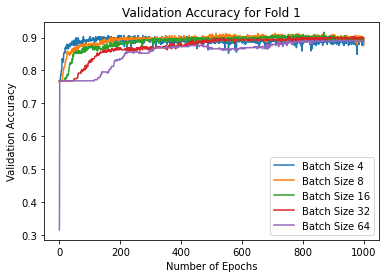

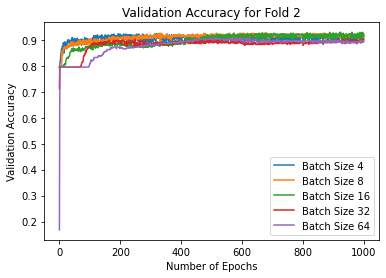

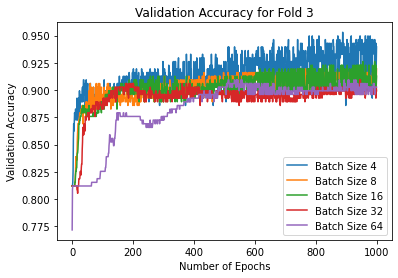

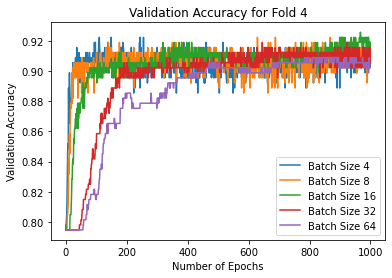

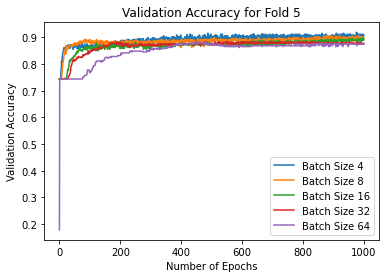

In [7]:
def plot_cross_val_acc(n_folds, batch_sizes, histories):
    for i in range(1, n_folds + 1):
        for batch_size in batch_sizes:
            key = (batch_size, i)
            plt.figure(i)
            plt.plot(histories[key].history['val_accuracy'], label='Batch Size ' + str(batch_size))
        plt.title(f'Validation Accuracy for Fold {i}')
        plt.ylabel('Validation Accuracy')
        plt.xlabel('Number of Epochs')
        plt.legend(loc='lower right')
        plt.savefig(f'./plots/2a_cross_val_acc_fold{i}.png')
        plt.show()

# plot and save figs for cross validation accuracies
plot_cross_val_acc(n_folds, batch_sizes, histories)

In [15]:
# Get the final validation accuracy for each fold, batch size pair
val_acc = []
for i in range(1, n_folds + 1):
    batch_acc = []
    for batch_size in batch_sizes:
        key = (batch_size, i)
        batch_acc.append(histories[key].history['val_accuracy'][epochs-1])
    val_acc.append(batch_acc)
    
val_acc_arr = np.array(val_acc)
print("Validation Accuracy: Rows correspond to a fold and Columns correspond to a batch size")
for i in range(5):
    print(f'Fold {i+1}: {val_acc[i]}')

val_acc_mean = []
for i in range(5):
    val_acc_mean.append(np.mean(val_acc_arr[:,i]))

print()
print('Mean Validation Accuracy:')
for bs, mean in zip(batch_sizes, val_acc_mean):
    print(f'Batch Size {bs}: {mean}')

Validation Accuracy: Rows correspond to a fold and Columns correspond to a batch size
Fold 1: [0.8825503587722778, 0.8758389353752136, 0.8926174640655518, 0.899328887462616, 0.8892617225646973]
Fold 2: [0.9060402512550354, 0.9127516746520996, 0.9161073565483093, 0.899328887462616, 0.8926174640655518]
Fold 3: [0.9395973086357117, 0.9194630980491638, 0.9127516746520996, 0.899328887462616, 0.9026845693588257]
Fold 4: [0.9057239294052124, 0.9158248901367188, 0.9191918969154358, 0.9057239294052124, 0.9023569226264954]
Fold 5: [0.9090909361839294, 0.8956229090690613, 0.8922559022903442, 0.875420868396759, 0.875420868396759]

Mean Validation Accuracy:
Batch Size 4: 0.9086005568504334
Batch Size 8: 0.9039003014564514
Batch Size 16: 0.9065848588943481
Batch Size 32: 0.8958262920379638
Batch Size 64: 0.8924683094024658


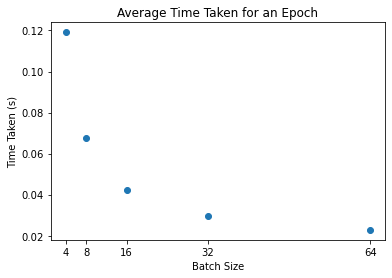

Average time taken for an epoch for each batch size
BS 4: 0.11914858608245849
BS 8: 0.0674685317993164
BS 16: 0.04249185380935669
BS 32: 0.029805246973037724
BS 64: 0.022809904289245606


In [9]:
def plot_mean_time(time_arr, batch_sizes):
    time_per_batch_size = []
    for i in range(time_arr.shape[1]):
        time_per_batch_size.append(np.mean(time_arr[:,i]))
    
    plt.scatter(batch_sizes, time_per_batch_size)
    plt.xticks(batch_sizes)
    plt.title('Average Time Taken for an Epoch')
    plt.ylabel('Time Taken (s)')
    plt.xlabel('Batch Size')
    plt.savefig('./plots/2a_time_per_epoch.png')
    plt.show()
    return time_per_batch_size

# Plot the time taken for an epoch
timing_arr = np.array(timings)

time_per_batch_size = plot_mean_time(timing_arr, batch_sizes)

print('Average time taken for an epoch for each batch size')
for bs, time in zip(batch_sizes, time_per_batch_size):
    print(f'BS {bs}: {time}')

In [10]:
# No k fold with 70 training and 30 test
model_data = {}
reg = regularizers.l2(10e-6)
opt = keras.optimizers.SGD(learning_rate=0.01)
epochs = 1000
batch_size = 16


model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                          keras.layers.Dense(NUM_CLASSES, activation='softmax')])

model.compile(optimizer=opt,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model_data['optimal_bs'] = model.fit(trainX, trainY, epochs=epochs,
                                    validation_data=(testX, testY),
                                    verbose=2, batch_size=batch_size)

Epoch 1/1000
93/93 - 0s - loss: 0.9062 - accuracy: 0.7668 - val_loss: 0.7963 - val_accuracy: 0.7680
Epoch 2/1000
93/93 - 0s - loss: 0.7207 - accuracy: 0.7829 - val_loss: 0.7180 - val_accuracy: 0.7680
Epoch 3/1000
93/93 - 0s - loss: 0.6709 - accuracy: 0.7829 - val_loss: 0.6870 - val_accuracy: 0.7680
Epoch 4/1000
93/93 - 0s - loss: 0.6449 - accuracy: 0.7829 - val_loss: 0.6603 - val_accuracy: 0.7680
Epoch 5/1000
93/93 - 0s - loss: 0.6238 - accuracy: 0.7829 - val_loss: 0.6401 - val_accuracy: 0.7680
Epoch 6/1000
93/93 - 0s - loss: 0.6069 - accuracy: 0.7829 - val_loss: 0.6226 - val_accuracy: 0.7680
Epoch 7/1000
93/93 - 0s - loss: 0.5925 - accuracy: 0.7829 - val_loss: 0.6078 - val_accuracy: 0.7680
Epoch 8/1000
93/93 - 0s - loss: 0.5802 - accuracy: 0.7829 - val_loss: 0.5958 - val_accuracy: 0.7680
Epoch 9/1000
93/93 - 0s - loss: 0.5680 - accuracy: 0.7829 - val_loss: 0.5869 - val_accuracy: 0.7680
Epoch 10/1000
93/93 - 0s - loss: 0.5578 - accuracy: 0.7829 - val_loss: 0.5719 - val_accuracy: 0.7680

Epoch 83/1000
93/93 - 0s - loss: 0.2789 - accuracy: 0.8831 - val_loss: 0.2928 - val_accuracy: 0.8715
Epoch 84/1000
93/93 - 0s - loss: 0.2784 - accuracy: 0.8797 - val_loss: 0.2924 - val_accuracy: 0.8746
Epoch 85/1000
93/93 - 0s - loss: 0.2774 - accuracy: 0.8817 - val_loss: 0.2912 - val_accuracy: 0.8746
Epoch 86/1000
93/93 - 0s - loss: 0.2759 - accuracy: 0.8817 - val_loss: 0.2930 - val_accuracy: 0.8730
Epoch 87/1000
93/93 - 0s - loss: 0.2756 - accuracy: 0.8837 - val_loss: 0.2922 - val_accuracy: 0.8730
Epoch 88/1000
93/93 - 0s - loss: 0.2741 - accuracy: 0.8844 - val_loss: 0.2884 - val_accuracy: 0.8730
Epoch 89/1000
93/93 - 0s - loss: 0.2743 - accuracy: 0.8824 - val_loss: 0.2880 - val_accuracy: 0.8762
Epoch 90/1000
93/93 - 0s - loss: 0.2735 - accuracy: 0.8831 - val_loss: 0.2881 - val_accuracy: 0.8762
Epoch 91/1000
93/93 - 0s - loss: 0.2713 - accuracy: 0.8858 - val_loss: 0.2869 - val_accuracy: 0.8715
Epoch 92/1000
93/93 - 0s - loss: 0.2718 - accuracy: 0.8824 - val_loss: 0.2858 - val_accurac

Epoch 164/1000
93/93 - 0s - loss: 0.2419 - accuracy: 0.8958 - val_loss: 0.2665 - val_accuracy: 0.8918
Epoch 165/1000
93/93 - 0s - loss: 0.2418 - accuracy: 0.8911 - val_loss: 0.2657 - val_accuracy: 0.8887
Epoch 166/1000
93/93 - 0s - loss: 0.2412 - accuracy: 0.8905 - val_loss: 0.2650 - val_accuracy: 0.8950
Epoch 167/1000
93/93 - 0s - loss: 0.2414 - accuracy: 0.8931 - val_loss: 0.2654 - val_accuracy: 0.8918
Epoch 168/1000
93/93 - 0s - loss: 0.2410 - accuracy: 0.8938 - val_loss: 0.2647 - val_accuracy: 0.8966
Epoch 169/1000
93/93 - 0s - loss: 0.2406 - accuracy: 0.8931 - val_loss: 0.2652 - val_accuracy: 0.8903
Epoch 170/1000
93/93 - 0s - loss: 0.2401 - accuracy: 0.8918 - val_loss: 0.2680 - val_accuracy: 0.8903
Epoch 171/1000
93/93 - 0s - loss: 0.2399 - accuracy: 0.8911 - val_loss: 0.2715 - val_accuracy: 0.8856
Epoch 172/1000
93/93 - 0s - loss: 0.2400 - accuracy: 0.8925 - val_loss: 0.2655 - val_accuracy: 0.8903
Epoch 173/1000
93/93 - 0s - loss: 0.2395 - accuracy: 0.8952 - val_loss: 0.2641 - v

Epoch 245/1000
93/93 - 0s - loss: 0.2271 - accuracy: 0.8958 - val_loss: 0.2661 - val_accuracy: 0.8918
Epoch 246/1000
93/93 - 0s - loss: 0.2281 - accuracy: 0.9005 - val_loss: 0.2613 - val_accuracy: 0.8918
Epoch 247/1000
93/93 - 0s - loss: 0.2270 - accuracy: 0.9012 - val_loss: 0.2610 - val_accuracy: 0.8966
Epoch 248/1000
93/93 - 0s - loss: 0.2265 - accuracy: 0.8985 - val_loss: 0.2675 - val_accuracy: 0.8934
Epoch 249/1000
93/93 - 0s - loss: 0.2272 - accuracy: 0.9005 - val_loss: 0.2620 - val_accuracy: 0.8950
Epoch 250/1000
93/93 - 0s - loss: 0.2270 - accuracy: 0.9005 - val_loss: 0.2624 - val_accuracy: 0.8950
Epoch 251/1000
93/93 - 0s - loss: 0.2272 - accuracy: 0.8985 - val_loss: 0.2617 - val_accuracy: 0.8934
Epoch 252/1000
93/93 - 0s - loss: 0.2267 - accuracy: 0.8985 - val_loss: 0.2615 - val_accuracy: 0.8934
Epoch 253/1000
93/93 - 0s - loss: 0.2266 - accuracy: 0.8965 - val_loss: 0.2623 - val_accuracy: 0.8966
Epoch 254/1000
93/93 - 0s - loss: 0.2265 - accuracy: 0.9005 - val_loss: 0.2615 - v

Epoch 326/1000
93/93 - 0s - loss: 0.2178 - accuracy: 0.8999 - val_loss: 0.2641 - val_accuracy: 0.8934
Epoch 327/1000
93/93 - 0s - loss: 0.2193 - accuracy: 0.9039 - val_loss: 0.2622 - val_accuracy: 0.8934
Epoch 328/1000
93/93 - 0s - loss: 0.2188 - accuracy: 0.9032 - val_loss: 0.2612 - val_accuracy: 0.8918
Epoch 329/1000
93/93 - 0s - loss: 0.2172 - accuracy: 0.9052 - val_loss: 0.2703 - val_accuracy: 0.8950
Epoch 330/1000
93/93 - 0s - loss: 0.2189 - accuracy: 0.9005 - val_loss: 0.2627 - val_accuracy: 0.8966
Epoch 331/1000
93/93 - 0s - loss: 0.2187 - accuracy: 0.9073 - val_loss: 0.2608 - val_accuracy: 0.9013
Epoch 332/1000
93/93 - 0s - loss: 0.2183 - accuracy: 0.9032 - val_loss: 0.2629 - val_accuracy: 0.8997
Epoch 333/1000
93/93 - 0s - loss: 0.2180 - accuracy: 0.9019 - val_loss: 0.2609 - val_accuracy: 0.8934
Epoch 334/1000
93/93 - 0s - loss: 0.2184 - accuracy: 0.8972 - val_loss: 0.2623 - val_accuracy: 0.8997
Epoch 335/1000
93/93 - 0s - loss: 0.2184 - accuracy: 0.9019 - val_loss: 0.2611 - v

Epoch 407/1000
93/93 - 0s - loss: 0.2126 - accuracy: 0.9039 - val_loss: 0.2630 - val_accuracy: 0.8950
Epoch 408/1000
93/93 - 0s - loss: 0.2123 - accuracy: 0.9046 - val_loss: 0.2621 - val_accuracy: 0.8981
Epoch 409/1000
93/93 - 0s - loss: 0.2120 - accuracy: 0.9052 - val_loss: 0.2706 - val_accuracy: 0.8950
Epoch 410/1000
93/93 - 0s - loss: 0.2128 - accuracy: 0.9046 - val_loss: 0.2660 - val_accuracy: 0.8950
Epoch 411/1000
93/93 - 0s - loss: 0.2119 - accuracy: 0.9019 - val_loss: 0.2623 - val_accuracy: 0.8950
Epoch 412/1000
93/93 - 0s - loss: 0.2121 - accuracy: 0.9039 - val_loss: 0.2626 - val_accuracy: 0.8934
Epoch 413/1000
93/93 - 0s - loss: 0.2125 - accuracy: 0.9019 - val_loss: 0.2626 - val_accuracy: 0.8950
Epoch 414/1000
93/93 - 0s - loss: 0.2124 - accuracy: 0.9026 - val_loss: 0.2673 - val_accuracy: 0.8997
Epoch 415/1000
93/93 - 0s - loss: 0.2119 - accuracy: 0.9026 - val_loss: 0.2628 - val_accuracy: 0.8903
Epoch 416/1000
93/93 - 0s - loss: 0.2124 - accuracy: 0.9026 - val_loss: 0.2642 - v

Epoch 488/1000
93/93 - 0s - loss: 0.2092 - accuracy: 0.9046 - val_loss: 0.2681 - val_accuracy: 0.8981
Epoch 489/1000
93/93 - 0s - loss: 0.2090 - accuracy: 0.9026 - val_loss: 0.2646 - val_accuracy: 0.8981
Epoch 490/1000
93/93 - 0s - loss: 0.2081 - accuracy: 0.9059 - val_loss: 0.2648 - val_accuracy: 0.8903
Epoch 491/1000
93/93 - 0s - loss: 0.2087 - accuracy: 0.9052 - val_loss: 0.2663 - val_accuracy: 0.8950
Epoch 492/1000
93/93 - 0s - loss: 0.2078 - accuracy: 0.9052 - val_loss: 0.2681 - val_accuracy: 0.8966
Epoch 493/1000
93/93 - 0s - loss: 0.2079 - accuracy: 0.9073 - val_loss: 0.2648 - val_accuracy: 0.8934
Epoch 494/1000
93/93 - 0s - loss: 0.2082 - accuracy: 0.9039 - val_loss: 0.2656 - val_accuracy: 0.8918
Epoch 495/1000
93/93 - 0s - loss: 0.2077 - accuracy: 0.9079 - val_loss: 0.2648 - val_accuracy: 0.8903
Epoch 496/1000
93/93 - 0s - loss: 0.2088 - accuracy: 0.9052 - val_loss: 0.2669 - val_accuracy: 0.8981
Epoch 497/1000
93/93 - 0s - loss: 0.2072 - accuracy: 0.9039 - val_loss: 0.2653 - v

Epoch 569/1000
93/93 - 0s - loss: 0.2043 - accuracy: 0.9086 - val_loss: 0.2662 - val_accuracy: 0.8918
Epoch 570/1000
93/93 - 0s - loss: 0.2055 - accuracy: 0.9032 - val_loss: 0.2678 - val_accuracy: 0.8934
Epoch 571/1000
93/93 - 0s - loss: 0.2054 - accuracy: 0.9052 - val_loss: 0.2692 - val_accuracy: 0.8934
Epoch 572/1000
93/93 - 0s - loss: 0.2051 - accuracy: 0.9079 - val_loss: 0.2678 - val_accuracy: 0.8934
Epoch 573/1000
93/93 - 0s - loss: 0.2045 - accuracy: 0.9073 - val_loss: 0.2677 - val_accuracy: 0.8918
Epoch 574/1000
93/93 - 0s - loss: 0.2048 - accuracy: 0.9073 - val_loss: 0.2685 - val_accuracy: 0.8950
Epoch 575/1000
93/93 - 0s - loss: 0.2044 - accuracy: 0.9066 - val_loss: 0.2742 - val_accuracy: 0.8903
Epoch 576/1000
93/93 - 0s - loss: 0.2048 - accuracy: 0.9106 - val_loss: 0.2673 - val_accuracy: 0.8934
Epoch 577/1000
93/93 - 0s - loss: 0.2040 - accuracy: 0.9079 - val_loss: 0.2664 - val_accuracy: 0.8887
Epoch 578/1000
93/93 - 0s - loss: 0.2046 - accuracy: 0.9039 - val_loss: 0.2669 - v

Epoch 650/1000
93/93 - 0s - loss: 0.2019 - accuracy: 0.9099 - val_loss: 0.2703 - val_accuracy: 0.8950
Epoch 651/1000
93/93 - 0s - loss: 0.2018 - accuracy: 0.9113 - val_loss: 0.2672 - val_accuracy: 0.8997
Epoch 652/1000
93/93 - 0s - loss: 0.2021 - accuracy: 0.9066 - val_loss: 0.2703 - val_accuracy: 0.8934
Epoch 653/1000
93/93 - 0s - loss: 0.2015 - accuracy: 0.9086 - val_loss: 0.2687 - val_accuracy: 0.8918
Epoch 654/1000
93/93 - 0s - loss: 0.2018 - accuracy: 0.9066 - val_loss: 0.2738 - val_accuracy: 0.8966
Epoch 655/1000
93/93 - 0s - loss: 0.2020 - accuracy: 0.9106 - val_loss: 0.2695 - val_accuracy: 0.8934
Epoch 656/1000
93/93 - 0s - loss: 0.2013 - accuracy: 0.9099 - val_loss: 0.2711 - val_accuracy: 0.8950
Epoch 657/1000
93/93 - 0s - loss: 0.2014 - accuracy: 0.9073 - val_loss: 0.2751 - val_accuracy: 0.8950
Epoch 658/1000
93/93 - 0s - loss: 0.2018 - accuracy: 0.9066 - val_loss: 0.2684 - val_accuracy: 0.8918
Epoch 659/1000
93/93 - 0s - loss: 0.2025 - accuracy: 0.9093 - val_loss: 0.2683 - v

Epoch 731/1000
93/93 - 0s - loss: 0.1993 - accuracy: 0.9147 - val_loss: 0.2729 - val_accuracy: 0.8903
Epoch 732/1000
93/93 - 0s - loss: 0.1985 - accuracy: 0.9099 - val_loss: 0.2725 - val_accuracy: 0.8887
Epoch 733/1000
93/93 - 0s - loss: 0.1993 - accuracy: 0.9113 - val_loss: 0.2716 - val_accuracy: 0.8934
Epoch 734/1000
93/93 - 0s - loss: 0.1982 - accuracy: 0.9153 - val_loss: 0.2789 - val_accuracy: 0.8918
Epoch 735/1000
93/93 - 0s - loss: 0.1989 - accuracy: 0.9113 - val_loss: 0.2702 - val_accuracy: 0.8918
Epoch 736/1000
93/93 - 0s - loss: 0.1993 - accuracy: 0.9099 - val_loss: 0.2724 - val_accuracy: 0.8934
Epoch 737/1000
93/93 - 0s - loss: 0.1991 - accuracy: 0.9126 - val_loss: 0.2741 - val_accuracy: 0.8950
Epoch 738/1000
93/93 - 0s - loss: 0.1991 - accuracy: 0.9147 - val_loss: 0.2740 - val_accuracy: 0.8871
Epoch 739/1000
93/93 - 0s - loss: 0.1986 - accuracy: 0.9099 - val_loss: 0.2712 - val_accuracy: 0.8934
Epoch 740/1000
93/93 - 0s - loss: 0.1990 - accuracy: 0.9106 - val_loss: 0.2753 - v

Epoch 812/1000
93/93 - 0s - loss: 0.1964 - accuracy: 0.9133 - val_loss: 0.2761 - val_accuracy: 0.8887
Epoch 813/1000
93/93 - 0s - loss: 0.1971 - accuracy: 0.9147 - val_loss: 0.2722 - val_accuracy: 0.8918
Epoch 814/1000
93/93 - 0s - loss: 0.1963 - accuracy: 0.9120 - val_loss: 0.2800 - val_accuracy: 0.8903
Epoch 815/1000
93/93 - 0s - loss: 0.1957 - accuracy: 0.9180 - val_loss: 0.2718 - val_accuracy: 0.8950
Epoch 816/1000
93/93 - 0s - loss: 0.1962 - accuracy: 0.9147 - val_loss: 0.2789 - val_accuracy: 0.8856
Epoch 817/1000
93/93 - 0s - loss: 0.1956 - accuracy: 0.9160 - val_loss: 0.2711 - val_accuracy: 0.8966
Epoch 818/1000
93/93 - 0s - loss: 0.1963 - accuracy: 0.9147 - val_loss: 0.2731 - val_accuracy: 0.8966
Epoch 819/1000
93/93 - 0s - loss: 0.1955 - accuracy: 0.9153 - val_loss: 0.2725 - val_accuracy: 0.8918
Epoch 820/1000
93/93 - 0s - loss: 0.1958 - accuracy: 0.9113 - val_loss: 0.2705 - val_accuracy: 0.8918
Epoch 821/1000
93/93 - 0s - loss: 0.1964 - accuracy: 0.9113 - val_loss: 0.2744 - v

Epoch 893/1000
93/93 - 0s - loss: 0.1935 - accuracy: 0.9207 - val_loss: 0.2749 - val_accuracy: 0.8840
Epoch 894/1000
93/93 - 0s - loss: 0.1944 - accuracy: 0.9126 - val_loss: 0.2743 - val_accuracy: 0.8856
Epoch 895/1000
93/93 - 0s - loss: 0.1945 - accuracy: 0.9167 - val_loss: 0.2760 - val_accuracy: 0.8871
Epoch 896/1000
93/93 - 0s - loss: 0.1942 - accuracy: 0.9173 - val_loss: 0.2729 - val_accuracy: 0.8950
Epoch 897/1000
93/93 - 0s - loss: 0.1946 - accuracy: 0.9147 - val_loss: 0.2796 - val_accuracy: 0.8934
Epoch 898/1000
93/93 - 0s - loss: 0.1940 - accuracy: 0.9194 - val_loss: 0.2726 - val_accuracy: 0.8950
Epoch 899/1000
93/93 - 0s - loss: 0.1944 - accuracy: 0.9140 - val_loss: 0.2739 - val_accuracy: 0.8950
Epoch 900/1000
93/93 - 0s - loss: 0.1946 - accuracy: 0.9153 - val_loss: 0.2742 - val_accuracy: 0.8966
Epoch 901/1000
93/93 - 0s - loss: 0.1940 - accuracy: 0.9160 - val_loss: 0.2756 - val_accuracy: 0.8950
Epoch 902/1000
93/93 - 0s - loss: 0.1950 - accuracy: 0.9133 - val_loss: 0.2773 - v

Epoch 974/1000
93/93 - 0s - loss: 0.1926 - accuracy: 0.9167 - val_loss: 0.2776 - val_accuracy: 0.8918
Epoch 975/1000
93/93 - 0s - loss: 0.1915 - accuracy: 0.9187 - val_loss: 0.2767 - val_accuracy: 0.8918
Epoch 976/1000
93/93 - 0s - loss: 0.1925 - accuracy: 0.9153 - val_loss: 0.2745 - val_accuracy: 0.8934
Epoch 977/1000
93/93 - 0s - loss: 0.1917 - accuracy: 0.9153 - val_loss: 0.2773 - val_accuracy: 0.8918
Epoch 978/1000
93/93 - 0s - loss: 0.1921 - accuracy: 0.9160 - val_loss: 0.2766 - val_accuracy: 0.8903
Epoch 979/1000
93/93 - 0s - loss: 0.1911 - accuracy: 0.9167 - val_loss: 0.2733 - val_accuracy: 0.8903
Epoch 980/1000
93/93 - 0s - loss: 0.1927 - accuracy: 0.9140 - val_loss: 0.2789 - val_accuracy: 0.8934
Epoch 981/1000
93/93 - 0s - loss: 0.1921 - accuracy: 0.9167 - val_loss: 0.2781 - val_accuracy: 0.8918
Epoch 982/1000
93/93 - 0s - loss: 0.1911 - accuracy: 0.9160 - val_loss: 0.2866 - val_accuracy: 0.8871
Epoch 983/1000
93/93 - 0s - loss: 0.1925 - accuracy: 0.9187 - val_loss: 0.2782 - v

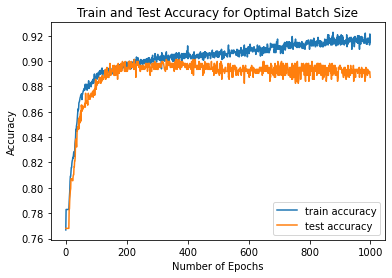

In [11]:
plt.plot(model_data['optimal_bs'].history['accuracy'], label='train accuracy')
plt.plot(model_data['optimal_bs'].history['val_accuracy'], label='test accuracy')

plt.title('Train and Test Accuracy for Optimal Batch Size')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc='lower right')
plt.savefig(f'./plots/parta/q2_v2/upload/2a_optimal_acc.png')
plt.show()

In [12]:
print('Final results from the last epoch for optimal batch size')
acc = model_data['optimal_bs'].history['accuracy'][epochs-1]
val_acc = model_data['optimal_bs'].history['val_accuracy'][epochs-1]
loss = model_data['optimal_bs'].history['loss'][epochs-1]
val_loss = model_data['optimal_bs'].history['val_loss'][epochs-1]
    
print()
print(f'Accuracy\t\t: {acc}')
print(f'Validation Accuracy\t: {val_acc}')
print(f'Loss\t\t\t: {loss}')
print(f'Validation Loss\t\t: {val_loss}')

Final results from the last epoch for optimal batch size

Accuracy		: 0.914650559425354
Validation Accuracy	: 0.8871473073959351
Loss			: 0.1914314180612564
Validation Loss		: 0.28316405415534973
